In [1]:
from stable_baselines.common.policies import MlpPolicy
from stable_baselines.common import make_vec_env
from stable_baselines import A2C
from stable_baselines.common.env_checker import check_env

C:\Users\Pavitra\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Pavitra\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Pavitra\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Pavitra\Anaconda3\envs\tensorflow\lib\site-

In [2]:
import gym
import w_mac
from collections import defaultdict
import matplotlib as plt
import networkx as nx

defaultdict(<class 'list'>, {0: [2, 1], 1: [2], 2: [3, 4], 3: [4]})


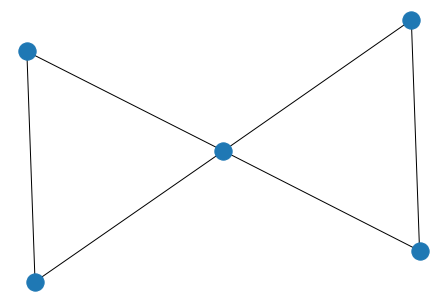

In [3]:
data = [(0,2),(0,1),(1,2),(2,3),(2,4),(3,4)]
d = defaultdict(list)

# defaultdict(<type 'list'>, {})
for node, dest in data:
    d[node].append(dest)
print(d)

G = nx.Graph()
for k,v in d.items():
    for vv in v:
        G.add_edge(k,vv)
nx.draw(G)

init
Intermediate node 2
Intermediate node 2
0 2
[0, 2]
0 1
[0, 2, 0, 1]
{0: [0, 2, 0, 1]}
{0: [0, 2, 0, 1]}
2 0
[2, 0]
2 1
[2, 0, 2, 1]
2 3
[2, 0, 2, 1, 2, 3]
2 4
[2, 0, 2, 1, 2, 3, 2, 4]
{0: [0, 2, 0, 1], 2: [2, 0, 2, 1, 2, 3, 2, 4]}
{0: [0, 2, 0, 1], 2: [2, 0, 2, 1, 2, 3, 2, 4]}
1 0
[1, 0]
1 2
[1, 0, 1, 2]
{0: [0, 2, 0, 1], 2: [2, 0, 2, 1, 2, 3, 2, 4], 1: [1, 0, 1, 2]}
{0: [0, 2, 0, 1], 2: [2, 0, 2, 1, 2, 3, 2, 4], 1: [1, 0, 1, 2]}
3 2
[3, 2]
3 4
[3, 2, 3, 4]
{0: [0, 2, 0, 1], 2: [2, 0, 2, 1, 2, 3, 2, 4], 1: [1, 0, 1, 2], 3: [3, 2, 3, 4]}
{0: [0, 2, 0, 1], 2: [2, 0, 2, 1, 2, 3, 2, 4], 1: [1, 0, 1, 2], 3: [3, 2, 3, 4]}
4 2
[4, 2]
4 3
[4, 2, 4, 3]
{0: [0, 2, 0, 1], 2: [2, 0, 2, 1, 2, 3, 2, 4], 1: [1, 0, 1, 2], 3: [3, 2, 3, 4], 4: [4, 2, 4, 3]}
{0: [0, 2, 0, 1], 2: [2, 0, 2, 1, 2, 3, 2, 4], 1: [1, 0, 1, 2], 3: [3, 2, 3, 4], 4: [4, 2, 4, 3]}
Fullrange after intermediate nodedeletion {0: [0, 2, 0, 1], 1: [1, 0, 1, 2], 3: [3, 2, 3, 4], 4: [4, 2, 4, 3]}
{0: {0, 1, 2}, 1: {0, 1, 2}, 3: {2, 

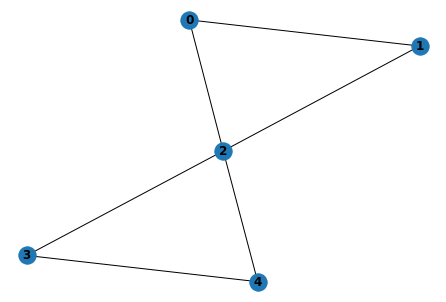

In [4]:
env = gym.make('wmac-v0',graph = G)

In [5]:
check_env(env)

{0: [], 2: [], 1: [], 3: [], 4: []}
-----------------------------
Adding packets for node :  0
2. src,dest,next_hop 0 3 2
2. src,dest,next_hop 0 3 2
2. src,dest,next_hop 0 3 2
2. src,dest,next_hop 0 4 2
1. src,dest,next_hop 0 2 2
1. src,dest,next_hop 0 2 2
2. src,dest,next_hop 0 3 2
2. src,dest,next_hop 0 3 2
-----------------------------
Adding packets for node :  2
1. src,dest,next_hop 2 4 4
1. src,dest,next_hop 2 0 0
1. src,dest,next_hop 2 4 4
1. src,dest,next_hop 2 0 0
1. src,dest,next_hop 2 3 3
1. src,dest,next_hop 2 4 4
1. src,dest,next_hop 2 0 0
1. src,dest,next_hop 2 3 3
-----------------------------
Adding packets for node :  1
1. src,dest,next_hop 1 2 2
1. src,dest,next_hop 1 2 2
2. src,dest,next_hop 1 4 2
1. src,dest,next_hop 1 2 2
1. src,dest,next_hop 1 0 0
2. src,dest,next_hop 1 4 2
1. src,dest,next_hop 1 0 0
2. src,dest,next_hop 1 3 2
-----------------------------
Adding packets for node :  3
1. src,dest,next_hop 3 0 0
1. src,dest,next_hop 3 1 1
1. src,dest,next_hop 3 1 1

In [6]:
model = A2C(MlpPolicy, env, verbose=1)
model.learn(total_timesteps=25000)
model.save("a2c_wmac")

Wrapping the env in a DummyVecEnv.
{0: [], 2: [], 1: [], 3: [], 4: []}
-----------------------------
Adding packets for node :  0
1. src,dest,next_hop 0 1 1
1. src,dest,next_hop 0 1 1
1. src,dest,next_hop 0 1 1
2. src,dest,next_hop 0 3 2
1. src,dest,next_hop 0 1 1
2. src,dest,next_hop 0 3 2
1. src,dest,next_hop 0 1 1
1. src,dest,next_hop 0 1 1
-----------------------------
Adding packets for node :  2
1. src,dest,next_hop 2 3 3
1. src,dest,next_hop 2 1 1
1. src,dest,next_hop 2 4 4
1. src,dest,next_hop 2 4 4
1. src,dest,next_hop 2 3 3
1. src,dest,next_hop 2 0 0
1. src,dest,next_hop 2 0 0
1. src,dest,next_hop 2 4 4
-----------------------------
Adding packets for node :  1
2. src,dest,next_hop 1 3 2
2. src,dest,next_hop 1 3 2
1. src,dest,next_hop 1 2 2
1. src,dest,next_hop 1 0 0
2. src,dest,next_hop 1 4 2
2. src,dest,next_hop 1 4 2
2. src,dest,next_hop 1 3 2
1. src,dest,next_hop 1 0 0
-----------------------------
Adding packets for node :  3
1. src,dest,next_hop 3 4 4
1. src,dest,next_h

final reward 0
packets delivered  3
packet_lost  15
nxt_state_arr, reward, isdone [1 0 2 2 2 5 2 7 3 5] 0 False
received action [1 0 1 0 0]
node  0  transmission collision
node  2  transmission collision
final reward -1000
packets delivered  3
packet_lost  17
nxt_state_arr, reward, isdone [2 0 2 2 2 4 1 7 3 5] -1000 False
received action [0 1 0 1 1]
node  1  transmission collision because of hidden terminal problem
node  3  transmission collision
node  4  transmission collision
final reward -1500
packets delivered  3
packet_lost  20
nxt_state_arr, reward, isdone [2 0 0 4 2 4 1 6 2 4] -1500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  4
packet_lost  20
nxt_state_arr, reward, isdone [2 0 2 4 2 4 1 5 2 4] 500 False
received action [1 0 0 1 0]
node  0  transmission SUCCESS
Packet reached destination
node  3  transmission SUCCESS
Packet reached destination
final reward 1000
packets delivered  6
packet_lost  20

received action [0 0 1 1 1]
node  2  transmission collision
node  3  transmission collision
node  4  transmission collision
final reward -1500
packets delivered  0
packet_lost  10
nxt_state_arr, reward, isdone [2 4 2 2 2 6 5 8 6 5] -1500 False
received action [1 0 1 1 0]
node  0  transmission collision
node  2  transmission collision
node  3  transmission collision
final reward -1500
packets delivered  0
packet_lost  13
nxt_state_arr, reward, isdone [1 0 2 2 2 5 4 8 5 5] -1500 False
received action [0 0 1 0 1]
node  2  transmission SUCCESS
Packet reached destination
node  4  transmission collision
final reward 0
packets delivered  1
packet_lost  14
nxt_state_arr, reward, isdone [1 0 2 2 3 5 3 8 5 4] 0 False
received action [1 1 1 1 0]
node  0  transmission collision
node  1  transmission collision
node  2  transmission collision
node  3  transmission collision
final reward -2000
packets delivered  1
packet_lost  18
nxt_state_arr, reward, isdone [1 1 2 2 3 4 2 7 4 4] -2000 False
receive

received action [0 1 1 1 1]
node  1  transmission collision
Action taken on empty queue
Action taken on empty queue
node  4  transmission collision
final reward -2000
packets delivered  3
packet_lost  38
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 0 0] -2000 True
{0: [], 2: [], 1: [], 3: [], 4: []}
-----------------------------
Adding packets for node :  0
1. src,dest,next_hop 0 1 1
2. src,dest,next_hop 0 3 2
2. src,dest,next_hop 0 3 2
1. src,dest,next_hop 0 1 1
1. src,dest,next_hop 0 1 1
2. src,dest,next_hop 0 3 2
2. src,dest,next_hop 0 4 2
1. src,dest,next_hop 0 1 1
-----------------------------
Adding packets for node :  2
1. src,dest,next_hop 2 4 4
1. src,dest,next_hop 2 1 1
1. src,dest,next_hop 2 1 1
1. src,dest,next_hop 2 4 4
1. src,dest,next_hop 2 0 0
1. src,dest,next_hop 2 1 1
1. src,dest,next_hop 2 4 4
1. src,dest,next_hop 2 0 0
-----------------------------
Adding packets for node :  1
2. src,dest,next_hop 1 4 2
2. src,dest,next_hop 1 3 2
2. src,dest,next_hop 1 4 2
2. src,

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  2
packet_lost  1
nxt_state_arr, reward, isdone [1 4 2 2 2 7 6 8 8 8] 500 False
received action [0 1 1 0 1]
node  1  transmission collision
node  2  transmission collision
node  4  transmission collision
final reward -1500
packets delivered  2
packet_lost  4
nxt_state_arr, reward, isdone [1 0 0 2 2 7 5 7 8 7] -1500 False
received action [1 1 1 0 0]
node  0  transmission collision
node  1  transmission collision
node  2  transmission collision
final reward -1500
packets delivered  2
packet_lost  7
nxt_state_arr, reward, isdone [2 4 2 2 2 6 4 6 8 7] -1500 False
received action [1 1 0 1 0]
node  0  transmission collision
node  1  transmission collision
node  3  transmission collision because of hidden terminal problem
final reward -1500
packets delivered  2
packet_lost  10
nxt_state_arr, reward, isdone [2 4 2 4 2 5 4 5 7 7] -1500 False
received action [1 1 0 0 1]
node  0

node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  3
packet_lost  17
nxt_state_arr, reward, isdone [2 0 2 4 3 3 5 4 3 6] 500 False
received action [1 0 0 1 0]
node  0  transmission SUCCESS
Packet reached destination
node  3  transmission SUCCESS
Packet reached destination
final reward 1000
packets delivered  5
packet_lost  17
nxt_state_arr, reward, isdone [2 0 2 2 3 2 5 4 2 6] 1000 False
received action [1 0 0 0 1]
node  0  transmission SUCCESS
Adding packet to the queue of  2
node  4  transmission SUCCESS
Packet reached destination
final reward 1000
packets delivered  7
packet_lost  17
nxt_state_arr, reward, isdone [1 0 2 2 2 1 6 4 2 5] 1000 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  8
packet_lost  17
nxt_state_arr, reward, isdone [1 0 2 2 2 1 6 3 2 5] 500 False
received action [0 1 1 1 1]
node  1  transmission collision
node  2  transmission collision
node  3 

packets delivered  7
packet_lost  23
nxt_state_arr, reward, isdone [2 0 0 0 0 7 3 0 0 0] -500 False
received action [1 1 0 1 0]
node  0  transmission collision
Action taken on empty queue
Action taken on empty queue
final reward -1500
packets delivered  7
packet_lost  24
nxt_state_arr, reward, isdone [2 0 0 0 0 6 3 0 0 0] -1500 False
received action [1 1 1 1 0]
node  0  transmission collision
Action taken on empty queue
node  2  transmission collision
Action taken on empty queue
final reward -2000
packets delivered  7
packet_lost  26
nxt_state_arr, reward, isdone [2 4 0 0 0 5 2 0 0 0] -2000 False
received action [1 1 1 1 0]
node  0  transmission collision
Action taken on empty queue
node  2  transmission collision
Action taken on empty queue
final reward -2000
packets delivered  7
packet_lost  28
nxt_state_arr, reward, isdone [1 3 0 0 0 4 1 0 0 0] -2000 False
received action [0 1 1 0 1]
Action taken on empty queue
node  2  transmission collision
Action taken on empty queue
final reward

received action [0 1 1 0 0]
Action taken on empty queue
node  2  transmission SUCCESS
Packet reached destination
final reward 0
packets delivered  16
packet_lost  26
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 0 0] 0 True
{0: [], 2: [], 1: [], 3: [], 4: []}
-----------------------------
Adding packets for node :  0
1. src,dest,next_hop 0 2 2
1. src,dest,next_hop 0 2 2
2. src,dest,next_hop 0 4 2
1. src,dest,next_hop 0 2 2
1. src,dest,next_hop 0 2 2
2. src,dest,next_hop 0 3 2
1. src,dest,next_hop 0 2 2
2. src,dest,next_hop 0 4 2
-----------------------------
Adding packets for node :  2
1. src,dest,next_hop 2 1 1
1. src,dest,next_hop 2 4 4
1. src,dest,next_hop 2 3 3
1. src,dest,next_hop 2 0 0
1. src,dest,next_hop 2 3 3
1. src,dest,next_hop 2 3 3
1. src,dest,next_hop 2 4 4
1. src,dest,next_hop 2 4 4
-----------------------------
Adding packets for node :  1
1. src,dest,next_hop 1 0 0
1. src,dest,next_hop 1 0 0
1. src,dest,next_hop 1 2 2
1. src,dest,next_hop 1 2 2
2. src,dest,next_hop 1

received action [1 0 1 0 1]
Action taken on empty queue
node  2  transmission collision
Action taken on empty queue
final reward -1500
packets delivered  5
packet_lost  35
nxt_state_arr, reward, isdone [0 0 2 0 0 0 1 1 0 0] -1500 False
received action [1 0 1 0 1]
Action taken on empty queue
node  2  transmission collision
Action taken on empty queue
final reward -1500
packets delivered  5
packet_lost  36
nxt_state_arr, reward, isdone [0 0 2 0 0 0 0 1 0 0] -1500 False
received action [1 1 0 0 0]
Action taken on empty queue
node  1  transmission collision
final reward -1000
packets delivered  5
packet_lost  37
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 0 0] -1000 True
{0: [], 2: [], 1: [], 3: [], 4: []}
-----------------------------
Adding packets for node :  0
2. src,dest,next_hop 0 3 2
1. src,dest,next_hop 0 2 2
1. src,dest,next_hop 0 2 2
1. src,dest,next_hop 0 1 1
2. src,dest,next_hop 0 3 2
1. src,dest,next_hop 0 2 2
1. src,dest,next_hop 0 2 2
1. src,dest,next_hop 0 1 1
----------

received action [1 0 0 1 0]
node  0  transmission SUCCESS
Packet reached destination
node  3  transmission SUCCESS
Packet reached destination
final reward 1000
packets delivered  2
packet_lost  5
nxt_state_arr, reward, isdone [2 0 2 2 2 5 8 7 6 7] 1000 False
received action [0 1 1 1 0]
node  1  transmission collision
node  2  transmission collision
node  3  transmission collision
final reward -1500
packets delivered  2
packet_lost  8
nxt_state_arr, reward, isdone [2 0 2 1 2 5 7 6 5 7] -1500 False
received action [1 0 1 0 1]
node  0  transmission collision
node  2  transmission collision
node  4  transmission collision
final reward -1500
packets delivered  2
packet_lost  11
nxt_state_arr, reward, isdone [2 1 2 1 2 4 6 6 5 6] -1500 False
received action [0 1 0 0 1]
node  1  transmission collision because of hidden terminal problem
node  4  transmission collision because of hidden terminal problem
final reward -1000
packets delivered  2
packet_lost  13
nxt_state_arr, reward, isdone [2 1 2

received action [1 0 0 0 1]
Action taken on empty queue
Action taken on empty queue
final reward -1000
packets delivered  6
packet_lost  35
nxt_state_arr, reward, isdone [0 0 2 0 0 0 0 1 0 0] -1000 False
received action [1 1 0 0 1]
Action taken on empty queue
node  1  transmission collision
Action taken on empty queue
final reward -1500
packets delivered  6
packet_lost  36
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 0 0] -1500 True
{0: [], 2: [], 1: [], 3: [], 4: []}
-----------------------------
Adding packets for node :  0
2. src,dest,next_hop 0 4 2
1. src,dest,next_hop 0 2 2
1. src,dest,next_hop 0 2 2
1. src,dest,next_hop 0 2 2
1. src,dest,next_hop 0 2 2
1. src,dest,next_hop 0 2 2
1. src,dest,next_hop 0 1 1
2. src,dest,next_hop 0 3 2
-----------------------------
Adding packets for node :  2
1. src,dest,next_hop 2 3 3
1. src,dest,next_hop 2 1 1
1. src,dest,next_hop 2 3 3
1. src,dest,next_hop 2 1 1
1. src,dest,next_hop 2 0 0
1. src,dest,next_hop 2 1 1
1. src,dest,next_hop 2 0 0
1.

received action [1 0 0 0 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  2
packet_lost  7
nxt_state_arr, reward, isdone [2 0 0 2 3 5 7 6 7 7] 500 False
received action [1 1 0 0 1]
node  0  transmission collision
node  1  transmission collision
node  4  transmission SUCCESS
Packet reached destination
final reward -500
packets delivered  3
packet_lost  9
nxt_state_arr, reward, isdone [2 0 2 2 3 4 7 5 7 6] -500 False
received action [1 1 0 1 0]
node  0  transmission collision
node  1  transmission collision
node  3  transmission collision because of hidden terminal problem
final reward -1500
packets delivered  3
packet_lost  12
nxt_state_arr, reward, isdone [2 0 2 2 3 3 7 4 6 6] -1500 False
received action [1 0 1 0 0]
node  0  transmission collision
node  2  transmission collision
final reward -1000
packets delivered  3
packet_lost  14
nxt_state_arr, reward, isdone [1 0 2 2 3 2 6 4 6 6] -1000 False
received action [1 1 0 0 0]
node  0  

received action [0 0 1 0 1]
node  2  transmission SUCCESS
Packet reached destination
node  4  transmission collision
final reward 0
packets delivered  3
packet_lost  30
nxt_state_arr, reward, isdone [2 1 0 0 2 3 4 0 0 1] 0 False
received action [1 0 0 0 1]
node  0  transmission collision because of hidden terminal problem
node  4  transmission SUCCESS
Packet reached destination
final reward 0
packets delivered  4
packet_lost  31
nxt_state_arr, reward, isdone [1 1 0 0 0 2 4 0 0 0] 0 False
received action [1 1 0 1 1]
node  0  transmission collision
Action taken on empty queue
Action taken on empty queue
Action taken on empty queue
final reward -2000
packets delivered  4
packet_lost  32
nxt_state_arr, reward, isdone [2 1 0 0 0 1 4 0 0 0] -2000 False
received action [0 1 1 0 1]
Action taken on empty queue
node  2  transmission collision
Action taken on empty queue
final reward -1500
packets delivered  4
packet_lost  33
nxt_state_arr, reward, isdone [2 0 0 0 0 1 3 0 0 0] -1500 False
receive

1. src,dest,next_hop 4 3 3
[2, 1, 2, 0, 2, 8, 8, 8, 8, 8]
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  1
packet_lost  0
nxt_state_arr, reward, isdone [2 4 2 0 2 8 7 8 8 8] 500 False
received action [0 1 1 0 1]
node  1  transmission collision
node  2  transmission collision
node  4  transmission collision
final reward -1500
packets delivered  1
packet_lost  3
nxt_state_arr, reward, isdone [2 4 2 0 2 8 6 7 8 7] -1500 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  2
packet_lost  3
nxt_state_arr, reward, isdone [1 4 2 0 2 7 6 7 8 7] 500 False
received action [0 0 1 0 1]
node  2  transmission collision
node  4  transmission collision
final reward -1000
packets delivered  2
packet_lost  5
nxt_state_arr, reward, isdone [1 1 2 0 2 7 5 7 8 6] -1000 False
received action [1 1 1 1 1]
node  0  transmission collision
node  1  transmission collis

received action [1 0 1 1 0]
node  0  transmission collision
node  2  transmission collision
node  3  transmission collision
final reward -1500
packets delivered  4
packet_lost  12
nxt_state_arr, reward, isdone [1 4 2 2 2 4 5 6 4 5] -1500 False
received action [1 0 1 1 1]
node  0  transmission collision
node  2  transmission collision
node  3  transmission collision
node  4  transmission collision
final reward -2000
packets delivered  4
packet_lost  16
nxt_state_arr, reward, isdone [2 0 2 2 2 3 4 6 3 4] -2000 False
received action [1 0 1 1 1]
node  0  transmission collision
node  2  transmission collision
node  3  transmission collision
node  4  transmission collision
final reward -2000
packets delivered  4
packet_lost  20
nxt_state_arr, reward, isdone [1 4 2 2 3 2 3 6 2 3] -2000 False
received action [0 1 1 0 1]
node  1  transmission collision
node  2  transmission collision
node  4  transmission collision
final reward -1500
packets delivered  4
packet_lost  23
nxt_state_arr, reward, i

final reward -2000
packets delivered  5
packet_lost  34
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 2 0] -2000 False
received action [1 1 0 1 0]
Action taken on empty queue
Action taken on empty queue
node  3  transmission SUCCESS
Adding packet to the queue of  2
final reward -500
packets delivered  6
packet_lost  34
nxt_state_arr, reward, isdone [0 0 0 2 0 0 1 0 1 0] -500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  7
packet_lost  34
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 1 0] 500 False
received action [1 1 0 1 0]
Action taken on empty queue
Action taken on empty queue
node  3  transmission SUCCESS
Packet reached destination
final reward -500
packets delivered  8
packet_lost  34
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 0 0] -500 True
{0: [], 2: [], 1: [], 3: [], 4: []}
-----------------------------
Adding packets for node :  0
2. src,dest,next_hop 0 3 2
1. src,dest,next_hop 0 2 2
2. src,

received action [1 0 0 0 1]
node  0  transmission SUCCESS
Adding packet to the queue of  2
node  4  transmission SUCCESS
Packet reached destination
final reward 1000
packets delivered  5
packet_lost  21
nxt_state_arr, reward, isdone [1 0 0 2 2 1 4 4 3 3] 1000 False
received action [0 1 0 1 1]
node  1  transmission SUCCESS
Packet reached destination
node  3  transmission collision
node  4  transmission collision
final reward -500
packets delivered  6
packet_lost  23
nxt_state_arr, reward, isdone [1 0 2 4 2 1 4 3 2 2] -500 False
received action [1 0 1 1 0]
node  0  transmission collision
node  2  transmission collision
node  3  transmission collision
final reward -1500
packets delivered  6
packet_lost  26
nxt_state_arr, reward, isdone [0 1 2 2 2 0 3 3 1 2] -1500 False
received action [1 0 0 0 0]
Action taken on empty queue
final reward -500
packets delivered  6
packet_lost  26
nxt_state_arr, reward, isdone [0 1 2 2 2 0 3 3 1 2] -500 False
received action [1 0 1 0 1]
Action taken on empty

received action [1 0 1 0 1]
Action taken on empty queue
Action taken on empty queue
Action taken on empty queue
final reward -1500
packets delivered  7
packet_lost  34
nxt_state_arr, reward, isdone [0 0 2 0 0 0 0 1 0 0] -1500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  7
packet_lost  34
nxt_state_arr, reward, isdone [0 0 2 0 0 0 0 1 0 0] -500 False
received action [1 0 0 0 0]
Action taken on empty queue
final reward -500
packets delivered  7
packet_lost  34
nxt_state_arr, reward, isdone [0 0 2 0 0 0 0 1 0 0] -500 False
received action [1 1 0 1 1]
Action taken on empty queue
node  1  transmission collision
Action taken on empty queue
Action taken on empty queue
final reward -2000
packets delivered  7
packet_lost  35
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 0 0] -2000 True
{0: [], 2: [], 1: [], 3: [], 4: []}
-----------------------------
Adding packets for node :  0
2. src,dest,next_hop 0 3 2
1. src,dest,next_hop 0 1 1
1. src,dest,next_hop 0 2 2
1. src,dest,

received action [0 1 1 1 1]
node  1  transmission collision
node  2  transmission collision
node  3  transmission collision
node  4  transmission collision
final reward -2000
packets delivered  2
packet_lost  5
nxt_state_arr, reward, isdone [2 3 2 4 3 7 6 7 6 7] -2000 False
received action [1 1 0 1 0]
node  0  transmission collision
node  1  transmission collision
node  3  transmission SUCCESS
Packet reached destination
final reward -500
packets delivered  3
packet_lost  7
nxt_state_arr, reward, isdone [2 3 2 4 3 6 6 6 5 7] -500 False
received action [1 1 1 0 1]
node  0  transmission collision
node  1  transmission collision
node  2  transmission collision
node  4  transmission collision
final reward -2000
packets delivered  3
packet_lost  11
nxt_state_arr, reward, isdone [2 1 2 4 2 5 5 5 5 6] -2000 False
received action [0 1 1 0 1]
node  1  transmission collision
node  2  transmission collision
node  4  transmission collision
final reward -1500
packets delivered  3
packet_lost  14
nxt

received action [1 0 0 0 1]
Action taken on empty queue
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 0
packets delivered  6
packet_lost  32
nxt_state_arr, reward, isdone [0 1 0 0 3 0 3 0 0 1] 0 False
received action [1 1 0 0 0]
Action taken on empty queue
Action taken on empty queue
final reward -1000
packets delivered  6
packet_lost  32
nxt_state_arr, reward, isdone [0 1 0 0 3 0 3 0 0 1] -1000 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  7
packet_lost  32
nxt_state_arr, reward, isdone [0 4 0 0 3 0 2 0 0 1] 500 False
received action [0 1 1 0 1]
Action taken on empty queue
node  2  transmission collision
node  4  transmission collision
final reward -1500
packets delivered  7
packet_lost  34
nxt_state_arr, reward, isdone [0 1 0 0 0 0 1 0 0 0] -1500 False
received action [1 1 1 0 1]
Action taken on empty queue
Action taken on empty queue
node  2  transmission collision
Action t

received action [0 0 0 1 0]
Action taken on empty queue
final reward -500
packets delivered  7
packet_lost  29
nxt_state_arr, reward, isdone [0 4 2 0 2 0 4 1 0 1] -500 False
received action [1 1 1 1 1]
Action taken on empty queue
node  1  transmission collision
node  2  transmission collision
Action taken on empty queue
node  4  transmission collision
final reward -2500
packets delivered  7
packet_lost  32
nxt_state_arr, reward, isdone [0 4 0 0 0 0 3 0 0 0] -2500 False
received action [0 0 0 1 1]
Action taken on empty queue
Action taken on empty queue
final reward -1000
packets delivered  7
packet_lost  32
nxt_state_arr, reward, isdone [0 4 0 0 0 0 3 0 0 0] -1000 False
received action [0 0 0 0 1]
Action taken on empty queue
final reward -500
packets delivered  7
packet_lost  32
nxt_state_arr, reward, isdone [0 4 0 0 0 0 3 0 0 0] -500 False
received action [0 0 0 1 1]
Action taken on empty queue
Action taken on empty queue
final reward -1000
packets delivered  7
packet_lost  32
nxt_stat

received action [0 1 0 0 1]
node  1  transmission collision because of hidden terminal problem
node  4  transmission collision because of hidden terminal problem
final reward -1000
packets delivered  0
packet_lost  2
nxt_state_arr, reward, isdone [2 4 2 1 2 8 8 7 8 7] -1000 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  1
packet_lost  2
nxt_state_arr, reward, isdone [2 4 2 1 2 8 9 6 8 7] 500 False
received action [1 1 0 0 0]
node  0  transmission collision
node  1  transmission collision
final reward -1000
packets delivered  1
packet_lost  4
nxt_state_arr, reward, isdone [2 4 2 1 2 7 9 5 8 7] -1000 False
received action [1 0 1 0 1]
node  0  transmission collision
node  2  transmission collision
node  4  transmission collision
final reward -1500
packets delivered  1
packet_lost  7
nxt_state_arr, reward, isdone [1 0 2 1 3 6 8 5 8 6] -1500 False
received action [1 1 1 1 1]
node  0  transmission collision

received action [1 1 0 0 1]
node  0  transmission collision
node  1  transmission collision
node  4  transmission SUCCESS
Packet reached destination
final reward -500
packets delivered  9
packet_lost  29
nxt_state_arr, reward, isdone [0 1 0 2 0 0 1 1 2 0] -500 False
received action [1 0 1 1 1]
Action taken on empty queue
node  2  transmission collision
node  3  transmission collision
Action taken on empty queue
final reward -2000
packets delivered  9
packet_lost  31
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 1 1 0] -2000 False
received action [1 0 0 0 1]
Action taken on empty queue
Action taken on empty queue
final reward -1000
packets delivered  9
packet_lost  31
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 1 1 0] -1000 False
received action [1 1 1 0 0]
Action taken on empty queue
node  1  transmission collision
Action taken on empty queue
final reward -1500
packets delivered  9
packet_lost  32
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 1 0] -1500 False
received action [1 0 0 0 

received action [0 0 0 1 1]
node  3  transmission collision
node  4  transmission collision
final reward -1000
packets delivered  3
packet_lost  18
nxt_state_arr, reward, isdone [2 3 2 2 2 2 7 4 2 5] -1000 False
received action [0 1 1 0 0]
node  1  transmission collision
node  2  transmission SUCCESS
Packet reached destination
final reward 0
packets delivered  4
packet_lost  19
nxt_state_arr, reward, isdone [2 4 2 2 2 2 6 3 2 5] 0 False
received action [1 0 0 1 1]
node  0  transmission collision because of hidden terminal problem
node  3  transmission collision
node  4  transmission collision
final reward -1500
packets delivered  4
packet_lost  22
nxt_state_arr, reward, isdone [1 4 2 2 2 1 6 3 1 4] -1500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  5
packet_lost  22
nxt_state_arr, reward, isdone [1 0 2 2 2 1 5 3 1 4] 500 False
received action [0 1 0 1 0]
node  1  transmission collision because of hidden t

2. src,dest,next_hop 4 0 2
2. src,dest,next_hop 4 2 2
[2, 0, 2, 4, 2, 8, 8, 8, 8, 8]
received action [1 0 1 0 1]
node  0  transmission collision
node  2  transmission collision
node  4  transmission collision
final reward -1500
packets delivered  0
packet_lost  3
nxt_state_arr, reward, isdone [2 3 2 4 2 7 7 8 8 7] -1500 False
received action [1 0 1 0 0]
node  0  transmission collision
node  2  transmission SUCCESS
Packet reached destination
final reward 0
packets delivered  1
packet_lost  4
nxt_state_arr, reward, isdone [2 1 2 4 2 6 6 8 8 7] 0 False
received action [0 0 0 0 0]
final reward 0
packets delivered  1
packet_lost  4
nxt_state_arr, reward, isdone [2 1 2 4 2 6 6 8 8 7] -500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  2
packet_lost  4
nxt_state_arr, reward, isdone [2 1 2 4 2 6 5 8 8 7] 500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500


1. src,dest,next_hop 2 3 3
1. src,dest,next_hop 2 4 4
1. src,dest,next_hop 2 4 4
1. src,dest,next_hop 2 3 3
1. src,dest,next_hop 2 0 0
1. src,dest,next_hop 2 0 0
-----------------------------
Adding packets for node :  1
2. src,dest,next_hop 1 4 2
1. src,dest,next_hop 1 2 2
1. src,dest,next_hop 1 2 2
1. src,dest,next_hop 1 0 0
1. src,dest,next_hop 1 2 2
1. src,dest,next_hop 1 0 0
2. src,dest,next_hop 1 3 2
1. src,dest,next_hop 1 0 0
-----------------------------
Adding packets for node :  3
1. src,dest,next_hop 3 0 0
1. src,dest,next_hop 3 4 4
2. src,dest,next_hop 3 1 2
2. src,dest,next_hop 3 0 2
2. src,dest,next_hop 3 2 2
1. src,dest,next_hop 3 4 4
2. src,dest,next_hop 3 0 2
2. src,dest,next_hop 3 0 2
-----------------------------
Adding packets for node :  4
2. src,dest,next_hop 4 0 2
2. src,dest,next_hop 4 2 2
2. src,dest,next_hop 4 2 2
2. src,dest,next_hop 4 1 2
2. src,dest,next_hop 4 0 2
2. src,dest,next_hop 4 0 2
2. src,dest,next_hop 4 0 2
2. src,dest,next_hop 4 1 2
[2, 4, 2, 0, 

2. src,dest,next_hop 3 1 2
2. src,dest,next_hop 3 1 2
1. src,dest,next_hop 3 4 4
2. src,dest,next_hop 3 1 2
-----------------------------
Adding packets for node :  4
2. src,dest,next_hop 4 0 2
2. src,dest,next_hop 4 0 2
1. src,dest,next_hop 4 3 3
2. src,dest,next_hop 4 2 2
2. src,dest,next_hop 4 0 2
2. src,dest,next_hop 4 1 2
1. src,dest,next_hop 4 3 3
2. src,dest,next_hop 4 0 2
[1, 1, 2, 0, 2, 8, 8, 8, 8, 8]
received action [0 0 0 0 0]
final reward 0
packets delivered  0
packet_lost  0
nxt_state_arr, reward, isdone [1 1 2 0 2 8 8 8 8 8] -500 False
received action [0 0 0 1 1]
node  3  transmission collision
node  4  transmission collision
final reward -1000
packets delivered  0
packet_lost  2
nxt_state_arr, reward, isdone [1 1 2 4 2 8 8 8 7 7] -1000 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  1
packet_lost  2
nxt_state_arr, reward, isdone [1 1 2 4 2 8 9 7 7 7] 500 False
received action [0 0 0 0 0]

node  1  transmission collision
node  2  transmission collision
node  3  transmission collision
final reward -1500
packets delivered  2
packet_lost  16
nxt_state_arr, reward, isdone [2 3 0 2 3 6 4 4 2 6] -1500 False
received action [1 0 1 0 1]
node  0  transmission collision
node  2  transmission collision
node  4  transmission collision
final reward -1500
packets delivered  2
packet_lost  19
nxt_state_arr, reward, isdone [1 0 0 2 2 5 3 4 2 5] -1500 False
received action [0 0 0 1 1]
node  3  transmission collision
node  4  transmission collision
final reward -1000
packets delivered  2
packet_lost  21
nxt_state_arr, reward, isdone [1 0 0 2 2 5 3 4 1 4] -1000 False
received action [0 0 1 1 0]
node  2  transmission SUCCESS
Packet reached destination
node  3  transmission collision
final reward 0
packets delivered  3
packet_lost  22
nxt_state_arr, reward, isdone [1 4 0 0 2 5 2 4 0 4] 0 False
received action [0 1 0 1 1]
node  1  transmission SUCCESS
Packet reached destination
Action taken o

node  1  transmission SUCCESS
Packet reached destination
node  4  transmission collision because of hidden terminal problem
final reward 0
packets delivered  1
packet_lost  12
nxt_state_arr, reward, isdone [1 3 2 2 2 7 5 5 5 5] 0 False
received action [0 1 0 0 1]
node  1  transmission collision because of hidden terminal problem
node  4  transmission SUCCESS
Packet reached destination
final reward 0
packets delivered  2
packet_lost  13
nxt_state_arr, reward, isdone [1 3 0 2 2 7 5 4 5 4] 0 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  3
packet_lost  13
nxt_state_arr, reward, isdone [2 3 0 2 2 6 5 4 5 4] 500 False
received action [0 0 1 1 1]
node  2  transmission collision
node  3  transmission collision
node  4  transmission collision
final reward -1500
packets delivered  3
packet_lost  16
nxt_state_arr, reward, isdone [2 1 0 2 2 6 4 4 4 3] -1500 False
received action [0 0 0 0 1]
node  4  transmission SUCCE

received action [1 0 1 0 0]
node  0  transmission collision
node  2  transmission collision
final reward -1000
packets delivered  2
packet_lost  4
nxt_state_arr, reward, isdone [2 4 0 1 2 6 6 7 7 8] -1000 False
received action [0 1 1 1 1]
node  1  transmission collision
node  2  transmission collision
node  3  transmission collision
node  4  transmission collision
final reward -2000
packets delivered  2
packet_lost  8
nxt_state_arr, reward, isdone [2 3 0 0 3 6 5 6 6 7] -2000 False
received action [1 1 0 0 0]
node  0  transmission collision
node  1  transmission collision
final reward -1000
packets delivered  2
packet_lost  10
nxt_state_arr, reward, isdone [2 3 0 0 3 5 5 5 6 7] -1000 False
received action [0 1 0 1 0]
node  1  transmission SUCCESS
Packet reached destination
node  3  transmission SUCCESS
Packet reached destination
final reward 1000
packets delivered  4
packet_lost  10
nxt_state_arr, reward, isdone [2 3 2 4 3 5 5 4 5 7] 1000 False
received action [1 0 0 1 0]
node  0  trans

packet_lost  24
nxt_state_arr, reward, isdone [0 4 2 2 2 0 3 1 5 3] -500 False
received action [0 1 0 1 1]
node  1  transmission collision because of hidden terminal problem
node  3  transmission collision
node  4  transmission collision
final reward -1500
packets delivered  7
packet_lost  27
nxt_state_arr, reward, isdone [0 4 0 4 2 0 3 0 4 2] -1500 False
received action [1 1 1 1 1]
Action taken on empty queue
Action taken on empty queue
node  2  transmission collision
node  3  transmission collision
node  4  transmission collision
final reward -2500
packets delivered  7
packet_lost  30
nxt_state_arr, reward, isdone [0 3 0 2 2 0 2 0 3 1] -2500 False
received action [0 1 0 0 0]
Action taken on empty queue
final reward -500
packets delivered  7
packet_lost  30
nxt_state_arr, reward, isdone [0 3 0 2 2 0 2 0 3 1] -500 False
received action [1 0 0 0 0]
Action taken on empty queue
final reward -500
packets delivered  7
packet_lost  30
nxt_state_arr, reward, isdone [0 3 0 2 2 0 2 0 3 1] -500 

1. src,dest,next_hop 3 0 0
1. src,dest,next_hop 3 4 4
2. src,dest,next_hop 3 2 2
1. src,dest,next_hop 3 4 4
2. src,dest,next_hop 3 0 2
2. src,dest,next_hop 3 1 2
1. src,dest,next_hop 3 4 4
2. src,dest,next_hop 3 2 2
-----------------------------
Adding packets for node :  4
2. src,dest,next_hop 4 2 2
2. src,dest,next_hop 4 2 2
1. src,dest,next_hop 4 3 3
2. src,dest,next_hop 4 0 2
2. src,dest,next_hop 4 0 2
2. src,dest,next_hop 4 1 2
2. src,dest,next_hop 4 0 2
2. src,dest,next_hop 4 1 2
[2, 4, 2, 0, 2, 8, 8, 8, 8, 8]
received action [0 1 1 1 1]
node  1  transmission collision
node  2  transmission collision
node  3  transmission collision
node  4  transmission collision
final reward -2000
packets delivered  0
packet_lost  4
nxt_state_arr, reward, isdone [2 1 0 4 2 8 7 7 7 7] -2000 False
received action [0 1 0 1 0]
node  1  transmission SUCCESS
Packet reached destination
node  3  transmission SUCCESS
Packet reached destination
final reward 1000
packets delivered  2
packet_lost  4
nxt_sta

received action [1 1 0 0 1]
Action taken on empty queue
node  1  transmission collision
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward -500
packets delivered  16
packet_lost  20
nxt_state_arr, reward, isdone [0 1 0 0 0 0 7 0 0 0] -500 False
received action [1 1 1 1 0]
Action taken on empty queue
Action taken on empty queue
node  2  transmission collision
Action taken on empty queue
final reward -2000
packets delivered  16
packet_lost  21
nxt_state_arr, reward, isdone [0 1 0 0 0 0 6 0 0 0] -2000 False
received action [1 1 1 0 1]
Action taken on empty queue
Action taken on empty queue
node  2  transmission collision
Action taken on empty queue
final reward -2000
packets delivered  16
packet_lost  22
nxt_state_arr, reward, isdone [0 1 0 0 0 0 5 0 0 0] -2000 False
received action [1 1 1 1 1]
Action taken on empty queue
Action taken on empty queue
node  2  transmission collision
Action taken on empty queue
Action taken on empty queue
final reward -2500
packets d

received action [0 0 0 0 0]
final reward 0
packets delivered  4
packet_lost  17
nxt_state_arr, reward, isdone [2 0 0 2 2 5 5 4 3 4] -500 False
received action [1 1 1 0 1]
node  0  transmission collision
node  1  transmission collision
node  2  transmission collision
node  4  transmission collision
final reward -2000
packets delivered  4
packet_lost  21
nxt_state_arr, reward, isdone [1 4 0 2 3 4 4 3 3 3] -2000 False
received action [0 1 1 1 0]
node  1  transmission collision
node  2  transmission collision
node  3  transmission collision
final reward -1500
packets delivered  4
packet_lost  24
nxt_state_arr, reward, isdone [1 1 2 2 3 4 3 2 2 3] -1500 False
received action [1 1 0 0 1]
node  0  transmission collision
node  1  transmission collision
node  4  transmission SUCCESS
Packet reached destination
final reward -500
packets delivered  5
packet_lost  26
nxt_state_arr, reward, isdone [2 1 2 2 2 3 3 1 2 2] -500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packe

received action [1 0 1 1 0]
node  0  transmission collision
node  2  transmission collision
node  3  transmission collision
final reward -1500
packets delivered  1
packet_lost  17
nxt_state_arr, reward, isdone [2 1 2 0 3 5 4 5 3 5] -1500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  2
packet_lost  17
nxt_state_arr, reward, isdone [2 1 2 0 3 5 5 4 3 5] 500 False
received action [0 1 0 1 1]
node  1  transmission SUCCESS
Adding packet to the queue of  2
node  3  transmission collision
node  4  transmission collision
final reward -500
packets delivered  3
packet_lost  19
nxt_state_arr, reward, isdone [2 1 2 4 3 5 6 3 2 4] -500 False
received action [0 1 0 1 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
node  3  transmission SUCCESS
Packet reached destination
final reward 1000
packets delivered  5
packet_lost  19
nxt_state_arr, reward, isdone [2 1 2 2 3 5 7 2 1 4] 1000 False
received a

received action [1 1 0 0 1]
Action taken on empty queue
Action taken on empty queue
node  4  transmission SUCCESS
Packet reached destination
final reward -500
packets delivered  5
packet_lost  35
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 0 0] -500 True
{0: [], 2: [], 1: [], 3: [], 4: []}
-----------------------------
Adding packets for node :  0
1. src,dest,next_hop 0 2 2
2. src,dest,next_hop 0 4 2
1. src,dest,next_hop 0 1 1
1. src,dest,next_hop 0 2 2
1. src,dest,next_hop 0 1 1
1. src,dest,next_hop 0 1 1
1. src,dest,next_hop 0 1 1
2. src,dest,next_hop 0 3 2
-----------------------------
Adding packets for node :  2
1. src,dest,next_hop 2 1 1
1. src,dest,next_hop 2 1 1
1. src,dest,next_hop 2 3 3
1. src,dest,next_hop 2 0 0
1. src,dest,next_hop 2 4 4
1. src,dest,next_hop 2 1 1
1. src,dest,next_hop 2 1 1
1. src,dest,next_hop 2 4 4
-----------------------------
Adding packets for node :  1
2. src,dest,next_hop 1 3 2
1. src,dest,next_hop 1 2 2
1. src,dest,next_hop 1 0 0
2. src,dest,next

received action [1 1 0 1 1]
Action taken on empty queue
Action taken on empty queue
Action taken on empty queue
Action taken on empty queue
final reward -2000
packets delivered  6
packet_lost  33
nxt_state_arr, reward, isdone [0 1 0 0 0 0 3 0 0 0] -2000 False
received action [1 0 0 0 0]
Action taken on empty queue
final reward -500
packets delivered  6
packet_lost  33
nxt_state_arr, reward, isdone [0 1 0 0 0 0 3 0 0 0] -500 False
received action [0 1 1 0 1]
Action taken on empty queue
node  2  transmission collision
Action taken on empty queue
final reward -1500
packets delivered  6
packet_lost  34
nxt_state_arr, reward, isdone [0 0 0 0 0 0 2 0 0 0] -1500 False
received action [1 1 0 1 0]
Action taken on empty queue
Action taken on empty queue
Action taken on empty queue
final reward -1500
packets delivered  6
packet_lost  34
nxt_state_arr, reward, isdone [0 0 0 0 0 0 2 0 0 0] -1500 False
received action [1 1 0 1 1]
Action taken on empty queue
Action taken on empty queue
Action taken o

final reward 500
packets delivered  2
packet_lost  4
nxt_state_arr, reward, isdone [2 3 2 1 2 7 7 6 7 7] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  3
packet_lost  4
nxt_state_arr, reward, isdone [2 3 2 1 3 7 8 6 7 6] 500 False
received action [1 1 1 1 1]
node  0  transmission collision
node  1  transmission collision
node  2  transmission collision
node  3  transmission collision
node  4  transmission collision
final reward -2500
packets delivered  3
packet_lost  9
nxt_state_arr, reward, isdone [2 1 2 2 2 6 7 5 6 5] -2500 False
received action [1 1 0 0 0]
node  0  transmission collision
node  1  transmission collision
final reward -1000
packets delivered  3
packet_lost  11
nxt_state_arr, reward, isdone [2 1 2 2 2 5 7 4 6 5] -1000 False
received action [0 1 1 0 1]
node  1  transmission collision
node  2  transmission collision
node  4  transmission collision
final reward -1500
packets delivered

received action [1 1 1 1 0]
Action taken on empty queue
node  1  transmission collision
node  2  transmission collision
node  3  transmission collision
final reward -2000
packets delivered  5
packet_lost  30
nxt_state_arr, reward, isdone [0 0 0 4 0 0 2 2 2 0] -2000 False
received action [1 1 0 1 1]
Action taken on empty queue
node  1  transmission collision
node  3  transmission collision
Action taken on empty queue
final reward -2000
packets delivered  5
packet_lost  32
nxt_state_arr, reward, isdone [0 0 2 2 0 0 2 1 1 0] -2000 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  6
packet_lost  32
nxt_state_arr, reward, isdone [0 3 2 2 0 0 1 1 1 0] 500 False
received action [1 0 0 1 0]
Action taken on empty queue
node  3  transmission SUCCESS
Adding packet to the queue of  2
final reward 0
packets delivered  7
packet_lost  32
nxt_state_arr, reward, isdone [0 3 2 0 0 0 2 1 0 0] 0 False
received action [1 0 0 0 1]


node  0  transmission collision because of hidden terminal problem
node  3  transmission collision
node  4  transmission collision
final reward -1500
packets delivered  4
packet_lost  8
nxt_state_arr, reward, isdone [2 4 2 1 2 6 8 6 6 4] -1500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  5
packet_lost  8
nxt_state_arr, reward, isdone [2 4 2 1 2 6 8 6 5 4] 500 False
received action [0 0 1 0 1]
node  2  transmission collision
node  4  transmission collision
final reward -1000
packets delivered  5
packet_lost  10
nxt_state_arr, reward, isdone [2 0 2 1 2 6 7 6 5 3] -1000 False
received action [1 0 1 1 1]
node  0  transmission collision
node  2  transmission collision
node  3  transmission collision
node  4  transmission collision
final reward -2000
packets delivered  5
packet_lost  14
nxt_state_arr, reward, isdone [2 0 2 4 2 5 6 6 4 2] -2000 False
received action [0 0 0 0 0]
final reward 0
packets delivered  

received action [1 0 1 0 0]
Action taken on empty queue
node  2  transmission collision
final reward -1000
packets delivered  7
packet_lost  34
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 0 0] -1000 True
{0: [], 2: [], 1: [], 3: [], 4: []}
-----------------------------
Adding packets for node :  0
1. src,dest,next_hop 0 1 1
1. src,dest,next_hop 0 1 1
1. src,dest,next_hop 0 1 1
2. src,dest,next_hop 0 3 2
1. src,dest,next_hop 0 1 1
1. src,dest,next_hop 0 1 1
1. src,dest,next_hop 0 1 1
2. src,dest,next_hop 0 3 2
-----------------------------
Adding packets for node :  2
1. src,dest,next_hop 2 4 4
1. src,dest,next_hop 2 3 3
1. src,dest,next_hop 2 1 1
1. src,dest,next_hop 2 1 1
1. src,dest,next_hop 2 3 3
1. src,dest,next_hop 2 0 0
1. src,dest,next_hop 2 1 1
1. src,dest,next_hop 2 0 0
-----------------------------
Adding packets for node :  1
1. src,dest,next_hop 1 0 0
1. src,dest,next_hop 1 0 0
2. src,dest,next_hop 1 3 2
2. src,dest,next_hop 1 3 2
2. src,dest,next_hop 1 3 2
2. src,dest,n

final reward 0
packets delivered  7
packet_lost  25
nxt_state_arr, reward, isdone [2 3 0 4 2 2 3 0 4 2] 0 False
received action [1 1 0 0 0]
node  0  transmission collision
Action taken on empty queue
final reward -1000
packets delivered  7
packet_lost  26
nxt_state_arr, reward, isdone [2 3 0 4 2 1 3 0 4 2] -1000 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  8
packet_lost  26
nxt_state_arr, reward, isdone [2 4 0 4 2 1 2 0 4 2] 500 False
received action [1 1 1 0 0]
node  0  transmission collision
Action taken on empty queue
node  2  transmission SUCCESS
Packet reached destination
final reward -500
packets delivered  9
packet_lost  27
nxt_state_arr, reward, isdone [0 1 0 4 2 0 1 0 4 2] -500 False
received action [0 0 1 1 1]
node  2  transmission SUCCESS
Packet reached destination
node  3  transmission collision
node  4  transmission collision
final reward -500
packets delivered  10
packet_lost  29
nxt_state_a

----------------------------------
| explained_variance | -1.43e-06 |
| fps                | 373       |
| nupdates           | 400       |
| policy_entropy     | 3.46      |
| total_timesteps    | 2000      |
| value_loss         | 1.77e+07  |
----------------------------------
received action [1 0 1 0 1]
node  0  transmission collision
Action taken on empty queue
Action taken on empty queue
final reward -1500
packets delivered  9
packet_lost  32
nxt_state_arr, reward, isdone [2 0 0 0 0 1 0 0 0 0] -1500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  9
packet_lost  32
nxt_state_arr, reward, isdone [2 0 0 0 0 1 0 0 0 0] -500 False
received action [1 1 0 0 1]
node  0  transmission collision
Action taken on empty queue
Action taken on empty queue
final reward -1500
packets delivered  9
packet_lost  33
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 0 0] -1500 True
{0: [], 2: [], 1: [], 3: [], 4: []}
-----------------------------
Adding packets for node :  0
2. src,dest

received action [1 1 0 1 0]
node  0  transmission collision
node  1  transmission collision
node  3  transmission collision because of hidden terminal problem
final reward -1500
packets delivered  2
packet_lost  31
nxt_state_arr, reward, isdone [2 3 2 2 3 2 1 2 1 2] -1500 False
received action [0 1 1 0 1]
node  1  transmission collision
node  2  transmission collision
node  4  transmission collision
final reward -1500
packets delivered  2
packet_lost  34
nxt_state_arr, reward, isdone [2 0 2 2 2 2 0 1 1 1] -1500 False
received action [1 1 1 1 0]
node  0  transmission collision
node  1  transmission collision
Action taken on empty queue
node  3  transmission collision
final reward -2000
packets delivered  2
packet_lost  37
nxt_state_arr, reward, isdone [2 0 0 0 2 1 0 0 0 1] -2000 False
received action [1 1 0 1 0]
node  0  transmission collision
Action taken on empty queue
Action taken on empty queue
final reward -1500
packets delivered  2
packet_lost  38
nxt_state_arr, reward, isdone [0 

packet_lost  16
nxt_state_arr, reward, isdone [1 0 2 2 2 4 4 3 5 6] -1500 False
received action [1 1 0 1 0]
node  0  transmission collision
node  1  transmission collision
node  3  transmission collision because of hidden terminal problem
final reward -1500
packets delivered  2
packet_lost  19
nxt_state_arr, reward, isdone [2 0 2 2 2 3 4 2 4 6] -1500 False
received action [0 1 0 0 1]
node  1  transmission collision because of hidden terminal problem
node  4  transmission collision because of hidden terminal problem
final reward -1000
packets delivered  2
packet_lost  21
nxt_state_arr, reward, isdone [2 0 2 2 3 3 4 1 4 5] -1000 False
received action [1 0 1 1 1]
node  0  transmission collision
node  2  transmission collision
node  3  transmission collision
node  4  transmission collision
final reward -2000
packets delivered  2
packet_lost  25
nxt_state_arr, reward, isdone [2 0 2 4 2 2 3 1 3 4] -2000 False
received action [0 1 0 1 1]
node  1  transmission collision because of hidden termi

received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  1
packet_lost  3
nxt_state_arr, reward, isdone [2 0 2 2 2 7 8 7 6 8] 500 False
received action [1 1 0 1 0]
node  0  transmission collision
node  1  transmission collision
node  3  transmission collision because of hidden terminal problem
final reward -1500
packets delivered  1
packet_lost  6
nxt_state_arr, reward, isdone [2 0 2 2 2 6 8 6 5 8] -1500 False
received action [1 0 1 1 1]
node  0  transmission collision
node  2  transmission collision
node  3  transmission collision
node  4  transmission collision
final reward -2000
packets delivered  1
packet_lost  10
nxt_state_arr, reward, isdone [1 3 2 4 3 5 7 6 4 7] -2000 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  2
packet_lost  10
nxt_state_arr, reward, isdone [1 3 2 2 3 5 7 6 3 7] 500 False
received action [1 0 0 1 0]
node  0  transmis

received action [0 0 0 1 1]
node  3  transmission collision
Action taken on empty queue
final reward -1000
packets delivered  9
packet_lost  23
nxt_state_arr, reward, isdone [2 3 2 4 0 3 1 2 2 0] -1000 False
received action [1 0 1 1 0]
node  0  transmission collision
node  2  transmission collision
node  3  transmission collision
final reward -1500
packets delivered  9
packet_lost  26
nxt_state_arr, reward, isdone [1 0 2 2 0 2 0 2 1 0] -1500 False
received action [1 1 0 0 0]
node  0  transmission collision
node  1  transmission collision
final reward -1000
packets delivered  9
packet_lost  28
nxt_state_arr, reward, isdone [2 0 0 2 0 1 0 1 1 0] -1000 False
received action [1 0 1 1 0]
node  0  transmission collision
Action taken on empty queue
node  3  transmission collision
final reward -1500
packets delivered  9
packet_lost  30
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 1 0 0] -1500 False
received action [0 0 1 0 1]
Action taken on empty queue
Action taken on empty queue
final reward

received action [1 0 1 1 1]
Action taken on empty queue
node  2  transmission collision
Action taken on empty queue
Action taken on empty queue
final reward -2000
packets delivered  11
packet_lost  33
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 0 0] -2000 True
{0: [], 2: [], 1: [], 3: [], 4: []}
-----------------------------
Adding packets for node :  0
2. src,dest,next_hop 0 4 2
2. src,dest,next_hop 0 4 2
1. src,dest,next_hop 0 1 1
2. src,dest,next_hop 0 3 2
2. src,dest,next_hop 0 3 2
2. src,dest,next_hop 0 3 2
2. src,dest,next_hop 0 4 2
2. src,dest,next_hop 0 4 2
-----------------------------
Adding packets for node :  2
1. src,dest,next_hop 2 4 4
1. src,dest,next_hop 2 1 1
1. src,dest,next_hop 2 3 3
1. src,dest,next_hop 2 4 4
1. src,dest,next_hop 2 3 3
1. src,dest,next_hop 2 4 4
1. src,dest,next_hop 2 1 1
1. src,dest,next_hop 2 1 1
-----------------------------
Adding packets for node :  1
2. src,dest,next_hop 1 3 2
2. src,dest,next_hop 1 4 2
1. src,dest,next_hop 1 0 0
1. src,des

received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  3
packet_lost  17
nxt_state_arr, reward, isdone [1 3 2 2 2 4 3 6 2 6] 500 False
received action [0 1 1 0 1]
node  1  transmission collision
node  2  transmission collision
node  4  transmission collision
final reward -1500
packets delivered  3
packet_lost  20
nxt_state_arr, reward, isdone [1 1 2 2 3 4 2 5 2 5] -1500 False
received action [1 1 1 1 1]
node  0  transmission collision
node  1  transmission collision
node  2  transmission collision
node  3  transmission collision
node  4  transmission collision
final reward -2500
packets delivered  3
packet_lost  25
nxt_state_arr, reward, isdone [2 4 2 4 2 3 1 4 1 4] -2500 False
received action [1 1 0 0 1]
node  0  transmission collision
node  1  transmission collision
node  4  transmission collision because of hidden terminal problem
final reward -1500
packets delivered  3
packet_lost  28
nxt_state_arr, reward, isd

received action [0 0 1 0 1]
node  2  transmission SUCCESS
Packet reached destination
node  4  transmission collision
final reward 0
packets delivered  3
packet_lost  14
nxt_state_arr, reward, isdone [2 4 2 2 2 5 6 4 4 5] 0 False
received action [0 0 0 0 0]
final reward 0
packets delivered  3
packet_lost  14
nxt_state_arr, reward, isdone [2 4 2 2 2 5 6 4 4 5] -500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  4
packet_lost  14
nxt_state_arr, reward, isdone [2 4 0 2 2 5 7 3 4 5] 500 False
received action [1 1 0 1 0]
node  0  transmission collision
node  1  transmission collision
node  3  transmission collision because of hidden terminal problem
final reward -1500
packets delivered  4
packet_lost  17
nxt_state_arr, reward, isdone [2 4 0 2 2 4 7 2 3 5] -1500 False
received action [1 0 1 0 1]
node  0  transmission collision
node  2  transmission collision
node  4  transmission collision
final reward -1500

received action [1 1 0 1 0]
node  0  transmission collision
node  1  transmission collision
node  3  transmission SUCCESS
Packet reached destination
final reward -500
packets delivered  7
packet_lost  27
nxt_state_arr, reward, isdone [2 0 0 2 0 3 0 0 3 0] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  7
packet_lost  27
nxt_state_arr, reward, isdone [2 0 0 2 0 3 0 0 3 0] -500 False
received action [0 1 0 1 0]
Action taken on empty queue
node  3  transmission SUCCESS
Adding packet to the queue of  2
final reward 0
packets delivered  8
packet_lost  27
nxt_state_arr, reward, isdone [2 1 0 2 0 3 1 0 2 0] 0 False
received action [0 1 0 0 1]
Action taken on empty queue
Action taken on empty queue
final reward -1000
packets delivered  8
packet_lost  27
nxt_state_arr, reward, isdone [2 1 0 2 0 3 1 0 2 0] -1000 False
received action [0 0 1 1 0]
node  2  transmission SUCCESS
Packet reached destination
node  3  transmission collision
final reward 0
packets delivered  9
pa

node  1  transmission collision
node  3  transmission collision
node  4  transmission collision
final reward -2000
packets delivered  4
packet_lost  9
nxt_state_arr, reward, isdone [2 0 2 2 0 5 7 5 4 7] -2000 False
received action [1 0 1 1 1]
node  0  transmission collision
node  2  transmission collision
node  3  transmission collision
node  4  transmission collision
final reward -2000
packets delivered  4
packet_lost  13
nxt_state_arr, reward, isdone [2 4 2 2 0 4 6 5 3 6] -2000 False
received action [1 0 1 1 0]
node  0  transmission collision
node  2  transmission collision
node  3  transmission collision
final reward -1500
packets delivered  4
packet_lost  16
nxt_state_arr, reward, isdone [2 1 2 2 0 3 5 5 2 6] -1500 False
received action [1 0 0 1 0]
node  0  transmission collision because of hidden terminal problem
node  3  transmission collision because of hidden terminal problem
final reward -1000
packets delivered  4
packet_lost  18
nxt_state_arr, reward, isdone [2 1 2 0 0 2 5 5 

node  1  transmission SUCCESS
Packet reached destination
node  4  transmission collision because of hidden terminal problem
final reward 0
packets delivered  1
packet_lost  1
nxt_state_arr, reward, isdone [2 1 2 4 2 8 8 7 8 7] 0 False
received action [1 1 0 0 1]
node  0  transmission collision
node  1  transmission collision
node  4  transmission collision because of hidden terminal problem
final reward -1500
packets delivered  1
packet_lost  4
nxt_state_arr, reward, isdone [2 1 2 4 2 7 8 6 8 6] -1500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  1
packet_lost  4
nxt_state_arr, reward, isdone [2 1 2 4 2 7 8 6 8 6] -500 False
received action [1 1 1 1 0]
node  0  transmission collision
node  1  transmission collision
node  2  transmission collision
node  3  transmission collision
final reward -2000
packets delivered  1
packet_lost  8
nxt_state_arr, reward, isdone [1 4 2 2 2 6 7 5 7 6] -2000 False
received action [1 1 1 0 0]
node  0  transmission collision
node  1  t

received action [0 0 0 1 1]
node  3  transmission collision
node  4  transmission collision
final reward -1000
packets delivered  4
packet_lost  6
nxt_state_arr, reward, isdone [2 0 2 2 3 8 8 6 4 6] -1000 False
received action [0 1 0 1 0]
node  1  transmission collision because of hidden terminal problem
node  3  transmission collision because of hidden terminal problem
final reward -1000
packets delivered  4
packet_lost  8
nxt_state_arr, reward, isdone [2 0 2 4 3 8 8 5 3 6] -1000 False
received action [1 0 1 0 1]
node  0  transmission collision
node  2  transmission collision
node  4  transmission collision
final reward -1500
packets delivered  4
packet_lost  11
nxt_state_arr, reward, isdone [2 3 2 4 3 7 7 5 3 5] -1500 False
received action [0 1 1 1 1]
node  1  transmission collision
node  2  transmission collision
node  3  transmission collision
node  4  transmission collision
final reward -2000
packets delivered  4
packet_lost  15
nxt_state_arr, reward, isdone [2 4 2 2 2 7 6 4 2 4] 

received action [1 0 0 0 1]
node  0  transmission collision because of hidden terminal problem
node  4  transmission collision because of hidden terminal problem
final reward -1000
packets delivered  3
packet_lost  22
nxt_state_arr, reward, isdone [2 1 2 4 2 1 5 2 4 5] -1000 False
received action [0 0 0 0 0]
final reward 0
packets delivered  3
packet_lost  22
nxt_state_arr, reward, isdone [2 1 2 4 2 1 5 2 4 5] -500 False
received action [1 1 0 1 1]
node  0  transmission collision
node  1  transmission collision
node  3  transmission collision
node  4  transmission collision
final reward -2000
packets delivered  3
packet_lost  26
nxt_state_arr, reward, isdone [0 1 2 2 2 0 5 1 3 4] -2000 False
received action [1 0 1 1 1]
Action taken on empty queue
node  2  transmission collision
node  3  transmission collision
node  4  transmission collision
final reward -2000
packets delivered  3
packet_lost  29
nxt_state_arr, reward, isdone [0 1 2 2 3 0 4 1 2 3] -2000 False
received action [0 1 0 0 1]

received action [1 0 0 0 0]
node  0  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  1
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 2 3 7 8 8 8 8] 500 False
received action [0 1 1 0 0]
node  1  transmission collision
node  2  transmission collision
final reward -1000
packets delivered  1
packet_lost  2
nxt_state_arr, reward, isdone [2 3 2 2 3 7 7 7 8 8] -1000 False
received action [1 0 1 1 1]
node  0  transmission collision
node  2  transmission collision
node  3  transmission collision
node  4  transmission collision
final reward -2000
packets delivered  1
packet_lost  6
nxt_state_arr, reward, isdone [2 1 2 1 2 6 6 7 7 7] -2000 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  2
packet_lost  6
nxt_state_arr, reward, isdone [1 1 2 1 2 5 7 7 7 7] 500 False
received action [1 1 0 1 1]
node  0  transmission collision
node  1  transmission collision
node  3  transmi

node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  3
packet_lost  11
nxt_state_arr, reward, isdone [2 0 0 1 2 3 5 6 7 5] 500 False
received action [0 1 0 0 1]
node  1  transmission SUCCESS
Packet reached destination
node  4  transmission collision because of hidden terminal problem
final reward 0
packets delivered  4
packet_lost  12
nxt_state_arr, reward, isdone [2 0 2 1 2 3 5 5 7 4] 0 False
received action [0 0 1 0 1]
node  2  transmission SUCCESS
Packet reached destination
node  4  transmission collision
final reward 0
packets delivered  5
packet_lost  13
nxt_state_arr, reward, isdone [2 1 2 1 2 3 4 5 7 3] 0 False
received action [0 1 0 1 1]
node  1  transmission collision because of hidden terminal problem
node  3  transmission collision
node  4  transmission collision
final reward -1500
packets delivered  5
packet_lost  16
nxt_state_arr, reward, isdone [2 1 2 4 2 3 4 4 6 2] -1500 False
received action [1 1 0 1 1]
node  0  transmission colli

received action [1 0 0 0 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  5
packet_lost  21
nxt_state_arr, reward, isdone [2 3 0 2 2 4 5 1 3 3] 500 False
received action [0 1 1 0 0]
node  1  transmission collision
node  2  transmission SUCCESS
Packet reached destination
final reward 0
packets delivered  6
packet_lost  22
nxt_state_arr, reward, isdone [2 0 0 2 2 4 4 0 3 3] 0 False
received action [0 0 1 0 1]
node  2  transmission SUCCESS
Packet reached destination
node  4  transmission collision
final reward 0
packets delivered  7
packet_lost  23
nxt_state_arr, reward, isdone [2 3 0 2 2 4 3 0 3 2] 0 False
received action [1 0 1 0 1]
node  0  transmission collision
node  2  transmission collision
node  4  transmission collision
final reward -1500
packets delivered  7
packet_lost  26
nxt_state_arr, reward, isdone [2 3 0 2 2 3 2 0 3 1] -1500 False
received action [0 1 0 1 0]
Action taken on empty queue
node  3  transmission SUCCESS
Addin

received action [0 1 0 0 0]
node  1  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  2
packet_lost  5
nxt_state_arr, reward, isdone [2 3 2 2 3 6 8 5 7 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  3
packet_lost  5
nxt_state_arr, reward, isdone [2 0 2 2 3 6 7 5 7 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  4
packet_lost  5
nxt_state_arr, reward, isdone [2 1 2 2 3 6 6 5 7 8] 500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  5
packet_lost  5
nxt_state_arr, reward, isdone [2 1 2 4 3 6 6 5 6 8] 500 False
received action [0 1 1 0 0]
node  1  transmission collision
node  2  transmission collision
final reward -1000
packets delivered  5
packet_lost  7
nxt_state_arr, reward, isdone [2 1 0 4 3 6 5 4 6 8] -

received action [1 0 0 0 0]
Action taken on empty queue
final reward -500
packets delivered  5
packet_lost  29
nxt_state_arr, reward, isdone [0 1 2 2 2 0 2 1 2 1] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  5
packet_lost  29
nxt_state_arr, reward, isdone [0 1 2 2 2 0 2 1 2 1] -500 False
received action [0 1 1 0 0]
node  1  transmission collision
node  2  transmission collision
final reward -1000
packets delivered  5
packet_lost  31
nxt_state_arr, reward, isdone [0 1 0 2 2 0 1 0 2 1] -1000 False
received action [1 0 1 0 0]
Action taken on empty queue
node  2  transmission collision
final reward -1000
packets delivered  5
packet_lost  32
nxt_state_arr, reward, isdone [0 0 0 2 2 0 0 0 2 1] -1000 False
received action [1 1 0 1 0]
Action taken on empty queue
Action taken on empty queue
node  3  transmission SUCCESS
Adding packet to the queue of  2
final reward -500
packets delivered  6
packet_lost  32
nxt_state_arr, reward, isdone [0 1 0 2 2 0 1 0 1 1] -500 Fals

received action [0 0 0 0 0]
final reward 0
packets delivered  9
packet_lost  23
nxt_state_arr, reward, isdone [1 1 0 0 2 4 3 0 0 3] -500 False
received action [1 0 0 1 0]
node  0  transmission SUCCESS
Packet reached destination
Action taken on empty queue
final reward 0
packets delivered  10
packet_lost  23
nxt_state_arr, reward, isdone [1 1 0 0 2 3 3 0 0 3] 0 False
received action [0 1 1 0 1]
Action taken on empty queue
node  2  transmission collision
node  4  transmission collision
final reward -1500
packets delivered  10
packet_lost  25
nxt_state_arr, reward, isdone [1 0 0 0 2 3 2 0 0 2] -1500 False
received action [0 1 1 0 1]
Action taken on empty queue
node  2  transmission collision
node  4  transmission collision
final reward -1500
packets delivered  10
packet_lost  27
nxt_state_arr, reward, isdone [1 0 0 0 2 3 1 0 0 1] -1500 False
received action [1 0 0 0 1]
node  0  transmission SUCCESS
Packet reached destination
node  4  transmission collision because of hidden terminal probl

received action [1 1 0 1 1]
node  0  transmission collision
node  1  transmission collision
node  3  transmission collision
node  4  transmission collision
final reward -2000
packets delivered  4
packet_lost  13
nxt_state_arr, reward, isdone [2 4 2 0 2 5 6 6 5 2] -2000 False
received action [0 1 0 1 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
node  3  transmission SUCCESS
Packet reached destination
final reward 1000
packets delivered  6
packet_lost  13
nxt_state_arr, reward, isdone [2 4 2 4 2 5 7 5 4 2] 1000 False
received action [1 1 1 0 1]
node  0  transmission collision
node  1  transmission collision
node  2  transmission collision
node  4  transmission collision
final reward -2000
packets delivered  6
packet_lost  17
nxt_state_arr, reward, isdone [1 0 2 4 2 4 6 4 4 1] -2000 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  7
packet_lost  17
nxt_state_arr, reward, isdone [1 0 2 

received action [0 1 1 0 0]
node  1  transmission collision
node  2  transmission collision
final reward -1000
packets delivered  0
packet_lost  5
nxt_state_arr, reward, isdone [2 3 2 0 2 7 6 6 8 8] -1000 False
received action [0 1 0 0 1]
node  1  transmission collision because of hidden terminal problem
node  4  transmission collision because of hidden terminal problem
final reward -1000
packets delivered  0
packet_lost  7
nxt_state_arr, reward, isdone [2 3 2 0 2 7 6 5 8 7] -1000 False
received action [0 1 0 1 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
node  3  transmission SUCCESS
Packet reached destination
final reward 1000
packets delivered  2
packet_lost  7
nxt_state_arr, reward, isdone [2 3 2 1 2 7 7 4 7 7] 1000 False
received action [0 0 0 1 1]
node  3  transmission collision
node  4  transmission collision
final reward -1000
packets delivered  2
packet_lost  9
nxt_state_arr, reward, isdone [2 3 2 2 2 7 7 4 6 6] -1000 False
received action [1 0 0 0 1]
node

received action [0 1 1 1 1]
node  1  transmission collision
node  2  transmission collision
node  3  transmission collision
node  4  transmission collision
final reward -2000
packets delivered  7
packet_lost  17
nxt_state_arr, reward, isdone [2 1 2 1 2 3 5 5 2 2] -2000 False
received action [0 1 1 1 1]
node  1  transmission collision
node  2  transmission collision
node  3  transmission collision
node  4  transmission collision
final reward -2000
packets delivered  7
packet_lost  21
nxt_state_arr, reward, isdone [2 0 2 0 3 3 4 4 1 1] -2000 False
received action [1 0 1 0 0]
node  0  transmission collision
node  2  transmission collision
final reward -1000
packets delivered  7
packet_lost  23
nxt_state_arr, reward, isdone [2 3 2 0 3 2 3 4 1 1] -1000 False
received action [1 0 1 0 0]
node  0  transmission collision
node  2  transmission SUCCESS
Packet reached destination
final reward 0
packets delivered  8
packet_lost  24
nxt_state_arr, reward, isdone [2 4 2 0 3 1 2 4 1 1] 0 False
receive

node  2  transmission SUCCESS
Packet reached destination
final reward 0
packets delivered  4
packet_lost  18
nxt_state_arr, reward, isdone [2 0 2 2 2 6 3 4 1 5] 0 False
received action [1 1 1 1 1]
node  0  transmission collision
node  1  transmission collision
node  2  transmission collision
node  3  transmission collision
node  4  transmission collision
final reward -2500
packets delivered  4
packet_lost  23
nxt_state_arr, reward, isdone [2 0 0 0 2 5 2 3 0 4] -2500 False
received action [1 0 0 1 0]
node  0  transmission SUCCESS
Packet reached destination
Action taken on empty queue
final reward 0
packets delivered  5
packet_lost  23
nxt_state_arr, reward, isdone [2 0 0 0 2 4 2 3 0 4] 0 False
received action [1 0 0 1 0]
node  0  transmission SUCCESS
Packet reached destination
Action taken on empty queue
final reward 0
packets delivered  6
packet_lost  23
nxt_state_arr, reward, isdone [2 0 0 0 2 3 2 3 0 4] 0 False
received action [0 1 1 1 1]
node  1  transmission collision
node  2  tran

received action [1 1 1 0 0]
node  0  transmission collision
node  1  transmission collision
Action taken on empty queue
final reward -1500
packets delivered  10
packet_lost  31
nxt_state_arr, reward, isdone [2 0 0 0 0 1 0 0 0 0] -1500 False
received action [0 1 0 1 0]
Action taken on empty queue
Action taken on empty queue
final reward -1000
packets delivered  10
packet_lost  31
nxt_state_arr, reward, isdone [2 0 0 0 0 1 0 0 0 0] -1000 False
received action [0 1 0 1 1]
Action taken on empty queue
Action taken on empty queue
Action taken on empty queue
final reward -1500
packets delivered  10
packet_lost  31
nxt_state_arr, reward, isdone [2 0 0 0 0 1 0 0 0 0] -1500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  10
packet_lost  31
nxt_state_arr, reward, isdone [2 0 0 0 0 1 0 0 0 0] -500 False
received action [0 0 1 1 1]
Action taken on empty queue
Action taken on empty queue
Action taken on empty queue
final reward -1500
packets delivered  10
packet_lost  31
nxt_stat

received action [1 0 0 0 1]
node  0  transmission collision because of hidden terminal problem
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 0
packets delivered  9
packet_lost  26
nxt_state_arr, reward, isdone [0 3 0 4 0 0 5 0 3 0] 0 False
received action [0 1 1 0 1]
Action taken on empty queue
node  2  transmission collision
Action taken on empty queue
final reward -1500
packets delivered  9
packet_lost  27
nxt_state_arr, reward, isdone [0 4 0 4 0 0 4 0 3 0] -1500 False
received action [0 1 1 0 0]
Action taken on empty queue
node  2  transmission SUCCESS
Packet reached destination
final reward 0
packets delivered  10
packet_lost  27
nxt_state_arr, reward, isdone [0 0 0 4 0 0 3 0 3 0] 0 False
received action [0 1 1 0 1]
Action taken on empty queue
node  2  transmission collision
Action taken on empty queue
final reward -1500
packets delivered  10
packet_lost  28
nxt_state_arr, reward, isdone [0 3 0 4 0 0 2 0 3 0] -1500 False
received action [0 0 1 0 1]
nod

received action [0 0 1 0 1]
Action taken on empty queue
Action taken on empty queue
final reward -1000
packets delivered  6
packet_lost  35
nxt_state_arr, reward, isdone [0 0 2 0 0 0 0 1 0 0] -1000 False
received action [1 1 0 1 0]
Action taken on empty queue
node  1  transmission collision
Action taken on empty queue
final reward -1500
packets delivered  6
packet_lost  36
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 0 0] -1500 True
{0: [], 2: [], 1: [], 3: [], 4: []}
-----------------------------
Adding packets for node :  0
2. src,dest,next_hop 0 4 2
2. src,dest,next_hop 0 4 2
1. src,dest,next_hop 0 2 2
2. src,dest,next_hop 0 3 2
1. src,dest,next_hop 0 2 2
2. src,dest,next_hop 0 4 2
2. src,dest,next_hop 0 3 2
1. src,dest,next_hop 0 1 1
-----------------------------
Adding packets for node :  2
1. src,dest,next_hop 2 1 1
1. src,dest,next_hop 2 4 4
1. src,dest,next_hop 2 3 3
1. src,dest,next_hop 2 0 0
1. src,dest,next_hop 2 4 4
1. src,dest,next_hop 2 4 4
1. src,dest,next_hop 2 1 1
1.

nxt_state_arr, reward, isdone [1 0 2 2 0 5 4 4 4 0] -500 False
received action [1 1 0 1 1]
node  0  transmission collision
node  1  transmission collision
node  3  transmission collision
Action taken on empty queue
final reward -2000
packets delivered  7
packet_lost  19
nxt_state_arr, reward, isdone [1 0 2 1 0 4 4 3 3 0] -2000 False
received action [0 0 1 1 1]
node  2  transmission SUCCESS
Packet reached destination
node  3  transmission collision
Action taken on empty queue
final reward -500
packets delivered  8
packet_lost  20
nxt_state_arr, reward, isdone [1 4 2 1 0 4 3 3 2 0] -500 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  9
packet_lost  20
nxt_state_arr, reward, isdone [2 4 2 1 0 3 3 3 2 0] 500 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  10
packet_lost  20
nxt_state_arr, reward, isdone [1 4 2 1 0 2 3 3 2 0] 500 False

received action [0 1 0 0 1]
Action taken on empty queue
Action taken on empty queue
final reward -1000
packets delivered  9
packet_lost  30
nxt_state_arr, reward, isdone [0 4 0 0 0 0 3 0 0 0] -1000 False
received action [1 0 0 0 1]
Action taken on empty queue
Action taken on empty queue
final reward -1000
packets delivered  9
packet_lost  30
nxt_state_arr, reward, isdone [0 4 0 0 0 0 3 0 0 0] -1000 False
received action [0 1 1 0 0]
Action taken on empty queue
node  2  transmission SUCCESS
Packet reached destination
final reward 0
packets delivered  10
packet_lost  30
nxt_state_arr, reward, isdone [0 4 0 0 0 0 2 0 0 0] 0 False
received action [0 0 1 0 1]
node  2  transmission collision
Action taken on empty queue
final reward -1000
packets delivered  10
packet_lost  31
nxt_state_arr, reward, isdone [0 3 0 0 0 0 1 0 0 0] -1000 False
received action [0 1 0 0 0]
Action taken on empty queue
final reward -500
packets delivered  10
packet_lost  31
nxt_state_arr, reward, isdone [0 3 0 0 0 0 1 

final reward -2000
packets delivered  7
packet_lost  29
nxt_state_arr, reward, isdone [0 3 0 0 2 0 5 0 0 1] -2000 False
received action [0 1 1 0 0]
Action taken on empty queue
node  2  transmission SUCCESS
Packet reached destination
final reward 0
packets delivered  8
packet_lost  29
nxt_state_arr, reward, isdone [0 1 0 0 2 0 4 0 0 1] 0 False
received action [0 1 1 1 1]
Action taken on empty queue
node  2  transmission collision
Action taken on empty queue
node  4  transmission collision
final reward -2000
packets delivered  8
packet_lost  31
nxt_state_arr, reward, isdone [0 3 0 0 0 0 3 0 0 0] -2000 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  9
packet_lost  31
nxt_state_arr, reward, isdone [0 0 0 0 0 0 2 0 0 0] 500 False
received action [0 0 1 0 1]
node  2  transmission SUCCESS
Packet reached destination
Action taken on empty queue
final reward 0
packets delivered  10
packet_lost  31
nxt_state_arr, rewar

received action [1 1 1 0 1]
node  0  transmission collision
node  1  transmission collision
node  2  transmission collision
node  4  transmission collision
final reward -2000
packets delivered  0
packet_lost  4
nxt_state_arr, reward, isdone [2 4 2 2 2 7 7 7 8 7] -2000 False
received action [0 1 1 1 1]
node  1  transmission collision
node  2  transmission collision
node  3  transmission collision
node  4  transmission collision
final reward -2000
packets delivered  0
packet_lost  8
nxt_state_arr, reward, isdone [2 1 2 1 2 7 6 6 7 6] -2000 False
received action [1 1 1 1 0]
node  0  transmission collision
node  1  transmission collision
node  2  transmission collision
node  3  transmission collision
final reward -2000
packets delivered  0
packet_lost  12
nxt_state_arr, reward, isdone [2 1 2 4 2 6 5 5 6 6] -2000 False
received action [0 0 0 1 1]
node  3  transmission collision
node  4  transmission collision
final reward -1000
packets delivered  0
packet_lost  14
nxt_state_arr, reward, isd

received action [0 0 0 0 0]
final reward 0
packets delivered  14
packet_lost  28
nxt_state_arr, reward, isdone [0 3 0 0 0 0 2 0 0 0] -500 False
received action [0 1 1 1 0]
Action taken on empty queue
node  2  transmission collision
Action taken on empty queue
final reward -1500
packets delivered  14
packet_lost  29
nxt_state_arr, reward, isdone [0 3 0 0 0 0 1 0 0 0] -1500 False
received action [1 0 0 1 0]
Action taken on empty queue
Action taken on empty queue
final reward -1000
packets delivered  14
packet_lost  29
nxt_state_arr, reward, isdone [0 3 0 0 0 0 1 0 0 0] -1000 False
received action [1 0 1 0 0]
Action taken on empty queue
node  2  transmission SUCCESS
Packet reached destination
final reward 0
packets delivered  15
packet_lost  29
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 0 0] 0 True
{0: [], 2: [], 1: [], 3: [], 4: []}
-----------------------------
Adding packets for node :  0
2. src,dest,next_hop 0 4 2
1. src,dest,next_hop 0 1 1
1. src,dest,next_hop 0 2 2
1. src,dest,n

received action [0 0 0 1 1]
node  3  transmission collision
node  4  transmission collision
final reward -1000
packets delivered  3
packet_lost  9
nxt_state_arr, reward, isdone [2 3 2 4 2 6 8 4 7 5] -1000 False
received action [1 1 0 1 0]
node  0  transmission collision
node  1  transmission collision
node  3  transmission SUCCESS
Packet reached destination
final reward -500
packets delivered  4
packet_lost  11
nxt_state_arr, reward, isdone [2 3 2 2 2 5 8 3 6 5] -500 False
received action [0 1 1 0 1]
node  1  transmission collision
node  2  transmission collision
node  4  transmission collision
final reward -1500
packets delivered  4
packet_lost  14
nxt_state_arr, reward, isdone [2 3 2 2 2 5 7 2 6 4] -1500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  5
packet_lost  14
nxt_state_arr, reward, isdone [2 3 2 2 2 5 6 2 6 4] 500 False
received action [1 1 0 1 1]
node  0  transmission collision
node  1  transmis

received action [1 1 1 1 0]
Action taken on empty queue
Action taken on empty queue
Action taken on empty queue
Action taken on empty queue
final reward -2000
packets delivered  10
packet_lost  31
nxt_state_arr, reward, isdone [0 0 0 0 3 0 0 0 0 2] -2000 False
received action [1 1 1 0 0]
Action taken on empty queue
Action taken on empty queue
Action taken on empty queue
final reward -1500
packets delivered  10
packet_lost  31
nxt_state_arr, reward, isdone [0 0 0 0 3 0 0 0 0 2] -1500 False
received action [0 0 1 1 0]
Action taken on empty queue
Action taken on empty queue
final reward -1000
packets delivered  10
packet_lost  31
nxt_state_arr, reward, isdone [0 0 0 0 3 0 0 0 0 2] -1000 False
received action [0 0 0 1 0]
Action taken on empty queue
final reward -500
packets delivered  10
packet_lost  31
nxt_state_arr, reward, isdone [0 0 0 0 3 0 0 0 0 2] -500 False
received action [1 0 1 1 1]
Action taken on empty queue
Action taken on empty queue
Action taken on empty queue
node  4  trans

received action [0 1 1 0 1]
node  1  transmission collision
node  2  transmission collision
node  4  transmission collision
final reward -1500
packets delivered  3
packet_lost  16
nxt_state_arr, reward, isdone [1 3 2 4 2 5 3 4 5 4] -1500 False
received action [1 1 0 1 0]
node  0  transmission collision
node  1  transmission collision
node  3  transmission SUCCESS
Packet reached destination
final reward -500
packets delivered  4
packet_lost  18
nxt_state_arr, reward, isdone [2 3 0 2 2 4 3 3 4 4] -500 False
received action [1 1 1 0 1]
node  0  transmission collision
node  1  transmission collision
node  2  transmission collision
node  4  transmission collision
final reward -2000
packets delivered  4
packet_lost  22
nxt_state_arr, reward, isdone [2 1 2 2 2 3 2 2 4 3] -2000 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  5
packet_lost  22
nxt_state_arr, reward, isdone [2 1 2 2 2 3 2 2 3 3] 500 False
received act

received action [1 0 1 1 1]
node  0  transmission collision
Action taken on empty queue
Action taken on empty queue
Action taken on empty queue
final reward -2000
packets delivered  7
packet_lost  32
nxt_state_arr, reward, isdone [2 0 2 0 0 1 0 2 0 0] -2000 False
received action [1 1 0 0 0]
node  0  transmission collision
node  1  transmission collision
final reward -1000
packets delivered  7
packet_lost  34
nxt_state_arr, reward, isdone [0 0 2 0 0 0 0 1 0 0] -1000 False
received action [1 0 1 0 1]
Action taken on empty queue
Action taken on empty queue
Action taken on empty queue
final reward -1500
packets delivered  7
packet_lost  34
nxt_state_arr, reward, isdone [0 0 2 0 0 0 0 1 0 0] -1500 False
received action [1 1 0 0 0]
Action taken on empty queue
node  1  transmission collision
final reward -1000
packets delivered  7
packet_lost  35
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 0 0] -1000 True
{0: [], 2: [], 1: [], 3: [], 4: []}
-----------------------------
Adding packets for 

received action [1 0 0 0 0]
node  0  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  6
packet_lost  12
nxt_state_arr, reward, isdone [1 0 2 4 2 4 7 5 3 4] 500 False
received action [1 0 0 0 1]
node  0  transmission SUCCESS
Packet reached destination
node  4  transmission collision because of hidden terminal problem
final reward 0
packets delivered  7
packet_lost  13
nxt_state_arr, reward, isdone [2 0 2 4 2 3 7 5 3 3] 0 False
received action [0 0 1 0 1]
node  2  transmission SUCCESS
Packet reached destination
node  4  transmission collision
final reward 0
packets delivered  8
packet_lost  14
nxt_state_arr, reward, isdone [2 4 2 4 2 3 6 5 3 2] 0 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  9
packet_lost  14
nxt_state_arr, reward, isdone [2 4 2 4 2 3 7 5 3 1] 500 False
received action [0 0 1 1 1]
node  2  transmission collision
node  3  transmission collision
node  4

received action [1 1 0 1 1]
node  0  transmission collision
Action taken on empty queue
node  3  transmission collision
Action taken on empty queue
final reward -2000
packets delivered  6
packet_lost  35
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 0 0] -2000 True
{0: [], 2: [], 1: [], 3: [], 4: []}
-----------------------------
Adding packets for node :  0
1. src,dest,next_hop 0 1 1
2. src,dest,next_hop 0 3 2
2. src,dest,next_hop 0 3 2
2. src,dest,next_hop 0 3 2
2. src,dest,next_hop 0 4 2
1. src,dest,next_hop 0 1 1
1. src,dest,next_hop 0 1 1
2. src,dest,next_hop 0 3 2
-----------------------------
Adding packets for node :  2
1. src,dest,next_hop 2 0 0
1. src,dest,next_hop 2 4 4
1. src,dest,next_hop 2 3 3
1. src,dest,next_hop 2 1 1
1. src,dest,next_hop 2 1 1
1. src,dest,next_hop 2 1 1
1. src,dest,next_hop 2 0 0
1. src,dest,next_hop 2 0 0
-----------------------------
Adding packets for node :  1
2. src,dest,next_hop 1 3 2
1. src,dest,next_hop 1 2 2
2. src,dest,next_hop 1 4 2
1. src,

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  9
packet_lost  15
nxt_state_arr, reward, isdone [1 4 2 4 2 4 2 3 7 2] 500 False
received action [1 0 0 0 1]
node  0  transmission SUCCESS
Packet reached destination
node  4  transmission collision because of hidden terminal problem
final reward 0
packets delivered  10
packet_lost  16
nxt_state_arr, reward, isdone [2 4 2 4 2 3 2 3 7 1] 0 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  11
packet_lost  16
nxt_state_arr, reward, isdone [2 1 2 4 2 3 1 3 7 1] 500 False
received action [0 0 1 0 1]
node  2  transmission SUCCESS
Packet reached destination
node  4  transmission collision
final reward 0
packets delivered  12
packet_lost  17
nxt_state_arr, reward, isdone [2 0 2 4 0 3 0 3 7 0] 0 False
received action [0 0 1 1 1]
Action taken on empty queue
node  3  transmission collision
Action taken o

node  1  transmission collision
final reward -1000
packets delivered  0
packet_lost  2
nxt_state_arr, reward, isdone [1 0 2 4 2 7 8 7 8 8] -1000 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  1
packet_lost  2
nxt_state_arr, reward, isdone [1 0 2 4 2 7 7 7 8 8] 500 False
received action [1 0 1 0 0]
node  0  transmission collision
node  2  transmission collision
final reward -1000
packets delivered  1
packet_lost  4
nxt_state_arr, reward, isdone [2 4 2 4 2 6 6 7 8 8] -1000 False
received action [0 0 1 0 1]
node  2  transmission collision
node  4  transmission collision
final reward -1000
packets delivered  1
packet_lost  6
nxt_state_arr, reward, isdone [2 3 2 4 3 6 5 7 8 7] -1000 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  2
packet_lost  6
nxt_state_arr, reward, isdone [2 3 2 4 3 6 6 6 8 7] 500 False
received action [1 0 

received action [1 0 1 0 1]
node  0  transmission collision
node  2  transmission collision
node  4  transmission collision
final reward -1500
packets delivered  4
packet_lost  16
nxt_state_arr, reward, isdone [2 3 2 4 2 4 1 7 4 4] -1500 False
received action [0 0 1 0 1]
node  2  transmission collision
node  4  transmission collision
final reward -1000
packets delivered  4
packet_lost  18
nxt_state_arr, reward, isdone [2 0 2 4 2 4 0 7 4 3] -1000 False
received action [1 0 1 0 0]
node  0  transmission collision
Action taken on empty queue
final reward -1000
packets delivered  4
packet_lost  19
nxt_state_arr, reward, isdone [1 0 2 4 2 3 0 7 4 3] -1000 False
received action [0 1 0 1 1]
node  1  transmission collision because of hidden terminal problem
node  3  transmission collision
node  4  transmission collision
final reward -1500
packets delivered  4
packet_lost  22
nxt_state_arr, reward, isdone [1 0 2 2 2 3 0 6 3 2] -1500 False
received action [1 0 0 0 1]
node  0  transmission SUCCESS

received action [0 1 0 1 0]
node  1  transmission SUCCESS
Packet reached destination
Action taken on empty queue
final reward 0
packets delivered  11
packet_lost  30
nxt_state_arr, reward, isdone [2 0 0 0 0 1 0 0 0 0] 0 False
received action [0 0 1 0 1]
Action taken on empty queue
Action taken on empty queue
final reward -1000
packets delivered  11
packet_lost  30
nxt_state_arr, reward, isdone [2 0 0 0 0 1 0 0 0 0] -1000 False
received action [1 1 1 1 0]
node  0  transmission collision
Action taken on empty queue
Action taken on empty queue
Action taken on empty queue
final reward -2000
packets delivered  11
packet_lost  31
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 0 0] -2000 True
{0: [], 2: [], 1: [], 3: [], 4: []}
-----------------------------
Adding packets for node :  0
2. src,dest,next_hop 0 3 2
2. src,dest,next_hop 0 4 2
1. src,dest,next_hop 0 2 2
2. src,dest,next_hop 0 3 2
2. src,dest,next_hop 0 4 2
2. src,dest,next_hop 0 3 2
2. src,dest,next_hop 0 4 2
1. src,dest,next_hop 

received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  1
packet_lost  2
nxt_state_arr, reward, isdone [2 4 2 2 1 8 7 8 6 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  2
packet_lost  2
nxt_state_arr, reward, isdone [2 0 2 2 1 8 6 8 6 8] 500 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  3
packet_lost  2
nxt_state_arr, reward, isdone [2 0 2 2 1 7 6 8 6 8] 500 False
received action [1 0 0 1 0]
node  0  transmission collision because of hidden terminal problem
node  3  transmission collision because of hidden terminal problem
final reward -1000
packets delivered  3
packet_lost  4
nxt_state_arr, reward, isdone [2 0 2 1 1 6 6 8 5 8] -1000 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered

received action [1 0 0 1 1]
node  0  transmission SUCCESS
Packet reached destination
node  3  transmission collision
node  4  transmission collision
final reward -500
packets delivered  17
packet_lost  18
nxt_state_arr, reward, isdone [2 3 2 0 3 1 2 1 0 1] -500 False
received action [0 0 1 0 1]
node  2  transmission collision
node  4  transmission collision
final reward -1000
packets delivered  17
packet_lost  20
nxt_state_arr, reward, isdone [2 1 2 0 0 1 1 1 0 0] -1000 False
received action [0 1 0 1 1]
node  1  transmission SUCCESS
Adding packet to the queue of  2
Action taken on empty queue
Action taken on empty queue
final reward -500
packets delivered  18
packet_lost  20
nxt_state_arr, reward, isdone [2 1 0 0 0 1 2 0 0 0] -500 False
received action [1 1 1 0 1]
node  0  transmission collision
Action taken on empty queue
node  2  transmission collision
Action taken on empty queue
final reward -2000
packets delivered  18
packet_lost  22
nxt_state_arr, reward, isdone [0 3 0 0 0 0 1 0 0

received action [0 1 0 0 0]
Action taken on empty queue
final reward -500
packets delivered  15
packet_lost  24
nxt_state_arr, reward, isdone [0 0 0 0 2 0 0 0 0 2] -500 False
received action [1 1 0 0 0]
Action taken on empty queue
Action taken on empty queue
final reward -1000
packets delivered  15
packet_lost  24
nxt_state_arr, reward, isdone [0 0 0 0 2 0 0 0 0 2] -1000 False
received action [1 1 1 1 1]
Action taken on empty queue
Action taken on empty queue
Action taken on empty queue
Action taken on empty queue
node  4  transmission collision
final reward -2500
packets delivered  15
packet_lost  25
nxt_state_arr, reward, isdone [0 0 0 0 2 0 0 0 0 1] -2500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  16
packet_lost  25
nxt_state_arr, reward, isdone [0 1 0 0 0 0 1 0 0 0] 500 False
received action [0 0 1 1 0]
node  2  transmission SUCCESS
Packet reached destination
Action taken on empty queue
final 

received action [1 1 1 0 0]
node  0  transmission collision
node  1  transmission collision
node  2  transmission SUCCESS
Packet reached destination
final reward -500
packets delivered  8
packet_lost  12
nxt_state_arr, reward, isdone [2 1 2 0 2 3 4 5 5 5] -500 False
received action [0 1 0 1 1]
node  1  transmission collision because of hidden terminal problem
node  3  transmission collision
node  4  transmission collision
final reward -1500
packets delivered  8
packet_lost  15
nxt_state_arr, reward, isdone [2 1 0 4 3 3 4 4 4 4] -1500 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  9
packet_lost  15
nxt_state_arr, reward, isdone [1 1 0 4 3 2 4 4 4 4] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  10
packet_lost  15
nxt_state_arr, reward, isdone [1 3 0 4 3 2 3 4 4 4] 500 False
received action [0 0 1 1 1]
node  2  transmission c

received action [1 0 1 0 1]
Action taken on empty queue
node  2  transmission collision
Action taken on empty queue
final reward -1500
packets delivered  7
packet_lost  33
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 2 0] -1500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  7
packet_lost  33
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 2 0] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  7
packet_lost  33
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 2 0] -500 False
received action [1 0 1 1 1]
Action taken on empty queue
Action taken on empty queue
node  3  transmission collision
Action taken on empty queue
final reward -2000
packets delivered  7
packet_lost  34
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 1 0] -2000 False
received action [1 0 0 1 1]
Action taken on empty queue
node  3  transmission collision
Action taken on empty queue
final reward -1500
packets delivered  7
packet_lost  35
nxt_state_arr, reward, isdone [0 0 0 0 0 0

received action [1 0 1 0 0]
Action taken on empty queue
node  2  transmission SUCCESS
Packet reached destination
final reward 0
packets delivered  9
packet_lost  15
nxt_state_arr, reward, isdone [0 4 2 4 3 0 6 2 6 5] 0 False
received action [0 1 0 0 1]
node  1  transmission SUCCESS
Packet reached destination
node  4  transmission SUCCESS
Packet reached destination
final reward 1000
packets delivered  11
packet_lost  15
nxt_state_arr, reward, isdone [0 4 2 4 2 0 6 1 6 4] 1000 False
received action [0 1 1 0 0]
node  1  transmission collision
node  2  transmission SUCCESS
Packet reached destination
final reward 0
packets delivered  12
packet_lost  16
nxt_state_arr, reward, isdone [0 4 0 4 2 0 5 0 6 4] 0 False
received action [0 0 0 0 0]
final reward 0
packets delivered  12
packet_lost  16
nxt_state_arr, reward, isdone [0 4 0 4 2 0 5 0 6 4] -500 False
received action [1 0 1 0 0]
Action taken on empty queue
node  2  transmission SUCCESS
Packet reached destination
final reward 0
packets deli

received action [0 1 1 1 0]
node  1  transmission collision
node  2  transmission collision
node  3  transmission collision
final reward -1500
packets delivered  0
packet_lost  5
nxt_state_arr, reward, isdone [2 1 2 4 3 8 7 6 6 8] -1500 False
received action [1 0 0 1 0]
node  0  transmission SUCCESS
Packet reached destination
node  3  transmission SUCCESS
Packet reached destination
final reward 1000
packets delivered  2
packet_lost  5
nxt_state_arr, reward, isdone [2 1 2 2 3 7 7 6 5 8] 1000 False
received action [1 0 0 0 1]
node  0  transmission SUCCESS
Adding packet to the queue of  2
node  4  transmission SUCCESS
Packet reached destination
final reward 1000
packets delivered  4
packet_lost  5
nxt_state_arr, reward, isdone [2 1 2 2 3 6 8 6 5 7] 1000 False
received action [0 1 1 0 1]
node  1  transmission collision
node  2  transmission collision
node  4  transmission collision
final reward -1500
packets delivered  4
packet_lost  8
nxt_state_arr, reward, isdone [2 4 2 2 2 6 7 5 5 6] -1

received action [1 0 0 0 0]
Action taken on empty queue
final reward -500
packets delivered  8
packet_lost  30
nxt_state_arr, reward, isdone [0 0 0 0 0 0 5 0 0 0] -500 False
received action [1 0 0 0 0]
Action taken on empty queue
final reward -500
packets delivered  8
packet_lost  30
nxt_state_arr, reward, isdone [0 0 0 0 0 0 5 0 0 0] -500 False
received action [0 0 0 1 0]
Action taken on empty queue
final reward -500
packets delivered  8
packet_lost  30
nxt_state_arr, reward, isdone [0 0 0 0 0 0 5 0 0 0] -500 False
received action [1 0 0 0 0]
Action taken on empty queue
final reward -500
packets delivered  8
packet_lost  30
nxt_state_arr, reward, isdone [0 0 0 0 0 0 5 0 0 0] -500 False
received action [0 1 1 0 0]
Action taken on empty queue
node  2  transmission collision
final reward -1000
packets delivered  8
packet_lost  31
nxt_state_arr, reward, isdone [0 1 0 0 0 0 4 0 0 0] -1000 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final rewar

received action [0 0 0 0 0]
final reward 0
packets delivered  13
packet_lost  8
nxt_state_arr, reward, isdone [2 3 2 2 3 2 8 3 3 6] -500 False
received action [0 1 0 0 1]
node  1  transmission SUCCESS
Adding packet to the queue of  2
node  4  transmission SUCCESS
Packet reached destination
final reward 1000
packets delivered  15
packet_lost  8
nxt_state_arr, reward, isdone [2 3 2 2 2 2 9 2 3 5] 1000 False
received action [0 0 0 1 1]
node  3  transmission collision
node  4  transmission collision
final reward -1000
packets delivered  15
packet_lost  10
nxt_state_arr, reward, isdone [2 3 2 0 2 2 9 2 2 4] -1000 False
received action [1 1 0 0 0]
node  0  transmission collision
node  1  transmission collision
final reward -1000
packets delivered  15
packet_lost  12
nxt_state_arr, reward, isdone [2 3 2 0 2 1 9 1 2 4] -1000 False
received action [0 1 1 1 0]
node  1  transmission collision
node  2  transmission collision
node  3  transmission collision
final reward -1500
packets delivered  15


received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  14
packet_lost  17
nxt_state_arr, reward, isdone [2 0 0 2 2 2 9 0 3 2] 500 False
received action [0 1 0 0 0]
Action taken on empty queue
final reward -500
packets delivered  14
packet_lost  17
nxt_state_arr, reward, isdone [2 0 0 2 2 2 9 0 3 2] -500 False
received action [0 1 0 0 0]
Action taken on empty queue
final reward -500
packets delivered  14
packet_lost  17
nxt_state_arr, reward, isdone [2 0 0 2 2 2 9 0 3 2] -500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  15
packet_lost  17
nxt_state_arr, reward, isdone [2 0 0 4 2 2 9 0 2 2] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  15
packet_lost  17
nxt_state_arr, reward, isdone [2 0 0 4 2 2 9 0 2 2] -500 False
received action [0 1 1 0 1]
Action taken on empty queue
node  2  transmission collision
node  4 

received action [1 1 0 0 1]
node  0  transmission collision
node  1  transmission collision
node  4  transmission collision because of hidden terminal problem
final reward -1500
packets delivered  4
packet_lost  21
nxt_state_arr, reward, isdone [2 3 2 4 2 2 5 3 5 1] -1500 False
received action [1 0 1 0 1]
node  0  transmission collision
node  2  transmission collision
node  4  transmission collision
final reward -1500
packets delivered  4
packet_lost  24
nxt_state_arr, reward, isdone [2 0 2 4 0 1 4 3 5 0] -1500 False
received action [0 0 0 0 1]
Action taken on empty queue
final reward -500
packets delivered  4
packet_lost  24
nxt_state_arr, reward, isdone [2 0 2 4 0 1 4 3 5 0] -500 False
----------------------------------
| explained_variance | -7.72e-05 |
| fps                | 383       |
| nupdates           | 800       |
| policy_entropy     | 3.31      |
| total_timesteps    | 4000      |
| value_loss         | 1.4e+07   |
----------------------------------
received action [0 0 1 

final reward 1000
packets delivered  6
packet_lost  10
nxt_state_arr, reward, isdone [1 1 0 2 2 3 9 6 6 3] 1000 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  7
packet_lost  10
nxt_state_arr, reward, isdone [1 1 0 2 2 3 9 6 6 2] 500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  8
packet_lost  10
nxt_state_arr, reward, isdone [1 1 0 2 2 3 9 5 6 2] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  9
packet_lost  10
nxt_state_arr, reward, isdone [1 3 0 2 2 3 8 5 6 2] 500 False
received action [1 1 1 0 0]
node  0  transmission collision
node  1  transmission collision
node  2  transmission SUCCESS
Packet reached destination
final reward -500
packets delivered  10
packet_lost  12
nxt_state_arr, reward, isdone [2 0 2 2 2 2 7 4 6 2] -500 False
received ac

received action [1 1 1 1 0]
node  0  transmission collision
node  1  transmission collision
node  2  transmission collision
node  3  transmission collision
final reward -2000
packets delivered  3
packet_lost  19
nxt_state_arr, reward, isdone [2 0 2 4 3 4 2 4 6 2] -2000 False
received action [1 1 1 0 0]
node  0  transmission collision
node  1  transmission collision
node  2  transmission collision
final reward -1500
packets delivered  3
packet_lost  22
nxt_state_arr, reward, isdone [1 1 0 4 3 3 1 3 6 2] -1500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  4
packet_lost  22
nxt_state_arr, reward, isdone [1 1 0 4 3 3 1 3 6 1] 500 False
received action [1 1 0 1 0]
node  0  transmission collision
node  1  transmission collision
node  3  transmission SUCCESS
Packet reached destination
final reward -500
packets delivered  5
packet_lost  24
nxt_state_arr, reward, isdone [1 1 2 2 3 2 1 2 5 1] -500 False
received act

received action [1 1 0 0 0]
Action taken on empty queue
Action taken on empty queue
final reward -1000
packets delivered  19
packet_lost  22
nxt_state_arr, reward, isdone [0 3 0 0 0 0 4 0 0 0] -1000 False
received action [0 0 1 1 0]
node  2  transmission collision
Action taken on empty queue
final reward -1000
packets delivered  19
packet_lost  23
nxt_state_arr, reward, isdone [0 0 0 0 0 0 3 0 0 0] -1000 False
received action [0 0 0 0 0]
final reward 0
packets delivered  19
packet_lost  23
nxt_state_arr, reward, isdone [0 0 0 0 0 0 3 0 0 0] -500 False
received action [0 0 0 1 1]
Action taken on empty queue
Action taken on empty queue
final reward -1000
packets delivered  19
packet_lost  23
nxt_state_arr, reward, isdone [0 0 0 0 0 0 3 0 0 0] -1000 False
received action [0 1 0 0 1]
Action taken on empty queue
Action taken on empty queue
final reward -1000
packets delivered  19
packet_lost  23
nxt_state_arr, reward, isdone [0 0 0 0 0 0 3 0 0 0] -1000 False
received action [1 0 0 1 0]
Acti

received action [1 0 1 0 1]
Action taken on empty queue
node  2  transmission collision
node  4  transmission collision
final reward -1500
packets delivered  10
packet_lost  31
nxt_state_arr, reward, isdone [0 0 0 2 2 0 1 0 1 1] -1500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  11
packet_lost  31
nxt_state_arr, reward, isdone [0 0 0 2 0 0 1 0 1 0] 500 False
received action [0 1 1 0 1]
Action taken on empty queue
node  2  transmission collision
Action taken on empty queue
final reward -1500
packets delivered  11
packet_lost  32
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 1 0] -1500 False
received action [1 1 1 1 0]
Action taken on empty queue
Action taken on empty queue
Action taken on empty queue
node  3  transmission collision
final reward -2000
packets delivered  11
packet_lost  33
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 0 0] -2000 True
{0: [], 2: [], 1: [], 3: [], 4: []}
--------------------

received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  7
packet_lost  18
nxt_state_arr, reward, isdone [1 3 2 4 3 3 7 1 4 3] 500 False
received action [0 1 1 0 1]
node  1  transmission collision
node  2  transmission collision
node  4  transmission collision
final reward -1500
packets delivered  7
packet_lost  21
nxt_state_arr, reward, isdone [1 1 0 4 3 3 6 0 4 2] -1500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  8
packet_lost  21
nxt_state_arr, reward, isdone [1 1 0 4 3 3 6 0 3 2] 500 False
received action [0 0 1 1 1]
node  2  transmission SUCCESS
Packet reached destination
node  3  transmission collision
node  4  transmission collision
final reward -500
packets delivered  9
packet_lost  23
nxt_state_arr, reward, isdone [1 4 0 2 2 3 5 0 2 1] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  9
packet_lost  23
n

received action [0 0 0 0 0]
final reward 0
packets delivered  10
packet_lost  33
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 1 0] -500 False
received action [0 0 0 0 1]
Action taken on empty queue
final reward -500
packets delivered  10
packet_lost  33
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 1 0] -500 False
received action [1 0 0 1 1]
Action taken on empty queue
node  3  transmission collision
Action taken on empty queue
final reward -1500
packets delivered  10
packet_lost  34
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 0 0] -1500 True
{0: [], 2: [], 1: [], 3: [], 4: []}
-----------------------------
Adding packets for node :  0
2. src,dest,next_hop 0 4 2
2. src,dest,next_hop 0 3 2
2. src,dest,next_hop 0 3 2
1. src,dest,next_hop 0 1 1
1. src,dest,next_hop 0 1 1
2. src,dest,next_hop 0 3 2
2. src,dest,next_hop 0 3 2
2. src,dest,next_hop 0 4 2
-----------------------------
Adding packets for node :  2
1. src,dest,next_hop 2 0 0
1. src,dest,next_hop 2 3 3
1. src,dest,next_hop 

received action [1 1 1 0 1]
node  0  transmission collision
node  1  transmission collision
node  2  transmission collision
node  4  transmission collision
final reward -2000
packets delivered  9
packet_lost  26
nxt_state_arr, reward, isdone [0 3 0 0 2 0 7 0 0 3] -2000 False
received action [1 0 0 0 0]
Action taken on empty queue
final reward -500
packets delivered  9
packet_lost  26
nxt_state_arr, reward, isdone [0 3 0 0 2 0 7 0 0 3] -500 False
received action [1 1 0 0 0]
Action taken on empty queue
Action taken on empty queue
final reward -1000
packets delivered  9
packet_lost  26
nxt_state_arr, reward, isdone [0 3 0 0 2 0 7 0 0 3] -1000 False
received action [1 1 1 1 0]
Action taken on empty queue
Action taken on empty queue
node  2  transmission collision
Action taken on empty queue
final reward -2000
packets delivered  9
packet_lost  27
nxt_state_arr, reward, isdone [0 0 0 0 2 0 6 0 0 3] -2000 False
received action [1 1 0 1 0]
Action taken on empty queue
Action taken on empty queu

received action [1 0 1 1 0]
node  0  transmission collision
node  2  transmission collision
Action taken on empty queue
final reward -1500
packets delivered  13
packet_lost  21
nxt_state_arr, reward, isdone [ 0  3  2  0  0  0 10  1  0  0] -1500 False
received action [0 0 0 0 1]
Action taken on empty queue
final reward -500
packets delivered  13
packet_lost  21
nxt_state_arr, reward, isdone [ 0  3  2  0  0  0 10  1  0  0] -500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  14
packet_lost  21
nxt_state_arr, reward, isdone [0 3 2 0 0 0 9 1 0 0] 500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  15
packet_lost  21
nxt_state_arr, reward, isdone [ 0  3  0  0  0  0 10  0  0  0] 500 False
received action [1 0 0 0 0]
Action taken on empty queue
final reward -500
packets delivered  15
packet_lost  21
nxt_state_arr, reward, isdone [ 

received action [1 1 0 0 0]
node  0  transmission collision
node  1  transmission collision
final reward -1000
packets delivered  2
packet_lost  6
nxt_state_arr, reward, isdone [2 4 2 2 2 4 7 6 7 8] -1000 False
received action [0 1 1 1 0]
node  1  transmission collision
node  2  transmission collision
node  3  transmission collision
final reward -1500
packets delivered  2
packet_lost  9
nxt_state_arr, reward, isdone [2 4 2 2 2 4 6 5 6 8] -1500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  3
packet_lost  9
nxt_state_arr, reward, isdone [2 4 2 2 2 4 7 4 6 8] 500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  4
packet_lost  9
nxt_state_arr, reward, isdone [2 4 0 2 2 4 8 3 6 8] 500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  5
packet_lost

received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  4
packet_lost  9
nxt_state_arr, reward, isdone [2 0 0 4 2 6 8 4 5 5] 500 False
received action [1 1 0 0 0]
node  0  transmission collision
node  1  transmission collision
final reward -1000
packets delivered  4
packet_lost  11
nxt_state_arr, reward, isdone [2 0 2 4 2 5 8 3 5 5] -1000 False
received action [1 0 0 0 1]
node  0  transmission collision because of hidden terminal problem
node  4  transmission collision because of hidden terminal problem
final reward -1000
packets delivered  4
packet_lost  13
nxt_state_arr, reward, isdone [2 0 2 4 3 4 8 3 5 4] -1000 False
received action [0 0 1 0 1]
node  2  transmission SUCCESS
Packet reached destination
node  4  transmission collision
final reward 0
packets delivered  5
packet_lost  14
nxt_state_arr, reward, isdone [2 3 2 4 3 4 7 3 5 3] 0 False
received action [0 0 0 0 0]
final reward 0
packets delivered  5
packet_lost  

received action [1 0 1 1 0]
node  0  transmission collision
node  2  transmission collision
node  3  transmission collision
final reward -1500
packets delivered  6
packet_lost  19
nxt_state_arr, reward, isdone [2 0 2 2 2 4 3 2 4 3] -1500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  6
packet_lost  19
nxt_state_arr, reward, isdone [2 0 2 2 2 4 3 2 4 3] -500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  7
packet_lost  19
nxt_state_arr, reward, isdone [2 3 2 2 2 4 2 2 4 3] 500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  8
packet_lost  19
nxt_state_arr, reward, isdone [2 3 2 2 2 4 2 1 4 3] 500 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  9
packet_lost  19
nxt_state_arr, reward, isdone [1 3 2 2 2 3 3 1 4 3] 500 False
rece

received action [0 0 0 1 0]
node  3  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  10
packet_lost  15
nxt_state_arr, reward, isdone [1 1 0 2 2 4 8 1 2 4] 500 False
received action [1 1 0 1 0]
node  0  transmission collision
node  1  transmission collision
node  3  transmission SUCCESS
Adding packet to the queue of  2
final reward -500
packets delivered  11
packet_lost  17
nxt_state_arr, reward, isdone [1 1 0 2 2 3 9 0 1 4] -500 False
received action [0 0 0 1 1]
node  3  transmission collision
node  4  transmission collision
final reward -1000
packets delivered  11
packet_lost  19
nxt_state_arr, reward, isdone [1 1 0 0 2 3 9 0 0 3] -1000 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  12
packet_lost  19
nxt_state_arr, reward, isdone [2 1 0 0 2 2 9 0 0 3] 500 False
received action [0 0 1 1 0]
node  2  transmission SUCCESS
Packet reached destination
Action taken on em

received action [0 1 1 0 1]
node  1  transmission collision
node  2  transmission collision
Action taken on empty queue
final reward -1500
packets delivered  7
packet_lost  18
nxt_state_arr, reward, isdone [2 3 0 4 0 6 7 0 5 0] -1500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  7
packet_lost  18
nxt_state_arr, reward, isdone [2 3 0 4 0 6 7 0 5 0] -500 False
received action [1 1 1 0 0]
node  0  transmission collision
Action taken on empty queue
node  2  transmission SUCCESS
Packet reached destination
final reward -500
packets delivered  8
packet_lost  19
nxt_state_arr, reward, isdone [1 4 0 4 0 5 6 0 5 0] -500 False
received action [0 1 1 1 1]
Action taken on empty queue
node  2  transmission collision
node  3  transmission collision
Action taken on empty queue
final reward -2000
packets delivered  8
packet_lost  21
nxt_state_arr, reward, isdone [1 3 0 2 0 5 5 0 4 0] -2000 False
received action [1 0 1 0 0]
node  0  transmission collision
node  2  transmission SUCC

received action [0 1 1 0 0]
node  1  transmission collision
node  2  transmission SUCCESS
Packet reached destination
final reward 0
packets delivered  20
packet_lost  19
nxt_state_arr, reward, isdone [0 0 2 2 0 0 4 1 1 0] 0 False
received action [0 0 0 0 0]
final reward 0
packets delivered  20
packet_lost  19
nxt_state_arr, reward, isdone [0 0 2 2 0 0 4 1 1 0] -500 False
received action [0 0 0 0 1]
Action taken on empty queue
final reward -500
packets delivered  20
packet_lost  19
nxt_state_arr, reward, isdone [0 0 2 2 0 0 4 1 1 0] -500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  21
packet_lost  19
nxt_state_arr, reward, isdone [0 4 2 2 0 0 3 1 1 0] 500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  22
packet_lost  19
nxt_state_arr, reward, isdone [0 4 2 0 0 0 4 1 0 0] 500 False
received action [0 1 0 0 0]
node  1  tran

received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  14
packet_lost  15
nxt_state_arr, reward, isdone [0 0 0 1 2 0 3 4 4 2] 500 False
received action [1 0 1 1 0]
Action taken on empty queue
node  2  transmission collision
node  3  transmission collision
final reward -1500
packets delivered  14
packet_lost  17
nxt_state_arr, reward, isdone [0 4 0 0 2 0 2 4 3 2] -1500 False
received action [1 0 1 0 0]
Action taken on empty queue
node  2  transmission SUCCESS
Packet reached destination
final reward 0
packets delivered  15
packet_lost  17
nxt_state_arr, reward, isdone [0 0 0 0 2 0 1 4 3 2] 0 False
received action [1 0 1 0 0]
Action taken on empty queue
node  2  transmission collision
final reward -1000
packets delivered  15
packet_lost  18
nxt_state_arr, reward, isdone [0 0 0 0 2 0 0 4 3 2] -1000 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  1

received action [0 0 0 0 0]
final reward 0
packets delivered  13
packet_lost  13
nxt_state_arr, reward, isdone [2 0 2 2 2 4 9 1 1 4] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  13
packet_lost  13
nxt_state_arr, reward, isdone [2 0 2 2 2 4 9 1 1 4] -500 False
received action [1 0 0 1 0]
node  0  transmission collision because of hidden terminal problem
node  3  transmission collision because of hidden terminal problem
final reward -1000
packets delivered  13
packet_lost  15
nxt_state_arr, reward, isdone [2 0 2 0 2 3 9 1 0 4] -1000 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  14
packet_lost  15
nxt_state_arr, reward, isdone [2 0 2 0 2 3 9 1 0 3] 500 False
received action [1 0 1 0 0]
node  0  transmission collision
node  2  transmission collision
final reward -1000
packets delivered  14
packet_lost  17
nxt_state_arr, reward, isdone [1 1 2 0 2 2 8 1 0 3] -1000 False
received actio

received action [0 0 0 0 0]
final reward 0
packets delivered  12
packet_lost  8
nxt_state_arr, reward, isdone [2 3 0 4 2 6 7 6 3 3] -500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  13
packet_lost  8
nxt_state_arr, reward, isdone [2 3 0 2 2 6 7 6 2 3] 500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  14
packet_lost  8
nxt_state_arr, reward, isdone [2 3 0 4 2 6 7 6 1 3] 500 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  15
packet_lost  8
nxt_state_arr, reward, isdone [2 3 0 4 2 5 8 6 1 3] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  16
packet_lost  8
nxt_state_arr, reward, isdone [2 4 0 4 2 5 7 6 1 3] 500 False
received action [1 0 1 0 1]
node  0  transmissi

received action [0 1 0 1 1]
node  1  transmission SUCCESS
Packet reached destination
node  3  transmission collision
node  4  transmission collision
final reward -500
packets delivered  2
packet_lost  2
nxt_state_arr, reward, isdone [2 0 2 4 2 7 8 7 7 7] -500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  3
packet_lost  2
nxt_state_arr, reward, isdone [2 0 2 4 2 7 9 6 7 7] 500 False
received action [1 0 1 0 1]
node  0  transmission collision
node  2  transmission collision
node  4  transmission collision
final reward -1500
packets delivered  3
packet_lost  5
nxt_state_arr, reward, isdone [1 0 2 4 3 6 8 6 7 6] -1500 False
received action [0 1 0 1 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
node  3  transmission SUCCESS
Packet reached destination
final reward 1000
packets delivered  5
packet_lost  5
nxt_state_arr, reward, isdone [1 0 0 2 3 6 9 5 6 6] 1000 False
received action [0 0

2. src,dest,next_hop 1 4 2
2. src,dest,next_hop 1 4 2
2. src,dest,next_hop 1 4 2
2. src,dest,next_hop 1 4 2
-----------------------------
Adding packets for node :  3
1. src,dest,next_hop 3 2 2
1. src,dest,next_hop 3 0 0
1. src,dest,next_hop 3 1 1
1. src,dest,next_hop 3 2 2
1. src,dest,next_hop 3 4 4
2. src,dest,next_hop 3 0 2
1. src,dest,next_hop 3 4 4
2. src,dest,next_hop 3 0 2
-----------------------------
Adding packets for node :  4
2. src,dest,next_hop 4 2 2
2. src,dest,next_hop 4 2 2
2. src,dest,next_hop 4 1 2
1. src,dest,next_hop 4 3 3
1. src,dest,next_hop 4 3 3
2. src,dest,next_hop 4 1 2
2. src,dest,next_hop 4 0 2
2. src,dest,next_hop 4 2 2
[2, 4, 0, 2, 2, 8, 8, 8, 8, 8]
received action [0 1 0 0 1]
node  1  transmission SUCCESS
Packet reached destination
node  4  transmission collision because of hidden terminal problem
final reward 0
packets delivered  1
packet_lost  1
nxt_state_arr, reward, isdone [2 4 2 2 2 8 8 7 8 7] 0 False
received action [0 0 0 0 1]
node  4  transmissio

received action [1 0 0 0 0]
Action taken on empty queue
final reward -500
packets delivered  21
packet_lost  20
nxt_state_arr, reward, isdone [0 4 0 0 0 0 7 0 0 0] -500 False
received action [1 1 1 0 0]
Action taken on empty queue
Action taken on empty queue
node  2  transmission SUCCESS
Packet reached destination
final reward -500
packets delivered  22
packet_lost  20
nxt_state_arr, reward, isdone [0 4 0 0 0 0 6 0 0 0] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  22
packet_lost  20
nxt_state_arr, reward, isdone [0 4 0 0 0 0 6 0 0 0] -500 False
received action [0 0 0 0 1]
Action taken on empty queue
final reward -500
packets delivered  22
packet_lost  20
nxt_state_arr, reward, isdone [0 4 0 0 0 0 6 0 0 0] -500 False
received action [0 1 1 1 0]
Action taken on empty queue
node  2  transmission collision
Action taken on empty queue
final reward -1500
packets delivered  22
packet_lost  21
nxt_state_arr, reward, isdone [0 4 0 0 0 0 5 0 0 0] -1500 False
received 

received action [0 0 1 1 0]
node  2  transmission collision
node  3  transmission collision
final reward -1000
packets delivered  11
packet_lost  19
nxt_state_arr, reward, isdone [2 4 0 4 2 3 1 1 2 4] -1000 False
received action [0 1 0 0 1]
node  1  transmission SUCCESS
Packet reached destination
node  4  transmission SUCCESS
Packet reached destination
final reward 1000
packets delivered  13
packet_lost  19
nxt_state_arr, reward, isdone [2 4 0 4 2 3 1 0 2 3] 1000 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  14
packet_lost  19
nxt_state_arr, reward, isdone [2 4 0 4 2 3 2 0 2 2] 500 False
received action [0 1 1 1 0]
Action taken on empty queue
node  2  transmission collision
node  3  transmission collision
final reward -1500
packets delivered  14
packet_lost  21
nxt_state_arr, reward, isdone [2 1 0 2 2 3 1 0 1 2] -1500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  14
packet_lost 

received action [0 0 0 0 0]
final reward 0
packets delivered  12
packet_lost  14
nxt_state_arr, reward, isdone [ 0  3  2  0  2  0 10  4  0  3] -500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  13
packet_lost  14
nxt_state_arr, reward, isdone [ 0  3  2  0  2  0 11  3  0  3] 500 False
received action [1 0 0 0 1]
Action taken on empty queue
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 0
packets delivered  14
packet_lost  14
nxt_state_arr, reward, isdone [ 0  3  2  0  2  0 12  3  0  2] 0 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  15
packet_lost  14
nxt_state_arr, reward, isdone [ 0  3  2  0  2  0 13  2  0  2] 500 False
received action [1 0 0 0 0]
Action taken on empty queue
final reward -500
packets delivered  15
packet_lost  14
nxt_state_arr, reward, isdone [ 0  3  2  0  2  0 13  2  

received action [0 0 1 0 1]
node  2  transmission collision
node  4  transmission collision
final reward -1000
packets delivered  3
packet_lost  6
nxt_state_arr, reward, isdone [2 4 2 4 2 6 7 4 8 6] -1000 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  4
packet_lost  6
nxt_state_arr, reward, isdone [2 4 2 4 2 5 7 4 8 6] 500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  5
packet_lost  6
nxt_state_arr, reward, isdone [2 4 2 2 2 5 7 4 7 6] 500 False
received action [1 0 0 1 0]
node  0  transmission collision because of hidden terminal problem
node  3  transmission collision because of hidden terminal problem
final reward -1000
packets delivered  5
packet_lost  8
nxt_state_arr, reward, isdone [2 4 2 2 2 4 7 4 6 6] -1000 False
received action [0 1 0 1 0]
node  1  transmission collision because of hidden terminal problem
node  3  tran

received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  9
packet_lost  1
nxt_state_arr, reward, isdone [2 3 2 4 2 6 8 7 5 7] 500 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  10
packet_lost  1
nxt_state_arr, reward, isdone [2 3 2 4 2 5 9 7 5 7] 500 False
received action [0 1 1 0 0]
node  1  transmission collision
node  2  transmission SUCCESS
Packet reached destination
final reward 0
packets delivered  11
packet_lost  2
nxt_state_arr, reward, isdone [2 1 2 4 2 5 8 6 5 7] 0 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  12
packet_lost  2
nxt_state_arr, reward, isdone [2 1 2 4 2 5 8 6 4 7] 500 False
received action [0 0 1 0 1]
node  2  transmission SUCCESS
Packet reached destination
node  4  transmission collision
final reward 0
packets delivered  13
packet_lo

received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  5
packet_lost  6
nxt_state_arr, reward, isdone [2 4 2 4 2 7 6 4 7 6] 500 False
received action [1 0 1 1 0]
node  0  transmission collision
node  2  transmission collision
node  3  transmission collision
final reward -1500
packets delivered  5
packet_lost  9
nxt_state_arr, reward, isdone [1 4 2 2 2 6 5 4 6 6] -1500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  6
packet_lost  9
nxt_state_arr, reward, isdone [1 4 2 2 2 6 5 4 6 5] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  6
packet_lost  9
nxt_state_arr, reward, isdone [1 4 2 2 2 6 5 4 6 5] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  6
packet_lost  9
nxt_state_arr, reward, isdone [1 4 2 2 2 6 5 4 6 5] -500 False
received action [0 1 0 0 1]
node  1  transmission collision because

received action [1 0 1 0 0]
node  0  transmission collision
node  2  transmission SUCCESS
Packet reached destination
final reward 0
packets delivered  3
packet_lost  2
nxt_state_arr, reward, isdone [2 1 0 0 3 7 5 7 8 8] 0 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  4
packet_lost  2
nxt_state_arr, reward, isdone [2 1 0 1 3 7 5 7 7 8] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  5
packet_lost  2
nxt_state_arr, reward, isdone [2 1 0 1 2 7 5 7 7 7] 500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  6
packet_lost  2
nxt_state_arr, reward, isdone [2 1 0 4 2 7 5 7 6 7] 500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  7
packet_lost  2
nxt_state_arr, reward, isdone [2 1

received action [1 0 0 0 1]
Action taken on empty queue
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 0
packets delivered  19
packet_lost  23
nxt_state_arr, reward, isdone [0 1 0 0 0 0 2 0 0 0] 0 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  20
packet_lost  23
nxt_state_arr, reward, isdone [0 0 0 0 0 0 1 0 0 0] 500 False
received action [1 1 0 0 0]
Action taken on empty queue
Action taken on empty queue
final reward -1000
packets delivered  20
packet_lost  23
nxt_state_arr, reward, isdone [0 0 0 0 0 0 1 0 0 0] -1000 False
received action [0 1 1 0 0]
Action taken on empty queue
node  2  transmission collision
final reward -1000
packets delivered  20
packet_lost  24
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 0 0] -1000 True
{0: [], 2: [], 1: [], 3: [], 4: []}
-----------------------------
Adding packets for node :  0
2. src,dest,next_hop 0 3 2
1. src,dest,next_hop 0 1 1
1. s

received action [1 0 0 0 0]
node  0  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  3
packet_lost  0
nxt_state_arr, reward, isdone [1 0 2 4 2 7 7 8 8 7] 500 False
received action [0 1 1 0 0]
node  1  transmission collision
node  2  transmission collision
final reward -1000
packets delivered  3
packet_lost  2
nxt_state_arr, reward, isdone [1 1 2 4 2 7 6 7 8 7] -1000 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  4
packet_lost  2
nxt_state_arr, reward, isdone [1 1 2 2 2 7 6 7 7 7] 500 False
received action [0 0 1 1 1]
node  2  transmission SUCCESS
Packet reached destination
node  3  transmission collision
node  4  transmission collision
final reward -500
packets delivered  5
packet_lost  4
nxt_state_arr, reward, isdone [1 1 2 2 3 7 5 7 6 6] -500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets deliver

received action [0 0 0 0 0]
final reward 0
packets delivered  30
packet_lost  17
nxt_state_arr, reward, isdone [0 0 0 0 0 0 1 0 0 0] -500 False
received action [0 0 1 1 0]
node  2  transmission SUCCESS
Packet reached destination
Action taken on empty queue
final reward 0
packets delivered  31
packet_lost  17
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 0 0] 0 True
{0: [], 2: [], 1: [], 3: [], 4: []}
-----------------------------
Adding packets for node :  0
1. src,dest,next_hop 0 2 2
2. src,dest,next_hop 0 4 2
1. src,dest,next_hop 0 1 1
2. src,dest,next_hop 0 3 2
2. src,dest,next_hop 0 3 2
1. src,dest,next_hop 0 2 2
2. src,dest,next_hop 0 4 2
1. src,dest,next_hop 0 1 1
-----------------------------
Adding packets for node :  2
1. src,dest,next_hop 2 1 1
1. src,dest,next_hop 2 0 0
1. src,dest,next_hop 2 3 3
1. src,dest,next_hop 2 1 1
1. src,dest,next_hop 2 0 0
1. src,dest,next_hop 2 1 1
1. src,dest,next_hop 2 1 1
1. src,dest,next_hop 2 0 0
-----------------------------
Adding packets 

received action [0 0 0 0 0]
final reward 0
packets delivered  20
packet_lost  20
nxt_state_arr, reward, isdone [0 1 2 0 0 0 6 1 0 0] -500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  21
packet_lost  20
nxt_state_arr, reward, isdone [0 1 2 0 0 0 5 1 0 0] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  21
packet_lost  20
nxt_state_arr, reward, isdone [0 1 2 0 0 0 5 1 0 0] -500 False
received action [0 0 0 0 1]
Action taken on empty queue
final reward -500
packets delivered  21
packet_lost  20
nxt_state_arr, reward, isdone [0 1 2 0 0 0 5 1 0 0] -500 False
received action [1 0 0 1 0]
Action taken on empty queue
Action taken on empty queue
final reward -1000
packets delivered  21
packet_lost  20
nxt_state_arr, reward, isdone [0 1 2 0 0 0 5 1 0 0] -1000 False
received action [0 0 1 1 1]
node  2  transmission SUCCESS
Packet reached destination
Action taken on empty queue
Action taken on e

received action [0 0 0 0 0]
final reward 0
packets delivered  14
packet_lost  11
nxt_state_arr, reward, isdone [2 4 2 4 2 1 9 5 2 3] -500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  15
packet_lost  11
nxt_state_arr, reward, isdone [2 4 2 2 2 1 9 5 1 3] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  16
packet_lost  11
nxt_state_arr, reward, isdone [2 4 2 2 2 1 9 5 1 2] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  16
packet_lost  11
nxt_state_arr, reward, isdone [2 4 2 2 2 1 9 5 1 2] -500 False
received action [1 1 0 0 0]
node  0  transmission collision
node  1  transmission collision
final reward -1000
packets delivered  16
packet_lost  13
nxt_state_arr, reward, isdone [0 4 2 2 2 0 9 4 1 2] -1000 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
fina

received action [0 1 0 0 1]
Action taken on empty queue
Action taken on empty queue
final reward -1000
packets delivered  28
packet_lost  18
nxt_state_arr, reward, isdone [0 1 0 0 0 0 1 0 0 0] -1000 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  29
packet_lost  18
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 0 0] 500 True
{0: [], 2: [], 1: [], 3: [], 4: []}
-----------------------------
Adding packets for node :  0
1. src,dest,next_hop 0 2 2
2. src,dest,next_hop 0 4 2
1. src,dest,next_hop 0 2 2
2. src,dest,next_hop 0 3 2
2. src,dest,next_hop 0 4 2
2. src,dest,next_hop 0 4 2
1. src,dest,next_hop 0 1 1
1. src,dest,next_hop 0 1 1
-----------------------------
Adding packets for node :  2
1. src,dest,next_hop 2 1 1
1. src,dest,next_hop 2 0 0
1. src,dest,next_hop 2 3 3
1. src,dest,next_hop 2 1 1
1. src,dest,next_hop 2 0 0
1. src,dest,next_hop 2 4 4
1. src,dest,next_hop 2 4 4
1. src,dest,next_hop 2 0 0
--------

received action [0 0 0 0 0]
final reward 0
packets delivered  18
packet_lost  27
nxt_state_arr, reward, isdone [0 4 0 0 0 0 1 0 0 0] -500 False
received action [0 1 1 0 0]
Action taken on empty queue
node  2  transmission SUCCESS
Packet reached destination
final reward 0
packets delivered  19
packet_lost  27
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 0 0] 0 True
{0: [], 2: [], 1: [], 3: [], 4: []}
-----------------------------
Adding packets for node :  0
1. src,dest,next_hop 0 2 2
2. src,dest,next_hop 0 4 2
1. src,dest,next_hop 0 2 2
1. src,dest,next_hop 0 1 1
1. src,dest,next_hop 0 1 1
2. src,dest,next_hop 0 3 2
2. src,dest,next_hop 0 4 2
2. src,dest,next_hop 0 3 2
-----------------------------
Adding packets for node :  2
1. src,dest,next_hop 2 3 3
1. src,dest,next_hop 2 4 4
1. src,dest,next_hop 2 3 3
1. src,dest,next_hop 2 3 3
1. src,dest,next_hop 2 3 3
1. src,dest,next_hop 2 1 1
1. src,dest,next_hop 2 3 3
1. src,dest,next_hop 2 3 3
-----------------------------
Adding packets 

received action [0 0 0 0 0]
final reward 0
packets delivered  24
packet_lost  14
nxt_state_arr, reward, isdone [0 3 0 2 2 0 7 0 1 2] -500 False
received action [0 0 1 1 0]
node  2  transmission collision
node  3  transmission collision
final reward -1000
packets delivered  24
packet_lost  16
nxt_state_arr, reward, isdone [0 4 0 0 2 0 6 0 0 2] -1000 False
received action [0 1 1 0 1]
Action taken on empty queue
node  2  transmission collision
node  4  transmission collision
final reward -1500
packets delivered  24
packet_lost  18
nxt_state_arr, reward, isdone [0 1 0 0 2 0 5 0 0 1] -1500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  24
packet_lost  18
nxt_state_arr, reward, isdone [0 1 0 0 2 0 5 0 0 1] -500 False
received action [0 0 1 0 1]
node  2  transmission SUCCESS
Packet reached destination
node  4  transmission collision
final reward 0
packets delivered  25
packet_lost  19
nxt_state_arr, reward, isdone [0 0 0 0 0 0 4 0 0 0] 0 False
received action [0 0 0 1 0]


received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  17
packet_lost  12
nxt_state_arr, reward, isdone [2 0 2 2 2 3 6 2 1 3] 500 False
received action [1 0 0 1 0]
node  0  transmission collision because of hidden terminal problem
node  3  transmission collision because of hidden terminal problem
final reward -1000
packets delivered  17
packet_lost  14
nxt_state_arr, reward, isdone [2 0 2 0 2 2 6 2 0 3] -1000 False
received action [0 1 0 1 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
Action taken on empty queue
final reward 0
packets delivered  18
packet_lost  14
nxt_state_arr, reward, isdone [2 0 0 0 2 2 7 1 0 3] 0 False
received action [0 1 0 1 0]
node  1  transmission SUCCESS
Packet reached destination
Action taken on empty queue
final reward 0
packets delivered  19
packet_lost  14
nxt_state_arr, reward, isdone [2 0 0 0 2 2 7 0 0 3] 0 False
received action [0 1 0 0 0]
Action taken on empty queue
f

received action [1 0 0 0 1]
node  0  transmission collision because of hidden terminal problem
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 0
packets delivered  8
packet_lost  6
nxt_state_arr, reward, isdone [1 3 2 4 2 6 8 6 5 4] 0 False
received action [0 0 0 0 0]
final reward 0
packets delivered  8
packet_lost  6
nxt_state_arr, reward, isdone [1 3 2 4 2 6 8 6 5 4] -500 False
received action [1 1 1 0 0]
node  0  transmission collision
node  1  transmission collision
node  2  transmission SUCCESS
Packet reached destination
final reward -500
packets delivered  9
packet_lost  8
nxt_state_arr, reward, isdone [2 0 2 4 2 5 7 5 5 4] -500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  10
packet_lost  8
nxt_state_arr, reward, isdone [2 1 2 4 2 5 6 5 5 4] 500 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delive

received action [0 0 0 0 0]
final reward 0
packets delivered  1
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 2 3 8 8 8 7 8] -500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  2
packet_lost  0
nxt_state_arr, reward, isdone [2 3 2 2 3 8 7 8 7 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  3
packet_lost  0
nxt_state_arr, reward, isdone [2 4 2 2 3 8 6 8 7 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  4
packet_lost  0
nxt_state_arr, reward, isdone [2 1 2 2 3 8 5 8 7 8] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  4
packet_lost  0
nxt_state_arr, reward, isdone [2 1 2 2 3 8 5 8 7 8] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  4
packet_lost  0
nxt_state_arr, reward, isdone [2 1 2 

received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  27
packet_lost  16
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 0 0] 500 True
{0: [], 2: [], 1: [], 3: [], 4: []}
-----------------------------
Adding packets for node :  0
2. src,dest,next_hop 0 4 2
1. src,dest,next_hop 0 2 2
2. src,dest,next_hop 0 3 2
1. src,dest,next_hop 0 1 1
1. src,dest,next_hop 0 2 2
1. src,dest,next_hop 0 1 1
1. src,dest,next_hop 0 1 1
2. src,dest,next_hop 0 4 2
-----------------------------
Adding packets for node :  2
1. src,dest,next_hop 2 0 0
1. src,dest,next_hop 2 0 0
1. src,dest,next_hop 2 0 0
1. src,dest,next_hop 2 0 0
1. src,dest,next_hop 2 3 3
1. src,dest,next_hop 2 4 4
1. src,dest,next_hop 2 4 4
1. src,dest,next_hop 2 1 1
-----------------------------
Adding packets for node :  1
2. src,dest,next_hop 1 4 2
2. src,dest,next_hop 1 4 2
1. src,dest,next_hop 1 2 2
1. src,dest,next_hop 1 0 0
2. src,dest,next_hop 1 3 2
2. src,dest,next_ho

received action [0 1 1 1 0]
Action taken on empty queue
node  2  transmission collision
Action taken on empty queue
final reward -1500
packets delivered  19
packet_lost  22
nxt_state_arr, reward, isdone [0 4 0 0 2 0 2 0 0 3] -1500 False
received action [0 0 1 0 1]
node  2  transmission collision
node  4  transmission collision
final reward -1000
packets delivered  19
packet_lost  24
nxt_state_arr, reward, isdone [0 4 0 0 2 0 1 0 0 2] -1000 False
received action [0 0 0 1 1]
Action taken on empty queue
node  4  transmission collision
final reward -1000
packets delivered  19
packet_lost  25
nxt_state_arr, reward, isdone [0 4 0 0 2 0 1 0 0 1] -1000 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  20
packet_lost  25
nxt_state_arr, reward, isdone [0 0 0 0 2 0 0 0 0 1] 500 False
received action [1 0 0 0 0]
Action taken on empty queue
final reward -500
packets delivered  20
packet_lost  25
nxt_state_arr, reward, isdo

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  15
packet_lost  21
nxt_state_arr, reward, isdone [0 3 0 2 3 0 4 0 1 5] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  15
packet_lost  21
nxt_state_arr, reward, isdone [0 3 0 2 3 0 4 0 1 5] -500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  16
packet_lost  21
nxt_state_arr, reward, isdone [0 4 0 2 3 0 3 0 1 5] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  17
packet_lost  21
nxt_state_arr, reward, isdone [0 4 0 2 2 0 3 0 1 4] 500 False
received action [0 1 0 0 0]
Action taken on empty queue
final reward -500
packets delivered  17
packet_lost  21
nxt_state_arr, reward, isdone [0 4 0 2 2 0 3 0 1 4] -500 False
received action [0 1 1 1 0]
Action taken on empty queue
node  2  transmissi

received action [0 0 0 0 0]
final reward 0
packets delivered  14
packet_lost  6
nxt_state_arr, reward, isdone [2 1 2 0 2 5 8 5 0 5] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  14
packet_lost  6
nxt_state_arr, reward, isdone [2 1 2 0 2 5 8 5 0 5] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  14
packet_lost  6
nxt_state_arr, reward, isdone [2 1 2 0 2 5 8 5 0 5] -500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  15
packet_lost  6
nxt_state_arr, reward, isdone [2 1 2 0 2 5 9 4 0 5] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  16
packet_lost  6
nxt_state_arr, reward, isdone [ 2  1  2  0  2  5 10  4  0  4] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  16
packet_lost  6
nxt_state_arr, reward, isdone [ 2  1  2  0  2  5 10  4  0  4] -500 

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  3
packet_lost  3
nxt_state_arr, reward, isdone [1 1 0 4 2 7 5 8 7 7] 500 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  4
packet_lost  3
nxt_state_arr, reward, isdone [2 1 0 4 2 6 5 8 7 7] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  5
packet_lost  3
nxt_state_arr, reward, isdone [2 3 0 4 2 6 4 8 7 7] 500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  6
packet_lost  3
nxt_state_arr, reward, isdone [2 3 2 4 2 6 4 7 7 7] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  6
packet_lost  3
nxt_state_arr, reward, isdone [2 3 2 4 2 6 4 7 7 7] -500 False
received action [0 0 1 0 1]
node  2  transmission collisio

received action [0 1 0 1 0]
node  1  transmission collision because of hidden terminal problem
node  3  transmission collision because of hidden terminal problem
final reward -1000
packets delivered  6
packet_lost  11
nxt_state_arr, reward, isdone [2 0 2 2 2 5 3 7 2 7] -1000 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  7
packet_lost  11
nxt_state_arr, reward, isdone [2 0 2 2 2 4 3 7 2 7] 500 False
received action [1 0 1 0 0]
node  0  transmission collision
node  2  transmission collision
final reward -1000
packets delivered  7
packet_lost  13
nxt_state_arr, reward, isdone [2 3 2 2 2 3 2 7 2 7] -1000 False
received action [0 0 0 0 0]
final reward 0
packets delivered  7
packet_lost  13
nxt_state_arr, reward, isdone [2 3 2 2 2 3 2 7 2 7] -500 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  8
packet_lost  13
nxt_state_arr, re

received action [0 0 0 0 0]
final reward 0
packets delivered  21
packet_lost  22
nxt_state_arr, reward, isdone [0 0 0 0 2 0 0 0 0 4] -500 False
received action [0 0 1 0 0]
Action taken on empty queue
final reward -500
packets delivered  21
packet_lost  22
nxt_state_arr, reward, isdone [0 0 0 0 2 0 0 0 0 4] -500 False
received action [0 1 1 1 0]
Action taken on empty queue
Action taken on empty queue
Action taken on empty queue
final reward -1500
packets delivered  21
packet_lost  22
nxt_state_arr, reward, isdone [0 0 0 0 2 0 0 0 0 4] -1500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  21
packet_lost  22
nxt_state_arr, reward, isdone [0 0 0 0 2 0 0 0 0 4] -500 False
received action [0 0 1 0 0]
Action taken on empty queue
final reward -500
packets delivered  21
packet_lost  22
nxt_state_arr, reward, isdone [0 0 0 0 2 0 0 0 0 4] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  21
packet_lost  22
nxt_state_arr, reward, isdone [0 0 0 0 2 0 0 0 0

received action [0 0 1 1 0]
Action taken on empty queue
Action taken on empty queue
final reward -1000
packets delivered  24
packet_lost  23
nxt_state_arr, reward, isdone [0 0 0 0 2 0 0 0 0 1] -1000 False
received action [0 0 0 0 0]
final reward 0
packets delivered  24
packet_lost  23
nxt_state_arr, reward, isdone [0 0 0 0 2 0 0 0 0 1] -500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  25
packet_lost  23
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 0 0] 500 True
{0: [], 2: [], 1: [], 3: [], 4: []}
-----------------------------
Adding packets for node :  0
2. src,dest,next_hop 0 4 2
1. src,dest,next_hop 0 2 2
2. src,dest,next_hop 0 3 2
1. src,dest,next_hop 0 1 1
2. src,dest,next_hop 0 3 2
2. src,dest,next_hop 0 3 2
1. src,dest,next_hop 0 2 2
1. src,dest,next_hop 0 1 1
-----------------------------
Adding packets for node :  2
1. src,dest,next_hop 2 3 3
1. src,dest,next_hop 2 1 1
1. src,dest,next_hop 2 1 1

received action [0 0 0 0 0]
final reward 0
packets delivered  28
packet_lost  7
nxt_state_arr, reward, isdone [0 3 2 0 2 0 5 4 0 4] -500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  29
packet_lost  7
nxt_state_arr, reward, isdone [0 3 2 0 2 0 6 3 0 4] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  30
packet_lost  7
nxt_state_arr, reward, isdone [0 1 2 0 2 0 5 3 0 4] 500 False
received action [0 0 0 1 0]
Action taken on empty queue
final reward -500
packets delivered  30
packet_lost  7
nxt_state_arr, reward, isdone [0 1 2 0 2 0 5 3 0 4] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  30
packet_lost  7
nxt_state_arr, reward, isdone [0 1 2 0 2 0 5 3 0 4] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  30
packet_lost  7
nxt_state_arr, reward, isdone [0 1 2 0 2 0 5 3 0 4] 

received action [0 0 0 0 0]
final reward 0
packets delivered  3
packet_lost  1
nxt_state_arr, reward, isdone [2 1 2 2 2 8 6 7 7 8] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  3
packet_lost  1
nxt_state_arr, reward, isdone [2 1 2 2 2 8 6 7 7 8] -500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  4
packet_lost  1
nxt_state_arr, reward, isdone [2 1 2 0 2 8 6 7 6 8] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  4
packet_lost  1
nxt_state_arr, reward, isdone [2 1 2 0 2 8 6 7 6 8] -500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  5
packet_lost  1
nxt_state_arr, reward, isdone [2 1 2 0 2 8 7 6 6 8] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  5
packet_lost  1
nxt_state_arr, reward, isdone [2 1 2 0 2 8 7 6 6 8] -500 False
received action [0 0 1 0 1

received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  26
packet_lost  13
nxt_state_arr, reward, isdone [2 4 0 0 0 3 6 0 0 0] 500 False
received action [0 0 1 1 0]
node  2  transmission collision
Action taken on empty queue
final reward -1000
packets delivered  26
packet_lost  14
nxt_state_arr, reward, isdone [2 4 0 0 0 3 5 0 0 0] -1000 False
received action [0 0 0 0 0]
final reward 0
packets delivered  26
packet_lost  14
nxt_state_arr, reward, isdone [2 4 0 0 0 3 5 0 0 0] -500 False
received action [0 0 1 1 0]
node  2  transmission collision
Action taken on empty queue
final reward -1000
packets delivered  26
packet_lost  15
nxt_state_arr, reward, isdone [2 0 0 0 0 3 4 0 0 0] -1000 False
received action [0 1 1 1 0]
Action taken on empty queue
node  2  transmission collision
Action taken on empty queue
final reward -1500
packets delivered  26
packet_lost  16
nxt_state_arr, reward, isdone [2 4 0 0 0 3 3 0 0 0] -1500 False

nxt_state_arr, reward, isdone [2 3 2 2 2 3 5 2 6 7] -1500 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  10
packet_lost  11
nxt_state_arr, reward, isdone [2 3 2 2 2 2 6 2 6 7] 500 False
received action [0 1 0 1 0]
node  1  transmission collision because of hidden terminal problem
node  3  transmission collision because of hidden terminal problem
final reward -1000
packets delivered  10
packet_lost  13
nxt_state_arr, reward, isdone [2 3 2 0 2 2 6 1 5 7] -1000 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  11
packet_lost  13
nxt_state_arr, reward, isdone [2 0 2 0 2 2 5 1 5 7] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  11
packet_lost  13
nxt_state_arr, reward, isdone [2 0 2 0 2 2 5 1 5 7] -500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final re

received action [0 0 0 0 0]
final reward 0
packets delivered  1
packet_lost  0
nxt_state_arr, reward, isdone [2 0 0 1 2 8 7 8 8 8] -500 False
received action [1 0 0 1 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
node  3  transmission SUCCESS
Packet reached destination
final reward 1000
packets delivered  3
packet_lost  0
nxt_state_arr, reward, isdone [2 0 0 2 2 7 8 8 7 8] 1000 False
received action [0 0 0 0 0]
final reward 0
packets delivered  3
packet_lost  0
nxt_state_arr, reward, isdone [2 0 0 2 2 7 8 8 7 8] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  3
packet_lost  0
nxt_state_arr, reward, isdone [2 0 0 2 2 7 8 8 7 8] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  3
packet_lost  0
nxt_state_arr, reward, isdone [2 0 0 2 2 7 8 8 7 8] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  3
packet_lost  0
nxt_state_arr, reward, isdone [2 0 0 2 2 7 8 8 7 8] -500 False
received action [0 0 1 0 

received action [0 0 0 0 0]
final reward 0
packets delivered  19
packet_lost  22
nxt_state_arr, reward, isdone [2 0 0 2 0 1 0 0 1 0] -500 False
received action [1 0 1 0 0]
node  0  transmission collision
Action taken on empty queue
final reward -1000
packets delivered  19
packet_lost  23
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 1 0] -1000 False
received action [0 0 0 0 1]
Action taken on empty queue
final reward -500
packets delivered  19
packet_lost  23
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 1 0] -500 False
received action [0 0 1 1 0]
Action taken on empty queue
node  3  transmission collision
final reward -1000
packets delivered  19
packet_lost  24
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 0 0] -1000 True
{0: [], 2: [], 1: [], 3: [], 4: []}
-----------------------------
Adding packets for node :  0
2. src,dest,next_hop 0 4 2
2. src,dest,next_hop 0 3 2
2. src,dest,next_hop 0 3 2
1. src,dest,next_hop 0 1 1
2. src,dest,next_hop 0 3 2
1. src,dest,next_hop 0 1 1
1. src,

received action [0 0 0 0 0]
final reward 0
packets delivered  18
packet_lost  11
nxt_state_arr, reward, isdone [1 4 0 2 3 3 8 0 2 6] -500 False
received action [1 0 0 1 0]
node  0  transmission SUCCESS
Packet reached destination
node  3  transmission SUCCESS
Adding packet to the queue of  2
final reward 1000
packets delivered  20
packet_lost  11
nxt_state_arr, reward, isdone [1 4 0 2 3 2 9 0 1 6] 1000 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  21
packet_lost  11
nxt_state_arr, reward, isdone [1 4 0 2 3 1 9 0 1 6] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  22
packet_lost  11
nxt_state_arr, reward, isdone [1 4 0 2 2 1 9 0 1 5] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  22
packet_lost  11
nxt_state_arr, reward, isdone [1 4 0 2 2 1 9 0 1 5] -500 False
received action [0 0 0 1 0]
node  3  tran

received action [0 0 0 0 1]
Action taken on empty queue
final reward -500
packets delivered  33
packet_lost  17
nxt_state_arr, reward, isdone [0 1 0 0 0 0 1 0 0 0] -500 False
received action [1 1 0 0 1]
Action taken on empty queue
Action taken on empty queue
Action taken on empty queue
final reward -1500
packets delivered  33
packet_lost  17
nxt_state_arr, reward, isdone [0 1 0 0 0 0 1 0 0 0] -1500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  34
packet_lost  17
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 0 0] 500 True
{0: [], 2: [], 1: [], 3: [], 4: []}
-----------------------------
Adding packets for node :  0
2. src,dest,next_hop 0 4 2
1. src,dest,next_hop 0 1 1
2. src,dest,next_hop 0 3 2
2. src,dest,next_hop 0 3 2
2. src,dest,next_hop 0 3 2
1. src,dest,next_hop 0 2 2
2. src,dest,next_hop 0 4 2
1. src,dest,next_hop 0 1 1
-----------------------------
Adding packets for node :  2
1. src,dest,next_hop 

received action [1 0 1 0 1]
Action taken on empty queue
node  2  transmission collision
node  4  transmission collision
final reward -1500
packets delivered  19
packet_lost  15
nxt_state_arr, reward, isdone [0 3 0 0 2 0 4 0 0 6] -1500 False
received action [0 0 1 1 0]
node  2  transmission collision
Action taken on empty queue
final reward -1000
packets delivered  19
packet_lost  16
nxt_state_arr, reward, isdone [0 3 0 0 2 0 3 0 0 6] -1000 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  20
packet_lost  16
nxt_state_arr, reward, isdone [0 3 0 0 2 0 2 0 0 6] 500 False
received action [0 0 0 1 0]
Action taken on empty queue
final reward -500
packets delivered  20
packet_lost  16
nxt_state_arr, reward, isdone [0 3 0 0 2 0 2 0 0 6] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  20
packet_lost  16
nxt_state_arr, reward, isdone [0 3 0 0 2 0 2 0 0 6] -500 False
received action [1 0 0 0 0]
A

received action [1 0 1 1 0]
node  0  transmission collision
node  2  transmission collision
node  3  transmission collision
final reward -1500
packets delivered  9
packet_lost  4
nxt_state_arr, reward, isdone [2 4 0 4 3 7 5 6 4 6] -1500 False
received action [0 1 0 1 0]
node  1  transmission SUCCESS
Packet reached destination
node  3  transmission SUCCESS
Packet reached destination
final reward 1000
packets delivered  11
packet_lost  4
nxt_state_arr, reward, isdone [2 4 2 4 3 7 5 5 3 6] 1000 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  12
packet_lost  4
nxt_state_arr, reward, isdone [2 4 2 4 3 7 5 4 3 6] 500 False
received action [0 1 1 0 0]
node  1  transmission collision
node  2  transmission SUCCESS
Packet reached destination
final reward 0
packets delivered  13
packet_lost  5
nxt_state_arr, reward, isdone [2 4 2 4 3 7 4 3 3 6] 0 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet re

received action [0 1 0 0 0]
Action taken on empty queue
final reward -500
packets delivered  23
packet_lost  19
nxt_state_arr, reward, isdone [0 0 0 0 2 0 0 0 0 1] -500 False
received action [0 1 1 0 0]
Action taken on empty queue
Action taken on empty queue
final reward -1000
packets delivered  23
packet_lost  19
nxt_state_arr, reward, isdone [0 0 0 0 2 0 0 0 0 1] -1000 False
received action [0 0 0 0 0]
final reward 0
packets delivered  23
packet_lost  19
nxt_state_arr, reward, isdone [0 0 0 0 2 0 0 0 0 1] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  23
packet_lost  19
nxt_state_arr, reward, isdone [0 0 0 0 2 0 0 0 0 1] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  23
packet_lost  19
nxt_state_arr, reward, isdone [0 0 0 0 2 0 0 0 0 1] -500 False
received action [0 0 1 0 0]
Action taken on empty queue
final reward -500
packets delivered  23
packet_lost  19
nxt_state_arr, reward, isdone [0 0 0 0 2 0 0 0 0 1] -500 False
received acti

received action [0 0 0 1 0]
node  3  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  18
packet_lost  11
nxt_state_arr, reward, isdone [ 2  4  2  2  3  1 10  2  2  4] 500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  19
packet_lost  11
nxt_state_arr, reward, isdone [ 2  4  2  2  3  1 11  2  1  4] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  19
packet_lost  11
nxt_state_arr, reward, isdone [ 2  4  2  2  3  1 11  2  1  4] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  19
packet_lost  11
nxt_state_arr, reward, isdone [ 2  4  2  2  3  1 11  2  1  4] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  19
packet_lost  11
nxt_state_arr, reward, isdone [ 2  4  2  2  3  1 11  2  1  4] -500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Adding packet to the queue of  2
final rewar

received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  2
packet_lost  2
nxt_state_arr, reward, isdone [2 1 2 0 2 7 8 8 6 7] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  3
packet_lost  2
nxt_state_arr, reward, isdone [2 1 2 0 2 7 8 8 6 6] 500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  4
packet_lost  2
nxt_state_arr, reward, isdone [2 1 2 2 2 7 8 8 5 6] 500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  5
packet_lost  2
nxt_state_arr, reward, isdone [2 1 2 2 2 7 8 8 4 6] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  5
packet_lost  2
nxt_state_arr, reward, isdone [2 1 2 2 2 7 8 8 4 6] -500 False
received action [0 0 0 0 0]
final reward 0
packets deliver

received action [0 0 0 0 0]
final reward 0
packets delivered  0
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 1 3 8 8 8 8 8] -500 False
received action [0 0 0 1 1]
node  3  transmission collision
node  4  transmission collision
final reward -1000
packets delivered  0
packet_lost  2
nxt_state_arr, reward, isdone [2 0 2 2 2 8 8 8 7 7] -1000 False
received action [0 0 1 1 0]
node  2  transmission SUCCESS
Packet reached destination
node  3  transmission collision
final reward 0
packets delivered  1
packet_lost  3
nxt_state_arr, reward, isdone [2 1 2 0 2 8 7 8 6 7] 0 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  2
packet_lost  3
nxt_state_arr, reward, isdone [2 1 2 0 2 7 8 8 6 7] 500 False
received action [0 0 0 1 1]
node  3  transmission collision
node  4  transmission collision
final reward -1000
packets delivered  2
packet_lost  5
nxt_state_arr, reward, isdone [2 1 2 4 2 7 8 8 5 6] -1000 False
re

received action [0 0 1 0 1]
Action taken on empty queue
Action taken on empty queue
final reward -1000
packets delivered  21
packet_lost  22
nxt_state_arr, reward, isdone [0 0 2 0 0 0 0 3 0 0] -1000 False
received action [0 0 1 0 0]
Action taken on empty queue
final reward -500
packets delivered  21
packet_lost  22
nxt_state_arr, reward, isdone [0 0 2 0 0 0 0 3 0 0] -500 False
received action [0 0 1 0 0]
Action taken on empty queue
final reward -500
packets delivered  21
packet_lost  22
nxt_state_arr, reward, isdone [0 0 2 0 0 0 0 3 0 0] -500 False
received action [0 0 0 1 0]
Action taken on empty queue
final reward -500
packets delivered  21
packet_lost  22
nxt_state_arr, reward, isdone [0 0 2 0 0 0 0 3 0 0] -500 False
received action [0 0 1 0 0]
Action taken on empty queue
final reward -500
packets delivered  21
packet_lost  22
nxt_state_arr, reward, isdone [0 0 2 0 0 0 0 3 0 0] -500 False
received action [1 0 0 0 1]
Action taken on empty queue
Action taken on empty queue
final rewar

received action [0 0 0 0 0]
final reward 0
packets delivered  9
packet_lost  19
nxt_state_arr, reward, isdone [2 0 0 4 2 1 3 1 5 4] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  9
packet_lost  19
nxt_state_arr, reward, isdone [2 0 0 4 2 1 3 1 5 4] -500 False
received action [1 0 0 1 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
node  3  transmission SUCCESS
Packet reached destination
final reward 1000
packets delivered  11
packet_lost  19
nxt_state_arr, reward, isdone [0 0 0 2 2 0 4 1 4 4] 1000 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  12
packet_lost  19
nxt_state_arr, reward, isdone [0 0 0 2 2 0 4 0 4 4] 500 False
received action [0 1 1 0 0]
Action taken on empty queue
node  2  transmission collision
final reward -1000
packets delivered  12
packet_lost  20
nxt_state_arr, reward, isdone [0 4 0 2 2 0 3 0 4 4] -1000 False
received action [1 0 1 1 0]
Action t

received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  11
packet_lost  12
nxt_state_arr, reward, isdone [2 1 2 4 3 5 6 3 4 2] 500 False
received action [1 0 1 1 0]
node  0  transmission collision
node  2  transmission collision
node  3  transmission collision
final reward -1500
packets delivered  11
packet_lost  15
nxt_state_arr, reward, isdone [2 1 2 4 3 4 5 3 3 2] -1500 False
received action [1 1 1 0 1]
node  0  transmission collision
node  1  transmission collision
node  2  transmission collision
node  4  transmission collision
final reward -2000
packets delivered  11
packet_lost  19
nxt_state_arr, reward, isdone [1 1 2 4 2 3 4 2 3 1] -2000 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  12
packet_lost  19
nxt_state_arr, reward, isdone [1 1 2 4 2 3 5 1 3 1] 500 False
received action [1 0 1 0 0]
node  0  transmission collision
node  2 

received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  10
packet_lost  13
nxt_state_arr, reward, isdone [2 3 2 2 2 6 5 5 4 1] 500 False
received action [1 0 1 0 0]
node  0  transmission collision
node  2  transmission SUCCESS
Packet reached destination
final reward 0
packets delivered  11
packet_lost  14
nxt_state_arr, reward, isdone [2 1 2 2 2 5 4 5 4 1] 0 False
received action [0 0 0 0 0]
final reward 0
packets delivered  11
packet_lost  14
nxt_state_arr, reward, isdone [2 1 2 2 2 5 4 5 4 1] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  11
packet_lost  14
nxt_state_arr, reward, isdone [2 1 2 2 2 5 4 5 4 1] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  11
packet_lost  14
nxt_state_arr, reward, isdone [2 1 2 2 2 5 4 5 4 1] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  11
packet_lost  14
nxt_state_arr, reward, isdone [2 1 2 2 2 5 4 5 4 1] -50

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  7
packet_lost  21
nxt_state_arr, reward, isdone [1 4 0 2 3 5 1 0 4 3] 500 False
received action [0 1 0 1 0]
Action taken on empty queue
node  3  transmission SUCCESS
Packet reached destination
final reward 0
packets delivered  8
packet_lost  21
nxt_state_arr, reward, isdone [1 4 0 4 3 5 1 0 3 3] 0 False
received action [0 0 0 0 0]
final reward 0
packets delivered  8
packet_lost  21
nxt_state_arr, reward, isdone [1 4 0 4 3 5 1 0 3 3] -500 False
received action [0 0 0 1 1]
node  3  transmission collision
node  4  transmission collision
final reward -1000
packets delivered  8
packet_lost  23
nxt_state_arr, reward, isdone [1 4 0 2 3 5 1 0 2 2] -1000 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  9
packet_lost  23
nxt_state_arr, reward, isdone [1 4 0 2 3 5 1 0 1 2] 500 False
received action [0

received action [0 0 0 1 1]
node  3  transmission collision
node  4  transmission collision
final reward -1000
packets delivered  19
packet_lost  6
nxt_state_arr, reward, isdone [2 3 2 2 2 2 8 7 1 1] -1000 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  20
packet_lost  6
nxt_state_arr, reward, isdone [2 3 2 2 2 2 9 6 1 1] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  21
packet_lost  6
nxt_state_arr, reward, isdone [ 2  3  2  2  0  2 10  6  1  0] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  21
packet_lost  6
nxt_state_arr, reward, isdone [ 2  3  2  2  0  2 10  6  1  0] -500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  22
packet_lost  6
nxt_state_arr, reward, isdone [2 1 2 2 0 2 9 6 1 0] 500 False
received a

received action [0 1 1 0 0]
Action taken on empty queue
node  2  transmission SUCCESS
Packet reached destination
final reward 0
packets delivered  42
packet_lost  9
nxt_state_arr, reward, isdone [0 3 0 0 0 0 2 0 0 0] 0 False
received action [0 0 0 0 0]
final reward 0
packets delivered  42
packet_lost  9
nxt_state_arr, reward, isdone [0 3 0 0 0 0 2 0 0 0] -500 False
received action [0 1 1 0 0]
Action taken on empty queue
node  2  transmission SUCCESS
Packet reached destination
final reward 0
packets delivered  43
packet_lost  9
nxt_state_arr, reward, isdone [0 3 0 0 0 0 1 0 0 0] 0 False
received action [1 0 1 0 0]
Action taken on empty queue
node  2  transmission SUCCESS
Packet reached destination
final reward 0
packets delivered  44
packet_lost  9
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 0 0] 0 True
{0: [], 2: [], 1: [], 3: [], 4: []}
-----------------------------
Adding packets for node :  0
2. src,dest,next_hop 0 4 2
2. src,dest,next_hop 0 3 2
1. src,dest,next_hop 0 2 2
2. src,

received action [0 0 0 0 0]
final reward 0
packets delivered  19
packet_lost  17
nxt_state_arr, reward, isdone [0 3 0 2 2 0 4 1 2 5] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  19
packet_lost  17
nxt_state_arr, reward, isdone [0 3 0 2 2 0 4 1 2 5] -500 False
received action [1 0 1 0 1]
Action taken on empty queue
node  2  transmission collision
node  4  transmission collision
final reward -1500
packets delivered  19
packet_lost  19
nxt_state_arr, reward, isdone [0 4 0 2 2 0 3 1 2 4] -1500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  20
packet_lost  19
nxt_state_arr, reward, isdone [0 4 0 2 2 0 3 0 2 4] 500 False
received action [0 1 0 0 0]
Action taken on empty queue
final reward -500
packets delivered  20
packet_lost  19
nxt_state_arr, reward, isdone [0 4 0 2 2 0 3 0 2 4] -500 False
received action [0 1 0 0 0]
Action taken on empty queue
final reward -500
packets delivered  2

received action [0 1 0 0 0]
Action taken on empty queue
final reward -500
packets delivered  15
packet_lost  17
nxt_state_arr, reward, isdone [2 0 0 2 2 3 7 0 1 1] -500 False
received action [1 0 0 0 1]
node  0  transmission collision because of hidden terminal problem
node  4  transmission collision because of hidden terminal problem
final reward -1000
packets delivered  15
packet_lost  19
nxt_state_arr, reward, isdone [2 0 0 2 0 2 7 0 1 0] -1000 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  16
packet_lost  19
nxt_state_arr, reward, isdone [2 0 0 2 0 1 8 0 1 0] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  17
packet_lost  19
nxt_state_arr, reward, isdone [2 3 0 2 0 1 7 0 1 0] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  17
packet_lost  19
nxt_state_arr, reward, isdone [2 3 0 2 0 1 7 0 1 0]

received action [0 0 0 0 0]
final reward 0
packets delivered  5
packet_lost  6
nxt_state_arr, reward, isdone [ 2  3  2  4  2  6 10  3  6  7] -500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  6
packet_lost  6
nxt_state_arr, reward, isdone [ 2  3  2  2  2  6 10  3  5  7] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  6
packet_lost  6
nxt_state_arr, reward, isdone [ 2  3  2  2  2  6 10  3  5  7] -500 False
received action [1 0 0 1 0]
node  0  transmission collision because of hidden terminal problem
node  3  transmission SUCCESS
Adding packet to the queue of  2
final reward 0
packets delivered  7
packet_lost  7
nxt_state_arr, reward, isdone [ 1  3  2  4  2  5 11  3  4  7] 0 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  8
packet_lost  7
nxt_state_arr, reward, isdone [ 1  3  2  4  2  5 12  3  4  6] 5

received action [1 0 0 0 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  23
packet_lost  17
nxt_state_arr, reward, isdone [1 3 0 0 2 1 8 0 0 1] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  23
packet_lost  17
nxt_state_arr, reward, isdone [1 3 0 0 2 1 8 0 0 1] -500 False
received action [0 1 1 1 1]
Action taken on empty queue
node  2  transmission collision
Action taken on empty queue
node  4  transmission collision
final reward -2000
packets delivered  23
packet_lost  19
nxt_state_arr, reward, isdone [1 0 0 0 0 1 7 0 0 0] -2000 False
received action [0 1 0 0 0]
Action taken on empty queue
final reward -500
packets delivered  23
packet_lost  19
nxt_state_arr, reward, isdone [1 0 0 0 0 1 7 0 0 0] -500 False
received action [1 0 0 1 0]
node  0  transmission SUCCESS
Packet reached destination
Action taken on empty queue
final reward 0
packets delivered  24
packet_lost  19
nxt_state_arr, reward, isdone [0 0 0 0

received action [0 1 1 1 0]
node  1  transmission collision
node  2  transmission collision
node  3  transmission collision
final reward -1500
packets delivered  12
packet_lost  10
nxt_state_arr, reward, isdone [2 3 0 1 2 7 3 0 4 7] -1500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  12
packet_lost  10
nxt_state_arr, reward, isdone [2 3 0 1 2 7 3 0 4 7] -500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  13
packet_lost  10
nxt_state_arr, reward, isdone [2 3 0 1 3 7 4 0 4 6] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  13
packet_lost  10
nxt_state_arr, reward, isdone [2 3 0 1 3 7 4 0 4 6] -500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  14
packet_lost  10
nxt_state_arr, reward, isdone [2 3 0 4 3 7 4 0 3 6] 500 False
received action [0 0 0 0 0]
final reward 0
packets delive

received action [0 0 1 0 1]
node  2  transmission SUCCESS
Packet reached destination
node  4  transmission collision
final reward 0
packets delivered  4
packet_lost  3
nxt_state_arr, reward, isdone [2 0 0 2 3 7 9 7 6 6] 0 False
received action [0 0 0 0 0]
final reward 0
packets delivered  4
packet_lost  3
nxt_state_arr, reward, isdone [2 0 0 2 3 7 9 7 6 6] -500 False
received action [0 1 1 0 0]
node  1  transmission collision
node  2  transmission collision
final reward -1000
packets delivered  4
packet_lost  5
nxt_state_arr, reward, isdone [2 4 2 2 3 7 8 6 6 6] -1000 False
received action [0 1 0 1 1]
node  1  transmission collision because of hidden terminal problem
node  3  transmission collision
node  4  transmission collision
final reward -1500
packets delivered  4
packet_lost  8
nxt_state_arr, reward, isdone [2 4 2 2 2 7 8 5 5 5] -1500 False
received action [0 1 0 1 1]
node  1  transmission collision because of hidden terminal problem
node  3  transmission collision
node  4  trans

received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  1
packet_lost  0
nxt_state_arr, reward, isdone [2 4 2 0 2 8 9 7 8 8] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  1
packet_lost  0
nxt_state_arr, reward, isdone [2 4 2 0 2 8 9 7 8 8] -500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  2
packet_lost  0
nxt_state_arr, reward, isdone [2 1 2 0 2 8 8 7 8 8] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  2
packet_lost  0
nxt_state_arr, reward, isdone [2 1 2 0 2 8 8 7 8 8] -500 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  3
packet_lost  0
nxt_state_arr, reward, isdone [1 1 2 0 2 7 9 7 8 8] 500 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Packet reached destination
final reward 500
pa

received action [0 0 0 0 0]
final reward 0
packets delivered  23
packet_lost  19
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 4 0] -500 False
received action [1 1 0 0 0]
Action taken on empty queue
Action taken on empty queue
final reward -1000
packets delivered  23
packet_lost  19
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 4 0] -1000 False
received action [0 0 1 0 0]
Action taken on empty queue
final reward -500
packets delivered  23
packet_lost  19
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 4 0] -500 False
received action [1 1 0 0 0]
Action taken on empty queue
Action taken on empty queue
final reward -1000
packets delivered  23
packet_lost  19
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 4 0] -1000 False
received action [0 1 0 0 0]
Action taken on empty queue
final reward -500
packets delivered  23
packet_lost  19
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 4 0] -500 False
received action [0 0 1 0 0]
Action taken on empty queue
final reward -500
packets delivered  23


received action [0 1 1 0 0]
node  1  transmission collision
node  2  transmission SUCCESS
Packet reached destination
final reward 0
packets delivered  12
packet_lost  13
nxt_state_arr, reward, isdone [1 1 2 0 2 3 4 2 3 4] 0 False
received action [0 0 1 0 1]
node  2  transmission SUCCESS
Packet reached destination
node  4  transmission collision
final reward 0
packets delivered  13
packet_lost  14
nxt_state_arr, reward, isdone [1 4 2 0 2 3 3 2 3 3] 0 False
received action [1 1 0 0 0]
node  0  transmission collision
node  1  transmission collision
final reward -1000
packets delivered  13
packet_lost  16
nxt_state_arr, reward, isdone [1 4 2 0 2 2 3 1 3 3] -1000 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  14
packet_lost  16
nxt_state_arr, reward, isdone [1 0 2 0 2 2 2 1 3 3] 500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  15
p

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  14
packet_lost  7
nxt_state_arr, reward, isdone [2 3 2 2 3 5 3 6 4 4] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  14
packet_lost  7
nxt_state_arr, reward, isdone [2 3 2 2 3 5 3 6 4 4] -500 False
received action [1 0 0 0 1]
node  0  transmission SUCCESS
Packet reached destination
node  4  transmission SUCCESS
Packet reached destination
final reward 1000
packets delivered  16
packet_lost  7
nxt_state_arr, reward, isdone [2 3 2 2 3 4 3 6 4 3] 1000 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  17
packet_lost  7
nxt_state_arr, reward, isdone [2 3 2 2 3 4 4 5 4 3] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  18
packet_lost  7
nxt_state_arr, reward, isdone [2 3 2 2 3 4 3 5 4 3

packet_lost  2
nxt_state_arr, reward, isdone [1 0 2 1 2 6 7 7 8 8] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  2
packet_lost  2
nxt_state_arr, reward, isdone [1 0 2 1 2 6 7 7 8 8] -500 False
received action [0 0 0 1 1]
node  3  transmission collision
node  4  transmission collision
final reward -1000
packets delivered  2
packet_lost  4
nxt_state_arr, reward, isdone [1 0 2 4 2 6 7 7 7 7] -1000 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  3
packet_lost  4
nxt_state_arr, reward, isdone [1 0 2 4 2 6 8 6 7 7] 500 False
received action [0 1 0 1 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
node  3  transmission SUCCESS
Packet reached destination
final reward 1000
packets delivered  5
packet_lost  4
nxt_state_arr, reward, isdone [1 0 0 4 2 6 9 5 6 7] 1000 False
received action [0 1 0 1 1]
node  1  transmission SUCCESS
Packet reached destination
node  3  trans

received action [0 0 1 0 0]
Action taken on empty queue
final reward -500
packets delivered  24
packet_lost  20
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 1 0] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  24
packet_lost  20
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 1 0] -500 False
received action [0 0 1 0 0]
Action taken on empty queue
final reward -500
packets delivered  24
packet_lost  20
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 1 0] -500 False
received action [0 1 1 0 0]
Action taken on empty queue
Action taken on empty queue
final reward -1000
packets delivered  24
packet_lost  20
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 1 0] -1000 False
received action [0 0 1 0 0]
Action taken on empty queue
final reward -500
packets delivered  24
packet_lost  20
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 1 0] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  24
packet_lost  20
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 

received action [0 0 0 0 0]
final reward 0
packets delivered  14
packet_lost  22
nxt_state_arr, reward, isdone [2 0 2 0 0 2 0 1 4 0] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  14
packet_lost  22
nxt_state_arr, reward, isdone [2 0 2 0 0 2 0 1 4 0] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  14
packet_lost  22
nxt_state_arr, reward, isdone [2 0 2 0 0 2 0 1 4 0] -500 False
received action [0 0 1 0 0]
Action taken on empty queue
final reward -500
packets delivered  14
packet_lost  22
nxt_state_arr, reward, isdone [2 0 2 0 0 2 0 1 4 0] -500 False
received action [1 0 1 0 0]
node  0  transmission collision
Action taken on empty queue
final reward -1000
packets delivered  14
packet_lost  23
nxt_state_arr, reward, isdone [2 0 2 0 0 1 0 1 4 0] -1000 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  15
packet_lost  23
nxt_state_arr, reward, isdone [2 0 2 1 0 1 0

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  14
packet_lost  15
nxt_state_arr, reward, isdone [2 0 0 2 2 3 6 0 3 4] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  15
packet_lost  15
nxt_state_arr, reward, isdone [2 0 0 2 2 3 7 0 3 3] 500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  16
packet_lost  15
nxt_state_arr, reward, isdone [2 0 0 2 2 3 8 0 2 3] 500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  17
packet_lost  15
nxt_state_arr, reward, isdone [2 0 0 2 2 3 9 0 1 3] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  17
packet_lost  15
nxt_state_arr, reward, isdone [2 0 0 2 2 3 9 0 1 3] -500 False
received action [0 0 1 0 0]
no

received action [1 1 1 0 0]
node  0  transmission collision
node  1  transmission collision
node  2  transmission collision
final reward -1500
packets delivered  0
packet_lost  3
nxt_state_arr, reward, isdone [2 4 0 0 3 7 7 7 8 8] -1500 False
received action [0 0 1 1 0]
node  2  transmission collision
node  3  transmission collision
final reward -1000
packets delivered  0
packet_lost  5
nxt_state_arr, reward, isdone [2 3 0 0 3 7 6 7 7 8] -1000 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  1
packet_lost  5
nxt_state_arr, reward, isdone [2 4 0 0 3 7 5 7 7 8] 500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  2
packet_lost  5
nxt_state_arr, reward, isdone [2 4 2 0 3 7 5 6 7 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  3
packet_lost  5
nxt_stat

packets delivered  23
packet_lost  19
nxt_state_arr, reward, isdone [2 0 0 4 0 2 0 0 1 0] -500 False
received action [0 1 1 1 0]
Action taken on empty queue
Action taken on empty queue
node  3  transmission collision
final reward -1500
packets delivered  23
packet_lost  20
nxt_state_arr, reward, isdone [2 0 0 0 0 2 0 0 0 0] -1500 False
received action [0 0 1 0 0]
Action taken on empty queue
final reward -500
packets delivered  23
packet_lost  20
nxt_state_arr, reward, isdone [2 0 0 0 0 2 0 0 0 0] -500 False
received action [0 0 0 1 0]
Action taken on empty queue
final reward -500
packets delivered  23
packet_lost  20
nxt_state_arr, reward, isdone [2 0 0 0 0 2 0 0 0 0] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  23
packet_lost  20
nxt_state_arr, reward, isdone [2 0 0 0 0 2 0 0 0 0] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  23
packet_lost  20
nxt_state_arr, reward, isdone [2 0 0 0 0 2 0 0 0 0] -500 False
received action [0 0 1 0

received action [0 1 0 0 1]
node  1  transmission SUCCESS
Packet reached destination
node  4  transmission SUCCESS
Packet reached destination
final reward 1000
packets delivered  24
packet_lost  16
nxt_state_arr, reward, isdone [1 1 0 0 3 3 1 0 0 2] 1000 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  25
packet_lost  16
nxt_state_arr, reward, isdone [2 1 0 0 3 2 1 0 0 2] 500 False
received action [0 1 1 0 1]
Action taken on empty queue
node  2  transmission collision
node  4  transmission collision
final reward -1500
packets delivered  25
packet_lost  18
nxt_state_arr, reward, isdone [2 0 0 0 2 2 0 0 0 1] -1500 False
received action [0 1 0 0 0]
Action taken on empty queue
final reward -500
packets delivered  25
packet_lost  18
nxt_state_arr, reward, isdone [2 0 0 0 2 2 0 0 0 1] -500 False
received action [0 0 1 0 0]
Action taken on empty queue
final reward -500
packets delivered  25
packet_lost  18
nxt_state

received action [0 0 0 0 0]
final reward 0
packets delivered  8
packet_lost  5
nxt_state_arr, reward, isdone [2 4 2 2 2 6 8 6 5 4] -500 False
received action [0 0 1 1 0]
node  2  transmission collision
node  3  transmission collision
final reward -1000
packets delivered  8
packet_lost  7
nxt_state_arr, reward, isdone [2 0 2 2 2 6 7 6 4 4] -1000 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  9
packet_lost  7
nxt_state_arr, reward, isdone [1 0 2 2 2 5 7 6 4 4] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  10
packet_lost  7
nxt_state_arr, reward, isdone [1 3 2 2 2 5 6 6 4 4] 500 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  11
packet_lost  7
nxt_state_arr, reward, isdone [1 3 2 2 2 4 6 6 4 4] 500 False
received action [0 0 0 0 0]
final reward 0
pa

received action [0 0 0 0 0]
final reward 0
packets delivered  3
packet_lost  4
nxt_state_arr, reward, isdone [2 3 2 2 3 8 6 7 6 7] -500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  4
packet_lost  4
nxt_state_arr, reward, isdone [2 4 2 2 3 8 5 7 6 7] 500 False
received action [1 0 0 0 1]
node  0  transmission SUCCESS
Adding packet to the queue of  2
node  4  transmission SUCCESS
Packet reached destination
final reward 1000
packets delivered  6
packet_lost  4
nxt_state_arr, reward, isdone [1 4 2 2 3 7 6 7 6 6] 1000 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  7
packet_lost  4
nxt_state_arr, reward, isdone [1 4 2 2 3 7 7 6 6 6] 500 False
received action [0 1 0 0 1]
node  1  transmission SUCCESS
Adding packet to the queue of  2
node  4  transmission SUCCESS
Packet reached destination
final reward 1000
packets delivered  9


received action [0 0 1 0 0]
Action taken on empty queue
final reward -500
packets delivered  24
packet_lost  19
nxt_state_arr, reward, isdone [0 0 0 2 3 0 0 0 1 2] -500 False
received action [1 0 1 1 0]
Action taken on empty queue
Action taken on empty queue
node  3  transmission collision
final reward -1500
packets delivered  24
packet_lost  20
nxt_state_arr, reward, isdone [0 0 0 0 3 0 0 0 0 2] -1500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  24
packet_lost  20
nxt_state_arr, reward, isdone [0 0 0 0 3 0 0 0 0 2] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  24
packet_lost  20
nxt_state_arr, reward, isdone [0 0 0 0 3 0 0 0 0 2] -500 False
received action [0 0 1 0 0]
Action taken on empty queue
final reward -500
packets delivered  24
packet_lost  20
nxt_state_arr, reward, isdone [0 0 0 0 3 0 0 0 0 2] -500 False
received action [0 1 1 0 0]
Action taken on empty queue
Action taken on empty queue
final reward -1000
packets delivered  24


received action [1 0 0 0 0]
node  0  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  14
packet_lost  8
nxt_state_arr, reward, isdone [1 0 2 0 2 3 0 8 6 2] 500 False
received action [0 0 1 0 0]
Action taken on empty queue
final reward -500
packets delivered  14
packet_lost  8
nxt_state_arr, reward, isdone [1 0 2 0 2 3 0 8 6 2] -500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  15
packet_lost  8
nxt_state_arr, reward, isdone [1 0 2 4 2 3 0 8 5 2] 500 False
received action [0 1 1 0 0]
node  1  transmission collision
Action taken on empty queue
final reward -1000
packets delivered  15
packet_lost  9
nxt_state_arr, reward, isdone [1 0 2 4 2 3 0 7 5 2] -1000 False
received action [1 0 0 0 1]
node  0  transmission SUCCESS
Packet reached destination
node  4  transmission collision because of hidden terminal problem
final reward 0
packets delivered  16
packet_lost  10
nxt_state_a

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  1
packet_lost  3
nxt_state_arr, reward, isdone [2 3 2 1 3 8 6 7 7 8] 500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  2
packet_lost  3
nxt_state_arr, reward, isdone [2 3 0 1 3 8 7 6 7 8] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  2
packet_lost  3
nxt_state_arr, reward, isdone [2 3 0 1 3 8 7 6 7 8] -500 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  3
packet_lost  3
nxt_state_arr, reward, isdone [2 3 0 1 3 7 8 6 7 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  4
packet_lost  3
nxt_state_arr, reward, isdone [2 0 0 1 3 7 7 6 7 8] 500 False
received action [0 0 0 0 1]
node  4  transmiss

received action [0 0 1 0 0]
Action taken on empty queue
final reward -500
packets delivered  25
packet_lost  14
nxt_state_arr, reward, isdone [0 0 0 2 2 0 0 0 2 3] -500 False
received action [0 0 1 0 0]
Action taken on empty queue
final reward -500
packets delivered  25
packet_lost  14
nxt_state_arr, reward, isdone [0 0 0 2 2 0 0 0 2 3] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  25
packet_lost  14
nxt_state_arr, reward, isdone [0 0 0 2 2 0 0 0 2 3] -500 False
received action [0 0 1 0 0]
Action taken on empty queue
final reward -500
packets delivered  25
packet_lost  14
nxt_state_arr, reward, isdone [0 0 0 2 2 0 0 0 2 3] -500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  26
packet_lost  14
nxt_state_arr, reward, isdone [0 0 0 2 2 0 0 0 2 2] 500 False
received action [1 0 0 0 1]
Action taken on empty queue
node  4  transmission SUCCESS
Packet reached destination
final reward 0
p

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  7
packet_lost  5
nxt_state_arr, reward, isdone [2 1 2 2 2 8 6 6 4 6] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  8
packet_lost  5
nxt_state_arr, reward, isdone [2 4 2 2 2 8 5 6 4 6] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  8
packet_lost  5
nxt_state_arr, reward, isdone [2 4 2 2 2 8 5 6 4 6] -500 False
received action [0 1 0 1 1]
node  1  transmission collision because of hidden terminal problem
node  3  transmission collision
node  4  transmission collision
final reward -1500
packets delivered  8
packet_lost  8
nxt_state_arr, reward, isdone [2 4 2 2 3 8 5 5 3 5] -1500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  8
packet_lost  8
nxt_state_arr, reward, isdone [2 4 2 2 3 8 5 5 3 5] -500 False
received action [0 0 0 0 0]
final rewa

received action [0 0 1 0 0]
Action taken on empty queue
final reward -500
packets delivered  24
packet_lost  21
nxt_state_arr, reward, isdone [1 0 0 0 0 1 0 0 0 0] -500 False
received action [0 0 0 1 0]
Action taken on empty queue
final reward -500
packets delivered  24
packet_lost  21
nxt_state_arr, reward, isdone [1 0 0 0 0 1 0 0 0 0] -500 False
received action [0 0 1 0 0]
Action taken on empty queue
final reward -500
packets delivered  24
packet_lost  21
nxt_state_arr, reward, isdone [1 0 0 0 0 1 0 0 0 0] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  24
packet_lost  21
nxt_state_arr, reward, isdone [1 0 0 0 0 1 0 0 0 0] -500 False
received action [0 1 1 0 0]
Action taken on empty queue
Action taken on empty queue
final reward -1000
packets delivered  24
packet_lost  21
nxt_state_arr, reward, isdone [1 0 0 0 0 1 0 0 0 0] -1000 False
received action [0 0 0 1 1]
Action taken on empty queue
Action taken on empty queue
final reward -1000
packets delivered  24
p

received action [0 0 0 0 0]
final reward 0
packets delivered  11
packet_lost  8
nxt_state_arr, reward, isdone [2 3 0 2 2 4 7 5 4 5] -500 False
received action [1 1 0 0 0]
node  0  transmission collision
node  1  transmission collision
final reward -1000
packets delivered  11
packet_lost  10
nxt_state_arr, reward, isdone [1 3 2 2 2 3 7 4 4 5] -1000 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  12
packet_lost  10
nxt_state_arr, reward, isdone [1 3 2 4 2 3 7 4 3 5] 500 False
received action [1 0 0 1 0]
node  0  transmission SUCCESS
Packet reached destination
node  3  transmission SUCCESS
Packet reached destination
final reward 1000
packets delivered  14
packet_lost  10
nxt_state_arr, reward, isdone [2 3 2 2 2 2 7 4 2 5] 1000 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  15
packet_lost  10
nxt_state_arr, reward, isdone [2 3 

received action [0 0 0 0 0]
final reward 0
packets delivered  28
packet_lost  16
nxt_state_arr, reward, isdone [0 0 0 0 3 0 0 0 0 3] -500 False
received action [0 0 1 0 0]
Action taken on empty queue
final reward -500
packets delivered  28
packet_lost  16
nxt_state_arr, reward, isdone [0 0 0 0 3 0 0 0 0 3] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  28
packet_lost  16
nxt_state_arr, reward, isdone [0 0 0 0 3 0 0 0 0 3] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  28
packet_lost  16
nxt_state_arr, reward, isdone [0 0 0 0 3 0 0 0 0 3] -500 False
received action [1 0 0 0 1]
Action taken on empty queue
node  4  transmission SUCCESS
Packet reached destination
final reward 0
packets delivered  29
packet_lost  16
nxt_state_arr, reward, isdone [0 0 0 0 2 0 0 0 0 2] 0 False
received action [1 0 0 0 0]
Action taken on empty queue
final reward -500
packets delivered  29
packet_lost  16
nxt_state_arr, reward, isdone [0 0 0 0 2 0 0 0 0 2] -50

received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  23
packet_lost  11
nxt_state_arr, reward, isdone [0 1 2 2 2 0 2 5 3 2] 500 False
received action [0 1 1 0 0]
node  1  transmission collision
node  2  transmission collision
final reward -1000
packets delivered  23
packet_lost  13
nxt_state_arr, reward, isdone [0 3 2 2 2 0 1 4 3 2] -1000 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  24
packet_lost  13
nxt_state_arr, reward, isdone [0 3 2 2 2 0 2 3 3 2] 500 False
received action [0 1 0 1 0]
node  1  transmission collision because of hidden terminal problem
node  3  transmission collision because of hidden terminal problem
final reward -1000
packets delivered  24
packet_lost  15
nxt_state_arr, reward, isdone [0 3 2 2 2 0 2 2 2 2] -1000 False
received action [0 0 0 0 0]
final reward 0
packets delivered  24
packet_lost  15
nxt_sta

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  6
packet_lost  3
nxt_state_arr, reward, isdone [1 1 0 0 2 5 3 8 8 7] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  6
packet_lost  3
nxt_state_arr, reward, isdone [1 1 0 0 2 5 3 8 8 7] -500 False
received action [1 0 1 0 0]
node  0  transmission collision
node  2  transmission collision
final reward -1000
packets delivered  6
packet_lost  5
nxt_state_arr, reward, isdone [2 4 0 0 2 4 2 8 8 7] -1000 False
received action [0 0 0 0 0]
final reward 0
packets delivered  6
packet_lost  5
nxt_state_arr, reward, isdone [2 4 0 0 2 4 2 8 8 7] -500 False
received action [0 0 0 1 1]
node  3  transmission collision
node  4  transmission collision
final reward -1000
packets delivered  6
packet_lost  7
nxt_state_arr, reward, isdone [2 4 0 0 2 4 2 8 7 6] -1000 False
received action [0 0 0 0 0]
final reward 0
packets delivered  6
packet_lost  7
nxt_state_arr, 

received action [1 1 1 1 0]
Action taken on empty queue
node  1  transmission collision
Action taken on empty queue
node  3  transmission collision
final reward -2000
packets delivered  18
packet_lost  19
nxt_state_arr, reward, isdone [0 0 0 0 2 0 0 3 0 2] -2000 False
received action [0 0 0 0 0]
final reward 0
packets delivered  18
packet_lost  19
nxt_state_arr, reward, isdone [0 0 0 0 2 0 0 3 0 2] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  18
packet_lost  19
nxt_state_arr, reward, isdone [0 0 0 0 2 0 0 3 0 2] -500 False
received action [0 0 1 0 0]
Action taken on empty queue
final reward -500
packets delivered  18
packet_lost  19
nxt_state_arr, reward, isdone [0 0 0 0 2 0 0 3 0 2] -500 False
received action [0 0 1 0 0]
Action taken on empty queue
final reward -500
packets delivered  18
packet_lost  19
nxt_state_arr, reward, isdone [0 0 0 0 2 0 0 3 0 2] -500 False
received action [0 0 1 0 0]
Action taken on empty queue
final reward -500
packets delivered  

received action [1 0 1 0 0]
node  0  transmission collision
node  2  transmission collision
final reward -1000
packets delivered  0
packet_lost  2
nxt_state_arr, reward, isdone [2 1 0 4 2 7 7 8 8 8] -1000 False
received action [1 0 0 1 1]
node  0  transmission collision because of hidden terminal problem
node  3  transmission collision
node  4  transmission collision
final reward -1500
packets delivered  0
packet_lost  5
nxt_state_arr, reward, isdone [1 1 0 2 3 6 7 8 7 7] -1500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  1
packet_lost  5
nxt_state_arr, reward, isdone [1 3 0 2 3 6 6 8 7 7] 500 False
received action [0 1 0 1 1]
node  1  transmission SUCCESS
Packet reached destination
node  3  transmission collision
node  4  transmission collision
final reward -500
packets delivered  2
packet_lost  7
nxt_state_arr, reward, isdone [1 3 2 4 2 6 6 7 6 6] -500 False
received action [0 0 0 0 1]
node  4  transmis

received action [0 0 1 0 0]
Action taken on empty queue
final reward -500
packets delivered  31
packet_lost  17
nxt_state_arr, reward, isdone [0 0 2 0 0 0 0 1 0 0] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  31
packet_lost  17
nxt_state_arr, reward, isdone [0 0 2 0 0 0 0 1 0 0] -500 False
received action [0 0 0 0 1]
Action taken on empty queue
final reward -500
packets delivered  31
packet_lost  17
nxt_state_arr, reward, isdone [0 0 2 0 0 0 0 1 0 0] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  31
packet_lost  17
nxt_state_arr, reward, isdone [0 0 2 0 0 0 0 1 0 0] -500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  32
packet_lost  17
nxt_state_arr, reward, isdone [0 3 0 0 0 0 1 0 0 0] 500 False
received action [0 0 1 1 0]
node  2  transmission collision
Action taken on empty queue
final reward -1000
packets delivered  32
packet_lost  18
nxt_state

received action [0 0 1 1 0]
node  2  transmission SUCCESS
Packet reached destination
node  3  transmission collision
final reward 0
packets delivered  19
packet_lost  11
nxt_state_arr, reward, isdone [0 4 0 1 2 0 7 3 3 4] 0 False
received action [0 1 0 1 0]
node  1  transmission SUCCESS
Packet reached destination
node  3  transmission SUCCESS
Packet reached destination
final reward 1000
packets delivered  21
packet_lost  11
nxt_state_arr, reward, isdone [0 4 2 2 2 0 7 2 2 4] 1000 False
received action [0 0 1 0 1]
node  2  transmission collision
node  4  transmission collision
final reward -1000
packets delivered  21
packet_lost  13
nxt_state_arr, reward, isdone [0 0 2 2 2 0 6 2 2 3] -1000 False
received action [0 0 0 0 0]
final reward 0
packets delivered  21
packet_lost  13
nxt_state_arr, reward, isdone [0 0 2 2 2 0 6 2 2 3] -500 False
received action [1 0 0 0 0]
Action taken on empty queue
final reward -500
packets delivered  21
packet_lost  13
nxt_state_arr, reward, isdone [0 0 2 2 2

received action [0 0 1 1 1]
node  2  transmission SUCCESS
Packet reached destination
node  3  transmission collision
node  4  transmission collision
final reward -500
packets delivered  4
packet_lost  5
nxt_state_arr, reward, isdone [2 0 0 0 1 6 3 8 7 7] -500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  5
packet_lost  5
nxt_state_arr, reward, isdone [2 0 2 0 1 6 3 7 7 7] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  5
packet_lost  5
nxt_state_arr, reward, isdone [2 0 2 0 1 6 3 7 7 7] -500 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  6
packet_lost  5
nxt_state_arr, reward, isdone [2 0 2 0 1 5 4 7 7 7] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  6
packet_lost  5
nxt_state_arr, reward, isdone [2 0 2 0 1 5 4 7 7 7] -500 False
received action [0 0 0 0 0]
final reward 0
p

received action [1 0 0 0 1]
Action taken on empty queue
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 0
packets delivered  25
packet_lost  17
nxt_state_arr, reward, isdone [0 0 0 0 2 0 1 0 0 3] 0 False
received action [1 0 0 0 0]
Action taken on empty queue
final reward -500
packets delivered  25
packet_lost  17
nxt_state_arr, reward, isdone [0 0 0 0 2 0 1 0 0 3] -500 False
received action [1 0 1 0 0]
Action taken on empty queue
node  2  transmission collision
final reward -1000
packets delivered  25
packet_lost  18
nxt_state_arr, reward, isdone [0 0 0 0 2 0 0 0 0 3] -1000 False
received action [1 0 1 0 1]
Action taken on empty queue
Action taken on empty queue
node  4  transmission collision
final reward -1500
packets delivered  25
packet_lost  19
nxt_state_arr, reward, isdone [0 0 0 0 2 0 0 0 0 2] -1500 False
received action [0 0 1 0 0]
Action taken on empty queue
final reward -500
packets delivered  25
packet_lost  19
nxt_state_arr, reward, isdone [0 0 

received action [0 0 0 0 0]
final reward 0
packets delivered  15
packet_lost  12
nxt_state_arr, reward, isdone [1 0 2 0 2 1 6 7 0 3] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  15
packet_lost  12
nxt_state_arr, reward, isdone [1 0 2 0 2 1 6 7 0 3] -500 False
received action [1 0 0 0 1]
node  0  transmission SUCCESS
Packet reached destination
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 1000
packets delivered  17
packet_lost  12
nxt_state_arr, reward, isdone [0 0 2 0 2 0 7 7 0 2] 1000 False
received action [0 0 0 0 0]
final reward 0
packets delivered  17
packet_lost  12
nxt_state_arr, reward, isdone [0 0 2 0 2 0 7 7 0 2] -500 False
received action [0 0 1 1 1]
node  2  transmission SUCCESS
Packet reached destination
Action taken on empty queue
node  4  transmission collision
final reward -500
packets delivered  18
packet_lost  13
nxt_state_arr, reward, isdone [0 3 2 0 2 0 6 7 0 1] -500 False
received action [0 0 1 0 0]
node  2  

received action [0 1 1 0 0]
node  1  transmission collision
Action taken on empty queue
final reward -1000
packets delivered  26
packet_lost  20
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 0 0] -1000 True
{0: [], 2: [], 1: [], 3: [], 4: []}
-----------------------------
Adding packets for node :  0
1. src,dest,next_hop 0 2 2
2. src,dest,next_hop 0 3 2
2. src,dest,next_hop 0 3 2
2. src,dest,next_hop 0 3 2
1. src,dest,next_hop 0 2 2
2. src,dest,next_hop 0 3 2
1. src,dest,next_hop 0 2 2
2. src,dest,next_hop 0 3 2
-----------------------------
Adding packets for node :  2
1. src,dest,next_hop 2 1 1
1. src,dest,next_hop 2 3 3
1. src,dest,next_hop 2 3 3
1. src,dest,next_hop 2 1 1
1. src,dest,next_hop 2 1 1
1. src,dest,next_hop 2 3 3
1. src,dest,next_hop 2 1 1
1. src,dest,next_hop 2 3 3
-----------------------------
Adding packets for node :  1
1. src,dest,next_hop 1 2 2
1. src,dest,next_hop 1 2 2
1. src,dest,next_hop 1 0 0
1. src,dest,next_hop 1 2 2
1. src,dest,next_hop 1 0 0
1. src,dest,

received action [0 0 0 0 0]
final reward 0
packets delivered  18
packet_lost  14
nxt_state_arr, reward, isdone [2 0 2 0 2 2 0 5 0 3] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  18
packet_lost  14
nxt_state_arr, reward, isdone [2 0 2 0 2 2 0 5 0 3] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  18
packet_lost  14
nxt_state_arr, reward, isdone [2 0 2 0 2 2 0 5 0 3] -500 False
received action [1 0 0 0 1]
node  0  transmission collision because of hidden terminal problem
node  4  transmission collision because of hidden terminal problem
final reward -1000
packets delivered  18
packet_lost  16
nxt_state_arr, reward, isdone [2 0 2 0 2 1 0 5 0 2] -1000 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  19
packet_lost  16
nxt_state_arr, reward, isdone [2 0 0 0 2 1 0 4 0 2] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  19
packet_lost  16
nx

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  11
packet_lost  13
nxt_state_arr, reward, isdone [2 3 0 2 2 4 4 3 5 4] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  11
packet_lost  13
nxt_state_arr, reward, isdone [2 3 0 2 2 4 4 3 5 4] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  11
packet_lost  13
nxt_state_arr, reward, isdone [2 3 0 2 2 4 4 3 5 4] -500 False
received action [0 0 1 1 0]
node  2  transmission collision
node  3  transmission collision
final reward -1000
packets delivered  11
packet_lost  15
nxt_state_arr, reward, isdone [2 1 0 2 2 4 3 3 4 4] -1000 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  12
packet_lost  15
nxt_state_arr, reward, isdone [2 3 0 2 2 4 2 3 4 4] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  12
packet_lost  15
nxt_state_arr,

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  7
packet_lost  2
nxt_state_arr, reward, isdone [2 0 2 2 2 5 7 7 5 8] 500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  8
packet_lost  2
nxt_state_arr, reward, isdone [2 0 2 2 2 5 7 7 4 8] 500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  9
packet_lost  2
nxt_state_arr, reward, isdone [2 0 2 2 2 5 8 7 3 8] 500 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  10
packet_lost  2
nxt_state_arr, reward, isdone [2 0 2 2 2 4 8 7 3 8] 500 False
received action [0 0 1 1 0]
node  2  transmission SUCCESS
Packet reached destination
node  3  transmission collision
final reward 0
packets delivered  11
packet_lost  3
nxt_state_arr, reward, i

received action [0 0 0 1 0]
Action taken on empty queue
final reward -500
packets delivered  27
packet_lost  11
nxt_state_arr, reward, isdone [0 0 2 0 2 0 0 5 0 1] -500 False
received action [0 1 0 1 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
Action taken on empty queue
final reward 0
packets delivered  28
packet_lost  11
nxt_state_arr, reward, isdone [0 3 2 0 2 0 1 4 0 1] 0 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  29
packet_lost  11
nxt_state_arr, reward, isdone [0 0 2 0 2 0 0 4 0 1] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  29
packet_lost  11
nxt_state_arr, reward, isdone [0 0 2 0 2 0 0 4 0 1] -500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  30
packet_lost  11
nxt_state_arr, reward, isdone [0 4 2 0 2 0 1 3 0 1] 500 False
received action [0 0 1 0 0]
node  2  tr

received action [1 0 0 1 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
node  3  transmission SUCCESS
Packet reached destination
final reward 1000
packets delivered  15
packet_lost  9
nxt_state_arr, reward, isdone [0 4 2 2 2 0 7 6 1 7] 1000 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  16
packet_lost  9
nxt_state_arr, reward, isdone [0 4 2 2 2 0 8 5 1 7] 500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  17
packet_lost  9
nxt_state_arr, reward, isdone [0 4 2 2 2 0 8 4 1 7] 500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  18
packet_lost  9
nxt_state_arr, reward, isdone [0 4 2 2 2 0 8 3 1 7] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  18
packet_lost  9
nxt_state_arr, reward, isdone [0 4 2 2 2 0 8 

received action [0 0 1 0 0]
Action taken on empty queue
final reward -500
packets delivered  26
packet_lost  19
nxt_state_arr, reward, isdone [0 0 0 0 2 0 0 0 0 3] -500 False
received action [0 0 0 1 0]
Action taken on empty queue
final reward -500
packets delivered  26
packet_lost  19
nxt_state_arr, reward, isdone [0 0 0 0 2 0 0 0 0 3] -500 False
received action [0 0 1 0 1]
Action taken on empty queue
node  4  transmission collision
final reward -1000
packets delivered  26
packet_lost  20
nxt_state_arr, reward, isdone [0 0 0 0 3 0 0 0 0 2] -1000 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  27
packet_lost  20
nxt_state_arr, reward, isdone [0 0 0 0 2 0 0 0 0 1] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  27
packet_lost  20
nxt_state_arr, reward, isdone [0 0 0 0 2 0 0 0 0 1] -500 False
received action [0 1 1 0 0]
Action taken on empty queue
Action taken on empty queue
final rewar

received action [0 0 0 0 0]
final reward 0
packets delivered  15
packet_lost  13
nxt_state_arr, reward, isdone [2 0 0 2 3 3 1 5 2 5] -500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  16
packet_lost  13
nxt_state_arr, reward, isdone [2 0 0 2 3 3 0 5 2 5] 500 False
received action [0 0 1 1 0]
Action taken on empty queue
node  3  transmission collision
final reward -1000
packets delivered  16
packet_lost  14
nxt_state_arr, reward, isdone [2 0 0 2 3 3 0 5 1 5] -1000 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  17
packet_lost  14
nxt_state_arr, reward, isdone [2 0 0 0 3 3 0 5 0 5] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  17
packet_lost  14
nxt_state_arr, reward, isdone [2 0 0 0 3 3 0 5 0 5] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  17
packet_lost  14
nxt_state_arr, rew

received action [0 0 1 0 1]
Action taken on empty queue
node  4  transmission collision
final reward -1000
packets delivered  23
packet_lost  22
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 0 0] -1000 True
{0: [], 2: [], 1: [], 3: [], 4: []}
-----------------------------
Adding packets for node :  0
1. src,dest,next_hop 0 2 2
1. src,dest,next_hop 0 2 2
1. src,dest,next_hop 0 2 2
1. src,dest,next_hop 0 1 1
1. src,dest,next_hop 0 1 1
2. src,dest,next_hop 0 4 2
2. src,dest,next_hop 0 4 2
2. src,dest,next_hop 0 3 2
-----------------------------
Adding packets for node :  2
1. src,dest,next_hop 2 0 0
1. src,dest,next_hop 2 1 1
1. src,dest,next_hop 2 0 0
1. src,dest,next_hop 2 4 4
1. src,dest,next_hop 2 3 3
1. src,dest,next_hop 2 1 1
1. src,dest,next_hop 2 1 1
1. src,dest,next_hop 2 1 1
-----------------------------
Adding packets for node :  1
2. src,dest,next_hop 1 3 2
2. src,dest,next_hop 1 3 2
2. src,dest,next_hop 1 3 2
2. src,dest,next_hop 1 4 2
2. src,dest,next_hop 1 4 2
1. src,dest,

received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  28
packet_lost  12
nxt_state_arr, reward, isdone [2 0 0 0 2 3 1 0 0 3] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  29
packet_lost  12
nxt_state_arr, reward, isdone [2 0 0 0 2 3 0 0 0 3] 500 False
received action [1 0 1 0 1]
node  0  transmission collision
Action taken on empty queue
node  4  transmission collision
final reward -1500
packets delivered  29
packet_lost  14
nxt_state_arr, reward, isdone [2 0 0 0 2 2 0 0 0 2] -1500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  29
packet_lost  14
nxt_state_arr, reward, isdone [2 0 0 0 2 2 0 0 0 2] -500 False
received action [0 0 1 0 1]
Action taken on empty queue
node  4  transmission collision
final reward -1000
packets delivered  29
packet_lost  15
nxt_state_arr, reward, isdone [2 0 0 0 2 2 0 0 0 1] -1000 False
re

received action [0 0 0 0 0]
final reward 0
packets delivered  13
packet_lost  6
nxt_state_arr, reward, isdone [2 1 2 4 2 3 7 4 3 6] -500 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  14
packet_lost  6
nxt_state_arr, reward, isdone [1 1 2 4 2 2 7 4 3 6] 500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  15
packet_lost  6
nxt_state_arr, reward, isdone [1 1 2 4 2 2 8 3 3 6] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  15
packet_lost  6
nxt_state_arr, reward, isdone [1 1 2 4 2 2 8 3 3 6] -500 False
received action [0 1 1 0 0]
node  1  transmission collision
node  2  transmission collision
final reward -1000
packets delivered  15
packet_lost  8
nxt_state_arr, reward, isdone [1 0 2 4 2 2 7 2 3 6] -1000 False
received action [0 0 1 0 1]
node  2  transmission SUCCESS
Packet reached destination
node  4  

received action [0 0 0 0 0]
final reward 0
packets delivered  5
packet_lost  2
nxt_state_arr, reward, isdone [1 0 0 2 2 7 6 5 7 8] -500 False
received action [0 1 0 1 0]
node  1  transmission SUCCESS
Packet reached destination
node  3  transmission collision because of hidden terminal problem
final reward 0
packets delivered  6
packet_lost  3
nxt_state_arr, reward, isdone [1 0 2 1 2 7 6 4 6 8] 0 False
received action [1 0 1 0 1]
node  0  transmission collision
node  2  transmission collision
node  4  transmission collision
final reward -1500
packets delivered  6
packet_lost  6
nxt_state_arr, reward, isdone [2 4 2 1 3 6 5 4 6 7] -1500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  7
packet_lost  6
nxt_state_arr, reward, isdone [2 4 2 1 3 6 5 4 5 7] 500 False
received action [0 0 1 1 0]
node  2  transmission collision
node  3  transmission collision
final reward -1000
packets delivered  7
packet_lost  8
nxt_s

received action [0 0 0 0 0]
final reward 0
packets delivered  26
packet_lost  18
nxt_state_arr, reward, isdone [0 0 0 4 0 0 0 0 1 0] -500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  27
packet_lost  18
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 0 0] 500 True
{0: [], 2: [], 1: [], 3: [], 4: []}
-----------------------------
Adding packets for node :  0
2. src,dest,next_hop 0 3 2
2. src,dest,next_hop 0 4 2
1. src,dest,next_hop 0 1 1
1. src,dest,next_hop 0 1 1
2. src,dest,next_hop 0 3 2
1. src,dest,next_hop 0 1 1
1. src,dest,next_hop 0 1 1
1. src,dest,next_hop 0 2 2
-----------------------------
Adding packets for node :  2
1. src,dest,next_hop 2 3 3
1. src,dest,next_hop 2 0 0
1. src,dest,next_hop 2 3 3
1. src,dest,next_hop 2 1 1
1. src,dest,next_hop 2 4 4
1. src,dest,next_hop 2 4 4
1. src,dest,next_hop 2 4 4
1. src,dest,next_hop 2 3 3
-----------------------------
Adding packets for node :  1
2. src,des

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  23
packet_lost  17
nxt_state_arr, reward, isdone [0 0 2 2 2 0 0 1 5 1] 500 False
received action [0 0 1 0 1]
Action taken on empty queue
node  4  transmission collision
final reward -1000
packets delivered  23
packet_lost  18
nxt_state_arr, reward, isdone [0 0 2 2 0 0 0 1 5 0] -1000 False
received action [0 0 0 0 0]
final reward 0
packets delivered  23
packet_lost  18
nxt_state_arr, reward, isdone [0 0 2 2 0 0 0 1 5 0] -500 False
received action [0 0 1 1 0]
Action taken on empty queue
node  3  transmission collision
final reward -1000
packets delivered  23
packet_lost  19
nxt_state_arr, reward, isdone [0 0 2 4 0 0 0 1 4 0] -1000 False
received action [0 1 1 1 0]
node  1  transmission collision
Action taken on empty queue
node  3  transmission collision
final reward -1500
packets delivered  23
packet_lost  21
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 3 0] -1500 F

received action [0 1 0 0 0]
node  1  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  13
packet_lost  17
nxt_state_arr, reward, isdone [1 0 2 2 2 6 0 3 1 2] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  13
packet_lost  17
nxt_state_arr, reward, isdone [1 0 2 2 2 6 0 3 1 2] -500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  14
packet_lost  17
nxt_state_arr, reward, isdone [1 0 2 0 2 6 0 3 0 2] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  15
packet_lost  17
nxt_state_arr, reward, isdone [1 0 2 0 2 6 0 3 0 1] 500 False
received action [0 0 1 1 0]
Action taken on empty queue
Action taken on empty queue
final reward -1000
packets delivered  15
packet_lost  17
nxt_state_arr, reward, isdone [1 0 2 0 2 6 0 3 0 1] -1000 False
received action [0 1 1 0 0]
node  1  transmis

received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  6
packet_lost  2
nxt_state_arr, reward, isdone [2 4 0 2 3 7 6 7 6 6] 500 False
received action [0 1 1 0 0]
node  1  transmission collision
node  2  transmission SUCCESS
Packet reached destination
final reward 0
packets delivered  7
packet_lost  3
nxt_state_arr, reward, isdone [2 4 2 2 3 7 5 6 6 6] 0 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  8
packet_lost  3
nxt_state_arr, reward, isdone [2 3 2 2 3 7 4 6 6 6] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  8
packet_lost  3
nxt_state_arr, reward, isdone [2 3 2 2 3 7 4 6 6 6] -500 False
received action [1 1 0 1 0]
node  0  transmission collision
node  1  transmission collision
node  3  transmission collision because of hidden terminal problem
final reward -1500
packets delivered  8
packet_lost  6
nxt_state_arr, r

received action [0 0 1 1 1]
Action taken on empty queue
Action taken on empty queue
Action taken on empty queue
final reward -1500
packets delivered  26
packet_lost  18
nxt_state_arr, reward, isdone [0 0 2 0 0 0 0 1 0 0] -1500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  26
packet_lost  18
nxt_state_arr, reward, isdone [0 0 2 0 0 0 0 1 0 0] -500 False
received action [0 0 1 0 0]
Action taken on empty queue
final reward -500
packets delivered  26
packet_lost  18
nxt_state_arr, reward, isdone [0 0 2 0 0 0 0 1 0 0] -500 False
received action [0 0 1 1 0]
Action taken on empty queue
Action taken on empty queue
final reward -1000
packets delivered  26
packet_lost  18
nxt_state_arr, reward, isdone [0 0 2 0 0 0 0 1 0 0] -1000 False
received action [0 1 1 0 1]
node  1  transmission collision
Action taken on empty queue
Action taken on empty queue
final reward -1500
packets delivered  26
packet_lost  19
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 0 0] -1500 True
{0: [],

received action [0 1 0 0 0]
node  1  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  20
packet_lost  14
nxt_state_arr, reward, isdone [0 0 0 0 2 0 0 5 0 6] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  20
packet_lost  14
nxt_state_arr, reward, isdone [0 0 0 0 2 0 0 5 0 6] -500 False
received action [0 0 1 0 0]
Action taken on empty queue
final reward -500
packets delivered  20
packet_lost  14
nxt_state_arr, reward, isdone [0 0 0 0 2 0 0 5 0 6] -500 False
received action [0 0 1 0 0]
Action taken on empty queue
final reward -500
packets delivered  20
packet_lost  14
nxt_state_arr, reward, isdone [0 0 0 0 2 0 0 5 0 6] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  20
packet_lost  14
nxt_state_arr, reward, isdone [0 0 0 0 2 0 0 5 0 6] -500 False
received action [0 0 1 1 0]
Action taken on empty queue
Action taken on empty queue
final reward -1000
packets delivered  20
packet_lost  14
nxt_state_arr, rewa

received action [0 0 1 0 0]
Action taken on empty queue
final reward -500
packets delivered  25
packet_lost  21
nxt_state_arr, reward, isdone [0 0 0 0 2 0 0 0 0 1] -500 False
received action [1 0 0 0 0]
Action taken on empty queue
final reward -500
packets delivered  25
packet_lost  21
nxt_state_arr, reward, isdone [0 0 0 0 2 0 0 0 0 1] -500 False
received action [0 0 0 1 0]
Action taken on empty queue
final reward -500
packets delivered  25
packet_lost  21
nxt_state_arr, reward, isdone [0 0 0 0 2 0 0 0 0 1] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  25
packet_lost  21
nxt_state_arr, reward, isdone [0 0 0 0 2 0 0 0 0 1] -500 False
received action [1 0 0 0 0]
Action taken on empty queue
final reward -500
packets delivered  25
packet_lost  21
nxt_state_arr, reward, isdone [0 0 0 0 2 0 0 0 0 1] -500 False
received action [1 1 0 0 0]
Action taken on empty queue
Action taken on empty queue
final reward -1000
packets delivered  25
packet_lost  21
nxt_state_arr, 

received action [0 0 0 0 0]
final reward 0
packets delivered  16
packet_lost  10
nxt_state_arr, reward, isdone [2 3 2 2 2 4 1 5 2 4] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  16
packet_lost  10
nxt_state_arr, reward, isdone [2 3 2 2 2 4 1 5 2 4] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  16
packet_lost  10
nxt_state_arr, reward, isdone [2 3 2 2 2 4 1 5 2 4] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  16
packet_lost  10
nxt_state_arr, reward, isdone [2 3 2 2 2 4 1 5 2 4] -500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  17
packet_lost  10
nxt_state_arr, reward, isdone [2 0 2 2 2 4 0 5 2 4] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  18
packet_lost  10
nxt_state_arr, reward, isdone [2 0 2 2 2 4 0 5 2 3] 500 False
received action [0 0

received action [0 0 0 0 0]
final reward 0
packets delivered  0
packet_lost  3
nxt_state_arr, reward, isdone [2 0 2 1 2 7 7 8 7 8] -500 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  1
packet_lost  3
nxt_state_arr, reward, isdone [2 0 2 1 2 6 7 8 7 8] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  1
packet_lost  3
nxt_state_arr, reward, isdone [2 0 2 1 2 6 7 8 7 8] -500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  2
packet_lost  3
nxt_state_arr, reward, isdone [2 0 2 4 2 6 7 8 6 8] 500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  3
packet_lost  3
nxt_state_arr, reward, isdone [2 0 2 4 2 6 8 7 6 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets 

received action [0 0 0 1 1]
Action taken on empty queue
node  4  transmission collision
final reward -1000
packets delivered  17
packet_lost  19
nxt_state_arr, reward, isdone [1 0 0 0 2 1 0 3 0 3] -1000 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  18
packet_lost  19
nxt_state_arr, reward, isdone [1 1 0 0 2 1 1 3 0 2] 500 False
received action [0 0 0 1 0]
Action taken on empty queue
final reward -500
packets delivered  18
packet_lost  19
nxt_state_arr, reward, isdone [1 1 0 0 2 1 1 3 0 2] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  18
packet_lost  19
nxt_state_arr, reward, isdone [1 1 0 0 2 1 1 3 0 2] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  18
packet_lost  19
nxt_state_arr, reward, isdone [1 1 0 0 2 1 1 3 0 2] -500 False
received action [1 0 1 0 0]
node  0  transmission collision
node  2  transmission collision
final reward -1000
packets d

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  5
packet_lost  9
nxt_state_arr, reward, isdone [2 0 2 1 2 7 2 5 5 7] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  5
packet_lost  9
nxt_state_arr, reward, isdone [2 0 2 1 2 7 2 5 5 7] -500 False
received action [0 1 1 0 0]
node  1  transmission collision
node  2  transmission collision
final reward -1000
packets delivered  5
packet_lost  11
nxt_state_arr, reward, isdone [2 0 0 1 2 7 1 4 5 7] -1000 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  6
packet_lost  11
nxt_state_arr, reward, isdone [2 0 0 1 2 7 1 3 5 7] 500 False
received action [0 0 1 1 0]
node  2  transmission SUCCESS
Packet reached destination
node  3  transmission collision
final reward 0
packets delivered  7
packet_lost  12
nxt_state_arr, reward, isdone [2 0 0 2 2 7 0 3 4 7] 0 False
received action 

received action [0 1 0 0 0]
Action taken on empty queue
final reward -500
packets delivered  21
packet_lost  23
nxt_state_arr, reward, isdone [2 0 0 0 0 1 0 0 0 0] -500 False
received action [0 0 1 0 0]
Action taken on empty queue
final reward -500
packets delivered  21
packet_lost  23
nxt_state_arr, reward, isdone [2 0 0 0 0 1 0 0 0 0] -500 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  22
packet_lost  23
nxt_state_arr, reward, isdone [0 4 0 0 0 0 1 0 0 0] 500 False
received action [0 0 1 0 1]
node  2  transmission collision
Action taken on empty queue
final reward -1000
packets delivered  22
packet_lost  24
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 0 0] -1000 True
{0: [], 2: [], 1: [], 3: [], 4: []}
-----------------------------
Adding packets for node :  0
2. src,dest,next_hop 0 3 2
1. src,dest,next_hop 0 1 1
2. src,dest,next_hop 0 3 2
2. src,dest,next_hop 0 3 2
1. src,dest,next_hop 0 1 1
2. s

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  17
packet_lost  18
nxt_state_arr, reward, isdone [0 3 0 0 2 0 2 5 0 3] 500 False
received action [0 0 1 1 0]
node  2  transmission collision
Action taken on empty queue
final reward -1000
packets delivered  17
packet_lost  19
nxt_state_arr, reward, isdone [0 1 0 0 2 0 1 5 0 3] -1000 False
received action [0 0 0 0 0]
final reward 0
packets delivered  17
packet_lost  19
nxt_state_arr, reward, isdone [0 1 0 0 2 0 1 5 0 3] -500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  18
packet_lost  19
nxt_state_arr, reward, isdone [0 0 0 0 2 0 0 5 0 3] 500 False
received action [0 0 1 0 0]
Action taken on empty queue
final reward -500
packets delivered  18
packet_lost  19
nxt_state_arr, reward, isdone [0 0 0 0 2 0 0 5 0 3] -500 False
received action [0 0 1 0 0]
Action taken on empty queue
final reward

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  3
packet_lost  3
nxt_state_arr, reward, isdone [2 3 0 2 2 6 6 8 6 8] 500 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  4
packet_lost  3
nxt_state_arr, reward, isdone [2 3 0 2 2 5 7 8 6 8] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  4
packet_lost  3
nxt_state_arr, reward, isdone [2 3 0 2 2 5 7 8 6 8] -500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  5
packet_lost  3
nxt_state_arr, reward, isdone [2 3 2 2 2 5 7 7 6 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  6
packet_lost  3
nxt_state_arr, reward, isdone [2 1 2 2 2 5 6 7 6 8] 500 False
received action [0 0 0 0 0]
final reward 0
packets d

received action [0 1 1 0 0]
Action taken on empty queue
Action taken on empty queue
final reward -1000
packets delivered  19
packet_lost  21
nxt_state_arr, reward, isdone [0 0 0 2 2 0 0 0 2 4] -1000 False
received action [0 0 1 0 0]
Action taken on empty queue
final reward -500
packets delivered  19
packet_lost  21
nxt_state_arr, reward, isdone [0 0 0 2 2 0 0 0 2 4] -500 False
received action [0 0 1 0 0]
Action taken on empty queue
final reward -500
packets delivered  19
packet_lost  21
nxt_state_arr, reward, isdone [0 0 0 2 2 0 0 0 2 4] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  19
packet_lost  21
nxt_state_arr, reward, isdone [0 0 0 2 2 0 0 0 2 4] -500 False
received action [0 1 0 0 0]
Action taken on empty queue
final reward -500
packets delivered  19
packet_lost  21
nxt_state_arr, reward, isdone [0 0 0 2 2 0 0 0 2 4] -500 False
received action [0 0 1 0 0]
Action taken on empty queue
final reward -500
packets delivered  19
packet_lost  21
nxt_state_arr,

received action [0 1 0 0 0]
node  1  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  4
packet_lost  0
nxt_state_arr, reward, isdone [2 4 2 0 2 8 6 7 7 8] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  4
packet_lost  0
nxt_state_arr, reward, isdone [2 4 2 0 2 8 6 7 7 8] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  4
packet_lost  0
nxt_state_arr, reward, isdone [2 4 2 0 2 8 6 7 7 8] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  4
packet_lost  0
nxt_state_arr, reward, isdone [2 4 2 0 2 8 6 7 7 8] -500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  5
packet_lost  0
nxt_state_arr, reward, isdone [2 4 2 0 2 8 5 7 7 8] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  5
packet_lost  0
nxt_state_arr, reward, isdone [2 4 2 0 2 8 5 7 7 8] -500 False
received action [0 1 0 0 1]
node

received action [0 0 0 0 0]
final reward 0
packets delivered  25
packet_lost  20
nxt_state_arr, reward, isdone [0 1 0 0 0 0 1 0 0 0] -500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  26
packet_lost  20
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 0 0] 500 True
{0: [], 2: [], 1: [], 3: [], 4: []}
-----------------------------
Adding packets for node :  0
2. src,dest,next_hop 0 3 2
2. src,dest,next_hop 0 3 2
1. src,dest,next_hop 0 1 1
1. src,dest,next_hop 0 2 2
2. src,dest,next_hop 0 4 2
1. src,dest,next_hop 0 2 2
2. src,dest,next_hop 0 4 2
1. src,dest,next_hop 0 2 2
-----------------------------
Adding packets for node :  2
1. src,dest,next_hop 2 0 0
1. src,dest,next_hop 2 4 4
1. src,dest,next_hop 2 1 1
1. src,dest,next_hop 2 4 4
1. src,dest,next_hop 2 4 4
1. src,dest,next_hop 2 4 4
1. src,dest,next_hop 2 3 3
1. src,dest,next_hop 2 0 0
-----------------------------
Adding packets for node :  1
2. src,des

received action [0 0 0 1 0]
Action taken on empty queue
final reward -500
packets delivered  18
packet_lost  16
nxt_state_arr, reward, isdone [2 0 2 0 2 2 0 5 0 1] -500 False
received action [0 0 0 1 0]
Action taken on empty queue
final reward -500
packets delivered  18
packet_lost  16
nxt_state_arr, reward, isdone [2 0 2 0 2 2 0 5 0 1] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  18
packet_lost  16
nxt_state_arr, reward, isdone [2 0 2 0 2 2 0 5 0 1] -500 False
received action [0 1 1 1 0]
node  1  transmission collision
Action taken on empty queue
Action taken on empty queue
final reward -1500
packets delivered  18
packet_lost  17
nxt_state_arr, reward, isdone [2 0 2 0 2 2 0 4 0 1] -1500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  18
packet_lost  17
nxt_state_arr, reward, isdone [2 0 2 0 2 2 0 4 0 1] -500 False
received action [0 1 1 1 0]
node  1  transmission collision
Action taken on empty queue
Action taken on empty queue
final rew

received action [1 0 1 0 0]
node  0  transmission collision
node  2  transmission collision
final reward -1000
packets delivered  5
packet_lost  8
nxt_state_arr, reward, isdone [2 0 2 4 2 5 3 8 6 5] -1000 False
received action [1 1 0 0 0]
node  0  transmission collision
node  1  transmission collision
final reward -1000
packets delivered  5
packet_lost  10
nxt_state_arr, reward, isdone [1 0 2 4 2 4 3 7 6 5] -1000 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  6
packet_lost  10
nxt_state_arr, reward, isdone [1 0 2 4 2 4 3 7 5 5] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  6
packet_lost  10
nxt_state_arr, reward, isdone [1 0 2 4 2 4 3 7 5 5] -500 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  7
packet_lost  10
nxt_state_arr, reward, isdone [1 0 2 4 2 3 3 7 5 5] 500 False
received action [0 0 0 1 0]
node

received action [0 0 0 0 0]
final reward 0
packets delivered  18
packet_lost  19
nxt_state_arr, reward, isdone [0 0 2 0 0 0 0 4 0 0] -500 False
received action [0 0 1 1 0]
Action taken on empty queue
Action taken on empty queue
final reward -1000
packets delivered  18
packet_lost  19
nxt_state_arr, reward, isdone [0 0 2 0 0 0 0 4 0 0] -1000 False
received action [0 0 1 0 1]
Action taken on empty queue
Action taken on empty queue
final reward -1000
packets delivered  18
packet_lost  19
nxt_state_arr, reward, isdone [0 0 2 0 0 0 0 4 0 0] -1000 False
received action [0 0 0 0 0]
final reward 0
packets delivered  18
packet_lost  19
nxt_state_arr, reward, isdone [0 0 2 0 0 0 0 4 0 0] -500 False
received action [0 0 1 0 0]
Action taken on empty queue
final reward -500
packets delivered  18
packet_lost  19
nxt_state_arr, reward, isdone [0 0 2 0 0 0 0 4 0 0] -500 False
received action [0 0 0 1 0]
Action taken on empty queue
final reward -500
packets delivered  18
packet_lost  19
nxt_state_arr, 

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  13
packet_lost  2
nxt_state_arr, reward, isdone [2 1 2 2 3 5 2 7 5 7] 500 False
received action [1 0 1 0 0]
node  0  transmission collision
node  2  transmission collision
final reward -1000
packets delivered  13
packet_lost  4
nxt_state_arr, reward, isdone [1 1 2 2 3 4 1 7 5 7] -1000 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  14
packet_lost  4
nxt_state_arr, reward, isdone [1 1 2 2 3 4 2 7 4 7] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  14
packet_lost  4
nxt_state_arr, reward, isdone [1 1 2 2 3 4 2 7 4 7] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  14
packet_lost  4
nxt_state_arr, reward, isdone [1 1 2 2 3 4 2 7 4 7] -500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final rew

received action [1 0 1 0 0]
node  0  transmission collision
node  2  transmission collision
final reward -1000
packets delivered  4
packet_lost  7
nxt_state_arr, reward, isdone [2 4 2 0 2 7 4 8 6 5] -1000 False
received action [1 0 1 0 1]
node  0  transmission collision
node  2  transmission collision
node  4  transmission collision
final reward -1500
packets delivered  4
packet_lost  10
nxt_state_arr, reward, isdone [1 1 2 0 2 6 3 8 6 4] -1500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  5
packet_lost  10
nxt_state_arr, reward, isdone [1 1 2 0 2 6 2 8 6 4] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  6
packet_lost  10
nxt_state_arr, reward, isdone [1 1 2 0 2 6 2 8 6 3] 500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  7
packet_lost  10
nxt_

received action [0 1 0 0 0]
node  1  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  22
packet_lost  21
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 0 0] 500 True
{0: [], 2: [], 1: [], 3: [], 4: []}
-----------------------------
Adding packets for node :  0
1. src,dest,next_hop 0 1 1
2. src,dest,next_hop 0 4 2
1. src,dest,next_hop 0 1 1
2. src,dest,next_hop 0 3 2
1. src,dest,next_hop 0 2 2
2. src,dest,next_hop 0 4 2
1. src,dest,next_hop 0 2 2
1. src,dest,next_hop 0 1 1
-----------------------------
Adding packets for node :  2
1. src,dest,next_hop 2 1 1
1. src,dest,next_hop 2 0 0
1. src,dest,next_hop 2 0 0
1. src,dest,next_hop 2 4 4
1. src,dest,next_hop 2 1 1
1. src,dest,next_hop 2 1 1
1. src,dest,next_hop 2 1 1
1. src,dest,next_hop 2 4 4
-----------------------------
Adding packets for node :  1
2. src,dest,next_hop 1 4 2
1. src,dest,next_hop 1 2 2
1. src,dest,next_hop 1 0 0
1. src,dest,next_hop 1 0 0
1. src,dest,next_hop 1 0 0
1. src,dest,next_ho

nxt_state_arr, reward, isdone [2 0 0 0 0 3 5 4 0 0] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  25
packet_lost  11
nxt_state_arr, reward, isdone [2 0 0 0 0 3 5 4 0 0] -500 False
received action [0 1 1 0 0]
node  1  transmission collision
node  2  transmission collision
final reward -1000
packets delivered  25
packet_lost  13
nxt_state_arr, reward, isdone [2 1 0 0 0 3 4 3 0 0] -1000 False
received action [0 1 0 1 0]
node  1  transmission SUCCESS
Packet reached destination
Action taken on empty queue
final reward 0
packets delivered  26
packet_lost  13
nxt_state_arr, reward, isdone [2 1 2 0 0 3 4 2 0 0] 0 False
received action [0 0 0 0 0]
final reward 0
packets delivered  26
packet_lost  13
nxt_state_arr, reward, isdone [2 1 2 0 0 3 4 2 0 0] -500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  27
packet_lost  13
nxt_state_arr, reward, isdone [2 0 2 0 0 3 3 2 0 0] 500 False
received 

received action [0 1 0 0 0]
node  1  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  19
packet_lost  2
nxt_state_arr, reward, isdone [2 0 0 2 3 5 7 2 6 5] 500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  20
packet_lost  2
nxt_state_arr, reward, isdone [2 0 2 2 3 5 7 1 6 5] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  21
packet_lost  2
nxt_state_arr, reward, isdone [2 3 2 2 3 5 6 1 6 5] 500 False
received action [0 1 1 1 0]
node  1  transmission collision
node  2  transmission collision
node  3  transmission collision
final reward -1500
packets delivered  21
packet_lost  5
nxt_state_arr, reward, isdone [2 4 0 2 3 5 5 0 5 5] -1500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  21
packet_lost  5
nxt_state_arr, reward, isdone [2 4 0 2 3 5 5 0 5 5] -500 False
received a

received action [0 0 0 0 0]
final reward 0
packets delivered  6
packet_lost  5
nxt_state_arr, reward, isdone [2 3 2 2 2 6 5 5 6 7] -500 False
received action [1 0 1 0 0]
node  0  transmission collision
node  2  transmission SUCCESS
Packet reached destination
final reward 0
packets delivered  7
packet_lost  6
nxt_state_arr, reward, isdone [2 4 2 2 2 5 4 5 6 7] 0 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  8
packet_lost  6
nxt_state_arr, reward, isdone [2 4 2 2 2 5 5 5 5 7] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  8
packet_lost  6
nxt_state_arr, reward, isdone [2 4 2 2 2 5 5 5 5 7] -500 False
received action [0 0 1 1 0]
node  2  transmission collision
node  3  transmission collision
final reward -1000
packets delivered  8
packet_lost  8
nxt_state_arr, reward, isdone [2 0 2 2 2 5 4 5 4 7] -1000 False
received action [0 0 1 1 0]
node  2  transmission SUCCESS
Packet reache

received action [0 1 0 1 0]
node  1  transmission collision because of hidden terminal problem
node  3  transmission collision because of hidden terminal problem
final reward -1000
packets delivered  2
packet_lost  10
nxt_state_arr, reward, isdone [2 3 2 2 2 7 5 6 4 6] -1000 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  3
packet_lost  10
nxt_state_arr, reward, isdone [2 3 2 2 2 7 6 5 4 6] 500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  4
packet_lost  10
nxt_state_arr, reward, isdone [2 3 2 2 2 7 6 5 3 6] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  4
packet_lost  10
nxt_state_arr, reward, isdone [2 3 2 2 2 7 6 5 3 6] -500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  5
packet_lost  10
nxt_state_arr, reward,

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  25
packet_lost  23
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 0 0] 500 True
{0: [], 2: [], 1: [], 3: [], 4: []}
-----------------------------
Adding packets for node :  0
1. src,dest,next_hop 0 1 1
1. src,dest,next_hop 0 1 1
1. src,dest,next_hop 0 1 1
2. src,dest,next_hop 0 4 2
1. src,dest,next_hop 0 2 2
1. src,dest,next_hop 0 2 2
1. src,dest,next_hop 0 1 1
1. src,dest,next_hop 0 2 2
-----------------------------
Adding packets for node :  2
1. src,dest,next_hop 2 0 0
1. src,dest,next_hop 2 1 1
1. src,dest,next_hop 2 3 3
1. src,dest,next_hop 2 0 0
1. src,dest,next_hop 2 0 0
1. src,dest,next_hop 2 4 4
1. src,dest,next_hop 2 1 1
1. src,dest,next_hop 2 1 1
-----------------------------
Adding packets for node :  1
1. src,dest,next_hop 1 0 0
1. src,dest,next_hop 1 0 0
1. src,dest,next_hop 1 0 0
1. src,dest,next_hop 1 0 0
2. src,dest,next_hop 1 4 2
1. src,dest,next_ho

received action [0 0 0 0 0]
final reward 0
packets delivered  23
packet_lost  16
nxt_state_arr, reward, isdone [0 0 2 0 0 0 0 4 0 0] -500 False
received action [0 0 1 0 0]
Action taken on empty queue
final reward -500
packets delivered  23
packet_lost  16
nxt_state_arr, reward, isdone [0 0 2 0 0 0 0 4 0 0] -500 False
received action [0 0 1 0 1]
Action taken on empty queue
Action taken on empty queue
final reward -1000
packets delivered  23
packet_lost  16
nxt_state_arr, reward, isdone [0 0 2 0 0 0 0 4 0 0] -1000 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  24
packet_lost  16
nxt_state_arr, reward, isdone [0 4 0 0 0 0 1 3 0 0] 500 False
received action [1 0 1 0 0]
Action taken on empty queue
node  2  transmission SUCCESS
Packet reached destination
final reward 0
packets delivered  25
packet_lost  16
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 3 0 0] 0 False
received action [0 1 0 0 0]
node  1  trans

received action [0 1 0 0 1]
node  1  transmission collision because of hidden terminal problem
node  4  transmission collision because of hidden terminal problem
final reward -1000
packets delivered  12
packet_lost  9
nxt_state_arr, reward, isdone [ 2  0  2  0  2  5 10  3  0  6] -1000 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  13
packet_lost  9
nxt_state_arr, reward, isdone [2 3 2 0 2 5 9 3 0 6] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  14
packet_lost  9
nxt_state_arr, reward, isdone [2 4 2 0 2 5 8 3 0 6] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  14
packet_lost  9
nxt_state_arr, reward, isdone [2 4 2 0 2 5 8 3 0 6] -500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  15
packet_lost  9
nxt_state_arr, reward, i

received action [0 0 0 0 0]
final reward 0
packets delivered  2
packet_lost  3
nxt_state_arr, reward, isdone [2 3 2 2 2 8 6 7 6 8] -500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  3
packet_lost  3
nxt_state_arr, reward, isdone [2 3 2 2 2 8 5 7 6 8] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  4
packet_lost  3
nxt_state_arr, reward, isdone [2 3 2 2 2 8 6 7 6 7] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  5
packet_lost  3
nxt_state_arr, reward, isdone [2 4 2 2 2 8 5 7 6 7] 500 False
received action [1 1 0 0 0]
node  0  transmission collision
node  1  transmission collision
final reward -1000
packets delivered  5
packet_lost  5
nxt_state_arr, reward, isdone [1 4 2 2 2 7 5 6 6 7] -1000 False
received action [0 0 0 0 0]
final reward 

received action [1 0 1 0 0]
node  0  transmission collision
Action taken on empty queue
final reward -1000
packets delivered  23
packet_lost  19
nxt_state_arr, reward, isdone [2 0 0 2 0 4 0 0 1 0] -1000 False
received action [0 0 0 0 0]
final reward 0
packets delivered  23
packet_lost  19
nxt_state_arr, reward, isdone [2 0 0 2 0 4 0 0 1 0] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  23
packet_lost  19
nxt_state_arr, reward, isdone [2 0 0 2 0 4 0 0 1 0] -500 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  24
packet_lost  19
nxt_state_arr, reward, isdone [2 4 0 2 0 3 1 0 1 0] 500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  25
packet_lost  19
nxt_state_arr, reward, isdone [2 4 0 0 0 3 2 0 0 0] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  25
packet_lost  19
nxt_st

received action [0 1 0 0 1]
node  1  transmission SUCCESS
Packet reached destination
node  4  transmission SUCCESS
Packet reached destination
final reward 1000
packets delivered  17
packet_lost  16
nxt_state_arr, reward, isdone [2 0 2 0 2 1 7 3 0 3] 1000 False
received action [0 0 1 1 0]
node  2  transmission SUCCESS
Packet reached destination
Action taken on empty queue
final reward 0
packets delivered  18
packet_lost  16
nxt_state_arr, reward, isdone [2 4 2 0 2 1 6 3 0 3] 0 False
received action [0 0 0 0 0]
final reward 0
packets delivered  18
packet_lost  16
nxt_state_arr, reward, isdone [2 4 2 0 2 1 6 3 0 3] -500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  19
packet_lost  16
nxt_state_arr, reward, isdone [2 4 2 0 2 1 5 3 0 3] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  20
packet_lost  16
nxt_state_arr, reward, isdo

received action [0 0 0 0 0]
final reward 0
packets delivered  7
packet_lost  7
nxt_state_arr, reward, isdone [2 0 0 4 2 7 3 7 2 7] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  7
packet_lost  7
nxt_state_arr, reward, isdone [2 0 0 4 2 7 3 7 2 7] -500 False
received action [1 0 0 0 1]
node  0  transmission collision because of hidden terminal problem
node  4  transmission collision because of hidden terminal problem
final reward -1000
packets delivered  7
packet_lost  9
nxt_state_arr, reward, isdone [2 0 0 4 2 6 3 7 2 6] -1000 False
received action [0 0 0 0 0]
final reward 0
packets delivered  7
packet_lost  9
nxt_state_arr, reward, isdone [2 0 0 4 2 6 3 7 2 6] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  7
packet_lost  9
nxt_state_arr, reward, isdone [2 0 0 4 2 6 3 7 2 6] -500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  8
packet_lost  9
nxt_state_arr

Action taken on empty queue
Action taken on empty queue
final reward -1000
packets delivered  29
packet_lost  17
nxt_state_arr, reward, isdone [2 4 0 0 0 1 1 0 0 0] -1000 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  30
packet_lost  17
nxt_state_arr, reward, isdone [2 0 0 0 0 1 0 0 0 0] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  30
packet_lost  17
nxt_state_arr, reward, isdone [2 0 0 0 0 1 0 0 0 0] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  30
packet_lost  17
nxt_state_arr, reward, isdone [2 0 0 0 0 1 0 0 0 0] -500 False
received action [0 0 0 0 1]
Action taken on empty queue
final reward -500
packets delivered  30
packet_lost  17
nxt_state_arr, reward, isdone [2 0 0 0 0 1 0 0 0 0] -500 False
received action [0 0 0 0 1]
Action taken on empty queue
final reward -500
packets delivered  30
packet_lost  17
nxt_state_arr, reward, isdone [2 0 0 0 0 1 0 0

received action [0 0 0 0 0]
final reward 0
packets delivered  13
packet_lost  12
nxt_state_arr, reward, isdone [2 0 2 0 2 5 6 6 0 2] -500 False
received action [1 0 1 0 0]
node  0  transmission collision
node  2  transmission collision
final reward -1000
packets delivered  13
packet_lost  14
nxt_state_arr, reward, isdone [1 0 2 0 2 4 5 6 0 2] -1000 False
received action [0 0 0 0 0]
final reward 0
packets delivered  13
packet_lost  14
nxt_state_arr, reward, isdone [1 0 2 0 2 4 5 6 0 2] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  13
packet_lost  14
nxt_state_arr, reward, isdone [1 0 2 0 2 4 5 6 0 2] -500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  14
packet_lost  14
nxt_state_arr, reward, isdone [1 0 2 0 2 4 6 6 0 1] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  15
packet_lost  14
n

received action [1 0 0 0 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  4
packet_lost  0
nxt_state_arr, reward, isdone [2 0 0 1 3 6 9 8 8 7] 500 False
received action [0 1 1 0 0]
node  1  transmission collision
node  2  transmission collision
final reward -1000
packets delivered  4
packet_lost  2
nxt_state_arr, reward, isdone [2 0 2 1 3 6 8 7 8 7] -1000 False
received action [0 0 0 0 0]
final reward 0
packets delivered  4
packet_lost  2
nxt_state_arr, reward, isdone [2 0 2 1 3 6 8 7 8 7] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  4
packet_lost  2
nxt_state_arr, reward, isdone [2 0 2 1 3 6 8 7 8 7] -500 False
received action [0 0 1 0 1]
node  2  transmission SUCCESS
Packet reached destination
node  4  transmission collision
final reward 0
packets delivered  5
packet_lost  3
nxt_state_arr, reward, isdone [2 0 2 1 3 6 7 7 8 6] 0 False
received action [0 0 1 1 0]
node  2  transmission SUCCESS
Packet reache

1. src,dest,next_hop 4 3 3
1. src,dest,next_hop 4 3 3
2. src,dest,next_hop 4 2 2
2. src,dest,next_hop 4 1 2
[2, 4, 0, 4, 3, 8, 8, 8, 8, 8]
received action [0 0 0 0 0]
final reward 0
packets delivered  0
packet_lost  0
nxt_state_arr, reward, isdone [2 4 0 4 3 8 8 8 8 8] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  0
packet_lost  0
nxt_state_arr, reward, isdone [2 4 0 4 3 8 8 8 8 8] -500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  1
packet_lost  0
nxt_state_arr, reward, isdone [2 4 0 2 3 8 8 8 7 8] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  1
packet_lost  0
nxt_state_arr, reward, isdone [2 4 0 2 3 8 8 8 7 8] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  1
packet_lost  0
nxt_state_arr, reward, isdone [2 4 0 2 3 8 8 8 7 8] -500 False
received action [0 0 1 1 0]
node  2  transmission collision
node  3  transmission collision
f

received action [0 0 1 0 0]
Action taken on empty queue
final reward -500
packets delivered  21
packet_lost  19
nxt_state_arr, reward, isdone [2 0 2 0 0 4 0 1 0 0] -500 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  22
packet_lost  19
nxt_state_arr, reward, isdone [2 4 2 0 0 3 1 1 0 0] 500 False
received action [0 1 0 1 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
Action taken on empty queue
final reward 0
packets delivered  23
packet_lost  19
nxt_state_arr, reward, isdone [2 4 0 0 0 3 2 0 0 0] 0 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  24
packet_lost  19
nxt_state_arr, reward, isdone [2 3 0 0 0 3 1 0 0 0] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  25
packet_lost  19
nxt_state_arr, reward, isdone [2 0 0 0 0 3 

received action [0 0 0 0 1]
Action taken on empty queue
final reward -500
packets delivered  25
packet_lost  20
nxt_state_arr, reward, isdone [1 0 0 0 0 2 0 0 0 0] -500 False
received action [0 0 0 0 1]
Action taken on empty queue
final reward -500
packets delivered  25
packet_lost  20
nxt_state_arr, reward, isdone [1 0 0 0 0 2 0 0 0 0] -500 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  26
packet_lost  20
nxt_state_arr, reward, isdone [2 0 0 0 0 1 0 0 0 0] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  26
packet_lost  20
nxt_state_arr, reward, isdone [2 0 0 0 0 1 0 0 0 0] -500 False
received action [0 0 1 1 0]
Action taken on empty queue
Action taken on empty queue
final reward -1000
packets delivered  26
packet_lost  20
nxt_state_arr, reward, isdone [2 0 0 0 0 1 0 0 0 0] -1000 False
received action [0 0 0 0 0]
final reward 0
packets delivered  26
packet_lost  20
nxt_state_arr, rew

received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  11
packet_lost  12
nxt_state_arr, reward, isdone [2 3 2 0 2 6 1 3 5 4] 500 False
received action [0 0 1 0 1]
node  2  transmission collision
node  4  transmission collision
final reward -1000
packets delivered  11
packet_lost  14
nxt_state_arr, reward, isdone [2 0 2 0 2 6 0 3 5 3] -1000 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  12
packet_lost  14
nxt_state_arr, reward, isdone [2 3 2 0 2 5 1 3 5 3] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  12
packet_lost  14
nxt_state_arr, reward, isdone [2 3 2 0 2 5 1 3 5 3] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  12
packet_lost  14
nxt_state_arr, reward, isdone [2 3 2 0 2 5 1 3 5 3] -500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destinatio

received action [0 0 1 0 0]
Action taken on empty queue
final reward -500
packets delivered  7
packet_lost  12
nxt_state_arr, reward, isdone [2 0 2 4 2 5 0 7 5 4] -500 False
received action [0 1 0 1 1]
node  1  transmission collision because of hidden terminal problem
node  3  transmission collision
node  4  transmission collision
final reward -1500
packets delivered  7
packet_lost  15
nxt_state_arr, reward, isdone [2 0 0 4 2 5 0 6 4 3] -1500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  7
packet_lost  15
nxt_state_arr, reward, isdone [2 0 0 4 2 5 0 6 4 3] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  7
packet_lost  15
nxt_state_arr, reward, isdone [2 0 0 4 2 5 0 6 4 3] -500 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  8
packet_lost  15
nxt_state_arr, reward, isdone [1 3 0 4 2 4 1 6 4 3] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCC

received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  7
packet_lost  2
nxt_state_arr, reward, isdone [2 3 2 4 2 7 5 7 5 7] 500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  8
packet_lost  2
nxt_state_arr, reward, isdone [2 3 2 4 2 7 5 7 4 7] 500 False
received action [1 0 0 1 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
node  3  transmission SUCCESS
Packet reached destination
final reward 1000
packets delivered  10
packet_lost  2
nxt_state_arr, reward, isdone [2 3 2 2 2 6 6 7 3 7] 1000 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  11
packet_lost  2
nxt_state_arr, reward, isdone [2 1 2 2 2 6 5 7 3 7] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  12
packet_lo

nxt_state_arr, reward, isdone [0 0 2 0 0 0 0 2 0 0] -1000 False
received action [0 0 1 0 0]
Action taken on empty queue
final reward -500
packets delivered  26
packet_lost  18
nxt_state_arr, reward, isdone [0 0 2 0 0 0 0 2 0 0] -500 False
received action [1 1 1 1 1]
Action taken on empty queue
node  1  transmission collision
Action taken on empty queue
Action taken on empty queue
Action taken on empty queue
final reward -2500
packets delivered  26
packet_lost  19
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 1 0 0] -2500 False
received action [0 0 1 0 0]
Action taken on empty queue
final reward -500
packets delivered  26
packet_lost  19
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 1 0 0] -500 False
received action [0 0 0 0 1]
Action taken on empty queue
final reward -500
packets delivered  26
packet_lost  19
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 1 0 0] -500 False
received action [0 0 1 0 0]
Action taken on empty queue
final reward -500
packets delivered  26
packet_lost  19
nxt_st

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  17
packet_lost  11
nxt_state_arr, reward, isdone [2 0 0 2 2 6 0 3 1 5] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  18
packet_lost  11
nxt_state_arr, reward, isdone [2 0 0 2 2 6 0 3 1 4] 500 False
received action [0 1 0 0 1]
node  1  transmission SUCCESS
Packet reached destination
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 1000
packets delivered  20
packet_lost  11
nxt_state_arr, reward, isdone [2 0 0 2 2 6 1 2 1 3] 1000 False
received action [0 1 0 0 1]
node  1  transmission SUCCESS
Packet reached destination
node  4  transmission collision because of hidden terminal problem
final reward 0
packets delivered  21
packet_lost  12
nxt_state_arr, reward, isdone [2 0 2 2 2 6 1 1 1 2] 0 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Adding

received action [0 0 1 0 0]
Action taken on empty queue
final reward -500
packets delivered  31
packet_lost  15
nxt_state_arr, reward, isdone [2 0 0 0 0 1 0 0 0 0] -500 False
received action [1 0 1 0 0]
node  0  transmission collision
Action taken on empty queue
final reward -1000
packets delivered  31
packet_lost  16
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 0 0] -1000 True
{0: [], 2: [], 1: [], 3: [], 4: []}
-----------------------------
Adding packets for node :  0
2. src,dest,next_hop 0 3 2
2. src,dest,next_hop 0 4 2
1. src,dest,next_hop 0 2 2
2. src,dest,next_hop 0 3 2
1. src,dest,next_hop 0 1 1
1. src,dest,next_hop 0 1 1
1. src,dest,next_hop 0 1 1
2. src,dest,next_hop 0 4 2
-----------------------------
Adding packets for node :  2
1. src,dest,next_hop 2 0 0
1. src,dest,next_hop 2 3 3
1. src,dest,next_hop 2 4 4
1. src,dest,next_hop 2 1 1
1. src,dest,next_hop 2 0 0
1. src,dest,next_hop 2 0 0
1. src,dest,next_hop 2 4 4
1. src,dest,next_hop 2 4 4
-----------------------------
A

received action [0 1 0 1 1]
node  1  transmission SUCCESS
Packet reached destination
node  3  transmission collision
Action taken on empty queue
final reward -500
packets delivered  17
packet_lost  21
nxt_state_arr, reward, isdone [1 0 2 0 0 3 0 2 0 0] -500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  18
packet_lost  21
nxt_state_arr, reward, isdone [1 3 2 0 0 3 1 1 0 0] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  19
packet_lost  21
nxt_state_arr, reward, isdone [1 0 2 0 0 3 0 1 0 0] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  19
packet_lost  21
nxt_state_arr, reward, isdone [1 0 2 0 0 3 0 1 0 0] -500 False
received action [0 0 0 0 1]
Action taken on empty queue
final reward -500
packets delivered  19
packet_lost  21
nxt_state_arr, reward, isdone [1 0 2 0 0 3 0 1 0 0] -500 False
receive

received action [0 0 0 1 0]
node  3  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  18
packet_lost  8
nxt_state_arr, reward, isdone [2 0 2 2 2 4 2 5 5 2] 500 False
received action [0 0 0 1 1]
node  3  transmission collision
node  4  transmission collision
final reward -1000
packets delivered  18
packet_lost  10
nxt_state_arr, reward, isdone [2 0 2 2 2 4 2 5 4 1] -1000 False
received action [0 1 0 1 0]
node  1  transmission collision because of hidden terminal problem
node  3  transmission SUCCESS
Packet reached destination
final reward 0
packets delivered  19
packet_lost  11
nxt_state_arr, reward, isdone [2 0 0 4 2 4 2 4 3 1] 0 False
received action [1 0 0 0 1]
node  0  transmission collision because of hidden terminal problem
node  4  transmission collision because of hidden terminal problem
final reward -1000
packets delivered  19
packet_lost  13
nxt_state_arr, reward, isdone [2 0 0 4 0 3 2 4 3 0] -1000 False
received action [0 0 1 0 0]
node

received action [0 0 0 0 0]
final reward 0
packets delivered  3
packet_lost  2
nxt_state_arr, reward, isdone [2 4 2 1 3 8 6 6 8 7] -500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  4
packet_lost  2
nxt_state_arr, reward, isdone [2 4 2 1 3 8 5 6 8 7] 500 False
received action [1 0 1 0 0]
node  0  transmission collision
node  2  transmission SUCCESS
Packet reached destination
final reward 0
packets delivered  5
packet_lost  3
nxt_state_arr, reward, isdone [1 4 2 1 3 7 4 6 8 7] 0 False
received action [0 0 1 1 0]
node  2  transmission collision
node  3  transmission collision
final reward -1000
packets delivered  5
packet_lost  5
nxt_state_arr, reward, isdone [1 1 2 2 3 7 3 6 7 7] -1000 False
received action [0 0 0 0 0]
final reward 0
packets delivered  5
packet_lost  5
nxt_state_arr, reward, isdone [1 1 2 2 3 7 3 6 7 7] -500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached dest

received action [0 0 0 0 1]
Action taken on empty queue
final reward -500
packets delivered  29
packet_lost  20
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 1 0 0] -500 False
received action [1 0 0 0 1]
Action taken on empty queue
Action taken on empty queue
final reward -1000
packets delivered  29
packet_lost  20
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 1 0 0] -1000 False
received action [0 0 1 0 1]
Action taken on empty queue
Action taken on empty queue
final reward -1000
packets delivered  29
packet_lost  20
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 1 0 0] -1000 False
received action [0 1 1 0 0]
node  1  transmission collision
Action taken on empty queue
final reward -1000
packets delivered  29
packet_lost  21
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 0 0] -1000 True
{0: [], 2: [], 1: [], 3: [], 4: []}
-----------------------------
Adding packets for node :  0
2. src,dest,next_hop 0 4 2
2. src,dest,next_hop 0 3 2
2. src,dest,next_hop 0 3 2
1. src,dest,next_hop 0 1 1
1. s

received action [0 0 0 0 0]
final reward 0
packets delivered  12
packet_lost  18
nxt_state_arr, reward, isdone [2 0 2 2 2 1 0 4 3 3] -500 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  13
packet_lost  18
nxt_state_arr, reward, isdone [0 4 2 2 2 0 1 4 3 3] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  14
packet_lost  18
nxt_state_arr, reward, isdone [0 4 2 2 2 0 2 4 3 2] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  14
packet_lost  18
nxt_state_arr, reward, isdone [0 4 2 2 2 0 2 4 3 2] -500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  15
packet_lost  18
nxt_state_arr, reward, isdone [0 4 2 2 2 0 3 4 3 1] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  15
packet_lost  18
nxt_sta

received action [1 0 0 0 0]
node  0  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  1
packet_lost  0
nxt_state_arr, reward, isdone [2 3 0 0 2 7 8 8 8 8] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  1
packet_lost  0
nxt_state_arr, reward, isdone [2 3 0 0 2 7 8 8 8 8] -500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  2
packet_lost  0
nxt_state_arr, reward, isdone [2 0 0 0 2 7 7 8 8 8] 500 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  3
packet_lost  0
nxt_state_arr, reward, isdone [2 0 0 0 2 6 7 8 8 8] 500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  4
packet_lost  0
nxt_state_arr, reward, isdone [2 0 0 2 2 6 7 8 7 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS


received action [0 1 1 0 0]
node  1  transmission collision
Action taken on empty queue
final reward -1000
packets delivered  24
packet_lost  19
nxt_state_arr, reward, isdone [0 0 2 0 0 0 0 1 0 0] -1000 False
received action [0 0 1 0 0]
Action taken on empty queue
final reward -500
packets delivered  24
packet_lost  19
nxt_state_arr, reward, isdone [0 0 2 0 0 0 0 1 0 0] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  24
packet_lost  19
nxt_state_arr, reward, isdone [0 0 2 0 0 0 0 1 0 0] -500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  25
packet_lost  19
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 0 0] 500 True
{0: [], 2: [], 1: [], 3: [], 4: []}
-----------------------------
Adding packets for node :  0
2. src,dest,next_hop 0 4 2
1. src,dest,next_hop 0 1 1
1. src,dest,next_hop 0 1 1
1. src,dest,next_hop 0 2 2
2. src,dest,next_hop 0 3 2
1. src,dest,next_hop 0 2 2
2. src,dest,ne

received action [1 0 0 0 0]
node  0  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  20
packet_lost  12
nxt_state_arr, reward, isdone [2 3 0 0 3 2 1 5 0 4] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  21
packet_lost  12
nxt_state_arr, reward, isdone [2 0 0 0 3 2 0 5 0 4] 500 False
received action [0 0 1 0 1]
Action taken on empty queue
node  4  transmission collision
final reward -1000
packets delivered  21
packet_lost  13
nxt_state_arr, reward, isdone [2 0 0 0 2 2 0 5 0 3] -1000 False
received action [1 0 1 0 1]
node  0  transmission collision
Action taken on empty queue
node  4  transmission collision
final reward -1500
packets delivered  21
packet_lost  15
nxt_state_arr, reward, isdone [2 0 0 0 2 1 0 5 0 2] -1500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  22
packet_lost  15
nxt_st

received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  2
packet_lost  4
nxt_state_arr, reward, isdone [2 4 2 2 2 8 6 5 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  3
packet_lost  4
nxt_state_arr, reward, isdone [2 1 2 2 2 8 5 5 8 8] 500 False
received action [0 0 1 0 1]
node  2  transmission SUCCESS
Packet reached destination
node  4  transmission collision
final reward 0
packets delivered  4
packet_lost  5
nxt_state_arr, reward, isdone [2 4 2 2 2 8 4 5 8 7] 0 False
received action [1 0 1 0 0]
node  0  transmission collision
node  2  transmission SUCCESS
Packet reached destination
final reward 0
packets delivered  5
packet_lost  6
nxt_state_arr, reward, isdone [2 3 2 2 2 7 3 5 8 7] 0 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  6
packet_lo

received action [0 1 0 0 0]
node  1  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  26
packet_lost  20
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 0 0] 500 True
{0: [], 2: [], 1: [], 3: [], 4: []}
-----------------------------
Adding packets for node :  0
1. src,dest,next_hop 0 1 1
2. src,dest,next_hop 0 3 2
2. src,dest,next_hop 0 4 2
2. src,dest,next_hop 0 3 2
1. src,dest,next_hop 0 2 2
2. src,dest,next_hop 0 3 2
1. src,dest,next_hop 0 2 2
1. src,dest,next_hop 0 1 1
-----------------------------
Adding packets for node :  2
1. src,dest,next_hop 2 0 0
1. src,dest,next_hop 2 4 4
1. src,dest,next_hop 2 3 3
1. src,dest,next_hop 2 0 0
1. src,dest,next_hop 2 3 3
1. src,dest,next_hop 2 1 1
1. src,dest,next_hop 2 0 0
1. src,dest,next_hop 2 3 3
-----------------------------
Adding packets for node :  1
1. src,dest,next_hop 1 2 2
2. src,dest,next_hop 1 3 2
1. src,dest,next_hop 1 2 2
2. src,dest,next_hop 1 3 2
2. src,dest,next_hop 1 3 2
1. src,dest,next_ho

nxt_state_arr, reward, isdone [2 0 2 2 0 6 0 7 3 0] 500 False
received action [0 0 0 0 1]
Action taken on empty queue
final reward -500
packets delivered  14
packet_lost  13
nxt_state_arr, reward, isdone [2 0 2 2 0 6 0 7 3 0] -500 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  15
packet_lost  13
nxt_state_arr, reward, isdone [2 4 2 2 0 5 1 7 3 0] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  16
packet_lost  13
nxt_state_arr, reward, isdone [2 0 2 2 0 5 0 7 3 0] 500 False
received action [1 0 1 0 0]
node  0  transmission collision
Action taken on empty queue
final reward -1000
packets delivered  16
packet_lost  14
nxt_state_arr, reward, isdone [2 0 2 2 0 4 0 7 3 0] -1000 False
received action [0 0 1 0 0]
Action taken on empty queue
final reward -500
packets delivered  16
packet_lost  14
nxt_state_arr, reward, isdone [2

received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  3
packet_lost  6
nxt_state_arr, reward, isdone [2 4 0 4 2 7 8 5 6 7] 500 False
received action [0 0 1 1 1]
node  2  transmission collision
node  3  transmission collision
node  4  transmission collision
final reward -1500
packets delivered  3
packet_lost  9
nxt_state_arr, reward, isdone [2 3 0 4 2 7 7 5 5 6] -1500 False
received action [1 0 0 1 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
node  3  transmission SUCCESS
Packet reached destination
final reward 1000
packets delivered  5
packet_lost  9
nxt_state_arr, reward, isdone [2 3 0 2 2 6 8 5 4 6] 1000 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  6
packet_lost  9
nxt_state_arr, reward, isdone [2 1 0 2 2 6 7 5 4 6] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  6
packet_lost  9
nxt_sta

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  3
packet_lost  0
nxt_state_arr, reward, isdone [2 1 0 2 2 8 7 7 7 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  4
packet_lost  0
nxt_state_arr, reward, isdone [2 0 0 2 2 8 6 7 7 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  5
packet_lost  0
nxt_state_arr, reward, isdone [2 4 0 2 2 8 5 7 7 8] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  5
packet_lost  0
nxt_state_arr, reward, isdone [2 4 0 2 2 8 5 7 7 8] -500 False
received action [1 0 1 0 0]
node  0  transmission collision
node  2  transmission SUCCESS
Packet reached destination
final reward 0
packets delivered  6
packet_lost  1
nxt_state_arr, reward, isdone [2 0 0 2 2 7 4 7 7 8] 0 False
received action [0 0 0 0 0]
fi

received action [0 1 1 0 0]
node  1  transmission collision
node  2  transmission SUCCESS
Packet reached destination
final reward 0
packets delivered  24
packet_lost  16
nxt_state_arr, reward, isdone [0 0 0 4 0 0 0 2 4 0] 0 False
received action [1 0 0 0 0]
Action taken on empty queue
final reward -500
packets delivered  24
packet_lost  16
nxt_state_arr, reward, isdone [0 0 0 4 0 0 0 2 4 0] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  24
packet_lost  16
nxt_state_arr, reward, isdone [0 0 0 4 0 0 0 2 4 0] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  24
packet_lost  16
nxt_state_arr, reward, isdone [0 0 0 4 0 0 0 2 4 0] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  24
packet_lost  16
nxt_state_arr, reward, isdone [0 0 0 4 0 0 0 2 4 0] -500 False
received action [0 0 1 0 0]
Action taken on empty queue
final reward -500
packets delivered  24
packet_lost  16
nxt_state_arr, reward, isdone [0 0 0 4 0 0 0 2 4 0]

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  10
packet_lost  1
nxt_state_arr, reward, isdone [2 3 0 2 3 6 8 6 6 6] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  11
packet_lost  1
nxt_state_arr, reward, isdone [2 1 0 2 3 6 7 6 6 6] 500 False
received action [0 1 0 1 1]
node  1  transmission SUCCESS
Packet reached destination
node  3  transmission collision
node  4  transmission collision
final reward -500
packets delivered  12
packet_lost  3
nxt_state_arr, reward, isdone [2 1 2 2 2 6 7 5 5 5] -500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  13
packet_lost  3
nxt_state_arr, reward, isdone [2 4 2 2 2 6 6 5 5 5] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  14
packet

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  1
packet_lost  0
nxt_state_arr, reward, isdone [2 3 2 4 2 8 7 8 8 8] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  1
packet_lost  0
nxt_state_arr, reward, isdone [2 3 2 4 2 8 7 8 8 8] -500 False
received action [0 0 1 1 1]
node  2  transmission collision
node  3  transmission collision
node  4  transmission collision
final reward -1500
packets delivered  1
packet_lost  3
nxt_state_arr, reward, isdone [2 3 2 2 3 8 6 8 7 7] -1500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  2
packet_lost  3
nxt_state_arr, reward, isdone [2 1 2 2 3 8 5 8 7 7] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  3
packet_lost  3
nxt_state_arr, reward, isdone [2 0 2 2 3 8 4 8 7 7] 500 False
received action

received action [1 0 0 0 0]
node  0  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  25
packet_lost  21
nxt_state_arr, reward, isdone [0 0 2 0 0 0 0 1 0 0] 500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  26
packet_lost  21
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 0 0] 500 True
{0: [], 2: [], 1: [], 3: [], 4: []}
-----------------------------
Adding packets for node :  0
1. src,dest,next_hop 0 2 2
1. src,dest,next_hop 0 2 2
2. src,dest,next_hop 0 4 2
1. src,dest,next_hop 0 1 1
1. src,dest,next_hop 0 2 2
1. src,dest,next_hop 0 1 1
1. src,dest,next_hop 0 2 2
1. src,dest,next_hop 0 1 1
-----------------------------
Adding packets for node :  2
1. src,dest,next_hop 2 3 3
1. src,dest,next_hop 2 0 0
1. src,dest,next_hop 2 0 0
1. src,dest,next_hop 2 4 4
1. src,dest,next_hop 2 0 0
1. src,dest,next_hop 2 3 3
1. src,dest,next_hop 2 0 0
1. src,dest,next_hop 2 3 3
-----------

received action [1 0 0 0 0]
node  0  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  22
packet_lost  10
nxt_state_arr, reward, isdone [1 0 2 2 3 3 0 7 2 1] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  22
packet_lost  10
nxt_state_arr, reward, isdone [1 0 2 2 3 3 0 7 2 1] -500 False
received action [1 0 0 1 1]
node  0  transmission SUCCESS
Packet reached destination
node  3  transmission collision
node  4  transmission collision
final reward -500
packets delivered  23
packet_lost  12
nxt_state_arr, reward, isdone [2 0 2 4 0 2 0 7 1 0] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  23
packet_lost  12
nxt_state_arr, reward, isdone [2 0 2 4 0 2 0 7 1 0] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  23
packet_lost  12
nxt_state_arr, reward, isdone [2 0 2 4 0 2 0 7 1 0] -500 False
received action [0 0 0 0 1]
Action taken on empty queue
final reward -500
packets delivered  23
pa

received action [0 0 0 0 0]
final reward 0
packets delivered  9
packet_lost  11
nxt_state_arr, reward, isdone [1 4 0 4 3 5 4 6 3 3] -500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  10
packet_lost  11
nxt_state_arr, reward, isdone [1 1 0 4 3 5 3 6 3 3] 500 False
received action [1 1 1 0 1]
node  0  transmission collision
node  1  transmission collision
node  2  transmission collision
node  4  transmission collision
final reward -2000
packets delivered  10
packet_lost  15
nxt_state_arr, reward, isdone [2 0 2 4 3 4 2 5 3 2] -2000 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  11
packet_lost  15
nxt_state_arr, reward, isdone [2 0 2 2 3 4 2 5 2 2] 500 False
received action [1 1 0 0 0]
node  0  transmission collision
node  1  transmission collision
final reward -1000
packets delivered  11
packet_lost  17
nxt_state_arr, reward, isdo

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  7
packet_lost  7
nxt_state_arr, reward, isdone [2 0 0 2 2 6 0 8 6 6] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  7
packet_lost  7
nxt_state_arr, reward, isdone [2 0 0 2 2 6 0 8 6 6] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  7
packet_lost  7
nxt_state_arr, reward, isdone [2 0 0 2 2 6 0 8 6 6] -500 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  8
packet_lost  7
nxt_state_arr, reward, isdone [1 3 0 2 2 5 1 8 6 6] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  9
packet_lost  7
nxt_state_arr, reward, isdone [1 0 0 2 2 5 0 8 6 6] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
pa

received action [1 0 0 0 0]
Action taken on empty queue
final reward -500
packets delivered  28
packet_lost  18
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 3 0] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  28
packet_lost  18
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 3 0] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  28
packet_lost  18
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 3 0] -500 False
received action [1 1 1 0 0]
Action taken on empty queue
Action taken on empty queue
Action taken on empty queue
final reward -1500
packets delivered  28
packet_lost  18
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 3 0] -1500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  28
packet_lost  18
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 3 0] -500 False
received action [1 1 0 0 0]
Action taken on empty queue
Action taken on empty queue
final reward -1000
packets delivered  28
packet_lost  18
nxt_state_arr, rewa

received action [0 1 0 0 0]
Action taken on empty queue
final reward -500
packets delivered  28
packet_lost  20
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 1 0] -500 False
received action [0 0 1 0 0]
Action taken on empty queue
final reward -500
packets delivered  28
packet_lost  20
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 1 0] -500 False
----------------------------------
| explained_variance | -1.19e-07 |
| fps                | 411       |
| nupdates           | 2400      |
| policy_entropy     | 2.22      |
| total_timesteps    | 12000     |
| value_loss         | 2.66e+06  |
----------------------------------
received action [0 0 1 0 0]
Action taken on empty queue
final reward -500
packets delivered  28
packet_lost  20
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 1 0] -500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  29
packet_lost  20
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 0 0] 500

received action [0 0 1 0 1]
Action taken on empty queue
node  4  transmission collision
final reward -1000
packets delivered  21
packet_lost  13
nxt_state_arr, reward, isdone [0 0 2 4 2 0 0 3 3 2] -1000 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  22
packet_lost  13
nxt_state_arr, reward, isdone [0 3 2 4 2 0 1 2 3 2] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  22
packet_lost  13
nxt_state_arr, reward, isdone [0 3 2 4 2 0 1 2 3 2] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  22
packet_lost  13
nxt_state_arr, reward, isdone [0 3 2 4 2 0 1 2 3 2] -500 False
received action [1 0 0 0 0]
Action taken on empty queue
final reward -500
packets delivered  22
packet_lost  13
nxt_state_arr, reward, isdone [0 3 2 4 2 0 1 2 3 2] -500 False
received action [0 0 0 1 1]
node  3  transmission collision
node  4  transmission collision
final reward -1000
packets d

received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  12
packet_lost  12
nxt_state_arr, reward, isdone [2 0 2 0 0 4 0 5 1 8] 500 False
received action [0 0 0 1 1]
node  3  transmission collision
node  4  transmission collision
final reward -1000
packets delivered  12
packet_lost  14
nxt_state_arr, reward, isdone [2 0 2 0 2 4 0 5 0 7] -1000 False
received action [0 1 0 1 0]
node  1  transmission SUCCESS
Packet reached destination
Action taken on empty queue
final reward 0
packets delivered  13
packet_lost  14
nxt_state_arr, reward, isdone [2 0 2 0 2 4 0 4 0 7] 0 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  14
packet_lost  14
nxt_state_arr, reward, isdone [2 0 2 0 2 3 0 4 0 7] 500 False
received action [0 0 1 0 1]
Action taken on empty queue
node  4  transmission collision
final reward -1000
packets delivered  14
packet_lost  15
nxt_state_ar

received action [0 0 0 0 0]
final reward 0
packets delivered  2
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 2 2 7 9 8 7 8] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  2
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 2 2 7 9 8 7 8] -500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  3
packet_lost  0
nxt_state_arr, reward, isdone [ 2  0  2  2  2  7 10  8  7  7] 500 False
received action [0 0 0 1 1]
node  3  transmission collision
node  4  transmission collision
final reward -1000
packets delivered  3
packet_lost  2
nxt_state_arr, reward, isdone [ 2  0  2  4  2  7 10  8  6  6] -1000 False
received action [0 0 0 0 0]
final reward 0
packets delivered  3
packet_lost  2
nxt_state_arr, reward, isdone [ 2  0  2  4  2  7 10  8  6  6] -500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  4
pack

received action [0 0 1 0 0]
Action taken on empty queue
final reward -500
packets delivered  25
packet_lost  11
nxt_state_arr, reward, isdone [0 0 0 2 2 0 0 7 1 1] -500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  26
packet_lost  11
nxt_state_arr, reward, isdone [0 0 2 2 2 0 0 6 1 1] 500 False
received action [1 1 0 1 1]
Action taken on empty queue
node  1  transmission collision
node  3  transmission collision
node  4  transmission collision
final reward -2000
packets delivered  26
packet_lost  14
nxt_state_arr, reward, isdone [0 0 2 0 0 0 0 5 0 0] -2000 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  27
packet_lost  14
nxt_state_arr, reward, isdone [0 3 2 0 0 0 1 4 0 0] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  28
packet_lost  14
nx

packet_lost  7
nxt_state_arr, reward, isdone [2 0 0 4 2 4 0 4 2 8] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  17
packet_lost  7
nxt_state_arr, reward, isdone [2 0 0 4 2 4 0 4 2 8] -500 False
received action [0 0 1 1 1]
Action taken on empty queue
node  3  transmission collision
node  4  transmission collision
final reward -1500
packets delivered  17
packet_lost  9
nxt_state_arr, reward, isdone [2 0 0 2 2 4 0 4 1 7] -1500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  17
packet_lost  9
nxt_state_arr, reward, isdone [2 0 0 2 2 4 0 4 1 7] -500 False
received action [1 0 1 0 0]
node  0  transmission collision
Action taken on empty queue
final reward -1000
packets delivered  17
packet_lost  10
nxt_state_arr, reward, isdone [2 0 0 2 2 3 0 4 1 7] -1000 False
received action [1 0 1 0 0]
node  0  transmission collision
Action taken on empty queue
final reward -1000
packets delivered  17
packet_lost  11
nxt_state_arr, reward, isdone [1 0 0 2 2 2

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  6
packet_lost  1
nxt_state_arr, reward, isdone [1 0 0 4 2 7 3 7 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  7
packet_lost  1
nxt_state_arr, reward, isdone [1 4 0 4 2 7 2 7 8 8] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  7
packet_lost  1
nxt_state_arr, reward, isdone [1 4 0 4 2 7 2 7 8 8] -500 False
received action [0 0 1 0 1]
node  2  transmission collision
node  4  transmission collision
final reward -1000
packets delivered  7
packet_lost  3
nxt_state_arr, reward, isdone [1 1 0 4 2 7 1 7 8 7] -1000 False
received action [0 0 0 0 0]
final reward 0
packets delivered  7
packet_lost  3
nxt_state_arr, reward, isdone [1 1 0 4 2 7 1 7 8 7] -500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
pac

received action [1 0 1 0 0]
node  0  transmission collision
Action taken on empty queue
final reward -1000
packets delivered  32
packet_lost  15
nxt_state_arr, reward, isdone [2 0 0 4 0 1 0 0 1 0] -1000 False
received action [0 0 1 0 0]
Action taken on empty queue
final reward -500
packets delivered  32
packet_lost  15
nxt_state_arr, reward, isdone [2 0 0 4 0 1 0 0 1 0] -500 False
received action [0 1 0 0 0]
Action taken on empty queue
final reward -500
packets delivered  32
packet_lost  15
nxt_state_arr, reward, isdone [2 0 0 4 0 1 0 0 1 0] -500 False
received action [0 1 0 0 1]
Action taken on empty queue
Action taken on empty queue
final reward -1000
packets delivered  32
packet_lost  15
nxt_state_arr, reward, isdone [2 0 0 4 0 1 0 0 1 0] -1000 False
received action [0 0 0 0 0]
final reward 0
packets delivered  32
packet_lost  15
nxt_state_arr, reward, isdone [2 0 0 4 0 1 0 0 1 0] -500 False
received action [1 0 1 0 1]
node  0  transmission collision
Action taken on empty queue
Acti

received action [0 1 1 0 0]
node  1  transmission collision
node  2  transmission collision
final reward -1000
packets delivered  12
packet_lost  6
nxt_state_arr, reward, isdone [2 3 2 0 2 6 4 7 0 7] -1000 False
received action [0 0 0 0 0]
final reward 0
packets delivered  12
packet_lost  6
nxt_state_arr, reward, isdone [2 3 2 0 2 6 4 7 0 7] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  12
packet_lost  6
nxt_state_arr, reward, isdone [2 3 2 0 2 6 4 7 0 7] -500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  13
packet_lost  6
nxt_state_arr, reward, isdone [2 4 2 0 2 6 3 7 0 7] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  14
packet_lost  6
nxt_state_arr, reward, isdone [2 3 2 0 2 6 2 7 0 7] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 50

received action [0 1 0 0 0]
Action taken on empty queue
final reward -500
packets delivered  36
packet_lost  16
nxt_state_arr, reward, isdone [2 0 0 0 0 1 0 0 0 0] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  36
packet_lost  16
nxt_state_arr, reward, isdone [2 0 0 0 0 1 0 0 0 0] -500 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  37
packet_lost  16
nxt_state_arr, reward, isdone [0 4 0 0 0 0 1 0 0 0] 500 False
received action [0 1 0 0 0]
Action taken on empty queue
final reward -500
packets delivered  37
packet_lost  16
nxt_state_arr, reward, isdone [0 4 0 0 0 0 1 0 0 0] -500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  38
packet_lost  16
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 0 0] 500 True
{0: [], 2: [], 1: [], 3: [], 4: []}
-----------------------------
Adding packets for node :  0
1.

received action [0 0 0 0 0]
final reward 0
packets delivered  20
packet_lost  12
nxt_state_arr, reward, isdone [2 0 2 2 2 3 0 6 1 1] -500 False
received action [0 0 1 0 0]
Action taken on empty queue
final reward -500
packets delivered  20
packet_lost  12
nxt_state_arr, reward, isdone [2 0 2 2 2 3 0 6 1 1] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  20
packet_lost  12
nxt_state_arr, reward, isdone [2 0 2 2 2 3 0 6 1 1] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  20
packet_lost  12
nxt_state_arr, reward, isdone [2 0 2 2 2 3 0 6 1 1] -500 False
received action [0 0 1 0 0]
Action taken on empty queue
final reward -500
packets delivered  20
packet_lost  12
nxt_state_arr, reward, isdone [2 0 2 2 2 3 0 6 1 1] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  20
packet_lost  12
nxt_state_arr, reward, isdone [2 0 2 2 2 3 0 6 1 1] -500 False
received action [0 0 0 1 1]
node  3  transmission collision
node  4  trans

received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  4
packet_lost  1
nxt_state_arr, reward, isdone [2 3 2 4 2 8 8 7 6 7] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  5
packet_lost  1
nxt_state_arr, reward, isdone [2 0 2 4 2 8 7 7 6 7] 500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  6
packet_lost  1
nxt_state_arr, reward, isdone [2 0 2 2 2 8 7 7 5 7] 500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  7
packet_lost  1
nxt_state_arr, reward, isdone [2 0 2 4 2 8 7 7 4 7] 500 False
received action [1 0 0 0 1]
node  0  transmission collision because of hidden terminal problem
node  4  transmission collision because of hidden terminal problem
final reward -1000
packets delivered  

nxt_state_arr, reward, isdone [2 4 0 2 2 8 7 8 8 8] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  1
packet_lost  0
nxt_state_arr, reward, isdone [2 4 0 2 2 8 7 8 8 8] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  1
packet_lost  0
nxt_state_arr, reward, isdone [2 4 0 2 2 8 7 8 8 8] -500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  2
packet_lost  0
nxt_state_arr, reward, isdone [2 0 0 2 2 8 6 8 8 8] 500 False
received action [0 1 1 0 0]
node  1  transmission collision
node  2  transmission collision
final reward -1000
packets delivered  2
packet_lost  2
nxt_state_arr, reward, isdone [2 3 2 2 2 8 5 7 8 8] -1000 False
received action [0 0 1 0 1]
node  2  transmission collision
node  4  transmission collision
final reward -1000
packets delivered  2
packet_lost  4
nxt_state_arr, reward, isdone [2 1 2 2 2 8 4 7 8 7] -1000 False
received action [0 0 0 0 1]
node

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  18
packet_lost  26
nxt_state_arr, reward, isdone [0 0 2 2 0 0 0 1 1 0] 500 False
received action [0 1 0 1 0]
node  1  transmission collision because of hidden terminal problem
node  3  transmission SUCCESS
Adding packet to the queue of  2
final reward 0
packets delivered  19
packet_lost  27
nxt_state_arr, reward, isdone [0 0 0 0 0 0 1 0 0 0] 0 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  20
packet_lost  27
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 0 0] 500 True
{0: [], 2: [], 1: [], 3: [], 4: []}
-----------------------------
Adding packets for node :  0
2. src,dest,next_hop 0 3 2
2. src,dest,next_hop 0 3 2
2. src,dest,next_hop 0 4 2
1. src,dest,next_hop 0 2 2
1. src,dest,next_hop 0 2 2
2. src,dest,next_hop 0 3 2
1. src,dest,next_hop 0 2 2
2. src,dest,next_hop 0 4 2
---------------

received action [0 1 0 0 1]
node  1  transmission SUCCESS
Adding packet to the queue of  2
node  4  transmission SUCCESS
Packet reached destination
final reward 1000
packets delivered  22
packet_lost  12
nxt_state_arr, reward, isdone [2 4 2 2 3 3 1 2 3 3] 1000 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  23
packet_lost  12
nxt_state_arr, reward, isdone [2 0 2 2 3 3 0 2 3 3] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  24
packet_lost  12
nxt_state_arr, reward, isdone [2 0 2 2 2 3 0 2 3 2] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  25
packet_lost  12
nxt_state_arr, reward, isdone [2 1 2 2 2 3 1 2 3 1] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  12
packet_lost  6
nxt_state_arr, reward, isdone [2 0 2 4 2 7 0 5 5 6] 500 False
received action [0 0 1 1 0]
Action taken on empty queue
node  3  transmission collision
final reward -1000
packets delivered  12
packet_lost  7
nxt_state_arr, reward, isdone [2 0 2 2 2 7 0 5 4 6] -1000 False
received action [0 0 1 0 0]
Action taken on empty queue
final reward -500
packets delivered  12
packet_lost  7
nxt_state_arr, reward, isdone [2 0 2 2 2 7 0 5 4 6] -500 False
received action [0 1 0 1 0]
node  1  transmission collision because of hidden terminal problem
node  3  transmission SUCCESS
Adding packet to the queue of  2
final reward 0
packets delivered  13
packet_lost  8
nxt_state_arr, reward, isdone [2 1 0 4 2 7 1 4 3 6] 0 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  14
packet_lost  8
nxt_stat

received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  5
packet_lost  4
nxt_state_arr, reward, isdone [1 3 2 0 0 8 6 6 4 8] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  5
packet_lost  4
nxt_state_arr, reward, isdone [1 3 2 0 0 8 6 6 4 8] -500 False
received action [0 1 1 0 0]
node  1  transmission collision
node  2  transmission SUCCESS
Packet reached destination
final reward 0
packets delivered  6
packet_lost  5
nxt_state_arr, reward, isdone [1 1 2 0 0 8 5 5 4 8] 0 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  7
packet_lost  5
nxt_state_arr, reward, isdone [1 1 2 1 0 8 5 5 3 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  8
packet_lost  5
nxt_state_arr, reward, isdone [1 3 2 1 0 8 4 5 3 8] 500 False
received action [0 0 1 0 1]
no

received action [0 0 0 0 0]
final reward 0
packets delivered  4
packet_lost  8
nxt_state_arr, reward, isdone [2 4 0 2 2 7 4 8 6 3] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  4
packet_lost  8
nxt_state_arr, reward, isdone [2 4 0 2 2 7 4 8 6 3] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  4
packet_lost  8
nxt_state_arr, reward, isdone [2 4 0 2 2 7 4 8 6 3] -500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  5
packet_lost  8
nxt_state_arr, reward, isdone [2 4 0 2 2 7 3 8 6 3] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  5
packet_lost  8
nxt_state_arr, reward, isdone [2 4 0 2 2 7 3 8 6 3] -500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  6
packet_lost  8
nxt_state_arr, reward, isdone [2 4 0 2 2 7 3 8 6 2] 500 False
received action [1 0 1 0 0]
node

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  2
packet_lost  2
nxt_state_arr, reward, isdone [2 3 2 4 2 8 5 8 7 8] 500 False
received action [0 0 1 1 0]
node  2  transmission collision
node  3  transmission collision
final reward -1000
packets delivered  2
packet_lost  4
nxt_state_arr, reward, isdone [2 0 2 2 2 8 4 8 6 8] -1000 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  3
packet_lost  4
nxt_state_arr, reward, isdone [2 3 2 2 2 8 3 8 6 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  4
packet_lost  4
nxt_state_arr, reward, isdone [2 0 2 2 2 8 2 8 6 8] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  5
packet_lost  4
nxt_state_arr, reward, isdone [2 0 2 2 2 8 2 8 6 7]

received action [0 0 0 0 0]
final reward 0
packets delivered  2
packet_lost  2
nxt_state_arr, reward, isdone [1 4 2 0 2 8 6 8 7 7] -500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  3
packet_lost  2
nxt_state_arr, reward, isdone [1 0 2 0 2 8 5 8 7 7] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  3
packet_lost  2
nxt_state_arr, reward, isdone [1 0 2 0 2 8 5 8 7 7] -500 False
received action [0 1 1 0 1]
node  1  transmission collision
node  2  transmission collision
node  4  transmission collision
final reward -1500
packets delivered  3
packet_lost  5
nxt_state_arr, reward, isdone [1 4 2 0 2 8 4 7 7 6] -1500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  4
packet_lost  5
nxt_state_arr, reward, isdone [1 3 2 0 2 8 3 7 7 6] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  4
packet_lo

received action [0 0 0 0 0]
final reward 0
packets delivered  20
packet_lost  20
nxt_state_arr, reward, isdone [0 0 0 1 0 0 0 0 2 0] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  20
packet_lost  20
nxt_state_arr, reward, isdone [0 0 0 1 0 0 0 0 2 0] -500 False
received action [0 0 1 0 1]
Action taken on empty queue
Action taken on empty queue
final reward -1000
packets delivered  20
packet_lost  20
nxt_state_arr, reward, isdone [0 0 0 1 0 0 0 0 2 0] -1000 False
received action [0 0 1 0 1]
Action taken on empty queue
Action taken on empty queue
final reward -1000
packets delivered  20
packet_lost  20
nxt_state_arr, reward, isdone [0 0 0 1 0 0 0 0 2 0] -1000 False
received action [0 0 0 0 0]
final reward 0
packets delivered  20
packet_lost  20
nxt_state_arr, reward, isdone [0 0 0 1 0 0 0 0 2 0] -500 False
received action [0 1 0 0 0]
Action taken on empty queue
final reward -500
packets delivered  20
packet_lost  20
nxt_state_arr, reward, isdone [0 0 0 1 0 0 0 0

received action [0 0 1 1 0]
node  2  transmission collision
node  3  transmission collision
final reward -1000
packets delivered  1
packet_lost  2
nxt_state_arr, reward, isdone [2 0 2 1 2 8 6 8 7 8] -1000 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  2
packet_lost  2
nxt_state_arr, reward, isdone [2 0 2 4 2 8 6 8 6 8] 500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  3
packet_lost  2
nxt_state_arr, reward, isdone [2 0 2 4 2 8 6 7 6 8] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  3
packet_lost  2
nxt_state_arr, reward, isdone [2 0 2 4 2 8 6 7 6 8] -500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  4
packet_lost  2
nxt_state_arr, reward, isdone [2 0 2 4 2 8 5 7 6 8] 500 False
received action [0 0 1 0 0]
node  2  transmissi

received action [1 1 1 0 0]
Action taken on empty queue
Action taken on empty queue
Action taken on empty queue
final reward -1500
packets delivered  26
packet_lost  17
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 2 0] -1500 False
received action [0 0 1 0 0]
Action taken on empty queue
final reward -500
packets delivered  26
packet_lost  17
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 2 0] -500 False
received action [0 1 0 0 1]
Action taken on empty queue
Action taken on empty queue
final reward -1000
packets delivered  26
packet_lost  17
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 2 0] -1000 False
received action [0 0 1 0 0]
Action taken on empty queue
final reward -500
packets delivered  26
packet_lost  17
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 2 0] -500 False
received action [0 0 1 0 0]
Action taken on empty queue
final reward -500
packets delivered  26
packet_lost  17
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 2 0] -500 False
received action [0 1 1 0 0]
Action ta

received action [0 1 1 0 0]
node  1  transmission collision
node  2  transmission SUCCESS
Packet reached destination
final reward 0
packets delivered  9
packet_lost  4
nxt_state_arr, reward, isdone [2 4 2 0 2 6 1 7 8 6] 0 False
received action [0 0 0 0 0]
final reward 0
packets delivered  9
packet_lost  4
nxt_state_arr, reward, isdone [2 4 2 0 2 6 1 7 8 6] -500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  10
packet_lost  4
nxt_state_arr, reward, isdone [2 0 2 0 2 6 0 7 8 6] 500 False
received action [0 0 1 0 0]
Action taken on empty queue
final reward -500
packets delivered  10
packet_lost  4
nxt_state_arr, reward, isdone [2 0 2 0 2 6 0 7 8 6] -500 False
received action [0 1 1 0 1]
node  1  transmission collision
Action taken on empty queue
node  4  transmission collision
final reward -1500
packets delivered  10
packet_lost  6
nxt_state_arr, reward, isdone [2 0 2 0 3 6 0 6 8 5] -1500 False
received action

received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  29
packet_lost  14
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 3 0] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  29
packet_lost  14
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 3 0] -500 False
received action [1 1 0 0 0]
Action taken on empty queue
Action taken on empty queue
final reward -1000
packets delivered  29
packet_lost  14
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 3 0] -1000 False
received action [0 0 0 0 0]
final reward 0
packets delivered  29
packet_lost  14
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 3 0] -500 False
received action [0 1 0 0 1]
Action taken on empty queue
Action taken on empty queue
final reward -1000
packets delivered  29
packet_lost  14
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 3 0] -1000 False
received action [0 0 0 0 0]
final reward 0
packets delivered  29
packet_lost  14
nxt_state_arr, rewa

received action [0 1 0 0 0]
Action taken on empty queue
final reward -500
packets delivered  29
packet_lost  14
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 3 0] -500 False
received action [0 0 1 0 0]
Action taken on empty queue
final reward -500
packets delivered  29
packet_lost  14
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 3 0] -500 False
received action [1 0 1 0 0]
Action taken on empty queue
Action taken on empty queue
final reward -1000
packets delivered  29
packet_lost  14
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 3 0] -1000 False
received action [1 0 1 0 0]
Action taken on empty queue
Action taken on empty queue
final reward -1000
packets delivered  29
packet_lost  14
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 3 0] -1000 False
received action [0 0 0 0 0]
final reward 0
packets delivered  29
packet_lost  14
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 3 0] -500 False
received action [0 1 0 0 0]
Action taken on empty queue
final reward -500
packets delivered  29


nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 1 0] -1500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  31
packet_lost  14
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 1 0] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  31
packet_lost  14
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 1 0] -500 False
received action [0 1 0 0 0]
Action taken on empty queue
final reward -500
packets delivered  31
packet_lost  14
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 1 0] -500 False
received action [0 1 0 0 0]
Action taken on empty queue
final reward -500
packets delivered  31
packet_lost  14
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 1 0] -500 False
received action [0 0 0 0 1]
Action taken on empty queue
final reward -500
packets delivered  31
packet_lost  14
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 1 0] -500 False
received action [1 0 1 0 0]
Action taken on empty queue
Action taken on empty queue
final reward -1000
packets delivered  3

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  3
packet_lost  0
nxt_state_arr, reward, isdone [2 4 0 0 2 8 5 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  4
packet_lost  0
nxt_state_arr, reward, isdone [2 1 0 0 2 8 4 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  5
packet_lost  0
nxt_state_arr, reward, isdone [2 1 0 0 2 8 3 8 8 8] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  5
packet_lost  0
nxt_state_arr, reward, isdone [2 1 0 0 2 8 3 8 8 8] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  5
packet_lost  0
nxt_state_arr, reward, isdone [2 1 0 0 2 8 3 8 8 8] -500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delive

received action [0 0 0 0 1]
Action taken on empty queue
final reward -500
packets delivered  23
packet_lost  19
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 2 0] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  23
packet_lost  19
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 2 0] -500 False
received action [0 0 1 0 0]
Action taken on empty queue
final reward -500
packets delivered  23
packet_lost  19
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 2 0] -500 False
received action [0 0 0 0 1]
Action taken on empty queue
final reward -500
packets delivered  23
packet_lost  19
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 2 0] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  23
packet_lost  19
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 2 0] -500 False
received action [1 0 1 0 0]
Action taken on empty queue
Action taken on empty queue
final reward -1000
packets delivered  23
packet_lost  19
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0

received action [0 0 0 0 0]
final reward 0
packets delivered  12
packet_lost  13
nxt_state_arr, reward, isdone [2 0 0 2 0 4 0 5 6 0] -500 False
received action [1 1 0 0 0]
node  0  transmission collision
node  1  transmission collision
final reward -1000
packets delivered  12
packet_lost  15
nxt_state_arr, reward, isdone [2 0 2 2 0 3 0 4 6 0] -1000 False
received action [0 1 1 0 0]
node  1  transmission collision
Action taken on empty queue
final reward -1000
packets delivered  12
packet_lost  16
nxt_state_arr, reward, isdone [2 0 2 2 0 3 0 3 6 0] -1000 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  13
packet_lost  16
nxt_state_arr, reward, isdone [2 4 2 2 0 3 1 2 6 0] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  14
packet_lost  16
nxt_state_arr, reward, isdone [2 0 2 2 0 3 0 2 6 0] 500 False
received action [0 1 0 0

received action [0 1 0 0 0]
Action taken on empty queue
final reward -500
packets delivered  17
packet_lost  22
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 3 0] -500 False
received action [1 0 1 0 0]
Action taken on empty queue
Action taken on empty queue
final reward -1000
packets delivered  17
packet_lost  22
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 3 0] -1000 False
received action [0 0 1 0 0]
Action taken on empty queue
final reward -500
packets delivered  17
packet_lost  22
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 3 0] -500 False
received action [0 0 1 0 1]
Action taken on empty queue
Action taken on empty queue
final reward -1000
packets delivered  17
packet_lost  22
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 3 0] -1000 False
received action [0 0 0 0 1]
Action taken on empty queue
final reward -500
packets delivered  17
packet_lost  22
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 3 0] -500 False
received action [1 1 1 0 0]
Action taken on empty queue
Action ta

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  4
packet_lost  4
nxt_state_arr, reward, isdone [2 0 2 4 3 7 4 6 8 7] 500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  5
packet_lost  4
nxt_state_arr, reward, isdone [2 0 2 4 3 7 5 5 8 7] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  6
packet_lost  4
nxt_state_arr, reward, isdone [2 4 2 4 3 7 4 5 8 7] 500 False
received action [0 0 1 0 1]
node  2  transmission collision
node  4  transmission collision
final reward -1000
packets delivered  6
packet_lost  6
nxt_state_arr, reward, isdone [2 0 2 4 2 7 3 5 8 6] -1000 False
received action [0 0 0 0 0]
final reward 0
packets delivered  6
packet_lost  6
nxt_state_arr, reward, isdone [2 0 2 4 2 7 3 5 8 6] -500 False
received action [0 0 0 1 0]
node  3  tran

received action [1 0 0 1 0]
Action taken on empty queue
node  3  transmission SUCCESS
Adding packet to the queue of  2
final reward 0
packets delivered  23
packet_lost  22
nxt_state_arr, reward, isdone [0 1 0 0 0 0 1 0 0 0] 0 False
received action [0 1 1 0 0]
Action taken on empty queue
node  2  transmission collision
final reward -1000
packets delivered  23
packet_lost  23
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 0 0] -1000 True
{0: [], 2: [], 1: [], 3: [], 4: []}
-----------------------------
Adding packets for node :  0
1. src,dest,next_hop 0 1 1
1. src,dest,next_hop 0 2 2
2. src,dest,next_hop 0 4 2
1. src,dest,next_hop 0 2 2
2. src,dest,next_hop 0 3 2
1. src,dest,next_hop 0 2 2
1. src,dest,next_hop 0 1 1
2. src,dest,next_hop 0 3 2
-----------------------------
Adding packets for node :  2
1. src,dest,next_hop 2 4 4
1. src,dest,next_hop 2 3 3
1. src,dest,next_hop 2 4 4
1. src,dest,next_hop 2 1 1
1. src,dest,next_hop 2 1 1
1. src,dest,next_hop 2 1 1
1. src,dest,next_hop 2 4 4
1

received action [1 1 0 0 1]
node  0  transmission collision
Action taken on empty queue
Action taken on empty queue
final reward -1500
packets delivered  23
packet_lost  19
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 1 0] -1500 False
received action [1 1 0 0 0]
Action taken on empty queue
Action taken on empty queue
final reward -1000
packets delivered  23
packet_lost  19
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 1 0] -1000 False
received action [1 1 1 1 0]
Action taken on empty queue
Action taken on empty queue
Action taken on empty queue
node  3  transmission collision
final reward -2000
packets delivered  23
packet_lost  20
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 0 0] -2000 True
{0: [], 2: [], 1: [], 3: [], 4: []}
-----------------------------
Adding packets for node :  0
1. src,dest,next_hop 0 1 1
1. src,dest,next_hop 0 1 1
1. src,dest,next_hop 0 2 2
1. src,dest,next_hop 0 1 1
2. src,dest,next_hop 0 3 2
2. src,dest,next_hop 0 4 2
2. src,dest,next_hop 0 4 2
2. src,des

received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  22
packet_lost  9
nxt_state_arr, reward, isdone [2 0 2 2 2 3 0 3 3 2] 500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  23
packet_lost  9
nxt_state_arr, reward, isdone [2 3 2 2 2 3 1 2 3 2] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  24
packet_lost  9
nxt_state_arr, reward, isdone [2 0 2 2 2 3 0 2 3 2] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  24
packet_lost  9
nxt_state_arr, reward, isdone [2 0 2 2 2 3 0 2 3 2] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  24
packet_lost  9
nxt_state_arr, reward, isdone [2 0 2 2 2 3 0 2 3 2] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  24
packet_lost  9
nxt_state_arr, reward, is

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  1
packet_lost  0
nxt_state_arr, reward, isdone [2 1 2 2 3 8 7 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  2
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 2 3 8 6 8 8 8] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  3
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 2 2 8 6 8 8 7] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  3
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 2 2 8 6 8 8 7] -500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  4
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 2 2 8 5 8 8 7] 500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS


received action [0 1 0 0 0]
Action taken on empty queue
final reward -500
packets delivered  21
packet_lost  21
nxt_state_arr, reward, isdone [1 0 0 0 0 2 0 0 0 0] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  21
packet_lost  21
nxt_state_arr, reward, isdone [1 0 0 0 0 2 0 0 0 0] -500 False
received action [1 1 0 0 0]
node  0  transmission collision
Action taken on empty queue
final reward -1000
packets delivered  21
packet_lost  22
nxt_state_arr, reward, isdone [2 0 0 0 0 1 0 0 0 0] -1000 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  22
packet_lost  22
nxt_state_arr, reward, isdone [0 4 0 0 0 0 1 0 0 0] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  22
packet_lost  22
nxt_state_arr, reward, isdone [0 4 0 0 0 0 1 0 0 0] -500 False
received action [0 0 1 0 1]
node  2  transmission collision
Action taken on empty queue
final reward -1000
packets deliv

received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  19
packet_lost  18
nxt_state_arr, reward, isdone [2 0 0 2 2 3 0 0 1 2] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  19
packet_lost  18
nxt_state_arr, reward, isdone [2 0 0 2 2 3 0 0 1 2] -500 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  20
packet_lost  18
nxt_state_arr, reward, isdone [1 4 0 2 2 2 1 0 1 2] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  21
packet_lost  18
nxt_state_arr, reward, isdone [1 4 0 2 3 2 2 0 1 1] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  21
packet_lost  18
nxt_state_arr, reward, isdone [1 4 0 2 3 2 2 0 1 1] -500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final rew

received action [0 0 0 0 0]
final reward 0
packets delivered  19
packet_lost  7
nxt_state_arr, reward, isdone [2 0 2 2 2 4 0 4 4 4] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  19
packet_lost  7
nxt_state_arr, reward, isdone [2 0 2 2 2 4 0 4 4 4] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  19
packet_lost  7
nxt_state_arr, reward, isdone [2 0 2 2 2 4 0 4 4 4] -500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  20
packet_lost  7
nxt_state_arr, reward, isdone [2 4 0 2 2 4 1 3 4 4] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  21
packet_lost  7
nxt_state_arr, reward, isdone [2 0 0 2 2 4 0 3 4 4] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  22
packet_lost  7
nxt_state_arr, reward, i

final reward 0
packets delivered  9
packet_lost  6
nxt_state_arr, reward, isdone [1 0 2 1 3 5 0 6 7 7] 0 False
received action [1 0 0 1 1]
node  0  transmission SUCCESS
Packet reached destination
node  3  transmission collision
node  4  transmission collision
final reward -500
packets delivered  10
packet_lost  8
nxt_state_arr, reward, isdone [2 0 2 2 3 4 0 6 6 6] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  10
packet_lost  8
nxt_state_arr, reward, isdone [2 0 2 2 3 4 0 6 6 6] -500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  11
packet_lost  8
nxt_state_arr, reward, isdone [2 0 2 4 3 4 0 6 5 6] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  12
packet_lost  8
nxt_state_arr, reward, isdone [2 0 2 4 2 4 0 6 5 5] 500 False
received action [1 1 0 0 1]
node  0  transmission collision
node  1  transmis

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  1
packet_lost  2
nxt_state_arr, reward, isdone [2 4 0 2 3 7 6 8 8 8] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  1
packet_lost  2
nxt_state_arr, reward, isdone [2 4 0 2 3 7 6 8 8 8] -500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  2
packet_lost  2
nxt_state_arr, reward, isdone [2 3 0 2 3 7 5 8 8 8] 500 False
received action [0 0 1 1 0]
node  2  transmission collision
node  3  transmission collision
final reward -1000
packets delivered  2
packet_lost  4
nxt_state_arr, reward, isdone [2 1 0 4 3 7 4 8 7 8] -1000 False
received action [0 0 0 0 0]
final reward 0
packets delivered  2
packet_lost  4
nxt_state_arr, reward, isdone [2 1 0 4 3 7 4 8 7 8] -500 False
received action [0 0 1 1 0]
node  2  transmission SUCCESS
Packet reached destination
node  3  transmissio

received action [1 0 1 0 0]
node  0  transmission collision
node  2  transmission collision
final reward -1000
packets delivered  0
packet_lost  2
nxt_state_arr, reward, isdone [1 4 2 0 2 7 7 8 8 8] -1000 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  1
packet_lost  2
nxt_state_arr, reward, isdone [1 3 2 0 2 7 6 8 8 8] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  1
packet_lost  2
nxt_state_arr, reward, isdone [1 3 2 0 2 7 6 8 8 8] -500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  2
packet_lost  2
nxt_state_arr, reward, isdone [1 0 2 0 2 7 5 8 8 8] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  2
packet_lost  2
nxt_state_arr, reward, isdone [1 0 2 0 2 7 5 8 8 8] -500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
pac

1. src,dest,next_hop 2 4 4
1. src,dest,next_hop 2 1 1
-----------------------------
Adding packets for node :  1
1. src,dest,next_hop 1 0 0
1. src,dest,next_hop 1 0 0
1. src,dest,next_hop 1 2 2
1. src,dest,next_hop 1 2 2
1. src,dest,next_hop 1 2 2
1. src,dest,next_hop 1 0 0
1. src,dest,next_hop 1 2 2
2. src,dest,next_hop 1 4 2
-----------------------------
Adding packets for node :  3
1. src,dest,next_hop 3 1 1
1. src,dest,next_hop 3 2 2
1. src,dest,next_hop 3 1 1
1. src,dest,next_hop 3 2 2
1. src,dest,next_hop 3 4 4
2. src,dest,next_hop 3 2 2
1. src,dest,next_hop 3 4 4
1. src,dest,next_hop 3 4 4
-----------------------------
Adding packets for node :  4
2. src,dest,next_hop 4 2 2
1. src,dest,next_hop 4 3 3
2. src,dest,next_hop 4 1 2
2. src,dest,next_hop 4 0 2
1. src,dest,next_hop 4 3 3
2. src,dest,next_hop 4 1 2
2. src,dest,next_hop 4 1 2
2. src,dest,next_hop 4 1 2
[2, 0, 0, 1, 2, 8, 8, 8, 8, 8]
received action [0 0 0 0 0]
final reward 0
packets delivered  0
packet_lost  0
nxt_state_a

received action [1 0 0 0 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  21
packet_lost  11
nxt_state_arr, reward, isdone [2 3 0 0 2 6 1 3 0 1] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  22
packet_lost  11
nxt_state_arr, reward, isdone [2 0 0 0 2 6 0 3 0 1] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  23
packet_lost  11
nxt_state_arr, reward, isdone [2 1 0 0 0 6 1 3 0 0] 500 False
received action [1 0 1 0 0]
node  0  transmission collision
node  2  transmission collision
final reward -1000
packets delivered  23
packet_lost  13
nxt_state_arr, reward, isdone [1 0 0 0 0 5 0 3 0 0] -1000 False
received action [1 1 0 0 0]
node  0  transmission collision
node  1  transmission collision
final reward -1000
packets delivered  23
packet_lost  15
nxt_state_arr, rewar

received action [0 0 0 0 0]
final reward 0
packets delivered  10
packet_lost  8
nxt_state_arr, reward, isdone [2 0 2 4 3 6 1 6 5 6] -500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  11
packet_lost  8
nxt_state_arr, reward, isdone [2 0 2 4 3 6 1 6 4 6] 500 False
received action [0 0 1 1 0]
node  2  transmission SUCCESS
Packet reached destination
node  3  transmission collision
final reward 0
packets delivered  12
packet_lost  9
nxt_state_arr, reward, isdone [2 0 2 2 3 6 0 6 3 6] 0 False
received action [0 0 0 0 0]
final reward 0
packets delivered  12
packet_lost  9
nxt_state_arr, reward, isdone [2 0 2 2 3 6 0 6 3 6] -500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  13
packet_lost  9
nxt_state_arr, reward, isdone [2 0 2 2 2 6 0 6 3 5] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  13
packet_lost  9
nxt

received action [0 1 0 0 1]
node  1  transmission collision because of hidden terminal problem
node  4  transmission collision because of hidden terminal problem
final reward -1000
packets delivered  4
packet_lost  2
nxt_state_arr, reward, isdone [2 0 2 0 2 8 4 7 8 7] -1000 False
received action [0 1 1 0 0]
node  1  transmission collision
node  2  transmission collision
final reward -1000
packets delivered  4
packet_lost  4
nxt_state_arr, reward, isdone [2 1 2 0 2 8 3 6 8 7] -1000 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  5
packet_lost  4
nxt_state_arr, reward, isdone [2 0 2 0 2 8 2 6 8 7] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  6
packet_lost  4
nxt_state_arr, reward, isdone [2 0 2 0 2 8 2 6 8 6] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  6
packet_lost  4
nxt_state_arr, reward, isdone

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  1
packet_lost  0
nxt_state_arr, reward, isdone [2 4 0 0 2 8 7 8 8 8] 500 False
received action [1 0 1 1 0]
node  0  transmission collision
node  2  transmission collision
node  3  transmission collision
final reward -1500
packets delivered  1
packet_lost  3
nxt_state_arr, reward, isdone [1 3 0 2 2 7 6 8 7 8] -1500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  2
packet_lost  3
nxt_state_arr, reward, isdone [1 0 0 2 2 7 5 8 7 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  3
packet_lost  3
nxt_state_arr, reward, isdone [1 1 0 2 2 7 4 8 7 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  4
packet_lost  3
nxt_state_arr, rewa

received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  30
packet_lost  14
nxt_state_arr, reward, isdone [2 4 0 0 3 1 1 0 0 2] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  31
packet_lost  14
nxt_state_arr, reward, isdone [2 0 0 0 3 1 0 0 0 2] 500 False
received action [0 0 1 1 1]
Action taken on empty queue
Action taken on empty queue
node  4  transmission collision
final reward -1500
packets delivered  31
packet_lost  15
nxt_state_arr, reward, isdone [2 0 0 0 2 1 0 0 0 1] -1500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  31
packet_lost  15
nxt_state_arr, reward, isdone [2 0 0 0 2 1 0 0 0 1] -500 False
received action [0 1 0 0 0]
Action taken on empty queue
final reward -500
packets delivered  31
packet_lost  15
nxt_state_arr, reward, isdone [2 0 0 0 2 1 0 0 0 1] -500 False
----------------------------------

received action [0 0 1 0 0]
Action taken on empty queue
final reward -500
packets delivered  16
packet_lost  7
nxt_state_arr, reward, isdone [2 0 2 2 2 5 0 7 4 4] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  16
packet_lost  7
nxt_state_arr, reward, isdone [2 0 2 2 2 5 0 7 4 4] -500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  17
packet_lost  7
nxt_state_arr, reward, isdone [2 0 2 2 2 5 0 7 3 4] 500 False
received action [0 1 1 0 0]
node  1  transmission collision
Action taken on empty queue
final reward -1000
packets delivered  17
packet_lost  8
nxt_state_arr, reward, isdone [2 0 2 2 2 5 0 6 3 4] -1000 False
received action [1 1 0 0 0]
node  0  transmission collision
node  1  transmission collision
final reward -1000
packets delivered  17
packet_lost  10
nxt_state_arr, reward, isdone [2 0 2 2 2 4 0 5 3 4] -1000 False
received action [0 0 0 1 1]
node  3  transmission collision
n

received action [0 0 0 0 0]
final reward 0
packets delivered  6
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 4 2 8 2 8 8 8] -500 False
received action [0 0 1 1 0]
node  2  transmission SUCCESS
Packet reached destination
node  3  transmission collision
final reward 0
packets delivered  7
packet_lost  1
nxt_state_arr, reward, isdone [2 0 2 2 2 8 1 8 7 8] 0 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  8
packet_lost  1
nxt_state_arr, reward, isdone [2 0 2 2 2 8 0 8 7 8] 500 False
received action [0 0 1 0 1]
Action taken on empty queue
node  4  transmission collision
final reward -1000
packets delivered  8
packet_lost  2
nxt_state_arr, reward, isdone [2 0 2 2 2 8 0 8 7 7] -1000 False
received action [0 0 1 0 0]
Action taken on empty queue
final reward -500
packets delivered  8
packet_lost  2
nxt_state_arr, reward, isdone [2 0 2 2 2 8 0 8 7 7] -500 False
received action [0 0 0 0 0]
final reward 0
packets

received action [0 1 1 0 0]
node  1  transmission collision
node  2  transmission collision
final reward -1000
packets delivered  31
packet_lost  15
nxt_state_arr, reward, isdone [2 0 0 0 0 4 0 0 0 0] -1000 False
received action [1 1 0 0 0]
node  0  transmission collision
Action taken on empty queue
final reward -1000
packets delivered  31
packet_lost  16
nxt_state_arr, reward, isdone [1 0 0 0 0 3 0 0 0 0] -1000 False
received action [0 1 0 0 0]
Action taken on empty queue
final reward -500
packets delivered  31
packet_lost  16
nxt_state_arr, reward, isdone [1 0 0 0 0 3 0 0 0 0] -500 False
received action [0 1 0 1 1]
Action taken on empty queue
Action taken on empty queue
Action taken on empty queue
final reward -1500
packets delivered  31
packet_lost  16
nxt_state_arr, reward, isdone [1 0 0 0 0 3 0 0 0 0] -1500 False
received action [0 1 0 0 0]
Action taken on empty queue
final reward -500
packets delivered  31
packet_lost  16
nxt_state_arr, reward, isdone [1 0 0 0 0 3 0 0 0 0] -500 F

received action [0 1 0 1 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
node  3  transmission SUCCESS
Packet reached destination
final reward 1000
packets delivered  23
packet_lost  9
nxt_state_arr, reward, isdone [2 4 2 0 3 3 1 7 0 3] 1000 False
received action [0 0 1 1 0]
node  2  transmission collision
Action taken on empty queue
final reward -1000
packets delivered  23
packet_lost  10
nxt_state_arr, reward, isdone [2 0 2 0 3 3 0 7 0 3] -1000 False
received action [1 1 0 1 0]
node  0  transmission collision
node  1  transmission collision
Action taken on empty queue
final reward -1500
packets delivered  23
packet_lost  12
nxt_state_arr, reward, isdone [2 0 0 0 3 2 0 6 0 3] -1500 False
received action [0 0 0 1 1]
Action taken on empty queue
node  4  transmission collision
final reward -1000
packets delivered  23
packet_lost  13
nxt_state_arr, reward, isdone [2 0 0 0 2 2 0 6 0 2] -1000 False
received action [0 0 0 1 0]
Action taken on empty queue
final reward -500
p

received action [0 0 0 0 0]
final reward 0
packets delivered  14
packet_lost  5
nxt_state_arr, reward, isdone [1 0 0 1 3 6 0 5 6 6] -500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  15
packet_lost  5
nxt_state_arr, reward, isdone [1 0 0 4 3 6 0 5 5 6] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  16
packet_lost  5
nxt_state_arr, reward, isdone [1 0 0 4 2 6 0 5 5 5] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  16
packet_lost  5
nxt_state_arr, reward, isdone [1 0 0 4 2 6 0 5 5 5] -500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  17
packet_lost  5
nxt_state_arr, reward, isdone [1 0 0 4 2 6 0 5 4 5] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets d

received action [0 1 1 0 0]
Action taken on empty queue
Action taken on empty queue
final reward -1000
packets delivered  32
packet_lost  11
nxt_state_arr, reward, isdone [2 0 0 0 0 3 0 0 0 0] -1000 False
received action [0 1 0 0 0]
Action taken on empty queue
final reward -500
packets delivered  32
packet_lost  11
nxt_state_arr, reward, isdone [2 0 0 0 0 3 0 0 0 0] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  32
packet_lost  11
nxt_state_arr, reward, isdone [2 0 0 0 0 3 0 0 0 0] -500 False
received action [0 0 0 1 0]
Action taken on empty queue
final reward -500
packets delivered  32
packet_lost  11
nxt_state_arr, reward, isdone [2 0 0 0 0 3 0 0 0 0] -500 False
received action [1 1 0 0 1]
node  0  transmission collision
Action taken on empty queue
Action taken on empty queue
final reward -1500
packets delivered  32
packet_lost  12
nxt_state_arr, reward, isdone [2 0 0 0 0 2 0 0 0 0] -1500 False
received action [1 0 1 0 1]
node  0  transmission collision
Acti

received action [0 0 1 0 0]
Action taken on empty queue
final reward -500
packets delivered  19
packet_lost  8
nxt_state_arr, reward, isdone [2 0 0 0 0 3 0 7 5 0] -500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  20
packet_lost  8
nxt_state_arr, reward, isdone [2 0 2 0 0 3 0 6 5 0] 500 False
received action [1 0 0 1 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
node  3  transmission SUCCESS
Packet reached destination
final reward 1000
packets delivered  22
packet_lost  8
nxt_state_arr, reward, isdone [2 4 2 2 0 2 1 6 4 0] 1000 False
received action [0 1 1 0 0]
node  1  transmission collision
node  2  transmission SUCCESS
Packet reached destination
final reward 0
packets delivered  23
packet_lost  9
nxt_state_arr, reward, isdone [2 0 2 2 0 2 0 5 4 0] 0 False
received action [1 1 0 0 0]
node  0  transmission collision
node  1  transmission collision
final reward -1000
packets delivered  

received action [0 0 0 0 0]
final reward 0
packets delivered  7
packet_lost  7
nxt_state_arr, reward, isdone [2 0 2 2 2 7 0 7 6 6] -500 False
received action [0 0 0 1 1]
node  3  transmission collision
node  4  transmission collision
final reward -1000
packets delivered  7
packet_lost  9
nxt_state_arr, reward, isdone [2 0 2 4 2 7 0 7 5 5] -1000 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  8
packet_lost  9
nxt_state_arr, reward, isdone [2 0 2 4 2 7 0 7 4 5] 500 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  9
packet_lost  9
nxt_state_arr, reward, isdone [2 3 2 4 2 6 1 7 4 5] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  10
packet_lost  9
nxt_state_arr, reward, isdone [2 0 2 4 2 6 0 7 4 5] 500 False
received action [0 0 0 0 0]
final reward

received action [0 0 0 0 0]
final reward 0
packets delivered  1
packet_lost  2
nxt_state_arr, reward, isdone [1 3 2 0 2 7 6 8 8 8] -500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  2
packet_lost  2
nxt_state_arr, reward, isdone [1 4 2 0 2 7 5 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  3
packet_lost  2
nxt_state_arr, reward, isdone [1 0 2 0 2 7 4 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  4
packet_lost  2
nxt_state_arr, reward, isdone [1 0 2 0 2 7 3 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  5
packet_lost  2
nxt_state_arr, reward, isdone [1 1 2 0 2 7 2 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS


received action [0 0 0 0 0]
final reward 0
packets delivered  29
packet_lost  14
nxt_state_arr, reward, isdone [2 3 0 0 0 2 1 1 0 0] -500 False
received action [1 0 1 0 0]
node  0  transmission collision
node  2  transmission SUCCESS
Packet reached destination
final reward 0
packets delivered  30
packet_lost  15
nxt_state_arr, reward, isdone [2 0 0 0 0 1 0 1 0 0] 0 False
received action [0 0 0 0 0]
final reward 0
packets delivered  30
packet_lost  15
nxt_state_arr, reward, isdone [2 0 0 0 0 1 0 1 0 0] -500 False
received action [1 1 0 0 0]
node  0  transmission collision
node  1  transmission collision
final reward -1000
packets delivered  30
packet_lost  17
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 0 0] -1000 True
{0: [], 2: [], 1: [], 3: [], 4: []}
-----------------------------
Adding packets for node :  0
2. src,dest,next_hop 0 4 2
1. src,dest,next_hop 0 2 2
1. src,dest,next_hop 0 1 1
1. src,dest,next_hop 0 1 1
2. src,dest,next_hop 0 4 2
1. src,dest,next_hop 0 2 2
2. src,dest,n

received action [0 0 0 0 0]
final reward 0
packets delivered  21
packet_lost  9
nxt_state_arr, reward, isdone [2 0 2 2 0 4 0 8 1 0] -500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  22
packet_lost  9
nxt_state_arr, reward, isdone [2 3 2 2 0 4 1 7 1 0] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  23
packet_lost  9
nxt_state_arr, reward, isdone [2 0 2 2 0 4 0 7 1 0] 500 False
received action [0 1 0 1 0]
node  1  transmission collision because of hidden terminal problem
node  3  transmission collision because of hidden terminal problem
final reward -1000
packets delivered  23
packet_lost  11
nxt_state_arr, reward, isdone [2 0 2 0 0 4 0 6 0 0] -1000 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  24
packet_lost  11
nxt_state_arr, reward, isd

nxt_state_arr, reward, isdone [1 0 0 2 3 8 0 8 5 6] 500 False
received action [1 0 0 0 1]
node  0  transmission SUCCESS
Packet reached destination
node  4  transmission SUCCESS
Packet reached destination
final reward 1000
packets delivered  13
packet_lost  2
nxt_state_arr, reward, isdone [2 0 0 2 2 7 0 8 5 5] 1000 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  14
packet_lost  2
nxt_state_arr, reward, isdone [2 4 0 2 2 6 1 8 5 5] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  15
packet_lost  2
nxt_state_arr, reward, isdone [2 0 0 2 2 6 0 8 5 5] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  15
packet_lost  2
nxt_state_arr, reward, isdone [2 0 0 2 2 6 0 8 5 5] -500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  16
pac

packets delivered  5
packet_lost  0
nxt_state_arr, reward, isdone [2 1 0 4 2 8 3 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  6
packet_lost  0
nxt_state_arr, reward, isdone [2 1 0 4 2 8 2 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  7
packet_lost  0
nxt_state_arr, reward, isdone [2 1 0 4 2 8 1 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  8
packet_lost  0
nxt_state_arr, reward, isdone [2 0 0 4 2 8 0 8 8 8] 500 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  9
packet_lost  0
nxt_state_arr, reward, isdone [2 4 0 4 2 7 1 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final rewar

received action [0 0 0 0 0]
final reward 0
packets delivered  36
packet_lost  5
nxt_state_arr, reward, isdone [2 0 0 2 2 1 0 5 2 1] -500 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  37
packet_lost  5
nxt_state_arr, reward, isdone [0 0 0 2 2 0 0 5 2 1] 500 False
received action [1 0 0 0 1]
Action taken on empty queue
node  4  transmission SUCCESS
Packet reached destination
final reward 0
packets delivered  38
packet_lost  5
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 5 2 0] 0 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  39
packet_lost  5
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 4 2 0] 500 False
received action [1 0 0 0 0]
Action taken on empty queue
final reward -500
packets delivered  39
packet_lost  5
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 4 2 0] -500 False
received action [0 1 0 0 0]
node  1  transmission SUCCES

received action [0 0 0 0 0]
final reward 0
packets delivered  9
packet_lost  2
nxt_state_arr, reward, isdone [2 0 2 2 2 7 0 8 8 7] -500 False
received action [1 0 0 1 0]
node  0  transmission collision because of hidden terminal problem
node  3  transmission collision because of hidden terminal problem
final reward -1000
packets delivered  9
packet_lost  4
nxt_state_arr, reward, isdone [2 0 2 2 2 6 0 8 7 7] -1000 False
received action [0 1 0 1 0]
node  1  transmission collision because of hidden terminal problem
node  3  transmission SUCCESS
Packet reached destination
final reward 0
packets delivered  10
packet_lost  5
nxt_state_arr, reward, isdone [2 0 0 2 2 6 0 7 6 7] 0 False
received action [0 0 0 1 1]
node  3  transmission collision
node  4  transmission collision
final reward -1000
packets delivered  10
packet_lost  7
nxt_state_arr, reward, isdone [2 0 0 4 2 6 0 7 5 6] -1000 False
received action [1 1 1 0 1]
node  0  transmission collision
node  1  transmission collision
Action ta

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  7
packet_lost  1
nxt_state_arr, reward, isdone [2 4 2 2 2 8 1 8 7 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  8
packet_lost  1
nxt_state_arr, reward, isdone [2 0 2 2 2 8 0 8 7 8] 500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  9
packet_lost  1
nxt_state_arr, reward, isdone [2 4 2 2 2 8 1 7 7 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  10
packet_lost  1
nxt_state_arr, reward, isdone [2 0 2 2 2 8 0 7 7 8] 500 False
received action [0 0 1 0 0]
Action taken on empty queue
final reward -500
packets delivered  10
packet_lost  1
nxt_state_arr, reward, isdone [2 0 2 2 2 8 0 7 7 8] -500 False
received action [0 

received action [0 1 1 0 0]
Action taken on empty queue
node  2  transmission collision
final reward -1000
packets delivered  29
packet_lost  19
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 0 0] -1000 True
{0: [], 2: [], 1: [], 3: [], 4: []}
-----------------------------
Adding packets for node :  0
2. src,dest,next_hop 0 4 2
2. src,dest,next_hop 0 3 2
1. src,dest,next_hop 0 1 1
1. src,dest,next_hop 0 1 1
2. src,dest,next_hop 0 3 2
2. src,dest,next_hop 0 4 2
2. src,dest,next_hop 0 4 2
2. src,dest,next_hop 0 3 2
-----------------------------
Adding packets for node :  2
1. src,dest,next_hop 2 4 4
1. src,dest,next_hop 2 4 4
1. src,dest,next_hop 2 3 3
1. src,dest,next_hop 2 0 0
1. src,dest,next_hop 2 0 0
1. src,dest,next_hop 2 3 3
1. src,dest,next_hop 2 3 3
1. src,dest,next_hop 2 4 4
-----------------------------
Adding packets for node :  1
2. src,dest,next_hop 1 4 2
1. src,dest,next_hop 1 2 2
2. src,dest,next_hop 1 4 2
1. src,dest,next_hop 1 0 0
2. src,dest,next_hop 1 4 2
1. src,dest,

nxt_state_arr, reward, isdone [2 3 0 0 0 3 1 5 0 0] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  28
packet_lost  12
nxt_state_arr, reward, isdone [2 0 0 0 0 3 0 5 0 0] 500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  29
packet_lost  12
nxt_state_arr, reward, isdone [2 0 2 0 0 3 0 4 0 0] 500 False
received action [0 0 0 0 1]
Action taken on empty queue
final reward -500
packets delivered  29
packet_lost  12
nxt_state_arr, reward, isdone [2 0 2 0 0 3 0 4 0 0] -500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  30
packet_lost  12
nxt_state_arr, reward, isdone [2 4 2 0 0 3 1 3 0 0] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  30
packet_lost  12
nxt_state_arr, reward, isdone [2 4 2 0 0 3 1 3 0 0] -500 False
receive

received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  13
packet_lost  5
nxt_state_arr, reward, isdone [2 1 2 2 2 7 1 3 8 5] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  14
packet_lost  5
nxt_state_arr, reward, isdone [2 0 2 2 2 7 0 3 8 5] 500 False
received action [1 0 0 0 1]
node  0  transmission collision because of hidden terminal problem
node  4  transmission collision because of hidden terminal problem
final reward -1000
packets delivered  14
packet_lost  7
nxt_state_arr, reward, isdone [2 0 2 2 2 6 0 3 8 4] -1000 False
received action [1 0 0 0 1]
node  0  transmission collision because of hidden terminal problem
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 0
packets delivered  15
packet_lost  8
nxt_state_arr, reward, isdone [1 0 2 2 2 5 1 3 8 3] 0 False
received action [0 0 0 0 1]
node  4  tra

nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 3 0] -500 False
received action [0 1 0 0 0]
Action taken on empty queue
final reward -500
packets delivered  28
packet_lost  13
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 3 0] -500 False
received action [0 1 1 0 0]
Action taken on empty queue
Action taken on empty queue
final reward -1000
packets delivered  28
packet_lost  13
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 3 0] -1000 False
received action [1 0 0 0 0]
Action taken on empty queue
final reward -500
packets delivered  28
packet_lost  13
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 3 0] -500 False
received action [1 0 0 0 0]
Action taken on empty queue
final reward -500
packets delivered  28
packet_lost  13
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 3 0] -500 False
received action [0 1 0 0 0]
Action taken on empty queue
final reward -500
packets delivered  28
packet_lost  13
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 3 0] -500 False
received action [0 0 0 0 0]
fina

received action [0 0 0 0 0]
final reward 0
packets delivered  30
packet_lost  13
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 1 0] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  30
packet_lost  13
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 1 0] -500 False
received action [1 1 0 0 0]
Action taken on empty queue
Action taken on empty queue
final reward -1000
packets delivered  30
packet_lost  13
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 1 0] -1000 False
received action [1 1 0 0 0]
Action taken on empty queue
Action taken on empty queue
final reward -1000
packets delivered  30
packet_lost  13
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 1 0] -1000 False
received action [0 0 0 0 0]
final reward 0
packets delivered  30
packet_lost  13
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 1 0] -500 False
received action [0 0 0 0 1]
Action taken on empty queue
final reward -500
packets delivered  30
packet_lost  13
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0

received action [0 1 0 0 1]
node  1  transmission SUCCESS
Packet reached destination
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 1000
packets delivered  20
packet_lost  3
nxt_state_arr, reward, isdone [2 1 0 2 2 4 1 7 6 3] 1000 False
received action [0 0 1 0 1]
node  2  transmission SUCCESS
Packet reached destination
node  4  transmission collision
final reward 0
packets delivered  21
packet_lost  4
nxt_state_arr, reward, isdone [2 0 0 2 2 4 0 7 6 2] 0 False
received action [0 0 0 0 0]
final reward 0
packets delivered  21
packet_lost  4
nxt_state_arr, reward, isdone [2 0 0 2 2 4 0 7 6 2] -500 False
received action [0 0 0 1 1]
node  3  transmission collision
node  4  transmission collision
final reward -1000
packets delivered  21
packet_lost  6
nxt_state_arr, reward, isdone [2 0 0 2 2 4 0 7 5 1] -1000 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  22
packet_lost  6
nxt_s

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  11
packet_lost  2
nxt_state_arr, reward, isdone [1 0 2 4 2 8 0 7 6 7] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  11
packet_lost  2
nxt_state_arr, reward, isdone [1 0 2 4 2 8 0 7 6 7] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  11
packet_lost  2
nxt_state_arr, reward, isdone [1 0 2 4 2 8 0 7 6 7] -500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  12
packet_lost  2
nxt_state_arr, reward, isdone [1 0 2 4 2 8 1 7 6 6] 500 False
received action [0 0 1 0 1]
node  2  transmission SUCCESS
Packet reached destination
node  4  transmission collision
final reward 0
packets delivered  13
packet_lost  3
nxt_state_arr, reward, isdone [1 0 2 4 3 8 0 7 6 5] 0 False
received action [0 0 0 0 0]
final reward 0
packets delivered  13
packet_lost 

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  41
packet_lost  9
nxt_state_arr, reward, isdone [2 0 0 2 0 1 0 0 1 0] 500 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  42
packet_lost  9
nxt_state_arr, reward, isdone [0 3 0 2 0 0 1 0 1 0] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  43
packet_lost  9
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 1 0] 500 False
received action [1 0 0 0 1]
Action taken on empty queue
Action taken on empty queue
final reward -1000
packets delivered  43
packet_lost  9
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 1 0] -1000 False
received action [0 1 0 1 0]
Action taken on empty queue
node  3  transmission SUCCESS
Packet reached destination
final reward 0
packets delivered  44
packet_lost  9
nxt_state_arr, reward,

received action [1 1 0 0 0]
node  0  transmission collision
node  1  transmission collision
final reward -1000
packets delivered  21
packet_lost  17
nxt_state_arr, reward, isdone [2 0 2 2 0 4 0 1 1 0] -1000 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  22
packet_lost  17
nxt_state_arr, reward, isdone [2 3 0 2 0 4 1 0 1 0] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  23
packet_lost  17
nxt_state_arr, reward, isdone [2 0 0 2 0 4 0 0 1 0] 500 False
received action [0 1 0 1 0]
Action taken on empty queue
node  3  transmission SUCCESS
Adding packet to the queue of  2
final reward 0
packets delivered  24
packet_lost  17
nxt_state_arr, reward, isdone [2 1 0 0 0 4 1 0 0 0] 0 False
received action [0 1 1 0 0]
Action taken on empty queue
node  2  transmission collision
final reward -1000
packets delivered  24
packet_lost  18


received action [0 0 0 0 0]
final reward 0
packets delivered  19
packet_lost  5
nxt_state_arr, reward, isdone [2 0 2 2 2 6 0 7 6 1] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  19
packet_lost  5
nxt_state_arr, reward, isdone [2 0 2 2 2 6 0 7 6 1] -500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  20
packet_lost  5
nxt_state_arr, reward, isdone [2 1 2 2 0 6 1 7 6 0] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  21
packet_lost  5
nxt_state_arr, reward, isdone [2 0 2 2 0 6 0 7 6 0] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  21
packet_lost  5
nxt_state_arr, reward, isdone [2 0 2 2 0 6 0 7 6 0] -500 False
received action [0 1 0 1 0]
node  1  transmission collision because of hidden terminal problem
node  3  transmission SUCCESS
Packet reached destination
final rewar

received action [1 0 0 1 0]
Action taken on empty queue
node  3  transmission SUCCESS
Packet reached destination
final reward 0
packets delivered  35
packet_lost  13
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 2 0] 0 False
received action [0 1 0 0 0]
Action taken on empty queue
final reward -500
packets delivered  35
packet_lost  13
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 2 0] -500 False
received action [1 0 0 0 0]
Action taken on empty queue
final reward -500
packets delivered  35
packet_lost  13
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 2 0] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  35
packet_lost  13
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 2 0] -500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  36
packet_lost  13
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 1 0] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  36
packet_lost  

received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  17
packet_lost  12
nxt_state_arr, reward, isdone [2 0 2 4 2 3 0 3 6 1] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  18
packet_lost  12
nxt_state_arr, reward, isdone [2 0 2 4 0 3 1 3 6 0] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  18
packet_lost  12
nxt_state_arr, reward, isdone [2 0 2 4 0 3 1 3 6 0] -500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  19
packet_lost  12
nxt_state_arr, reward, isdone [2 0 2 4 0 3 0 3 6 0] 500 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  20
packet_lost  12
nxt_state_arr, reward, isdone [1 4 2 4 0 2 1 3 6 0] 500 False
received action [0 0 1 0 0]
node  2 

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  13
packet_lost  3
nxt_state_arr, reward, isdone [1 0 2 2 2 7 0 8 6 5] 500 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  14
packet_lost  3
nxt_state_arr, reward, isdone [2 0 2 2 2 6 0 8 6 5] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  15
packet_lost  3
nxt_state_arr, reward, isdone [2 0 2 2 3 6 1 8 6 4] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  16
packet_lost  3
nxt_state_arr, reward, isdone [2 0 2 2 3 6 0 8 6 4] 500 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  17
packet_lost  3
nxt_state_arr, reward, isdone [2 3 2 2 3 5 1 

received action [0 0 0 0 1]
Action taken on empty queue
final reward -500
packets delivered  41
packet_lost  6
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 3 0] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  41
packet_lost  6
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 3 0] -500 False
received action [1 0 0 0 1]
Action taken on empty queue
Action taken on empty queue
final reward -1000
packets delivered  41
packet_lost  6
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 3 0] -1000 False
received action [1 1 0 1 1]
Action taken on empty queue
Action taken on empty queue
node  3  transmission collision
Action taken on empty queue
final reward -2000
packets delivered  41
packet_lost  7
nxt_state_arr, reward, isdone [0 0 0 4 0 0 0 0 2 0] -2000 False
received action [0 0 0 0 0]
final reward 0
packets delivered  41
packet_lost  7
nxt_state_arr, reward, isdone [0 0 0 4 0 0 0 0 2 0] -500 False
received action [0 1 0 0 0]
Action taken on empty queue
final reward -50

received action [0 1 0 0 1]
node  1  transmission collision because of hidden terminal problem
node  4  transmission collision because of hidden terminal problem
final reward -1000
packets delivered  13
packet_lost  11
nxt_state_arr, reward, isdone [2 0 2 2 2 6 0 5 5 3] -1000 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  14
packet_lost  11
nxt_state_arr, reward, isdone [2 0 2 2 2 6 0 5 5 2] 500 False
received action [1 1 1 0 0]
node  0  transmission collision
node  1  transmission collision
Action taken on empty queue
final reward -1500
packets delivered  14
packet_lost  13
nxt_state_arr, reward, isdone [2 0 2 2 2 5 0 4 5 2] -1500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  14
packet_lost  13
nxt_state_arr, reward, isdone [2 0 2 2 2 5 0 4 5 2] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  14
packet_lost  13
nxt_state_arr, reward, isdone [2 0 2 2 2 5 0 4 5 

received action [1 0 1 0 0]
node  0  transmission collision
node  2  transmission collision
final reward -1000
packets delivered  4
packet_lost  2
nxt_state_arr, reward, isdone [1 1 2 2 3 7 3 8 8 8] -1000 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  5
packet_lost  2
nxt_state_arr, reward, isdone [1 1 2 2 3 7 2 8 8 8] 500 False
received action [1 0 1 0 0]
node  0  transmission collision
node  2  transmission collision
final reward -1000
packets delivered  5
packet_lost  4
nxt_state_arr, reward, isdone [2 3 2 2 3 6 1 8 8 8] -1000 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  6
packet_lost  4
nxt_state_arr, reward, isdone [2 0 2 2 3 6 0 8 8 8] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  6
packet_lost  4
nxt_state_arr, reward, isdone [2 0 2 2 3 6 0 8 8 8] -500 False
received action [0 0 0 0 1]
node  4 

received action [1 0 0 0 0]
Action taken on empty queue
final reward -500
packets delivered  23
packet_lost  19
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 2 0] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  23
packet_lost  19
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 2 0] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  23
packet_lost  19
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 2 0] -500 False
received action [1 0 0 0 0]
Action taken on empty queue
final reward -500
packets delivered  23
packet_lost  19
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 2 0] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  23
packet_lost  19
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 2 0] -500 False
received action [0 1 0 0 1]
Action taken on empty queue
Action taken on empty queue
final reward -1000
packets delivered  23
packet_lost  19
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 2 0] -1000 False
received acti

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  8
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 2 2 8 0 8 8 8] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  8
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 2 2 8 0 8 8 8] -500 False
received action [0 0 1 0 0]
Action taken on empty queue
final reward -500
packets delivered  8
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 2 2 8 0 8 8 8] -500 False
received action [1 0 0 0 1]
node  0  transmission collision because of hidden terminal problem
node  4  transmission collision because of hidden terminal problem
final reward -1000
packets delivered  8
packet_lost  2
nxt_state_arr, reward, isdone [2 0 2 2 3 7 0 8 8 7] -1000 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  9
packet_lost  2
nxt_state_arr, reward, isdone [1 0 2 2 3 6 0 8 8 7] 500 False
rece

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  1
packet_lost  0
nxt_state_arr, reward, isdone [2 3 2 2 2 8 7 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  2
packet_lost  0
nxt_state_arr, reward, isdone [2 1 2 2 2 8 6 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  3
packet_lost  0
nxt_state_arr, reward, isdone [2 4 2 2 2 8 5 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  4
packet_lost  0
nxt_state_arr, reward, isdone [2 1 2 2 2 8 4 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  5
packet_lost  0
nxt_state_arr, reward, isdone [2 3 2 2 2 8 3 8 8 8] 500 False


received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  1
packet_lost  0
nxt_state_arr, reward, isdone [2 3 0 4 3 8 7 8 8 8] 500 False
received action [0 0 1 0 1]
node  2  transmission collision
node  4  transmission collision
final reward -1000
packets delivered  1
packet_lost  2
nxt_state_arr, reward, isdone [2 1 0 4 3 8 6 8 8 7] -1000 False
received action [0 0 1 0 1]
node  2  transmission SUCCESS
Packet reached destination
node  4  transmission collision
final reward 0
packets delivered  2
packet_lost  3
nxt_state_arr, reward, isdone [2 1 0 4 2 8 5 8 8 6] 0 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  3
packet_lost  3
nxt_state_arr, reward, isdone [2 0 0 4 2 8 4 8 8 6] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  3
packet_lost  3
nxt_state_arr, reward, isdone [2 0 0 4 2 8 4 8 8 6] -500 False
received action [0 

received action [0 0 0 0 0]
final reward 0
packets delivered  16
packet_lost  24
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 3 0] -500 False
received action [1 0 0 0 0]
Action taken on empty queue
final reward -500
packets delivered  16
packet_lost  24
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 3 0] -500 False
received action [1 0 0 0 1]
Action taken on empty queue
Action taken on empty queue
final reward -1000
packets delivered  16
packet_lost  24
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 3 0] -1000 False
received action [0 0 1 0 0]
Action taken on empty queue
final reward -500
packets delivered  16
packet_lost  24
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 3 0] -500 False
received action [1 0 0 0 0]
Action taken on empty queue
final reward -500
packets delivered  16
packet_lost  24
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 3 0] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  16
packet_lost  24
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 

received action [0 1 0 1 1]
node  1  transmission SUCCESS
Packet reached destination
node  3  transmission collision
node  4  transmission collision
final reward -500
packets delivered  20
packet_lost  3
nxt_state_arr, reward, isdone [2 0 2 0 3 7 0 3 7 4] -500 False
received action [0 1 0 0 1]
node  1  transmission SUCCESS
Adding packet to the queue of  2
node  4  transmission SUCCESS
Packet reached destination
final reward 1000
packets delivered  22
packet_lost  3
nxt_state_arr, reward, isdone [2 4 0 0 2 7 1 2 7 3] 1000 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  23
packet_lost  3
nxt_state_arr, reward, isdone [2 0 0 0 2 7 0 2 7 3] 500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  24
packet_lost  3
nxt_state_arr, reward, isdone [2 0 2 0 2 7 0 1 7 3] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding 

received action [0 1 0 0 0]
Action taken on empty queue
final reward -500
packets delivered  35
packet_lost  10
nxt_state_arr, reward, isdone [0 0 0 1 0 0 0 0 3 0] -500 False
received action [0 1 0 1 0]
Action taken on empty queue
node  3  transmission SUCCESS
Packet reached destination
final reward 0
packets delivered  36
packet_lost  10
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 2 0] 0 False
received action [1 1 0 0 1]
Action taken on empty queue
Action taken on empty queue
Action taken on empty queue
final reward -1500
packets delivered  36
packet_lost  10
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 2 0] -1500 False
received action [0 0 0 0 1]
Action taken on empty queue
final reward -500
packets delivered  36
packet_lost  10
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 2 0] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  36
packet_lost  10
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 2 0] -500 False
received action [1 0 0 0 0]
Action taken on emp

received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  19
packet_lost  8
nxt_state_arr, reward, isdone [2 0 2 2 2 6 0 4 5 1] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  19
packet_lost  8
nxt_state_arr, reward, isdone [2 0 2 2 2 6 0 4 5 1] -500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  20
packet_lost  8
nxt_state_arr, reward, isdone [2 0 2 2 0 6 0 4 5 0] 500 False
received action [1 1 0 0 0]
node  0  transmission collision
node  1  transmission collision
final reward -1000
packets delivered  20
packet_lost  10
nxt_state_arr, reward, isdone [2 0 0 2 0 5 0 3 5 0] -1000 False
received action [0 0 0 0 1]
Action taken on empty queue
final reward -500
packets delivered  20
packet_lost  10
nxt_state_arr, reward, isdone [2 0 0 2 0 5 0 3 5 0] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  20
pa

received action [0 0 0 0 0]
final reward 0
packets delivered  8
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 2 3 8 0 8 8 8] -500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  9
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 2 2 8 0 8 8 7] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  9
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 2 2 8 0 8 8 7] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  9
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 2 2 8 0 8 8 7] -500 False
received action [0 0 0 1 1]
node  3  transmission collision
node  4  transmission collision
final reward -1000
packets delivered  9
packet_lost  2
nxt_state_arr, reward, isdone [2 0 2 2 2 8 0 8 7 6] -1000 False
received action [0 0 1 0 1]
Action taken on empty queue
node  4  transmission collision
final reward -1000
packets delivered  9
packet_lost  3
nxt_state_arr, rewar

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  38
packet_lost  12
nxt_state_arr, reward, isdone [2 0 0 0 0 2 0 0 0 0] 500 False
received action [1 0 0 0 1]
node  0  transmission SUCCESS
Adding packet to the queue of  2
Action taken on empty queue
final reward 0
packets delivered  39
packet_lost  12
nxt_state_arr, reward, isdone [1 4 0 0 0 1 1 0 0 0] 0 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  40
packet_lost  12
nxt_state_arr, reward, isdone [1 0 0 0 0 1 0 0 0 0] 500 False
received action [0 1 0 0 0]
Action taken on empty queue
final reward -500
packets delivered  40
packet_lost  12
nxt_state_arr, reward, isdone [1 0 0 0 0 1 0 0 0 0] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  40
packet_lost  12
nxt_state_arr, reward, isdone [1 0 0 0 0 1 0 0 0 0] -500 False
received action [1 1 0 0 0]
node  0  transmis

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  22
packet_lost  8
nxt_state_arr, reward, isdone [2 0 2 2 0 5 0 4 5 0] 500 False
received action [0 1 0 0 1]
node  1  transmission SUCCESS
Packet reached destination
Action taken on empty queue
final reward 0
packets delivered  23
packet_lost  8
nxt_state_arr, reward, isdone [2 0 2 2 0 5 0 3 5 0] 0 False
received action [0 0 0 0 0]
final reward 0
packets delivered  23
packet_lost  8
nxt_state_arr, reward, isdone [2 0 2 2 0 5 0 3 5 0] -500 False
received action [0 1 1 1 1]
node  1  transmission collision
Action taken on empty queue
node  3  transmission collision
Action taken on empty queue
final reward -2000
packets delivered  23
packet_lost  10
nxt_state_arr, reward, isdone [2 0 2 2 0 5 0 2 4 0] -2000 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  24
packet_lost  10
nxt_state_arr, r

received action [0 0 1 0 1]
node  2  transmission SUCCESS
Packet reached destination
node  4  transmission collision
final reward 0
packets delivered  4
packet_lost  2
nxt_state_arr, reward, isdone [2 4 0 1 3 8 4 8 8 6] 0 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  5
packet_lost  2
nxt_state_arr, reward, isdone [2 3 0 1 3 8 3 8 8 6] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  6
packet_lost  2
nxt_state_arr, reward, isdone [2 0 0 1 3 8 2 8 8 6] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  7
packet_lost  2
nxt_state_arr, reward, isdone [2 4 0 1 3 8 1 8 8 6] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  8
packet_lost  2
nxt_state_arr, reward, isdone [2 0

packets delivered  27
packet_lost  19
nxt_state_arr, reward, isdone [0 1 0 0 0 0 1 0 0 0] 0 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  28
packet_lost  19
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 0 0] 500 True
{0: [], 2: [], 1: [], 3: [], 4: []}
-----------------------------
Adding packets for node :  0
1. src,dest,next_hop 0 1 1
2. src,dest,next_hop 0 4 2
2. src,dest,next_hop 0 3 2
1. src,dest,next_hop 0 1 1
1. src,dest,next_hop 0 1 1
2. src,dest,next_hop 0 4 2
1. src,dest,next_hop 0 1 1
1. src,dest,next_hop 0 2 2
-----------------------------
Adding packets for node :  2
1. src,dest,next_hop 2 3 3
1. src,dest,next_hop 2 0 0
1. src,dest,next_hop 2 0 0
1. src,dest,next_hop 2 0 0
1. src,dest,next_hop 2 3 3
1. src,dest,next_hop 2 1 1
1. src,dest,next_hop 2 0 0
1. src,dest,next_hop 2 1 1
-----------------------------
Adding packets for node :  1
1. src,dest,next_hop 1 0 0
2. src,dest,next_hop 1 3 2
1.

received action [0 1 0 0 0]
node  1  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  31
packet_lost  6
nxt_state_arr, reward, isdone [2 0 2 2 0 1 0 2 5 0] 500 False
received action [0 1 0 0 1]
node  1  transmission SUCCESS
Packet reached destination
Action taken on empty queue
final reward 0
packets delivered  32
packet_lost  6
nxt_state_arr, reward, isdone [2 0 2 2 0 1 0 1 5 0] 0 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  33
packet_lost  6
nxt_state_arr, reward, isdone [0 0 2 2 0 0 0 1 5 0] 500 False
received action [0 0 0 1 1]
node  3  transmission collision
Action taken on empty queue
final reward -1000
packets delivered  33
packet_lost  7
nxt_state_arr, reward, isdone [0 0 2 2 0 0 0 1 4 0] -1000 False
received action [1 1 0 0 0]
Action taken on empty queue
node  1  transmission collision
final reward -1000
packets delivered  33
packet_lost  8
nxt_state_arr, reward

received action [0 0 0 0 0]
final reward 0
packets delivered  14
packet_lost  10
nxt_state_arr, reward, isdone [2 0 0 0 0 3 0 7 6 0] -500 False
received action [1 1 0 0 0]
node  0  transmission collision
node  1  transmission collision
final reward -1000
packets delivered  14
packet_lost  12
nxt_state_arr, reward, isdone [1 0 2 0 0 2 0 6 6 0] -1000 False
received action [0 0 0 0 0]
final reward 0
packets delivered  14
packet_lost  12
nxt_state_arr, reward, isdone [1 0 2 0 0 2 0 6 6 0] -500 False
received action [1 1 0 1 0]
node  0  transmission collision
node  1  transmission collision
node  3  transmission SUCCESS
Packet reached destination
final reward -500
packets delivered  15
packet_lost  14
nxt_state_arr, reward, isdone [1 0 2 4 0 1 0 5 5 0] -500 False
received action [1 1 0 1 0]
node  0  transmission collision
node  1  transmission collision
node  3  transmission SUCCESS
Packet reached destination
final reward -500
packets delivered  16
packet_lost  16
nxt_state_arr, reward, isd

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  7
packet_lost  1
nxt_state_arr, reward, isdone [2 0 2 2 3 8 1 7 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  8
packet_lost  1
nxt_state_arr, reward, isdone [2 0 2 2 3 8 0 7 8 8] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  8
packet_lost  1
nxt_state_arr, reward, isdone [2 0 2 2 3 8 0 7 8 8] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  8
packet_lost  1
nxt_state_arr, reward, isdone [2 0 2 2 3 8 0 7 8 8] -500 False
received action [1 1 0 0 0]
node  0  transmission collision
node  1  transmission collision
final reward -1000
packets delivered  8
packet_lost  3
nxt_state_arr, reward, isdone [1 0 2 2 3 7 0 6 8 8] -1000 False
received action [0 0 1 0 0]
Action taken on empty queue
final reward -500
packets delivered  8
packet_los

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  34
packet_lost  13
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 2 0] 500 False
received action [0 0 0 0 1]
Action taken on empty queue
final reward -500
packets delivered  34
packet_lost  13
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 2 0] -500 False
received action [1 0 0 1 0]
Action taken on empty queue
node  3  transmission SUCCESS
Adding packet to the queue of  2
final reward 0
packets delivered  35
packet_lost  13
nxt_state_arr, reward, isdone [0 1 0 4 0 0 1 0 1 0] 0 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  36
packet_lost  13
nxt_state_arr, reward, isdone [0 0 0 4 0 0 0 0 1 0] 500 False
received action [0 1 0 1 0]
Action taken on empty queue
node  3  transmission SUCCESS
Packet reached destination
final reward 0
packets delivered  37
packet_lost  13
nxt_state_arr, reward, 

received action [0 1 0 0 0]
node  1  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  24
packet_lost  6
nxt_state_arr, reward, isdone [1 0 2 2 3 4 0 3 5 3] 500 False
received action [0 1 0 0 1]
node  1  transmission SUCCESS
Adding packet to the queue of  2
node  4  transmission SUCCESS
Packet reached destination
final reward 1000
packets delivered  26
packet_lost  6
nxt_state_arr, reward, isdone [1 3 2 2 2 4 1 2 5 2] 1000 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  27
packet_lost  6
nxt_state_arr, reward, isdone [1 0 2 2 2 4 0 2 5 2] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  28
packet_lost  6
nxt_state_arr, reward, isdone [1 0 2 2 3 4 1 2 5 1] 500 False
received action [0 0 1 0 1]
node  2  transmission SUCCESS
Packet reached destination
node  4  transmission collision
final re

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  2
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 4 2 8 6 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  3
packet_lost  0
nxt_state_arr, reward, isdone [2 1 2 4 2 8 5 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  4
packet_lost  0
nxt_state_arr, reward, isdone [2 3 2 4 2 8 4 8 8 8] 500 False
received action [0 1 1 0 0]
node  1  transmission collision
node  2  transmission SUCCESS
Packet reached destination
final reward 0
packets delivered  5
packet_lost  1
nxt_state_arr, reward, isdone [2 1 2 4 2 8 3 7 8 8] 0 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  6
packet_lost  1
nxt_state_arr, reward, isdone [2 1

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  26
packet_lost  19
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 0 0] 500 True
{0: [], 2: [], 1: [], 3: [], 4: []}
-----------------------------
Adding packets for node :  0
1. src,dest,next_hop 0 1 1
1. src,dest,next_hop 0 1 1
1. src,dest,next_hop 0 1 1
1. src,dest,next_hop 0 2 2
2. src,dest,next_hop 0 3 2
1. src,dest,next_hop 0 2 2
1. src,dest,next_hop 0 2 2
2. src,dest,next_hop 0 4 2
-----------------------------
Adding packets for node :  2
1. src,dest,next_hop 2 3 3
1. src,dest,next_hop 2 1 1
1. src,dest,next_hop 2 3 3
1. src,dest,next_hop 2 0 0
1. src,dest,next_hop 2 1 1
1. src,dest,next_hop 2 0 0
1. src,dest,next_hop 2 4 4
1. src,dest,next_hop 2 0 0
-----------------------------
Adding packets for node :  1
2. src,dest,next_hop 1 4 2
1. src,dest,next_hop 1 2 2
1. src,dest,next_hop 1 0 0
2. src,dest,next_hop 1 3 2
2. src,dest,next_hop 1 3 2
1. src,dest,next_ho

received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  25
packet_lost  13
nxt_state_arr, reward, isdone [0 3 0 0 0 0 1 0 7 0] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  26
packet_lost  13
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 7 0] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  26
packet_lost  13
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 7 0] -500 False
received action [1 0 0 1 0]
Action taken on empty queue
node  3  transmission SUCCESS
Packet reached destination
final reward 0
packets delivered  27
packet_lost  13
nxt_state_arr, reward, isdone [0 0 0 4 0 0 0 0 6 0] 0 False
received action [0 1 0 0 0]
Action taken on empty queue
final reward -500
packets delivered  27
packet_lost  13
nxt_state_arr, reward, isdone [0 0 0 4 0 0 0 0 6 0] -500 False
received action [0 1 0 0 0]
Action taken on e

received action [0 0 0 0 0]
final reward 0
packets delivered  8
packet_lost  2
nxt_state_arr, reward, isdone [2 0 2 4 3 8 0 8 6 8] -500 False
received action [0 0 1 0 0]
Action taken on empty queue
final reward -500
packets delivered  8
packet_lost  2
nxt_state_arr, reward, isdone [2 0 2 4 3 8 0 8 6 8] -500 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  9
packet_lost  2
nxt_state_arr, reward, isdone [1 0 2 4 3 7 0 8 6 8] 500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  10
packet_lost  2
nxt_state_arr, reward, isdone [1 3 2 4 3 7 1 7 6 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  11
packet_lost  2
nxt_state_arr, reward, isdone [1 0 2 4 3 7 0 7 6 8] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached dest

received action [0 0 1 0 0]
Action taken on empty queue
final reward -500
packets delivered  32
packet_lost  13
nxt_state_arr, reward, isdone [0 0 0 4 0 0 0 0 2 0] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  32
packet_lost  13
nxt_state_arr, reward, isdone [0 0 0 4 0 0 0 0 2 0] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  32
packet_lost  13
nxt_state_arr, reward, isdone [0 0 0 4 0 0 0 0 2 0] -500 False
received action [1 0 0 0 0]
Action taken on empty queue
final reward -500
packets delivered  32
packet_lost  13
nxt_state_arr, reward, isdone [0 0 0 4 0 0 0 0 2 0] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  32
packet_lost  13
nxt_state_arr, reward, isdone [0 0 0 4 0 0 0 0 2 0] -500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  33
packet_lost  13
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 1 0] 500 False
received action 

received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  17
packet_lost  10
nxt_state_arr, reward, isdone [2 0 2 4 0 6 0 6 4 0] 500 False
received action [0 1 0 1 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
node  3  transmission SUCCESS
Packet reached destination
final reward 1000
packets delivered  19
packet_lost  10
nxt_state_arr, reward, isdone [2 4 2 4 0 6 1 5 3 0] 1000 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  20
packet_lost  10
nxt_state_arr, reward, isdone [2 0 2 4 0 6 0 5 3 0] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  20
packet_lost  10
nxt_state_arr, reward, isdone [2 0 2 4 0 6 0 5 3 0] -500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  21
packet_lost  10
nxt_state_arr, reward, isdone [2 4 2 4 

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  5
packet_lost  0
nxt_state_arr, reward, isdone [2 1 0 0 3 8 3 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  6
packet_lost  0
nxt_state_arr, reward, isdone [2 3 0 0 3 8 2 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  7
packet_lost  0
nxt_state_arr, reward, isdone [2 0 0 0 3 8 1 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  8
packet_lost  0
nxt_state_arr, reward, isdone [2 0 0 0 3 8 0 8 8 8] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  9
packet_lost  0
nxt_state_arr, reward, isdone [2 0 0 0 2 8 0 8 8 7] 500 False


packets delivered  29
packet_lost  11
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 6 0] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  29
packet_lost  11
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 6 0] -500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  30
packet_lost  11
nxt_state_arr, reward, isdone [0 0 0 1 0 0 0 0 5 0] 500 False
received action [1 0 0 1 1]
Action taken on empty queue
node  3  transmission collision
Action taken on empty queue
final reward -1500
packets delivered  30
packet_lost  12
nxt_state_arr, reward, isdone [0 0 0 1 0 0 0 0 4 0] -1500 False
received action [0 1 0 1 0]
Action taken on empty queue
node  3  transmission SUCCESS
Packet reached destination
final reward 0
packets delivered  31
packet_lost  12
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 3 0] 0 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final 

received action [0 0 0 0 0]
final reward 0
packets delivered  18
packet_lost  1
nxt_state_arr, reward, isdone [1 0 0 4 3 8 1 8 6 2] -500 False
received action [1 0 1 0 0]
node  0  transmission collision
node  2  transmission collision
final reward -1000
packets delivered  18
packet_lost  3
nxt_state_arr, reward, isdone [2 0 0 4 3 7 0 8 6 2] -1000 False
received action [0 0 0 1 1]
node  3  transmission collision
node  4  transmission collision
final reward -1000
packets delivered  18
packet_lost  5
nxt_state_arr, reward, isdone [2 0 0 2 3 7 0 8 5 1] -1000 False
received action [0 0 0 0 0]
final reward 0
packets delivered  18
packet_lost  5
nxt_state_arr, reward, isdone [2 0 0 2 3 7 0 8 5 1] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  18
packet_lost  5
nxt_state_arr, reward, isdone [2 0 0 2 3 7 0 8 5 1] -500 False
received action [1 0 0 0 1]
node  0  transmission SUCCESS
Packet reached destination
node  4  transmission SUCCESS
Packet reached destination
final

received action [0 0 0 0 0]
final reward 0
packets delivered  10
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 0 3 8 0 8 8 7] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  10
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 0 3 8 0 8 8 7] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  10
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 0 3 8 0 8 8 7] -500 False
received action [1 0 0 0 1]
node  0  transmission SUCCESS
Packet reached destination
node  4  transmission SUCCESS
Packet reached destination
final reward 1000
packets delivered  12
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 0 3 7 0 8 8 6] 1000 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  13
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 0 2 7 0 8 8 5] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  13
packet_lost  0
nxt_state_arr, reward, isdone 

received action [0 1 0 0 0]
Action taken on empty queue
final reward -500
packets delivered  34
packet_lost  10
nxt_state_arr, reward, isdone [1 0 0 0 0 2 0 0 0 0] -500 False
received action [0 1 0 0 0]
Action taken on empty queue
final reward -500
packets delivered  34
packet_lost  10
nxt_state_arr, reward, isdone [1 0 0 0 0 2 0 0 0 0] -500 False
received action [0 1 0 1 0]
Action taken on empty queue
Action taken on empty queue
final reward -1000
packets delivered  34
packet_lost  10
nxt_state_arr, reward, isdone [1 0 0 0 0 2 0 0 0 0] -1000 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  35
packet_lost  10
nxt_state_arr, reward, isdone [1 0 0 0 0 1 0 0 0 0] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  35
packet_lost  10
nxt_state_arr, reward, isdone [1 0 0 0 0 1 0 0 0 0] -500 False
received action [1 1 0 0 0]
node  0  transmission collision
Action taken on empty queue
final rewar

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  23
packet_lost  7
nxt_state_arr, reward, isdone [2 0 0 2 0 6 0 7 3 0] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  23
packet_lost  7
nxt_state_arr, reward, isdone [2 0 0 2 0 6 0 7 3 0] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  23
packet_lost  7
nxt_state_arr, reward, isdone [2 0 0 2 0 6 0 7 3 0] -500 False
received action [1 0 0 1 0]
node  0  transmission collision because of hidden terminal problem
node  3  transmission SUCCESS
Adding packet to the queue of  2
final reward 0
packets delivered  24
packet_lost  8
nxt_state_arr, reward, isdone [1 0 0 2 0 5 1 7 2 0] 0 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  25
packet_lost  8
nxt_state_arr, reward, isdone [1 0 0 2 0 5 0 7 2 0] 500 False
received action [1 0 0 0 0]
node  0  trans

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  8
packet_lost  0
nxt_state_arr, reward, isdone [2 0 0 0 2 8 0 8 8 8] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  8
packet_lost  0
nxt_state_arr, reward, isdone [2 0 0 0 2 8 0 8 8 8] -500 False
received action [0 0 1 0 0]
Action taken on empty queue
final reward -500
packets delivered  8
packet_lost  0
nxt_state_arr, reward, isdone [2 0 0 0 2 8 0 8 8 8] -500 False
received action [1 0 0 0 1]
node  0  transmission collision because of hidden terminal problem
node  4  transmission collision because of hidden terminal problem
final reward -1000
packets delivered  8
packet_lost  2
nxt_state_arr, reward, isdone [2 0 0 0 2 7 0 8 8 7] -1000 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  9
packet_lost  2
nxt_state_arr, reward, isdone [2 0 0 0 2 7 0 8 8 6] 500 False
rece

received action [0 0 0 0 0]
final reward 0
packets delivered  32
packet_lost  11
nxt_state_arr, reward, isdone [0 0 2 0 0 0 0 2 0 0] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  32
packet_lost  11
nxt_state_arr, reward, isdone [0 0 2 0 0 0 0 2 0 0] -500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  33
packet_lost  11
nxt_state_arr, reward, isdone [0 3 2 0 0 0 1 1 0 0] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  34
packet_lost  11
nxt_state_arr, reward, isdone [0 0 2 0 0 0 0 1 0 0] 500 False
received action [0 0 0 1 0]
Action taken on empty queue
final reward -500
packets delivered  34
packet_lost  11
nxt_state_arr, reward, isdone [0 0 2 0 0 0 0 1 0 0] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  34
packet_lost  11
nxt_state_arr, reward, isdone [0 0 2 0 0 0 0 1

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  28
packet_lost  2
nxt_state_arr, reward, isdone [2 0 0 2 3 6 0 2 7 2] 500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  29
packet_lost  2
nxt_state_arr, reward, isdone [2 1 0 4 3 6 1 2 6 2] 500 False
received action [0 1 1 0 0]
node  1  transmission collision
node  2  transmission collision
final reward -1000
packets delivered  29
packet_lost  4
nxt_state_arr, reward, isdone [2 0 2 4 3 6 0 1 6 2] -1000 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  30
packet_lost  4
nxt_state_arr, reward, isdone [2 4 2 4 3 5 1 1 6 2] 500 False
received action [1 0 1 0 0]
node  0  transmission collision
node  2  transmission SUCCESS
Packet reached destination
final reward 0
packets delivered  31
packet_lost  5
nxt_

received action [0 0 1 0 0]
Action taken on empty queue
final reward -500
packets delivered  8
packet_lost  0
nxt_state_arr, reward, isdone [1 0 2 0 2 8 0 8 8 8] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  8
packet_lost  0
nxt_state_arr, reward, isdone [1 0 2 0 2 8 0 8 8 8] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  8
packet_lost  0
nxt_state_arr, reward, isdone [1 0 2 0 2 8 0 8 8 8] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  8
packet_lost  0
nxt_state_arr, reward, isdone [1 0 2 0 2 8 0 8 8 8] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  8
packet_lost  0
nxt_state_arr, reward, isdone [1 0 2 0 2 8 0 8 8 8] -500 False
received action [0 0 1 0 0]
Action taken on empty queue
final reward -500
packets delivered  8
packet_lost  0
nxt_state_arr, reward, isdone [1 0 2 0 2 8 0 8 8 8] -500 False
received action [0 0 0 1 1]
node  3  transmission collision
node  4  transmission coll

received action [0 1 0 0 0]
Action taken on empty queue
final reward -500
packets delivered  32
packet_lost  18
nxt_state_arr, reward, isdone [2 0 0 0 0 1 0 0 0 0] -500 False
received action [1 0 0 1 0]
node  0  transmission SUCCESS
Packet reached destination
Action taken on empty queue
final reward 0
packets delivered  33
packet_lost  18
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 0 0] 0 True
{0: [], 2: [], 1: [], 3: [], 4: []}
-----------------------------
Adding packets for node :  0
2. src,dest,next_hop 0 3 2
1. src,dest,next_hop 0 2 2
2. src,dest,next_hop 0 3 2
1. src,dest,next_hop 0 2 2
1. src,dest,next_hop 0 2 2
2. src,dest,next_hop 0 4 2
2. src,dest,next_hop 0 4 2
2. src,dest,next_hop 0 3 2
-----------------------------
Adding packets for node :  2
1. src,dest,next_hop 2 3 3
1. src,dest,next_hop 2 0 0
1. src,dest,next_hop 2 0 0
1. src,dest,next_hop 2 4 4
1. src,dest,next_hop 2 4 4
1. src,dest,next_hop 2 0 0
1. src,dest,next_hop 2 4 4
1. src,dest,next_hop 2 4 4
--------------

received action [0 0 0 0 1]
Action taken on empty queue
final reward -500
packets delivered  22
packet_lost  13
nxt_state_arr, reward, isdone [2 0 2 2 0 1 0 4 2 0] -500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  23
packet_lost  13
nxt_state_arr, reward, isdone [2 0 2 2 0 1 0 4 1 0] 500 False
received action [0 0 0 0 1]
Action taken on empty queue
final reward -500
packets delivered  23
packet_lost  13
nxt_state_arr, reward, isdone [2 0 2 2 0 1 0 4 1 0] -500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  24
packet_lost  13
nxt_state_arr, reward, isdone [2 1 2 0 0 1 1 4 0 0] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  25
packet_lost  13
nxt_state_arr, reward, isdone [2 0 2 0 0 1 0 4 0 0] 500 False
received action [0 0 0 1 0]
Action tak

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  23
packet_lost  10
nxt_state_arr, reward, isdone [2 0 2 4 3 3 0 5 2 1] 500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  24
packet_lost  10
nxt_state_arr, reward, isdone [2 3 2 4 3 3 1 4 2 1] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  25
packet_lost  10
nxt_state_arr, reward, isdone [2 0 2 4 3 3 0 4 2 1] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  25
packet_lost  10
nxt_state_arr, reward, isdone [2 0 2 4 3 3 0 4 2 1] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  25
packet_lost  10
nxt_state_arr, reward, isdone [2 0 2 4 3 3 0 4 2 1] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  25
packet_lost  10
nxt_state_arr, rewa

received action [0 0 0 0 0]
final reward 0
packets delivered  18
packet_lost  5
nxt_state_arr, reward, isdone [2 0 2 4 2 4 0 8 7 1] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  18
packet_lost  5
nxt_state_arr, reward, isdone [2 0 2 4 2 4 0 8 7 1] -500 False
received action [0 0 0 1 1]
node  3  transmission collision
node  4  transmission collision
final reward -1000
packets delivered  18
packet_lost  7
nxt_state_arr, reward, isdone [2 0 2 4 0 4 0 8 6 0] -1000 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  19
packet_lost  7
nxt_state_arr, reward, isdone [2 0 2 2 0 4 0 8 5 0] 500 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  20
packet_lost  7
nxt_state_arr, reward, isdone [1 3 2 2 0 3 1 8 5 0] 500 False
received action [0 0 1 1 0]
node  2  transmission collision
node  3  transmission collision
fi

received action [0 0 0 0 0]
final reward 0
packets delivered  8
packet_lost  1
nxt_state_arr, reward, isdone [2 0 2 2 2 8 0 8 7 8] -500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  9
packet_lost  1
nxt_state_arr, reward, isdone [2 0 2 2 3 8 1 8 7 7] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  10
packet_lost  1
nxt_state_arr, reward, isdone [2 0 2 2 3 8 0 8 7 7] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  11
packet_lost  1
nxt_state_arr, reward, isdone [2 0 2 2 3 8 0 8 7 6] 500 False
received action [1 0 0 0 1]
node  0  transmission SUCCESS
Packet reached destination
node  4  transmission SUCCESS
Packet reached destination
final reward 1000
packets delivered  13
packet_lost  1
nxt_state_arr, reward, isdone [2 0 2 2 2 7 0 8 7 5] 1

received action [0 0 0 0 0]
final reward 0
packets delivered  44
packet_lost  6
nxt_state_arr, reward, isdone [1 0 0 0 0 3 0 0 0 0] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  44
packet_lost  6
nxt_state_arr, reward, isdone [1 0 0 0 0 3 0 0 0 0] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  44
packet_lost  6
nxt_state_arr, reward, isdone [1 0 0 0 0 3 0 0 0 0] -500 False
received action [1 0 0 1 0]
node  0  transmission SUCCESS
Packet reached destination
Action taken on empty queue
final reward 0
packets delivered  45
packet_lost  6
nxt_state_arr, reward, isdone [1 0 0 0 0 2 0 0 0 0] 0 False
received action [0 0 0 1 0]
Action taken on empty queue
final reward -500
packets delivered  45
packet_lost  6
nxt_state_arr, reward, isdone [1 0 0 0 0 2 0 0 0 0] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  45
packet_lost  6
nxt_state_arr, reward, isdone [1 0 0 0 0 2 0 0 0 0] -500 False
received action [0 0 0 1 0]
A

received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  20
packet_lost  5
nxt_state_arr, reward, isdone [1 3 2 4 0 7 1 6 6 0] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  21
packet_lost  5
nxt_state_arr, reward, isdone [1 0 2 4 0 7 0 6 6 0] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  21
packet_lost  5
nxt_state_arr, reward, isdone [1 0 2 4 0 7 0 6 6 0] -500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  22
packet_lost  5
nxt_state_arr, reward, isdone [1 0 2 4 0 7 0 5 6 0] 500 False
received action [0 1 0 0 1]
node  1  transmission SUCCESS
Adding packet to the queue of  2
Action taken on empty queue
final reward 0
packets delivered  23
packet_lost  5
nxt_state_arr, reward, isdone [1 4 2 4 0 7 1 4 6 0] 0 False
received action [

received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  9
packet_lost  0
nxt_state_arr, reward, isdone [1 1 2 1 2 8 1 8 8 7] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  10
packet_lost  0
nxt_state_arr, reward, isdone [1 0 2 1 2 8 0 8 8 7] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  10
packet_lost  0
nxt_state_arr, reward, isdone [1 0 2 1 2 8 0 8 8 7] -500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  11
packet_lost  0
nxt_state_arr, reward, isdone [1 0 2 1 3 8 0 8 8 6] 500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  12
packet_lost  0
nxt_state_arr, reward, isdone [1 0 0 1 3 8 0 7 8 6] 500 False
received action [0 0 0 0 1]
node  4  transmissio

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  4
packet_lost  0
nxt_state_arr, reward, isdone [2 1 2 1 2 8 4 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  5
packet_lost  0
nxt_state_arr, reward, isdone [2 4 2 1 2 8 3 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  6
packet_lost  0
nxt_state_arr, reward, isdone [2 1 2 1 2 8 2 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  7
packet_lost  0
nxt_state_arr, reward, isdone [2 4 2 1 2 8 1 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  8
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 1 2 8 0 8 8 8] 500 False


1. src,dest,next_hop 3 4 4
2. src,dest,next_hop 3 0 2
2. src,dest,next_hop 3 0 2
1. src,dest,next_hop 3 4 4
2. src,dest,next_hop 3 1 2
2. src,dest,next_hop 3 0 2
-----------------------------
Adding packets for node :  4
2. src,dest,next_hop 4 2 2
2. src,dest,next_hop 4 0 2
2. src,dest,next_hop 4 2 2
1. src,dest,next_hop 4 3 3
2. src,dest,next_hop 4 2 2
2. src,dest,next_hop 4 0 2
1. src,dest,next_hop 4 3 3
2. src,dest,next_hop 4 0 2
[2, 3, 2, 0, 2, 8, 8, 8, 8, 8]
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  1
packet_lost  0
nxt_state_arr, reward, isdone [2 3 2 0 2 8 7 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  2
packet_lost  0
nxt_state_arr, reward, isdone [2 4 2 0 2 8 6 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  3
packet_lo

received action [0 1 0 1 0]
node  1  transmission collision because of hidden terminal problem
node  3  transmission collision because of hidden terminal problem
final reward -1000
packets delivered  28
packet_lost  10
nxt_state_arr, reward, isdone [2 0 2 0 0 4 0 3 0 0] -1000 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  29
packet_lost  10
nxt_state_arr, reward, isdone [2 0 2 0 0 4 0 2 0 0] 500 False
received action [1 1 0 0 0]
node  0  transmission collision
node  1  transmission collision
final reward -1000
packets delivered  29
packet_lost  12
nxt_state_arr, reward, isdone [1 0 2 0 0 3 0 1 0 0] -1000 False
received action [0 0 0 0 0]
final reward 0
packets delivered  29
packet_lost  12
nxt_state_arr, reward, isdone [1 0 2 0 0 3 0 1 0 0] -500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  30
packet_lost  12
nxt_state_ar

received action [1 0 0 1 0]
node  0  transmission SUCCESS
Packet reached destination
node  3  transmission collision because of hidden terminal problem
final reward 0
packets delivered  21
packet_lost  2
nxt_state_arr, reward, isdone [2 0 2 2 0 7 0 7 6 0] 0 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  22
packet_lost  2
nxt_state_arr, reward, isdone [2 3 2 2 0 7 1 6 6 0] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  23
packet_lost  2
nxt_state_arr, reward, isdone [2 0 2 2 0 7 0 6 6 0] 500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  24
packet_lost  2
nxt_state_arr, reward, isdone [2 0 2 2 0 7 0 6 5 0] 500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  25
pac

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  6
packet_lost  0
nxt_state_arr, reward, isdone [2 1 2 1 2 8 2 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  7
packet_lost  0
nxt_state_arr, reward, isdone [2 4 2 1 2 8 1 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  8
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 1 2 8 0 8 8 8] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  8
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 1 2 8 0 8 8 8] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  8
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 1 2 8 0 8 8 8] -500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delive

received action [1 0 0 1 0]
node  0  transmission SUCCESS
Packet reached destination
Action taken on empty queue
final reward 0
packets delivered  36
packet_lost  10
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 4 0 0] 0 False
received action [0 0 0 0 0]
final reward 0
packets delivered  36
packet_lost  10
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 4 0 0] -500 False
received action [0 1 0 1 0]
node  1  transmission SUCCESS
Packet reached destination
Action taken on empty queue
final reward 0
packets delivered  37
packet_lost  10
nxt_state_arr, reward, isdone [0 0 2 0 0 0 0 3 0 0] 0 False
received action [0 1 1 0 0]
node  1  transmission collision
Action taken on empty queue
final reward -1000
packets delivered  37
packet_lost  11
nxt_state_arr, reward, isdone [0 0 2 0 0 0 0 2 0 0] -1000 False
received action [0 0 0 0 0]
final reward 0
packets delivered  37
packet_lost  11
nxt_state_arr, reward, isdone [0 0 2 0 0 0 0 2 0 0] -500 False
received action [0 0 0 0 0]
final reward 0
packets 

received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  23
packet_lost  2
nxt_state_arr, reward, isdone [2 0 0 2 0 6 0 6 6 0] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  23
packet_lost  2
nxt_state_arr, reward, isdone [2 0 0 2 0 6 0 6 6 0] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  23
packet_lost  2
nxt_state_arr, reward, isdone [2 0 0 2 0 6 0 6 6 0] -500 False
received action [0 0 1 1 0]
Action taken on empty queue
node  3  transmission collision
final reward -1000
packets delivered  23
packet_lost  3
nxt_state_arr, reward, isdone [2 0 0 2 0 6 0 6 5 0] -1000 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  24
packet_lost  3
nxt_state_arr, reward, isdone [2 0 0 2 0 6 1 6 4 0] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  24
packet_lost  3
nxt_state_arr, rew

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  8
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 1 2 8 0 8 8 8] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  9
packet_lost  0
nxt_state_arr, reward, isdone [2 1 2 1 2 8 1 8 8 7] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  10
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 1 2 8 0 8 8 7] 500 False
received action [1 0 0 0 1]
node  0  transmission collision because of hidden terminal problem
node  4  transmission collision because of hidden terminal problem
final reward -1000
packets delivered  10
packet_lost  2
nxt_state_arr, reward, isdone [2 0 2 1 2 7 0 8 8 6] -1000 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets d

received action [0 0 0 0 0]
final reward 0
packets delivered  38
packet_lost  7
nxt_state_arr, reward, isdone [2 0 0 2 0 2 0 0 2 0] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  38
packet_lost  7
nxt_state_arr, reward, isdone [2 0 0 2 0 2 0 0 2 0] -500 False
received action [0 0 1 0 0]
Action taken on empty queue
final reward -500
packets delivered  38
packet_lost  7
nxt_state_arr, reward, isdone [2 0 0 2 0 2 0 0 2 0] -500 False
received action [1 0 0 1 0]
node  0  transmission collision because of hidden terminal problem
node  3  transmission SUCCESS
Adding packet to the queue of  2
final reward 0
packets delivered  39
packet_lost  8
nxt_state_arr, reward, isdone [1 0 0 2 0 1 1 0 1 0] 0 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  40
packet_lost  8
nxt_state_arr, reward, isdone [1 0 0 2 0 1 0 0 1 0] 500 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Packet reac

node  0  transmission SUCCESS
Packet reached destination
node  3  transmission SUCCESS
Packet reached destination
final reward 1000
packets delivered  28
packet_lost  7
nxt_state_arr, reward, isdone [2 0 0 4 0 4 0 3 3 0] 1000 False
received action [0 1 0 1 0]
node  1  transmission SUCCESS
Packet reached destination
node  3  transmission SUCCESS
Packet reached destination
final reward 1000
packets delivered  30
packet_lost  7
nxt_state_arr, reward, isdone [2 0 2 2 0 4 0 2 2 0] 1000 False
received action [0 1 0 1 0]
node  1  transmission collision because of hidden terminal problem
node  3  transmission collision because of hidden terminal problem
final reward -1000
packets delivered  30
packet_lost  9
nxt_state_arr, reward, isdone [2 0 2 2 0 4 0 1 1 0] -1000 False
received action [0 1 0 1 1]
node  1  transmission collision because of hidden terminal problem
node  3  transmission collision
Action taken on empty queue
final reward -1500
packets delivered  30
packet_lost  11
nxt_state_arr,

received action [0 0 0 0 0]
final reward 0
packets delivered  20
packet_lost  3
nxt_state_arr, reward, isdone [2 0 2 1 0 8 0 6 8 0] -500 False
received action [0 1 0 1 0]
node  1  transmission SUCCESS
Packet reached destination
node  3  transmission SUCCESS
Packet reached destination
final reward 1000
packets delivered  22
packet_lost  3
nxt_state_arr, reward, isdone [2 0 2 0 0 8 0 5 7 0] 1000 False
received action [1 0 0 1 0]
node  0  transmission SUCCESS
Packet reached destination
node  3  transmission SUCCESS
Packet reached destination
final reward 1000
packets delivered  24
packet_lost  3
nxt_state_arr, reward, isdone [2 0 2 4 0 7 0 5 6 0] 1000 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  25
packet_lost  3
nxt_state_arr, reward, isdone [2 0 2 4 0 7 0 5 5 0] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  25
packet_lost  3
nxt_state_arr, reward, isdone [2 0 2 4 0 7 0 5 5 0] -500

received action [0 0 1 0 1]
Action taken on empty queue
node  4  transmission collision
final reward -1000
packets delivered  10
packet_lost  1
nxt_state_arr, reward, isdone [2 0 0 0 2 8 0 7 8 7] -1000 False
received action [0 0 0 1 1]
node  3  transmission collision
node  4  transmission collision
final reward -1000
packets delivered  10
packet_lost  3
nxt_state_arr, reward, isdone [2 0 0 1 2 8 0 7 7 6] -1000 False
received action [1 0 0 0 1]
node  0  transmission collision because of hidden terminal problem
node  4  transmission SUCCESS
Packet reached destination
final reward 0
packets delivered  11
packet_lost  4
nxt_state_arr, reward, isdone [1 0 0 1 3 7 0 7 7 5] 0 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  12
packet_lost  4
nxt_state_arr, reward, isdone [1 0 0 1 3 7 0 7 7 4] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets deliv

1. src,dest,next_hop 2 4 4
1. src,dest,next_hop 2 1 1
1. src,dest,next_hop 2 3 3
1. src,dest,next_hop 2 3 3
1. src,dest,next_hop 2 4 4
-----------------------------
Adding packets for node :  1
1. src,dest,next_hop 1 2 2
2. src,dest,next_hop 1 4 2
2. src,dest,next_hop 1 3 2
2. src,dest,next_hop 1 3 2
1. src,dest,next_hop 1 0 0
1. src,dest,next_hop 1 0 0
1. src,dest,next_hop 1 0 0
1. src,dest,next_hop 1 2 2
-----------------------------
Adding packets for node :  3
1. src,dest,next_hop 3 2 2
1. src,dest,next_hop 3 0 0
1. src,dest,next_hop 3 1 1
1. src,dest,next_hop 3 4 4
2. src,dest,next_hop 3 1 2
2. src,dest,next_hop 3 0 2
1. src,dest,next_hop 3 4 4
2. src,dest,next_hop 3 0 2
-----------------------------
Adding packets for node :  4
1. src,dest,next_hop 4 3 3
1. src,dest,next_hop 4 3 3
2. src,dest,next_hop 4 0 2
2. src,dest,next_hop 4 1 2
1. src,dest,next_hop 4 3 3
2. src,dest,next_hop 4 1 2
1. src,dest,next_hop 4 3 3
2. src,dest,next_hop 4 2 2
[2, 3, 2, 2, 3, 8, 8, 8, 8, 8]
received 

received action [0 0 0 0 0]
final reward 0
packets delivered  29
packet_lost  6
nxt_state_arr, reward, isdone [1 0 0 2 0 5 0 4 3 0] -500 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  30
packet_lost  6
nxt_state_arr, reward, isdone [1 0 0 2 0 4 0 4 3 0] 500 False
received action [1 0 0 1 0]
node  0  transmission SUCCESS
Packet reached destination
node  3  transmission SUCCESS
Adding packet to the queue of  2
final reward 1000
packets delivered  32
packet_lost  6
nxt_state_arr, reward, isdone [1 0 0 4 0 3 1 4 2 0] 1000 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  33
packet_lost  6
nxt_state_arr, reward, isdone [1 0 0 4 0 3 0 4 2 0] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  33
packet_lost  6
nxt_state_arr, reward, isdone [1 0 0 4 0 3 0 4 2 0] -500 False
received action [1 0 0 1 0]
node  0  transmiss

received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  21
packet_lost  1
nxt_state_arr, reward, isdone [2 0 0 0 2 7 0 5 8 1] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  22
packet_lost  1
nxt_state_arr, reward, isdone [2 0 0 0 0 7 1 5 8 0] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  22
packet_lost  1
nxt_state_arr, reward, isdone [2 0 0 0 0 7 1 5 8 0] -500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  23
packet_lost  1
nxt_state_arr, reward, isdone [2 0 0 0 0 7 0 5 8 0] 500 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  24
packet_lost  1
nxt_state_arr, reward, isdone [2 3 0 0 0 6 1 5 8 0] 500 False
received action [0 0 1 0 0]
node  2  tran

received action [0 0 0 0 0]
final reward 0
packets delivered  7
packet_lost  5
nxt_state_arr, reward, isdone [1 0 0 0 2 7 3 8 8 4] -500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  8
packet_lost  5
nxt_state_arr, reward, isdone [1 0 0 0 2 7 2 8 8 4] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  9
packet_lost  5
nxt_state_arr, reward, isdone [1 0 0 0 2 7 3 8 8 3] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  9
packet_lost  5
nxt_state_arr, reward, isdone [1 0 0 0 2 7 3 8 8 3] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  9
packet_lost  5
nxt_state_arr, reward, isdone [1 0 0 0 2 7 3 8 8 3] -500 False
received action [0 0 1 0 1]
node  2  transmission SUCCESS
Packet reached destination
node  4  transmission collision
final reward 0
packets delivered  10
packet_lost  6

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  2
packet_lost  0
nxt_state_arr, reward, isdone [1 3 2 0 2 8 6 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  3
packet_lost  0
nxt_state_arr, reward, isdone [1 3 2 0 2 8 5 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  4
packet_lost  0
nxt_state_arr, reward, isdone [1 4 2 0 2 8 4 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  5
packet_lost  0
nxt_state_arr, reward, isdone [1 0 2 0 2 8 3 8 8 8] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  5
packet_lost  0
nxt_state_arr, reward, isdone [1 0 2 0 2 8 3 8 8 8] -500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS


packets delivered  41
packet_lost  5
nxt_state_arr, reward, isdone [0 0 2 0 0 0 0 2 0 0] 500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  42
packet_lost  5
nxt_state_arr, reward, isdone [0 4 2 0 0 0 1 1 0 0] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  43
packet_lost  5
nxt_state_arr, reward, isdone [0 0 2 0 0 0 0 1 0 0] 500 False
received action [0 1 0 1 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
Action taken on empty queue
final reward 0
packets delivered  44
packet_lost  5
nxt_state_arr, reward, isdone [0 4 0 0 0 0 1 0 0 0] 0 False
received action [1 0 1 0 0]
Action taken on empty queue
node  2  transmission SUCCESS
Packet reached destination
final reward 0
packets delivered  45
packet_lost  5
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 0 0] 0 True
{0: [], 2: [], 1: [], 3: [], 4: []}
--

received action [0 1 0 1 0]
node  1  transmission collision because of hidden terminal problem
node  3  transmission collision because of hidden terminal problem
final reward -1000
packets delivered  27
packet_lost  8
nxt_state_arr, reward, isdone [1 0 2 2 0 4 0 3 2 0] -1000 False
received action [0 0 0 0 0]
final reward 0
packets delivered  27
packet_lost  8
nxt_state_arr, reward, isdone [1 0 2 2 0 4 0 3 2 0] -500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  28
packet_lost  8
nxt_state_arr, reward, isdone [1 1 2 2 0 4 1 3 1 0] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  29
packet_lost  8
nxt_state_arr, reward, isdone [1 0 2 2 0 4 0 3 1 0] 500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  30
packet_lost  8
nxt_state_arr, reward,

nxt_state_arr, reward, isdone [2 0 0 2 2 8 0 7 7 1] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  17
packet_lost  4
nxt_state_arr, reward, isdone [2 1 0 2 0 8 1 7 7 0] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  18
packet_lost  4
nxt_state_arr, reward, isdone [2 0 0 2 0 8 0 7 7 0] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  18
packet_lost  4
nxt_state_arr, reward, isdone [2 0 0 2 0 8 0 7 7 0] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  18
packet_lost  4
nxt_state_arr, reward, isdone [2 0 0 2 0 8 0 7 7 0] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  18
packet_lost  4
nxt_state_arr, reward, isdone [2 0 0 2 0 8 0 7 7 0] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  18
packet_lost  4
nxt_state_arr, reward

node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  3
packet_lost  0
nxt_state_arr, reward, isdone [2 4 2 2 2 8 5 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  4
packet_lost  0
nxt_state_arr, reward, isdone [2 4 2 2 2 8 4 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  5
packet_lost  0
nxt_state_arr, reward, isdone [2 4 2 2 2 8 3 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  6
packet_lost  0
nxt_state_arr, reward, isdone [2 4 2 2 2 8 2 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  7
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 2 2 8 1 8 8 8] 500 False
received action [0 0 1 0 0]


received action [0 0 0 0 0]
final reward 0
packets delivered  37
packet_lost  7
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 4 0 0] -500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  38
packet_lost  7
nxt_state_arr, reward, isdone [0 0 2 0 0 0 0 3 0 0] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  38
packet_lost  7
nxt_state_arr, reward, isdone [0 0 2 0 0 0 0 3 0 0] -500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  39
packet_lost  7
nxt_state_arr, reward, isdone [0 0 2 0 0 0 0 2 0 0] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  39
packet_lost  7
nxt_state_arr, reward, isdone [0 0 2 0 0 0 0 2 0 0] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  39
packet_lost  7
nxt_state_arr, reward, isdone [0 0 2 0 0 0 0 2 0 0] -500 False
received action [0 1 0 0 0

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  21
packet_lost  6
nxt_state_arr, reward, isdone [1 0 2 2 0 7 0 6 4 0] 500 False
received action [1 0 0 0 1]
node  0  transmission SUCCESS
Packet reached destination
Action taken on empty queue
final reward 0
packets delivered  22
packet_lost  6
nxt_state_arr, reward, isdone [2 0 2 2 0 6 0 6 4 0] 0 False
received action [0 0 0 0 0]
final reward 0
packets delivered  22
packet_lost  6
nxt_state_arr, reward, isdone [2 0 2 2 0 6 0 6 4 0] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  22
packet_lost  6
nxt_state_arr, reward, isdone [2 0 2 2 0 6 0 6 4 0] -500 False
received action [1 0 0 1 0]
node  0  transmission collision because of hidden terminal problem
node  3  transmission SUCCESS
Adding packet to the queue of  2
final reward 0
packets delivered  23
packet_lost  7
nxt_state_arr, reward, isdone [1 1 2 2 0 5 1 6 3 0] 0 False
received action [0

received action [1 0 0 0 1]
node  0  transmission collision because of hidden terminal problem
node  4  transmission collision because of hidden terminal problem
final reward -1000
packets delivered  8
packet_lost  2
nxt_state_arr, reward, isdone [2 0 2 1 3 7 0 8 8 7] -1000 False
received action [0 0 0 0 0]
final reward 0
packets delivered  8
packet_lost  2
nxt_state_arr, reward, isdone [2 0 2 1 3 7 0 8 8 7] -500 False
received action [0 1 0 0 1]
node  1  transmission SUCCESS
Packet reached destination
node  4  transmission SUCCESS
Packet reached destination
final reward 1000
packets delivered  10
packet_lost  2
nxt_state_arr, reward, isdone [2 0 2 1 2 7 0 7 8 6] 1000 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  11
packet_lost  2
nxt_state_arr, reward, isdone [2 0 2 1 2 7 1 7 8 5] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets 

1. src,dest,next_hop 2 3 3
1. src,dest,next_hop 2 4 4
1. src,dest,next_hop 2 1 1
1. src,dest,next_hop 2 0 0
1. src,dest,next_hop 2 4 4
-----------------------------
Adding packets for node :  1
2. src,dest,next_hop 1 4 2
1. src,dest,next_hop 1 0 0
2. src,dest,next_hop 1 4 2
1. src,dest,next_hop 1 0 0
1. src,dest,next_hop 1 2 2
1. src,dest,next_hop 1 0 0
2. src,dest,next_hop 1 4 2
1. src,dest,next_hop 1 0 0
-----------------------------
Adding packets for node :  3
1. src,dest,next_hop 3 4 4
2. src,dest,next_hop 3 0 2
1. src,dest,next_hop 3 4 4
2. src,dest,next_hop 3 2 2
2. src,dest,next_hop 3 1 2
1. src,dest,next_hop 3 4 4
2. src,dest,next_hop 3 2 2
2. src,dest,next_hop 3 0 2
-----------------------------
Adding packets for node :  4
2. src,dest,next_hop 4 0 2
2. src,dest,next_hop 4 2 2
2. src,dest,next_hop 4 2 2
2. src,dest,next_hop 4 1 2
1. src,dest,next_hop 4 3 3
2. src,dest,next_hop 4 0 2
2. src,dest,next_hop 4 2 2
2. src,dest,next_hop 4 1 2
[2, 3, 2, 4, 2, 8, 8, 8, 8, 8]
received 

received action [0 1 0 0 0]
node  1  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  30
packet_lost  11
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 3 0 0] 500 False
received action [1 1 0 0 0]
Action taken on empty queue
node  1  transmission collision
final reward -1000
packets delivered  30
packet_lost  12
nxt_state_arr, reward, isdone [0 0 2 0 0 0 0 2 0 0] -1000 False
received action [0 0 0 0 0]
final reward 0
packets delivered  30
packet_lost  12
nxt_state_arr, reward, isdone [0 0 2 0 0 0 0 2 0 0] -500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  31
packet_lost  12
nxt_state_arr, reward, isdone [0 4 0 0 0 0 1 1 0 0] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  32
packet_lost  12
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 1 0 0] 500 False
received action [0 1 0 0 0]
node  1

received action [1 0 0 0 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  25
packet_lost  11
nxt_state_arr, reward, isdone [2 3 0 0 0 2 1 3 0 0] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  26
packet_lost  11
nxt_state_arr, reward, isdone [2 0 0 0 0 2 0 3 0 0] 500 False
received action [1 0 0 1 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
Action taken on empty queue
final reward 0
packets delivered  27
packet_lost  11
nxt_state_arr, reward, isdone [2 4 0 0 0 1 1 3 0 0] 0 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  28
packet_lost  11
nxt_state_arr, reward, isdone [2 0 0 0 0 1 0 3 0 0] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  28
packet_lost  11
nxt_state_arr, reward, isdone [2 0 0 0 0 1 0 3 0 0] -500 False
received act

received action [0 0 0 0 1]
Action taken on empty queue
final reward -500
packets delivered  15
packet_lost  11
nxt_state_arr, reward, isdone [2 0 2 2 0 4 0 6 6 0] -500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  16
packet_lost  11
nxt_state_arr, reward, isdone [2 4 2 2 0 4 1 5 6 0] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  17
packet_lost  11
nxt_state_arr, reward, isdone [2 0 2 2 0 4 0 5 6 0] 500 False
received action [0 1 0 1 0]
node  1  transmission collision because of hidden terminal problem
node  3  transmission collision because of hidden terminal problem
final reward -1000
packets delivered  17
packet_lost  13
nxt_state_arr, reward, isdone [2 0 2 2 0 4 0 4 5 0] -1000 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  18
pa

received action [0 0 0 0 0]
final reward 0
packets delivered  8
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 2 3 8 0 8 8 8] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  8
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 2 3 8 0 8 8 8] -500 False
received action [1 1 0 0 1]
node  0  transmission collision
node  1  transmission collision
node  4  transmission SUCCESS
Packet reached destination
final reward -500
packets delivered  9
packet_lost  2
nxt_state_arr, reward, isdone [2 0 2 2 3 7 0 7 8 7] -500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  10
packet_lost  2
nxt_state_arr, reward, isdone [2 0 2 2 2 7 0 7 8 6] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  11
packet_lost  2
nxt_state_arr, reward, isdone [2 0 2 2 3 7 0 7 8 5] 500 False
received action [0 0 0 0 1]
node  4  transmissio

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  2
packet_lost  0
nxt_state_arr, reward, isdone [1 0 2 4 2 8 6 8 8 8] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  2
packet_lost  0
nxt_state_arr, reward, isdone [1 0 2 4 2 8 6 8 8 8] -500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  3
packet_lost  0
nxt_state_arr, reward, isdone [1 0 2 4 2 8 5 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  4
packet_lost  0
nxt_state_arr, reward, isdone [1 4 2 4 2 8 4 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  5
packet_lost  0
nxt_state_arr, reward, isdone [1 1 2 4 2 8 3 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS


received action [0 0 0 1 0]
Action taken on empty queue
final reward -500
packets delivered  28
packet_lost  16
nxt_state_arr, reward, isdone [2 0 0 0 0 2 0 0 0 0] -500 False
received action [1 1 0 0 0]
node  0  transmission collision
Action taken on empty queue
final reward -1000
packets delivered  28
packet_lost  17
nxt_state_arr, reward, isdone [2 0 0 0 0 1 0 0 0 0] -1000 False
received action [1 0 0 1 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
Action taken on empty queue
final reward 0
packets delivered  29
packet_lost  17
nxt_state_arr, reward, isdone [0 4 0 0 0 0 1 0 0 0] 0 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  30
packet_lost  17
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 0 0] 500 True
{0: [], 2: [], 1: [], 3: [], 4: []}
-----------------------------
Adding packets for node :  0
2. src,dest,next_hop 0 3 2
1. src,dest,next_hop 0 1 1
2. src,dest,next_hop 0 3 2
2. src,

received action [0 0 0 0 0]
final reward 0
packets delivered  27
packet_lost  4
nxt_state_arr, reward, isdone [2 0 0 4 0 3 0 8 5 0] -500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  28
packet_lost  4
nxt_state_arr, reward, isdone [2 0 0 4 0 3 0 8 4 0] 500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  29
packet_lost  4
nxt_state_arr, reward, isdone [2 0 2 4 0 3 0 7 4 0] 500 False
received action [1 1 0 0 0]
node  0  transmission collision
node  1  transmission collision
final reward -1000
packets delivered  29
packet_lost  6
nxt_state_arr, reward, isdone [2 0 2 4 0 2 0 6 4 0] -1000 False
received action [1 1 0 1 0]
node  0  transmission collision
node  1  transmission collision
node  3  transmission SUCCESS
Packet reached destination
final reward -500
packets delivered  30
packet_lost  8
nxt_state_arr, reward, isdone [1 0 2 4 

nxt_state_arr, reward, isdone [2 0 0 1 0 6 0 7 7 0] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  22
packet_lost  4
nxt_state_arr, reward, isdone [2 0 0 1 0 6 0 7 7 0] -500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  23
packet_lost  4
nxt_state_arr, reward, isdone [2 0 0 4 0 6 0 7 6 0] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  23
packet_lost  4
nxt_state_arr, reward, isdone [2 0 0 4 0 6 0 7 6 0] -500 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  24
packet_lost  4
nxt_state_arr, reward, isdone [2 4 0 4 0 5 1 7 6 0] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  25
packet_lost  4
nxt_state_arr, reward, isdone [2 0 0 4 0 5 0 7 6 0] 500 False
received action [0 0 0 0 0]
final reward 0


received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  9
packet_lost  0
nxt_state_arr, reward, isdone [2 1 2 4 2 8 1 8 8 7] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  10
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 4 2 8 0 8 8 7] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  11
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 4 2 8 1 8 8 6] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  12
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 4 2 8 0 8 8 6] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  13
packet_lost  0
nxt_state_arr, reward, isdone [2 1 2 4 2

received action [1 0 0 1 0]
Action taken on empty queue
node  3  transmission SUCCESS
Adding packet to the queue of  2
final reward 0
packets delivered  38
packet_lost  13
nxt_state_arr, reward, isdone [0 0 0 4 0 0 1 0 2 0] 0 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  39
packet_lost  13
nxt_state_arr, reward, isdone [0 0 0 4 0 0 0 0 2 0] 500 False
received action [1 1 0 1 0]
Action taken on empty queue
Action taken on empty queue
node  3  transmission SUCCESS
Packet reached destination
final reward -500
packets delivered  40
packet_lost  13
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 1 0] -500 False
received action [1 1 0 1 0]
Action taken on empty queue
Action taken on empty queue
node  3  transmission SUCCESS
Packet reached destination
final reward -500
packets delivered  41
packet_lost  13
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 0 0] -500 True
{0: [], 2: [], 1: [], 3: [], 4: []}
-----------

received action [1 1 0 1 0]
node  0  transmission collision
node  1  transmission collision
node  3  transmission SUCCESS
Packet reached destination
final reward -500
packets delivered  31
packet_lost  6
nxt_state_arr, reward, isdone [2 0 0 4 0 5 0 0 3 0] -500 False
received action [1 0 0 1 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
node  3  transmission SUCCESS
Packet reached destination
final reward 1000
packets delivered  33
packet_lost  6
nxt_state_arr, reward, isdone [2 3 0 2 0 4 1 0 2 0] 1000 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  34
packet_lost  6
nxt_state_arr, reward, isdone [2 0 0 2 0 4 0 0 2 0] 500 False
received action [1 0 0 1 0]
node  0  transmission collision because of hidden terminal problem
node  3  transmission collision because of hidden terminal problem
final reward -1000
packets delivered  34
packet_lost  8
nxt_state_arr, reward, isdone [2 0 0 2 0 3 0 0 1

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  22
packet_lost  8
nxt_state_arr, reward, isdone [2 0 2 2 0 6 0 3 6 0] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  22
packet_lost  8
nxt_state_arr, reward, isdone [2 0 2 2 0 6 0 3 6 0] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  22
packet_lost  8
nxt_state_arr, reward, isdone [2 0 2 2 0 6 0 3 6 0] -500 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  23
packet_lost  8
nxt_state_arr, reward, isdone [2 0 2 2 0 5 0 3 6 0] 500 False
received action [0 0 0 0 1]
Action taken on empty queue
final reward -500
packets delivered  23
packet_lost  8
nxt_state_arr, reward, isdone [2 0 2 2 0 5 0 3 6 0] -500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  24
packet_l

received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  14
packet_lost  6
nxt_state_arr, reward, isdone [2 0 0 2 3 7 0 7 6 2] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  15
packet_lost  6
nxt_state_arr, reward, isdone [2 0 0 2 3 7 0 7 6 1] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  16
packet_lost  6
nxt_state_arr, reward, isdone [2 0 0 2 0 7 0 7 6 0] 500 False
received action [1 1 0 0 0]
node  0  transmission collision
node  1  transmission collision
final reward -1000
packets delivered  16
packet_lost  8
nxt_state_arr, reward, isdone [2 0 2 2 0 6 0 6 6 0] -1000 False
received action [0 0 0 0 0]
final reward 0
packets delivered  16
packet_lost  8
nxt_state_arr, reward, isdone [2 0 2 2 0 6 0 6 6 0] -500 False
received action [0 0 0 0 0]
final reward 0

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  3
packet_lost  0
nxt_state_arr, reward, isdone [1 0 2 0 2 8 5 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  4
packet_lost  0
nxt_state_arr, reward, isdone [1 0 2 0 2 8 4 8 8 8] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  4
packet_lost  0
nxt_state_arr, reward, isdone [1 0 2 0 2 8 4 8 8 8] -500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  5
packet_lost  0
nxt_state_arr, reward, isdone [1 0 2 0 2 8 5 8 8 7] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  6
packet_lost  0
nxt_state_arr, reward, isdone [1 0 2 0 2 8 5 8 8 6] 500 False
received action [0 0 1 0 1]
node  2  transmission SU

received action [1 0 0 1 0]
Action taken on empty queue
node  3  transmission SUCCESS
Packet reached destination
final reward 0
packets delivered  41
packet_lost  6
nxt_state_arr, reward, isdone [0 0 0 4 0 0 0 0 1 0] 0 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  42
packet_lost  6
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 0 0] 500 True
{0: [], 2: [], 1: [], 3: [], 4: []}
-----------------------------
Adding packets for node :  0
2. src,dest,next_hop 0 3 2
2. src,dest,next_hop 0 4 2
1. src,dest,next_hop 0 1 1
2. src,dest,next_hop 0 4 2
1. src,dest,next_hop 0 2 2
2. src,dest,next_hop 0 3 2
2. src,dest,next_hop 0 3 2
1. src,dest,next_hop 0 2 2
-----------------------------
Adding packets for node :  2
1. src,dest,next_hop 2 4 4
1. src,dest,next_hop 2 4 4
1. src,dest,next_hop 2 3 3
1. src,dest,next_hop 2 3 3
1. src,dest,next_hop 2 1 1
1. src,dest,next_hop 2 4 4
1. src,dest,next_hop 2 0 0
1. src,dest,next

received action [0 0 0 0 0]
final reward 0
packets delivered  28
packet_lost  10
nxt_state_arr, reward, isdone [2 0 0 2 0 3 0 0 5 0] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  28
packet_lost  10
nxt_state_arr, reward, isdone [2 0 0 2 0 3 0 0 5 0] -500 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  29
packet_lost  10
nxt_state_arr, reward, isdone [2 3 0 2 0 2 1 0 5 0] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  30
packet_lost  10
nxt_state_arr, reward, isdone [2 0 0 2 0 2 0 0 5 0] 500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  31
packet_lost  10
nxt_state_arr, reward, isdone [2 0 0 0 0 2 0 0 4 0] 500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 50

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  24
packet_lost  1
nxt_state_arr, reward, isdone [2 0 0 0 0 6 0 6 8 0] 500 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  25
packet_lost  1
nxt_state_arr, reward, isdone [1 0 0 0 0 5 0 6 8 0] 500 False
received action [0 1 0 1 0]
node  1  transmission SUCCESS
Packet reached destination
node  3  transmission collision because of hidden terminal problem
final reward 0
packets delivered  26
packet_lost  2
nxt_state_arr, reward, isdone [1 0 0 4 0 5 0 5 7 0] 0 False
received action [0 0 0 0 0]
final reward 0
packets delivered  26
packet_lost  2
nxt_state_arr, reward, isdone [1 0 0 4 0 5 0 5 7 0] -500 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  27
packet_lost  2
nxt_state_arr, reward, isdone [2 0 0 4 0 4 0 5 7 0] 

received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  9
packet_lost  0
nxt_state_arr, reward, isdone [1 0 0 0 2 8 0 8 8 7] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  10
packet_lost  0
nxt_state_arr, reward, isdone [1 0 0 0 1 8 0 8 8 6] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  11
packet_lost  0
nxt_state_arr, reward, isdone [1 0 0 0 0 8 0 8 8 5] 500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  12
packet_lost  0
nxt_state_arr, reward, isdone [1 0 0 0 0 8 0 8 7 5] 500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  13
packet_lost  0
nxt_state_arr, reward, isdone [1 0 0 2 0 8 0 8 6 5] 500 Fa

received action [0 0 0 0 0]
final reward 0
packets delivered  1
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 1 2 8 7 8 8 8] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  1
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 1 2 8 7 8 8 8] -500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  2
packet_lost  0
nxt_state_arr, reward, isdone [2 4 2 1 2 8 6 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  3
packet_lost  0
nxt_state_arr, reward, isdone [2 3 2 1 2 8 5 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  4
packet_lost  0
nxt_state_arr, reward, isdone [2 3 2 1 2 8 4 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delive

received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  41
packet_lost  2
nxt_state_arr, reward, isdone [2 3 2 2 0 6 1 1 1 0] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  42
packet_lost  2
nxt_state_arr, reward, isdone [2 0 2 2 0 6 0 1 1 0] 500 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  43
packet_lost  2
nxt_state_arr, reward, isdone [2 4 2 2 0 5 1 1 1 0] 500 False
received action [0 1 1 0 0]
node  1  transmission collision
node  2  transmission SUCCESS
Packet reached destination
final reward 0
packets delivered  44
packet_lost  3
nxt_state_arr, reward, isdone [2 0 0 2 0 5 0 0 1 0] 0 False
received action [1 0 0 1 0]
node  0  transmission collision because of hidden terminal problem
node  3  transmission collision because of hidden terminal pr

received action [1 0 0 0 0]
node  0  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  22
packet_lost  1
nxt_state_arr, reward, isdone [2 0 0 2 0 7 0 8 7 0] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  22
packet_lost  1
nxt_state_arr, reward, isdone [2 0 0 2 0 7 0 8 7 0] -500 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  23
packet_lost  1
nxt_state_arr, reward, isdone [1 3 0 2 0 6 1 8 7 0] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  24
packet_lost  1
nxt_state_arr, reward, isdone [1 0 0 2 0 6 0 8 7 0] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  24
packet_lost  1
nxt_state_arr, reward, isdone [1 0 0 2 0 6 0 8 7 0] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  24
packet_lost  1
nxt_state_arr, reward, is

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  6
packet_lost  2
nxt_state_arr, reward, isdone [2 3 0 1 2 8 1 8 8 7] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  7
packet_lost  2
nxt_state_arr, reward, isdone [2 0 0 1 2 8 0 8 8 7] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  8
packet_lost  2
nxt_state_arr, reward, isdone [2 0 0 1 2 8 0 8 8 6] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  9
packet_lost  2
nxt_state_arr, reward, isdone [2 0 0 1 2 8 0 8 8 5] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  10
packet_lost  2
nxt_state_arr, reward, isdone [2 1 0 1 2 8 1 8 8 4] 500

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  1
packet_lost  0
nxt_state_arr, reward, isdone [1 1 2 4 2 8 7 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  2
packet_lost  0
nxt_state_arr, reward, isdone [1 4 2 4 2 8 6 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  3
packet_lost  0
nxt_state_arr, reward, isdone [1 1 2 4 2 8 5 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  4
packet_lost  0
nxt_state_arr, reward, isdone [1 3 2 4 2 8 4 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  5
packet_lost  0
nxt_state_arr, reward, isdone [1 4 2 4 2 8 3 8 8 8] 500 False


received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  34
packet_lost  10
nxt_state_arr, reward, isdone [1 0 0 0 0 4 0 0 0 0] 500 False
received action [0 0 0 1 0]
Action taken on empty queue
final reward -500
packets delivered  34
packet_lost  10
nxt_state_arr, reward, isdone [1 0 0 0 0 4 0 0 0 0] -500 False
received action [1 0 0 0 1]
node  0  transmission SUCCESS
Packet reached destination
Action taken on empty queue
final reward 0
packets delivered  35
packet_lost  10
nxt_state_arr, reward, isdone [1 0 0 0 0 3 0 0 0 0] 0 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  36
packet_lost  10
nxt_state_arr, reward, isdone [1 0 0 0 0 2 0 0 0 0] 500 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  37
packet_lost  10
nxt_state_arr, reward, isdone [1 0 0 0 0 1 0 0 0 0] 500

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  24
packet_lost  4
nxt_state_arr, reward, isdone [2 0 2 2 0 6 0 5 8 0] 500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  25
packet_lost  4
nxt_state_arr, reward, isdone [2 4 0 2 0 6 1 4 8 0] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  26
packet_lost  4
nxt_state_arr, reward, isdone [2 0 0 2 0 6 0 4 8 0] 500 False
received action [0 0 0 0 1]
Action taken on empty queue
final reward -500
packets delivered  26
packet_lost  4
nxt_state_arr, reward, isdone [2 0 0 2 0 6 0 4 8 0] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  26
packet_lost  4
nxt_state_arr, reward, isdone [2 0 0 2 0 6 0 4 8 0] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  26
packet_lo

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  4
packet_lost  0
nxt_state_arr, reward, isdone [1 4 0 2 2 8 4 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  5
packet_lost  0
nxt_state_arr, reward, isdone [1 1 0 2 2 8 3 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  6
packet_lost  0
nxt_state_arr, reward, isdone [1 4 0 2 2 8 2 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  7
packet_lost  0
nxt_state_arr, reward, isdone [1 3 0 2 2 8 1 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  8
packet_lost  0
nxt_state_arr, reward, isdone [1 0 0 2 2 8 0 8 8 8] 500 False


received action [1 0 0 1 0]
Action taken on empty queue
node  3  transmission SUCCESS
Packet reached destination
final reward 0
packets delivered  36
packet_lost  8
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 5 0] 0 False
received action [1 1 0 1 0]
Action taken on empty queue
Action taken on empty queue
node  3  transmission SUCCESS
Adding packet to the queue of  2
final reward -500
packets delivered  37
packet_lost  8
nxt_state_arr, reward, isdone [0 1 0 2 0 0 1 0 4 0] -500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  38
packet_lost  8
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 4 0] 500 False
received action [1 0 0 1 0]
Action taken on empty queue
node  3  transmission SUCCESS
Adding packet to the queue of  2
final reward 0
packets delivered  39
packet_lost  8
nxt_state_arr, reward, isdone [0 1 0 4 0 0 1 0 3 0] 0 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached desti

received action [0 0 0 0 0]
final reward 0
packets delivered  23
packet_lost  3
nxt_state_arr, reward, isdone [2 0 0 2 0 8 0 5 6 0] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  23
packet_lost  3
nxt_state_arr, reward, isdone [2 0 0 2 0 8 0 5 6 0] -500 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  24
packet_lost  3
nxt_state_arr, reward, isdone [2 3 0 2 0 7 1 5 6 0] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  25
packet_lost  3
nxt_state_arr, reward, isdone [2 0 0 2 0 7 0 5 6 0] 500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  26
packet_lost  3
nxt_state_arr, reward, isdone [2 0 0 2 0 7 0 4 6 0] 500 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
final reward 5

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  10
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 1 2 8 0 8 8 7] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  11
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 1 2 8 0 8 8 6] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  12
packet_lost  0
nxt_state_arr, reward, isdone [2 1 2 1 2 8 1 8 8 5] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  13
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 1 2 8 0 8 8 5] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  14
packet_lost  0
nxt_state_arr, reward, isdone [2 1 2 1 3 8 1 

received action [0 0 0 1 0]
node  3  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  48
packet_lost  4
nxt_state_arr, reward, isdone [0 0 0 2 0 0 1 0 1 0] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  49
packet_lost  4
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 1 0] 500 False
received action [1 0 0 1 0]
Action taken on empty queue
node  3  transmission SUCCESS
Packet reached destination
final reward 0
packets delivered  50
packet_lost  4
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 0 0] 0 True
{0: [], 2: [], 1: [], 3: [], 4: []}
-----------------------------
Adding packets for node :  0
1. src,dest,next_hop 0 1 1
1. src,dest,next_hop 0 2 2
1. src,dest,next_hop 0 2 2
2. src,dest,next_hop 0 4 2
2. src,dest,next_hop 0 3 2
1. src,dest,next_hop 0 2 2
1. src,dest,next_hop 0 1 1
2. src,dest,next_hop 0 4 2
-----------------------------
Adding packets for node :  

received action [0 0 0 0 0]
final reward 0
packets delivered  27
packet_lost  6
nxt_state_arr, reward, isdone [2 0 0 2 0 6 0 0 6 0] -500 False
received action [0 0 1 0 1]
Action taken on empty queue
Action taken on empty queue
final reward -1000
packets delivered  27
packet_lost  6
nxt_state_arr, reward, isdone [2 0 0 2 0 6 0 0 6 0] -1000 False
received action [0 0 0 0 0]
final reward 0
packets delivered  27
packet_lost  6
nxt_state_arr, reward, isdone [2 0 0 2 0 6 0 0 6 0] -500 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  28
packet_lost  6
nxt_state_arr, reward, isdone [2 0 0 2 0 5 0 0 6 0] 500 False
received action [1 0 0 1 0]
node  0  transmission collision because of hidden terminal problem
node  3  transmission collision because of hidden terminal problem
final reward -1000
packets delivered  28
packet_lost  8
nxt_state_arr, reward, isdone [2 0 0 4 0 4 0 0 5 0] -1000 False
received action [0 0 0 1 0]

received action [0 0 0 0 0]
final reward 0
packets delivered  21
packet_lost  2
nxt_state_arr, reward, isdone [2 0 2 1 0 8 0 6 7 0] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  21
packet_lost  2
nxt_state_arr, reward, isdone [2 0 2 1 0 8 0 6 7 0] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  21
packet_lost  2
nxt_state_arr, reward, isdone [2 0 2 1 0 8 0 6 7 0] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  21
packet_lost  2
nxt_state_arr, reward, isdone [2 0 2 1 0 8 0 6 7 0] -500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  22
packet_lost  2
nxt_state_arr, reward, isdone [2 4 2 1 0 8 1 5 7 0] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  23
packet_lost  2
nxt_state_arr, reward, isdone [2 0 2 1 0 8 0 5 7 0] 500 False
received action [0 0

received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  9
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 2 1 8 0 8 7 8] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  10
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 2 1 8 0 8 7 7] 500 False
received action [1 0 0 0 1]
node  0  transmission SUCCESS
Packet reached destination
node  4  transmission SUCCESS
Packet reached destination
final reward 1000
packets delivered  12
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 2 0 7 0 8 7 6] 1000 False
received action [0 1 0 0 1]
node  1  transmission SUCCESS
Adding packet to the queue of  2
node  4  transmission collision because of hidden terminal problem
final reward 0
packets delivered  13
packet_lost  1
nxt_state_arr, reward, isdone [2 3 0 2 3 7 1 7 7 5] 0 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reac

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  2
packet_lost  0
nxt_state_arr, reward, isdone [2 1 0 1 3 8 6 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  3
packet_lost  0
nxt_state_arr, reward, isdone [2 1 0 1 3 8 5 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  4
packet_lost  0
nxt_state_arr, reward, isdone [2 4 0 1 3 8 4 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  5
packet_lost  0
nxt_state_arr, reward, isdone [2 1 0 1 3 8 3 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  6
packet_lost  0
nxt_state_arr, reward, isdone [2 1 0 1 3 8 2 8 8 8] 500 False


received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  4
packet_lost  0
nxt_state_arr, reward, isdone [1 0 2 0 3 8 4 8 8 8] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  5
packet_lost  0
nxt_state_arr, reward, isdone [1 0 2 0 2 8 4 8 8 7] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  5
packet_lost  0
nxt_state_arr, reward, isdone [1 0 2 0 2 8 4 8 8 7] -500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  6
packet_lost  0
nxt_state_arr, reward, isdone [1 0 2 0 2 8 3 8 8 7] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  7
packet_lost  0
nxt_state_arr, reward, isdone [1 1 2 0 2 8 2 8 8 7] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS


-----------------------------
Adding packets for node :  3
1. src,dest,next_hop 3 2 2
1. src,dest,next_hop 3 2 2
1. src,dest,next_hop 3 1 1
1. src,dest,next_hop 3 1 1
1. src,dest,next_hop 3 0 0
1. src,dest,next_hop 3 4 4
2. src,dest,next_hop 3 1 2
1. src,dest,next_hop 3 4 4
-----------------------------
Adding packets for node :  4
2. src,dest,next_hop 4 0 2
2. src,dest,next_hop 4 2 2
2. src,dest,next_hop 4 2 2
1. src,dest,next_hop 4 3 3
2. src,dest,next_hop 4 0 2
2. src,dest,next_hop 4 2 2
1. src,dest,next_hop 4 3 3
1. src,dest,next_hop 4 3 3
[2, 3, 0, 2, 2, 8, 8, 8, 8, 8]
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  1
packet_lost  0
nxt_state_arr, reward, isdone [2 1 0 2 2 8 7 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  2
packet_lost  0
nxt_state_arr, reward, isdone [2 4 0 2 2 8 6 8 8 8] 500 False
received action [0 

received action [0 0 0 0 0]
final reward 0
packets delivered  2
packet_lost  0
nxt_state_arr, reward, isdone [1 0 0 1 2 8 6 8 8 8] -500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  3
packet_lost  0
nxt_state_arr, reward, isdone [1 3 0 1 2 8 5 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  4
packet_lost  0
nxt_state_arr, reward, isdone [1 4 0 1 2 8 4 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  5
packet_lost  0
nxt_state_arr, reward, isdone [1 0 0 1 2 8 3 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  6
packet_lost  0
nxt_state_arr, reward, isdone [1 4 0 1 2 8 2 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS


received action [1 0 0 1 0]
Action taken on empty queue
node  3  transmission SUCCESS
Packet reached destination
final reward 0
packets delivered  37
packet_lost  11
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 0 0] 0 True
{0: [], 2: [], 1: [], 3: [], 4: []}
-----------------------------
Adding packets for node :  0
2. src,dest,next_hop 0 3 2
2. src,dest,next_hop 0 4 2
1. src,dest,next_hop 0 2 2
1. src,dest,next_hop 0 2 2
1. src,dest,next_hop 0 1 1
1. src,dest,next_hop 0 1 1
1. src,dest,next_hop 0 1 1
2. src,dest,next_hop 0 3 2
-----------------------------
Adding packets for node :  2
1. src,dest,next_hop 2 3 3
1. src,dest,next_hop 2 1 1
1. src,dest,next_hop 2 4 4
1. src,dest,next_hop 2 4 4
1. src,dest,next_hop 2 1 1
1. src,dest,next_hop 2 0 0
1. src,dest,next_hop 2 3 3
1. src,dest,next_hop 2 4 4
-----------------------------
Adding packets for node :  1
1. src,dest,next_hop 1 0 0
2. src,dest,next_hop 1 4 2
2. src,dest,next_hop 1 4 2
2. src,dest,next_hop 1 3 2
2. src,dest,next_hop 1

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  30
packet_lost  7
nxt_state_arr, reward, isdone [0 0 0 4 0 0 0 8 2 0] 500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  31
packet_lost  7
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 8 1 0] 500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  32
packet_lost  7
nxt_state_arr, reward, isdone [0 0 0 0 0 0 1 8 0 0] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  33
packet_lost  7
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 8 0 0] 500 False
received action [0 0 0 1 0]
Action taken on empty queue
final reward -500
packets delivered  33
packet_lost  7
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 8 0 0] -500 False
received action 

received action [0 0 0 0 0]
final reward 0
packets delivered  12
packet_lost  6
nxt_state_arr, reward, isdone [2 0 2 2 3 8 0 8 4 4] -500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  13
packet_lost  6
nxt_state_arr, reward, isdone [2 0 2 2 2 8 0 8 4 3] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  14
packet_lost  6
nxt_state_arr, reward, isdone [2 0 2 2 2 8 1 8 4 2] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  15
packet_lost  6
nxt_state_arr, reward, isdone [2 0 2 2 2 8 0 8 4 2] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  16
packet_lost  6
nxt_state_arr, reward, isdone [2 0 2 2 2 8 1 8 4 1] 500 False
received action [0 0 1 0 0]
node  2  tran

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  1
packet_lost  0
nxt_state_arr, reward, isdone [1 0 0 2 3 8 7 8 8 8] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  1
packet_lost  0
nxt_state_arr, reward, isdone [1 0 0 2 3 8 7 8 8 8] -500 False
received action [1 0 1 0 0]
node  0  transmission collision
node  2  transmission collision
final reward -1000
packets delivered  1
packet_lost  2
nxt_state_arr, reward, isdone [2 1 0 2 3 7 6 8 8 8] -1000 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  2
packet_lost  2
nxt_state_arr, reward, isdone [2 1 0 2 3 7 5 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  3
packet_lost  2
nxt_state_arr, reward, isdone [2 0 0 2 3 7 4 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmissi

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  39
packet_lost  6
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 3 0] 500 False
received action [1 0 0 1 0]
Action taken on empty queue
node  3  transmission SUCCESS
Packet reached destination
final reward 0
packets delivered  40
packet_lost  6
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 2 0] 0 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  41
packet_lost  6
nxt_state_arr, reward, isdone [0 0 0 4 0 0 0 0 1 0] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  41
packet_lost  6
nxt_state_arr, reward, isdone [0 0 0 4 0 0 0 0 1 0] -500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  42
packet_lost  6
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 0 0] 500 True
{0: [], 2: [], 1: [], 3: [], 4

received action [0 0 0 1 1]
node  3  transmission collision
Action taken on empty queue
final reward -1000
packets delivered  22
packet_lost  8
nxt_state_arr, reward, isdone [1 0 0 2 0 6 0 5 4 0] -1000 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  23
packet_lost  8
nxt_state_arr, reward, isdone [1 1 0 2 0 6 1 5 3 0] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  24
packet_lost  8
nxt_state_arr, reward, isdone [1 0 0 2 0 6 0 5 3 0] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  24
packet_lost  8
nxt_state_arr, reward, isdone [1 0 0 2 0 6 0 5 3 0] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  24
packet_lost  8
nxt_state_arr, reward, isdone [1 0 0 2 0 6 0 5 3 0] -500 False
received action [1 1 0 0 0]
node  0  transmission collision
node  1  transmission collision
final 

packet_lost  1
nxt_state_arr, reward, isdone [2 3 2 0 3 7 1 7 8 2] 1000 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  18
packet_lost  1
nxt_state_arr, reward, isdone [2 0 2 0 3 7 0 7 8 2] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  18
packet_lost  1
nxt_state_arr, reward, isdone [2 0 2 0 3 7 0 7 8 2] -500 False
received action [1 1 0 0 1]
node  0  transmission collision
node  1  transmission collision
node  4  transmission SUCCESS
Packet reached destination
final reward -500
packets delivered  19
packet_lost  3
nxt_state_arr, reward, isdone [2 0 2 0 2 6 0 6 8 1] -500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  20
packet_lost  3
nxt_state_arr, reward, isdone [2 1 2 0 0 6 1 6 8 0] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
pa

received action [0 0 0 0 0]
final reward 0
packets delivered  8
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 1 2 8 0 8 8 8] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  8
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 1 2 8 0 8 8 8] -500 False
received action [0 1 0 0 1]
node  1  transmission collision because of hidden terminal problem
node  4  transmission collision because of hidden terminal problem
final reward -1000
packets delivered  8
packet_lost  2
nxt_state_arr, reward, isdone [2 0 2 1 2 8 0 7 8 7] -1000 False
received action [0 0 0 0 0]
final reward 0
packets delivered  8
packet_lost  2
nxt_state_arr, reward, isdone [2 0 2 1 2 8 0 7 8 7] -500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  9
packet_lost  2
nxt_state_arr, reward, isdone [2 0 2 1 2 8 0 7 8 6] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  9
packet_lost  2
nxt_state_arr,

received action [0 0 0 1 0]
Action taken on empty queue
final reward -500
packets delivered  41
packet_lost  8
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 3 0 0] -500 False
received action [0 0 0 1 0]
Action taken on empty queue
final reward -500
packets delivered  41
packet_lost  8
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 3 0 0] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  41
packet_lost  8
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 3 0 0] -500 False
received action [0 0 0 1 0]
Action taken on empty queue
final reward -500
packets delivered  41
packet_lost  8
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 3 0 0] -500 False
received action [1 0 0 0 0]
Action taken on empty queue
final reward -500
packets delivered  41
packet_lost  8
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 3 0 0] -500 False
received action [1 0 0 1 0]
Action taken on empty queue
Action taken on empty queue
final reward -1000
packets delivered  41
packet_lost  8
nxt_state_arr, reward

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  23
packet_lost  1
nxt_state_arr, reward, isdone [1 0 0 4 2 6 0 6 7 1] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  24
packet_lost  1
nxt_state_arr, reward, isdone [1 0 0 4 0 6 0 6 7 0] 500 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  25
packet_lost  1
nxt_state_arr, reward, isdone [2 0 0 4 0 5 0 6 7 0] 500 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  26
packet_lost  1
nxt_state_arr, reward, isdone [2 0 0 4 0 4 0 6 7 0] 500 False
received action [1 1 0 1 0]
node  0  transmission collision
node  1  transmission collision
node  3  transmission SUCCESS
Packet reached destination
final reward -500
packets delivered  27
packet_

received action [0 0 1 0 1]
Action taken on empty queue
node  4  transmission collision
final reward -1000
packets delivered  14
packet_lost  1
nxt_state_arr, reward, isdone [2 0 2 2 2 8 0 8 8 3] -1000 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  15
packet_lost  1
nxt_state_arr, reward, isdone [2 1 2 2 3 8 1 8 8 2] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  16
packet_lost  1
nxt_state_arr, reward, isdone [2 0 2 2 3 8 0 8 8 2] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  17
packet_lost  1
nxt_state_arr, reward, isdone [2 0 2 2 2 8 0 8 8 1] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  18
packet_lost  1
nxt_state_arr, reward, isdone [2 0 2 2

received action [0 0 0 1 0]
Action taken on empty queue
final reward -500
packets delivered  42
packet_lost  8
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 2 0 0] -500 False
received action [0 1 0 1 0]
node  1  transmission SUCCESS
Packet reached destination
Action taken on empty queue
final reward 0
packets delivered  43
packet_lost  8
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 1 0 0] 0 False
received action [0 1 0 1 0]
node  1  transmission SUCCESS
Packet reached destination
Action taken on empty queue
final reward 0
packets delivered  44
packet_lost  8
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 0 0] 0 True
{0: [], 2: [], 1: [], 3: [], 4: []}
-----------------------------
Adding packets for node :  0
1. src,dest,next_hop 0 2 2
1. src,dest,next_hop 0 1 1
2. src,dest,next_hop 0 4 2
1. src,dest,next_hop 0 1 1
2. src,dest,next_hop 0 3 2
1. src,dest,next_hop 0 2 2
2. src,dest,next_hop 0 4 2
2. src,dest,next_hop 0 3 2
-----------------------------
Adding packets for node :  2
1. src,

received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  28
packet_lost  0
nxt_state_arr, reward, isdone [1 4 2 2 0 7 1 5 8 0] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  29
packet_lost  0
nxt_state_arr, reward, isdone [1 0 2 2 0 7 0 5 8 0] 500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  30
packet_lost  0
nxt_state_arr, reward, isdone [1 4 0 2 0 7 1 4 8 0] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  31
packet_lost  0
nxt_state_arr, reward, isdone [1 0 0 2 0 7 0 4 8 0] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  31
packet_lost  0
nxt_state_arr, reward, isdone [1 0 0 2 0 7 0 4 8 0] -500 False
received action [1 0 0 0 0]
node  0  tran

nxt_state_arr, reward, isdone [2 0 2 4 3 8 0 8 8 8] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  9
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 4 2 8 0 8 8 7] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  10
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 4 3 8 0 8 8 6] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  11
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 4 2 8 0 8 8 5] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  12
packet_lost  0
nxt_state_arr, reward, isdone [2 1 2 4 3 8 1 8 8 4] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  13
packe

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  6
packet_lost  1
nxt_state_arr, reward, isdone [2 0 2 1 2 8 2 8 8 7] 500 False
received action [0 0 1 0 1]
node  2  transmission SUCCESS
Packet reached destination
node  4  transmission collision
final reward 0
packets delivered  7
packet_lost  2
nxt_state_arr, reward, isdone [2 4 2 1 3 8 1 8 8 6] 0 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  8
packet_lost  2
nxt_state_arr, reward, isdone [2 0 2 1 3 8 0 8 8 6] 500 False
received action [0 1 0 0 1]
node  1  transmission SUCCESS
Adding packet to the queue of  2
node  4  transmission SUCCESS
Packet reached destination
final reward 1000
packets delivered  10
packet_lost  2
nxt_state_arr, reward, isdone [2 3 0 1 3 8 1 7 8 5] 1000 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
pack

1. src,dest,next_hop 1 2 2
2. src,dest,next_hop 1 3 2
1. src,dest,next_hop 1 2 2
2. src,dest,next_hop 1 3 2
-----------------------------
Adding packets for node :  3
1. src,dest,next_hop 3 4 4
1. src,dest,next_hop 3 4 4
1. src,dest,next_hop 3 4 4
2. src,dest,next_hop 3 1 2
2. src,dest,next_hop 3 2 2
2. src,dest,next_hop 3 1 2
1. src,dest,next_hop 3 4 4
2. src,dest,next_hop 3 0 2
-----------------------------
Adding packets for node :  4
2. src,dest,next_hop 4 2 2
2. src,dest,next_hop 4 0 2
2. src,dest,next_hop 4 1 2
2. src,dest,next_hop 4 0 2
2. src,dest,next_hop 4 2 2
2. src,dest,next_hop 4 0 2
2. src,dest,next_hop 4 0 2
1. src,dest,next_hop 4 3 3
[1, 4, 2, 4, 2, 8, 8, 8, 8, 8]
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  1
packet_lost  0
nxt_state_arr, reward, isdone [1 1 2 4 2 8 7 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets d

received action [1 0 0 1 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
node  3  transmission SUCCESS
Packet reached destination
final reward 1000
packets delivered  34
packet_lost  13
nxt_state_arr, reward, isdone [0 3 0 2 0 0 1 0 1 0] 1000 False
received action [1 0 1 0 0]
Action taken on empty queue
node  2  transmission SUCCESS
Packet reached destination
final reward 0
packets delivered  35
packet_lost  13
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 1 0] 0 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  36
packet_lost  13
nxt_state_arr, reward, isdone [0 0 0 0 0 0 1 0 0 0] 500 False
received action [0 1 1 0 0]
Action taken on empty queue
node  2  transmission collision
final reward -1000
packets delivered  36
packet_lost  14
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 0 0] -1000 True
{0: [], 2: [], 1: [], 3: [], 4: []}
-----------------------------
Adding packets for node :

received action [0 0 0 0 0]
final reward 0
packets delivered  26
packet_lost  4
nxt_state_arr, reward, isdone [2 0 2 0 0 6 0 3 8 0] -500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  27
packet_lost  4
nxt_state_arr, reward, isdone [2 3 2 0 0 6 1 2 8 0] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  28
packet_lost  4
nxt_state_arr, reward, isdone [2 0 2 0 0 6 0 2 8 0] 500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  29
packet_lost  4
nxt_state_arr, reward, isdone [2 0 2 2 0 6 0 2 7 0] 500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  30
packet_lost  4
nxt_state_arr, reward, isdone [2 0 2 2 0 6 0 1 7 0] 500 False
received action [0 1 0 0 0]
node  1  transmissi

received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  13
packet_lost  0
nxt_state_arr, reward, isdone [1 0 0 2 3 8 0 8 8 4] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  14
packet_lost  0
nxt_state_arr, reward, isdone [1 0 0 2 2 8 0 8 8 3] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  15
packet_lost  0
nxt_state_arr, reward, isdone [1 1 0 2 2 8 1 8 8 2] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  16
packet_lost  0
nxt_state_arr, reward, isdone [1 0 0 2 2 8 0 8 8 2] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  16
packet_lost  0
nxt_state_arr, reward, isdone [1 0 0 2 2 8 0 8 8 2] -500 False
received action [0 0 0 0 1]
node  4  transmissi

final reward 500
packets delivered  2
packet_lost  0
nxt_state_arr, reward, isdone [2 1 2 1 0 8 6 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  3
packet_lost  0
nxt_state_arr, reward, isdone [2 4 2 1 0 8 5 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  4
packet_lost  0
nxt_state_arr, reward, isdone [2 1 2 1 0 8 4 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  5
packet_lost  0
nxt_state_arr, reward, isdone [2 1 2 1 0 8 3 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  6
packet_lost  0
nxt_state_arr, reward, isdone [2 4 2 1 0 8 2 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination


received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  2
packet_lost  0
nxt_state_arr, reward, isdone [1 3 2 4 2 8 6 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  3
packet_lost  0
nxt_state_arr, reward, isdone [1 4 2 4 2 8 5 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  4
packet_lost  0
nxt_state_arr, reward, isdone [1 3 2 4 2 8 4 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  5
packet_lost  0
nxt_state_arr, reward, isdone [1 3 2 4 2 8 3 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  6
packet_lost  0
nxt_state_arr, reward, isdone [1 4 2 4 2 8 2 8 8 8] 500 False


received action [0 0 0 0 0]
final reward 0
packets delivered  39
packet_lost  6
nxt_state_arr, reward, isdone [2 0 2 0 0 3 0 1 0 0] -500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  40
packet_lost  6
nxt_state_arr, reward, isdone [2 4 0 0 0 3 1 0 0 0] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  41
packet_lost  6
nxt_state_arr, reward, isdone [2 0 0 0 0 3 0 0 0 0] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  41
packet_lost  6
nxt_state_arr, reward, isdone [2 0 0 0 0 3 0 0 0 0] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  41
packet_lost  6
nxt_state_arr, reward, isdone [2 0 0 0 0 3 0 0 0 0] -500 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  42
packet_lost  6
nxt_state_arr, rew

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  26
packet_lost  4
nxt_state_arr, reward, isdone [2 0 2 2 0 7 0 4 6 0] 500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  27
packet_lost  4
nxt_state_arr, reward, isdone [2 4 0 2 0 7 1 3 6 0] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  28
packet_lost  4
nxt_state_arr, reward, isdone [2 0 0 2 0 7 0 3 6 0] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  28
packet_lost  4
nxt_state_arr, reward, isdone [2 0 0 2 0 7 0 3 6 0] -500 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  29
packet_lost  4
nxt_state_arr, reward, isdone [2 3 0 2 0 6 1 3 6 0] 500 False
received action [0 0 1 0 0]
node  2  tran

packet_lost  0
nxt_state_arr, reward, isdone [1 0 2 0 2 8 1 8 8 6] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  12
packet_lost  0
nxt_state_arr, reward, isdone [1 0 2 0 2 8 0 8 8 6] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  13
packet_lost  0
nxt_state_arr, reward, isdone [1 0 2 0 2 8 0 8 8 5] 500 False
received action [0 1 0 0 1]
node  1  transmission collision because of hidden terminal problem
node  4  transmission collision because of hidden terminal problem
final reward -1000
packets delivered  13
packet_lost  2
nxt_state_arr, reward, isdone [1 0 2 0 2 8 0 7 8 4] -1000 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  14
packet_lost  2
nxt_state_arr, reward, isdone [1 1 2 0 2 8 1 7 8 3] 500 False
received action [0 0 1 0 0]
node

received action [0 0 0 0 0]
final reward 0
packets delivered  44
packet_lost  8
nxt_state_arr, reward, isdone [2 0 0 0 0 1 0 0 0 0] -500 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  45
packet_lost  8
nxt_state_arr, reward, isdone [0 4 0 0 0 0 1 0 0 0] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  46
packet_lost  8
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 0 0] 500 True
{0: [], 2: [], 1: [], 3: [], 4: []}
-----------------------------
Adding packets for node :  0
2. src,dest,next_hop 0 3 2
2. src,dest,next_hop 0 4 2
2. src,dest,next_hop 0 3 2
2. src,dest,next_hop 0 3 2
2. src,dest,next_hop 0 4 2
2. src,dest,next_hop 0 3 2
1. src,dest,next_hop 0 1 1
1. src,dest,next_hop 0 1 1
-----------------------------
Adding packets for node :  2
1. src,dest,next_hop 2 3 3
1. src,dest,next_hop 2 3 3
1. src,dest,next_hop 2 3 3

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  25
packet_lost  11
nxt_state_arr, reward, isdone [2 0 0 2 0 6 0 0 2 0] 500 False
received action [1 0 0 1 0]
node  0  transmission collision because of hidden terminal problem
node  3  transmission collision because of hidden terminal problem
final reward -1000
packets delivered  25
packet_lost  13
nxt_state_arr, reward, isdone [2 0 0 4 0 5 0 0 1 0] -1000 False
received action [1 0 0 1 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
node  3  transmission SUCCESS
Packet reached destination
final reward 1000
packets delivered  27
packet_lost  13
nxt_state_arr, reward, isdone [2 3 0 0 0 4 1 0 0 0] 1000 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  28
packet_lost  13
nxt_state_arr, reward, isdone [2 0 0 0 0 4 0 0 0 0] 500 False
received action [1 0 0 0 0]
node  0  transmiss

received action [0 0 0 0 1]
Action taken on empty queue
final reward -500
packets delivered  23
packet_lost  1
nxt_state_arr, reward, isdone [2 0 2 2 0 8 0 7 7 0] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  23
packet_lost  1
nxt_state_arr, reward, isdone [2 0 2 2 0 8 0 7 7 0] -500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  24
packet_lost  1
nxt_state_arr, reward, isdone [2 3 2 2 0 8 1 6 7 0] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  25
packet_lost  1
nxt_state_arr, reward, isdone [2 0 2 2 0 8 0 6 7 0] 500 False
received action [0 1 0 1 0]
node  1  transmission collision because of hidden terminal problem
node  3  transmission collision because of hidden terminal problem
final reward -1000
packets delivered  25
packet_lost  3
nxt_state_arr, reward, isdone [2 0 2 4 0 8 0 5 6 0] -1000

received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  10
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 0 3 8 0 8 8 6] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  11
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 0 3 8 0 8 8 5] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  12
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 0 2 8 0 8 8 4] 500 False
received action [0 0 1 0 1]
Action taken on empty queue
node  4  transmission collision
final reward -1000
packets delivered  12
packet_lost  1
nxt_state_arr, reward, isdone [2 0 2 0 2 8 0 8 8 3] -1000 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  13
packet_lost  1
nxt_state_arr, reward, isdone [2 0 2 0 2 8 0 8 8 2

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  3
packet_lost  0
nxt_state_arr, reward, isdone [2 1 2 2 2 8 5 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  4
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 2 2 8 4 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  5
packet_lost  0
nxt_state_arr, reward, isdone [2 4 2 2 2 8 3 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  6
packet_lost  0
nxt_state_arr, reward, isdone [2 1 2 2 2 8 2 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  7
packet_lost  0
nxt_state_arr, reward, isdone [2 3 2 2 2 8 1 8 8 8] 500 False


received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  42
packet_lost  8
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 0 0] 500 True
{0: [], 2: [], 1: [], 3: [], 4: []}
-----------------------------
Adding packets for node :  0
1. src,dest,next_hop 0 2 2
2. src,dest,next_hop 0 3 2
2. src,dest,next_hop 0 3 2
2. src,dest,next_hop 0 3 2
2. src,dest,next_hop 0 3 2
1. src,dest,next_hop 0 2 2
2. src,dest,next_hop 0 3 2
2. src,dest,next_hop 0 3 2
-----------------------------
Adding packets for node :  2
1. src,dest,next_hop 2 3 3
1. src,dest,next_hop 2 4 4
1. src,dest,next_hop 2 0 0
1. src,dest,next_hop 2 3 3
1. src,dest,next_hop 2 3 3
1. src,dest,next_hop 2 3 3
1. src,dest,next_hop 2 0 0
1. src,dest,next_hop 2 1 1
-----------------------------
Adding packets for node :  1
1. src,dest,next_hop 1 0 0
1. src,dest,next_hop 1 0 0
1. src,dest,next_hop 1 2 2
1. src,dest,next_hop 1 2 2
2. src,dest,next_hop 1 4 2
2. src,dest,next_hop

received action [0 0 0 0 0]
final reward 0
packets delivered  28
packet_lost  6
nxt_state_arr, reward, isdone [2 0 2 2 0 5 0 1 6 0] -500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  29
packet_lost  6
nxt_state_arr, reward, isdone [2 3 0 2 0 5 1 0 6 0] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  30
packet_lost  6
nxt_state_arr, reward, isdone [2 0 0 2 0 5 0 0 6 0] 500 False
received action [1 0 0 1 0]
node  0  transmission collision because of hidden terminal problem
node  3  transmission collision because of hidden terminal problem
final reward -1000
packets delivered  30
packet_lost  8
nxt_state_arr, reward, isdone [2 0 0 2 0 4 0 0 5 0] -1000 False
received action [0 0 0 0 0]
final reward 0
packets delivered  30
packet_lost  8
nxt_state_arr, reward, isdone [2 0 0 2 0 4 0 0 5 0] -500 False
received action [0 0 0 1

received action [0 0 1 0 1]
node  2  transmission SUCCESS
Packet reached destination
node  4  transmission collision
final reward 0
packets delivered  21
packet_lost  3
nxt_state_arr, reward, isdone [2 0 2 2 0 7 0 8 7 0] 0 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  22
packet_lost  3
nxt_state_arr, reward, isdone [2 0 2 2 0 7 0 7 7 0] 500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  23
packet_lost  3
nxt_state_arr, reward, isdone [2 0 0 2 0 7 0 6 7 0] 500 False
received action [0 0 1 0 0]
Action taken on empty queue
final reward -500
packets delivered  23
packet_lost  3
nxt_state_arr, reward, isdone [2 0 0 2 0 7 0 6 7 0] -500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  24
packet_lost  3
nxt_state_arr, reward, isdone [2 0 0 2 0 7 0 5 7 0] 500 

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  8
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 1 2 8 0 8 8 8] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  9
packet_lost  0
nxt_state_arr, reward, isdone [2 1 2 1 3 8 1 8 8 7] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  10
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 1 3 8 0 8 8 7] 500 False
received action [0 1 0 0 1]
node  1  transmission SUCCESS
Packet reached destination
node  4  transmission SUCCESS
Packet reached destination
final reward 1000
packets delivered  12
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 1 2 8 0 7 8 6] 1000 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  13
pac

received action [0 0 0 0 0]
final reward 0
packets delivered  43
packet_lost  6
nxt_state_arr, reward, isdone [2 0 0 2 0 1 0 0 3 0] -500 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  44
packet_lost  6
nxt_state_arr, reward, isdone [0 3 0 2 0 0 1 0 3 0] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  45
packet_lost  6
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 3 0] 500 False
received action [1 1 0 0 0]
Action taken on empty queue
Action taken on empty queue
final reward -1000
packets delivered  45
packet_lost  6
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 3 0] -1000 False
received action [0 0 0 0 0]
final reward 0
packets delivered  45
packet_lost  6
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 3 0] -500 False
received action [1 0 0 1 0]
Action taken on empty queue
node  3  transmission SUCCESS
Adding packet to

received action [1 1 0 0 0]
node  0  transmission collision
node  1  transmission collision
final reward -1000
packets delivered  22
packet_lost  4
nxt_state_arr, reward, isdone [2 0 2 2 0 6 0 5 6 0] -1000 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  23
packet_lost  4
nxt_state_arr, reward, isdone [2 3 0 2 0 6 1 4 6 0] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  24
packet_lost  4
nxt_state_arr, reward, isdone [2 0 0 2 0 6 0 4 6 0] 500 False
received action [0 1 0 1 0]
node  1  transmission SUCCESS
Packet reached destination
node  3  transmission collision because of hidden terminal problem
final reward 0
packets delivered  25
packet_lost  5
nxt_state_arr, reward, isdone [2 0 2 4 0 6 0 3 5 0] 0 False
received action [0 1 0 1 0]
node  1  transmission SUCCESS
Packet reached destination
node  3  transmission SUCCESS
P

received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  20
packet_lost  0
nxt_state_arr, reward, isdone [2 1 2 1 3 8 1 7 8 1] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  21
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 1 3 8 0 7 8 1] 500 False
received action [0 1 0 0 1]
node  1  transmission SUCCESS
Adding packet to the queue of  2
node  4  transmission SUCCESS
Packet reached destination
final reward 1000
packets delivered  23
packet_lost  0
nxt_state_arr, reward, isdone [2 3 2 1 0 8 1 6 8 0] 1000 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  24
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 1 0 8 0 6 8 0] 500 False
received action [0 1 0 1 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
node  3  transmission SUCCESS
Pack

received action [0 0 1 0 1]
node  2  transmission SUCCESS
Packet reached destination
node  4  transmission collision
final reward 0
packets delivered  4
packet_lost  1
nxt_state_arr, reward, isdone [2 1 2 0 3 8 4 8 8 7] 0 False
received action [0 0 1 0 1]
node  2  transmission SUCCESS
Packet reached destination
node  4  transmission collision
final reward 0
packets delivered  5
packet_lost  2
nxt_state_arr, reward, isdone [2 0 2 0 3 8 3 8 8 6] 0 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  6
packet_lost  2
nxt_state_arr, reward, isdone [2 0 2 0 3 8 4 7 8 6] 500 False
received action [0 0 1 0 1]
node  2  transmission SUCCESS
Packet reached destination
node  4  transmission collision
final reward 0
packets delivered  7
packet_lost  3
nxt_state_arr, reward, isdone [2 4 2 0 2 8 3 7 8 5] 0 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets 

nxt_state_arr, reward, isdone [2 3 0 2 2 8 4 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  5
packet_lost  0
nxt_state_arr, reward, isdone [2 3 0 2 2 8 3 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  6
packet_lost  0
nxt_state_arr, reward, isdone [2 3 0 2 2 8 2 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  7
packet_lost  0
nxt_state_arr, reward, isdone [2 0 0 2 2 8 1 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  8
packet_lost  0
nxt_state_arr, reward, isdone [2 0 0 2 2 8 0 8 8 8] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  9
packet_lost  0


received action [1 0 0 1 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
node  3  transmission SUCCESS
Packet reached destination
final reward 1000
packets delivered  46
packet_lost  2
nxt_state_arr, reward, isdone [0 3 0 4 0 0 1 0 1 0] 1000 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  47
packet_lost  2
nxt_state_arr, reward, isdone [0 0 0 4 0 0 0 0 1 0] 500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  48
packet_lost  2
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 0 0] 500 True
{0: [], 2: [], 1: [], 3: [], 4: []}
-----------------------------
Adding packets for node :  0
1. src,dest,next_hop 0 1 1
1. src,dest,next_hop 0 1 1
1. src,dest,next_hop 0 2 2
2. src,dest,next_hop 0 4 2
1. src,dest,next_hop 0 2 2
2. src,dest,next_hop 0 4 2
2. src,dest,next_hop 0 3 2
1. src,dest,next_hop 0 1 1
----------------------

received action [0 1 0 0 0]
node  1  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  28
packet_lost  1
nxt_state_arr, reward, isdone [1 0 2 2 0 8 0 1 8 0] 500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  29
packet_lost  1
nxt_state_arr, reward, isdone [1 0 0 2 0 8 0 0 8 0] 500 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  30
packet_lost  1
nxt_state_arr, reward, isdone [1 0 0 2 0 7 0 0 8 0] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  30
packet_lost  1
nxt_state_arr, reward, isdone [1 0 0 2 0 7 0 0 8 0] -500 False
received action [1 0 0 1 0]
node  0  transmission SUCCESS
Packet reached destination
node  3  transmission collision because of hidden terminal problem
final reward 0
packets delivered  31
packet_lost  2
nxt_state_arr, reward, isdone [2 0 0 2 0 6 0 0 7 0

received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  13
packet_lost  1
nxt_state_arr, reward, isdone [1 0 0 1 2 7 1 8 8 5] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  14
packet_lost  1
nxt_state_arr, reward, isdone [1 0 0 1 2 7 0 8 8 5] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  15
packet_lost  1
nxt_state_arr, reward, isdone [1 0 0 1 2 7 0 8 8 4] 500 False
received action [0 1 0 0 1]
node  1  transmission SUCCESS
Packet reached destination
node  4  transmission SUCCESS
Packet reached destination
final reward 1000
packets delivered  17
packet_lost  1
nxt_state_arr, reward, isdone [1 0 0 1 2 7 0 7 8 3] 1000 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  18
packet_

received action [0 1 0 0 0]
Action taken on empty queue
final reward -500
packets delivered  46
packet_lost  3
nxt_state_arr, reward, isdone [2 0 0 2 0 1 0 0 1 0] -500 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  47
packet_lost  3
nxt_state_arr, reward, isdone [0 3 0 2 0 0 1 0 1 0] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  48
packet_lost  3
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 1 0] 500 False
received action [0 1 0 1 0]
Action taken on empty queue
node  3  transmission SUCCESS
Adding packet to the queue of  2
final reward 0
packets delivered  49
packet_lost  3
nxt_state_arr, reward, isdone [0 1 0 0 0 0 1 0 0 0] 0 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  50
packet_lost  3
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 0

received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  31
packet_lost  3
nxt_state_arr, reward, isdone [1 0 0 0 0 6 0 0 6 0] 500 False
received action [0 1 0 0 0]
Action taken on empty queue
final reward -500
packets delivered  31
packet_lost  3
nxt_state_arr, reward, isdone [1 0 0 0 0 6 0 0 6 0] -500 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  32
packet_lost  3
nxt_state_arr, reward, isdone [1 0 0 0 0 5 0 0 6 0] 500 False
received action [1 1 0 0 0]
node  0  transmission collision
Action taken on empty queue
final reward -1000
packets delivered  32
packet_lost  4
nxt_state_arr, reward, isdone [2 0 0 0 0 4 0 0 6 0] -1000 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  33
packet_lost  4
nxt_state_arr, reward, isdone [2 3 0 0 0 3 1 0 6 0] 500 False
received 

received action [0 1 1 1 0]
node  1  transmission collision
node  2  transmission collision
node  3  transmission collision
final reward -1500
packets delivered  17
packet_lost  5
nxt_state_arr, reward, isdone [2 1 0 4 0 8 2 5 7 0] -1500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  18
packet_lost  5
nxt_state_arr, reward, isdone [2 4 0 4 0 8 1 5 7 0] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  19
packet_lost  5
nxt_state_arr, reward, isdone [2 0 0 4 0 8 0 5 7 0] 500 False
received action [1 1 0 1 0]
node  0  transmission collision
node  1  transmission collision
node  3  transmission SUCCESS
Packet reached destination
final reward -500
packets delivered  20
packet_lost  7
nxt_state_arr, reward, isdone [1 0 2 2 0 7 0 4 6 0] -500 False
received action [0 1 0 0 1]
node  1  transmission SUCCESS
Adding packet to the queue of

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  2
packet_lost  0
nxt_state_arr, reward, isdone [2 4 2 0 2 8 6 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  3
packet_lost  0
nxt_state_arr, reward, isdone [2 1 2 0 2 8 5 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  4
packet_lost  0
nxt_state_arr, reward, isdone [2 1 2 0 2 8 4 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  5
packet_lost  0
nxt_state_arr, reward, isdone [2 3 2 0 2 8 3 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  6
packet_lost  0
nxt_state_arr, reward, isdone [2 1 2 0 2 8 2 8 8 8] 500 False


received action [1 0 0 1 0]
Action taken on empty queue
node  3  transmission SUCCESS
Packet reached destination
final reward 0
packets delivered  41
packet_lost  5
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 0 0] 0 True
{0: [], 2: [], 1: [], 3: [], 4: []}
-----------------------------
Adding packets for node :  0
1. src,dest,next_hop 0 2 2
2. src,dest,next_hop 0 4 2
1. src,dest,next_hop 0 1 1
2. src,dest,next_hop 0 4 2
2. src,dest,next_hop 0 4 2
1. src,dest,next_hop 0 1 1
1. src,dest,next_hop 0 2 2
1. src,dest,next_hop 0 1 1
-----------------------------
Adding packets for node :  2
1. src,dest,next_hop 2 3 3
1. src,dest,next_hop 2 0 0
1. src,dest,next_hop 2 1 1
1. src,dest,next_hop 2 1 1
1. src,dest,next_hop 2 4 4
1. src,dest,next_hop 2 3 3
1. src,dest,next_hop 2 4 4
1. src,dest,next_hop 2 4 4
-----------------------------
Adding packets for node :  1
1. src,dest,next_hop 1 2 2
1. src,dest,next_hop 1 0 0
1. src,dest,next_hop 1 0 0
1. src,dest,next_hop 1 2 2
1. src,dest,next_hop 1 

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  31
packet_lost  11
nxt_state_arr, reward, isdone [1 0 0 0 0 3 0 0 0 0] 500 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  32
packet_lost  11
nxt_state_arr, reward, isdone [2 0 0 0 0 2 0 0 0 0] 500 False
received action [1 1 0 1 0]
node  0  transmission collision
Action taken on empty queue
Action taken on empty queue
final reward -1500
packets delivered  32
packet_lost  12
nxt_state_arr, reward, isdone [1 0 0 0 0 1 0 0 0 0] -1500 False
received action [1 1 0 0 0]
node  0  transmission collision
Action taken on empty queue
final reward -1000
packets delivered  32
packet_lost  13
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 0 0] -1000 True
{0: [], 2: [], 1: [], 3: [], 4: []}
-----------------------------
Adding packets for node :  0
2. src,dest,next_hop 0 3 2
2. src,dest,next_hop 0 4 2
1.

received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  30
packet_lost  1
nxt_state_arr, reward, isdone [2 0 0 2 0 7 0 4 6 0] 500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  31
packet_lost  1
nxt_state_arr, reward, isdone [2 0 0 2 0 7 0 3 6 0] 500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  32
packet_lost  1
nxt_state_arr, reward, isdone [2 0 2 2 0 7 0 2 6 0] 500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  33
packet_lost  1
nxt_state_arr, reward, isdone [2 4 2 2 0 7 1 1 6 0] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  34
packet_lost  1
nxt_state_arr, reward, isdone [2 0 2 2 0 7 0 1 6 0]

received action [0 1 0 0 1]
node  1  transmission SUCCESS
Adding packet to the queue of  2
node  4  transmission SUCCESS
Packet reached destination
final reward 1000
packets delivered  13
packet_lost  2
nxt_state_arr, reward, isdone [2 4 2 1 3 8 1 7 8 3] 1000 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  14
packet_lost  2
nxt_state_arr, reward, isdone [2 0 2 1 3 8 0 7 8 3] 500 False
received action [0 1 0 0 1]
node  1  transmission SUCCESS
Adding packet to the queue of  2
node  4  transmission SUCCESS
Packet reached destination
final reward 1000
packets delivered  16
packet_lost  2
nxt_state_arr, reward, isdone [2 3 0 1 3 8 1 6 8 2] 1000 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  17
packet_lost  2
nxt_state_arr, reward, isdone [2 0 0 1 3 8 0 6 8 2] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet r

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  4
packet_lost  0
nxt_state_arr, reward, isdone [1 4 0 2 3 8 6 7 8 8] 500 False
received action [0 1 1 0 0]
node  1  transmission collision
node  2  transmission SUCCESS
Packet reached destination
final reward 0
packets delivered  5
packet_lost  1
nxt_state_arr, reward, isdone [1 3 2 2 3 8 5 6 8 8] 0 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  6
packet_lost  1
nxt_state_arr, reward, isdone [1 3 2 2 3 8 4 6 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  7
packet_lost  1
nxt_state_arr, reward, isdone [1 3 2 2 3 8 3 6 8 8] 500 False
received action [0 1 1 0 0]
node  1  transmission collision
node  2  transmission SUCCESS
Packet reached destination
final reward 0
packets delivered  8
packet_lost  2
nxt_

received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  39
packet_lost  8
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 1 0] 500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  40
packet_lost  8
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 0 0] 500 True
{0: [], 2: [], 1: [], 3: [], 4: []}
-----------------------------
Adding packets for node :  0
2. src,dest,next_hop 0 3 2
1. src,dest,next_hop 0 2 2
1. src,dest,next_hop 0 2 2
2. src,dest,next_hop 0 4 2
1. src,dest,next_hop 0 2 2
1. src,dest,next_hop 0 1 1
1. src,dest,next_hop 0 2 2
2. src,dest,next_hop 0 4 2
-----------------------------
Adding packets for node :  2
1. src,dest,next_hop 2 4 4
1. src,dest,next_hop 2 3 3
1. src,dest,next_hop 2 3 3
1. src,dest,next_hop 2 3 3
1. src,dest,next_hop 2 4 4
1. src,dest,next_hop 2 1 1
1. src,dest,next_hop 2 4 4
1. src,dest,next_hop 2 3 3
-------------

received action [0 0 0 0 0]
final reward 0
packets delivered  28
packet_lost  0
nxt_state_arr, reward, isdone [2 0 0 4 0 7 0 4 8 0] -500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  29
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 4 0 7 0 3 8 0] 500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  30
packet_lost  0
nxt_state_arr, reward, isdone [2 0 0 4 0 7 0 2 8 0] 500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  31
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 4 0 7 0 1 8 0] 500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  32
packet_lost  0
nxt_state_arr, reward, isdone [2 4 0 4 0 7 1 0 8 0] 500 False
received action [0 0 1 0 0]
node  2  transmissi

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  6
packet_lost  5
nxt_state_arr, reward, isdone [1 3 2 1 3 7 1 6 8 7] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  7
packet_lost  5
nxt_state_arr, reward, isdone [1 0 2 1 3 7 0 6 8 7] 500 False
received action [0 1 0 0 1]
node  1  transmission SUCCESS
Adding packet to the queue of  2
node  4  transmission SUCCESS
Packet reached destination
final reward 1000
packets delivered  9
packet_lost  5
nxt_state_arr, reward, isdone [1 3 2 1 2 7 1 5 8 6] 1000 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  10
packet_lost  5
nxt_state_arr, reward, isdone [1 0 2 1 2 7 0 5 8 6] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  11
pack

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  3
packet_lost  0
nxt_state_arr, reward, isdone [1 3 2 4 2 8 5 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  4
packet_lost  0
nxt_state_arr, reward, isdone [1 1 2 4 2 8 4 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  5
packet_lost  0
nxt_state_arr, reward, isdone [1 1 2 4 2 8 3 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  6
packet_lost  0
nxt_state_arr, reward, isdone [1 4 2 4 2 8 2 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  7
packet_lost  0
nxt_state_arr, reward, isdone [1 3 2 4 2 8 1 8 8 8] 500 False


received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  39
packet_lost  6
nxt_state_arr, reward, isdone [2 0 0 0 0 7 0 0 0 0] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  39
packet_lost  6
nxt_state_arr, reward, isdone [2 0 0 0 0 7 0 0 0 0] -500 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  40
packet_lost  6
nxt_state_arr, reward, isdone [2 3 0 0 0 6 1 0 0 0] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  41
packet_lost  6
nxt_state_arr, reward, isdone [2 0 0 0 0 6 0 0 0 0] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  41
packet_lost  6
nxt_state_arr, reward, isdone [2 0 0 0 0 6 0 0 0 0] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  41
packet_lost  6
nxt_state_arr, reward, is

received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  17
packet_lost  1
nxt_state_arr, reward, isdone [2 0 2 0 2 8 1 7 8 1] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  18
packet_lost  1
nxt_state_arr, reward, isdone [2 0 2 0 2 8 0 7 8 1] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  19
packet_lost  1
nxt_state_arr, reward, isdone [2 0 2 0 0 8 0 7 8 0] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  19
packet_lost  1
nxt_state_arr, reward, isdone [2 0 2 0 0 8 0 7 8 0] -500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  20
packet_lost  1
nxt_state_arr, reward, isdone [2 0 2 0 0 8 0 6 8 0] 500 False
received action [0 0 0 0 0]
final reward 0
pack

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  1
packet_lost  2
nxt_state_arr, reward, isdone [1 1 0 0 1 7 6 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  2
packet_lost  2
nxt_state_arr, reward, isdone [1 3 0 0 1 7 5 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  3
packet_lost  2
nxt_state_arr, reward, isdone [1 1 0 0 1 7 4 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  4
packet_lost  2
nxt_state_arr, reward, isdone [1 1 0 0 1 7 3 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  5
packet_lost  2
nxt_state_arr, reward, isdone [1 0 0 0 1 7 2 8 8 8] 500 False


received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  40
packet_lost  4
nxt_state_arr, reward, isdone [1 0 0 2 0 4 0 0 2 0] 500 False
received action [1 1 0 0 0]
node  0  transmission collision
Action taken on empty queue
final reward -1000
packets delivered  40
packet_lost  5
nxt_state_arr, reward, isdone [2 0 0 2 0 3 0 0 2 0] -1000 False
received action [0 1 0 1 0]
Action taken on empty queue
node  3  transmission SUCCESS
Packet reached destination
final reward 0
packets delivered  41
packet_lost  5
nxt_state_arr, reward, isdone [2 0 0 1 0 3 0 0 1 0] 0 False
received action [0 1 0 0 0]
Action taken on empty queue
final reward -500
packets delivered  41
packet_lost  5
nxt_state_arr, reward, isdone [2 0 0 1 0 3 0 0 1 0] -500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  42
packet_lost  5
nxt_state_arr, reward, isdone [2 0 0 0 0 3 0 0 0 0] 5

received action [1 1 0 0 0]
node  0  transmission collision
node  1  transmission collision
final reward -1000
packets delivered  24
packet_lost  5
nxt_state_arr, reward, isdone [2 0 2 2 0 7 0 2 8 0] -1000 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  25
packet_lost  5
nxt_state_arr, reward, isdone [2 3 2 2 0 7 1 1 8 0] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  26
packet_lost  5
nxt_state_arr, reward, isdone [2 0 2 2 0 7 0 1 8 0] 500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  27
packet_lost  5
nxt_state_arr, reward, isdone [2 0 0 2 0 7 0 0 8 0] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  27
packet_lost  5
nxt_state_arr, reward, isdone [2 0 0 2 0 7 0 0 8 0] -500 False
received action [0 0 0 1 0]
node  3 

received action [0 0 1 0 1]
Action taken on empty queue
node  4  transmission collision
final reward -1000
packets delivered  8
packet_lost  1
nxt_state_arr, reward, isdone [2 0 0 4 2 8 0 8 8 7] -1000 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  9
packet_lost  1
nxt_state_arr, reward, isdone [2 1 0 4 2 8 1 8 8 6] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  10
packet_lost  1
nxt_state_arr, reward, isdone [2 0 0 4 2 8 0 8 8 6] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  11
packet_lost  1
nxt_state_arr, reward, isdone [2 0 0 4 2 8 1 8 8 5] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  12
packet_lost  1
nxt_state_arr, reward, isdone [2 0 0 4 2

received action [0 0 0 0 0]
final reward 0
packets delivered  41
packet_lost  8
nxt_state_arr, reward, isdone [2 0 0 0 0 3 0 0 0 0] -500 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  42
packet_lost  8
nxt_state_arr, reward, isdone [2 3 0 0 0 2 1 0 0 0] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  43
packet_lost  8
nxt_state_arr, reward, isdone [2 0 0 0 0 2 0 0 0 0] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  43
packet_lost  8
nxt_state_arr, reward, isdone [2 0 0 0 0 2 0 0 0 0] -500 False
received action [1 1 0 1 0]
node  0  transmission collision
Action taken on empty queue
Action taken on empty queue
final reward -1500
packets delivered  43
packet_lost  9
nxt_state_arr, reward, isdone [2 0 0 0 0 1 0 0 0 0] -1500 False
received action [1 0 0 1 0]
node  0  transmission SUCCESS
Adding packe

received action [0 1 0 0 1]
node  1  transmission SUCCESS
Adding packet to the queue of  2
Action taken on empty queue
final reward 0
packets delivered  26
packet_lost  2
nxt_state_arr, reward, isdone [2 4 2 2 0 8 1 2 7 0] 0 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  27
packet_lost  2
nxt_state_arr, reward, isdone [2 0 2 2 0 8 0 2 7 0] 500 False
received action [0 1 0 1 0]
node  1  transmission collision because of hidden terminal problem
node  3  transmission collision because of hidden terminal problem
final reward -1000
packets delivered  27
packet_lost  4
nxt_state_arr, reward, isdone [2 0 2 2 0 8 0 1 6 0] -1000 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  28
packet_lost  4
nxt_state_arr, reward, isdone [2 3 0 2 0 8 1 0 6 0] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destin

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  7
packet_lost  0
nxt_state_arr, reward, isdone [1 0 0 1 2 8 1 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  8
packet_lost  0
nxt_state_arr, reward, isdone [1 0 0 1 2 8 0 8 8 8] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  9
packet_lost  0
nxt_state_arr, reward, isdone [1 0 0 1 3 8 0 8 8 7] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  10
packet_lost  0
nxt_state_arr, reward, isdone [1 0 0 1 3 8 0 8 8 6] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  11
packet_lost  0
nxt_state_arr, reward, isdone [1 0 0 1 2 8 0 8 8 5] 500 Fals

received action [1 0 0 1 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
Action taken on empty queue
final reward 0
packets delivered  48
packet_lost  4
nxt_state_arr, reward, isdone [0 4 0 0 0 0 1 0 0 0] 0 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  49
packet_lost  4
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 0 0] 500 True
{0: [], 2: [], 1: [], 3: [], 4: []}
-----------------------------
Adding packets for node :  0
1. src,dest,next_hop 0 1 1
2. src,dest,next_hop 0 3 2
1. src,dest,next_hop 0 1 1
2. src,dest,next_hop 0 4 2
1. src,dest,next_hop 0 2 2
2. src,dest,next_hop 0 3 2
2. src,dest,next_hop 0 3 2
1. src,dest,next_hop 0 1 1
-----------------------------
Adding packets for node :  2
1. src,dest,next_hop 2 3 3
1. src,dest,next_hop 2 1 1
1. src,dest,next_hop 2 1 1
1. src,dest,next_hop 2 4 4
1. src,dest,next_hop 2 1 1
1. src,dest,next_hop 2 3 3
1. src,dest,next_hop 2 1 1
1. src,des

received action [1 0 0 1 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
node  3  transmission collision because of hidden terminal problem
final reward 0
packets delivered  37
packet_lost  3
nxt_state_arr, reward, isdone [1 3 0 0 0 1 1 0 3 0] 0 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  38
packet_lost  3
nxt_state_arr, reward, isdone [1 0 0 0 0 1 0 0 3 0] 500 False
received action [1 0 0 1 0]
node  0  transmission SUCCESS
Packet reached destination
node  3  transmission SUCCESS
Packet reached destination
final reward 1000
packets delivered  40
packet_lost  3
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 2 0] 1000 False
received action [1 1 0 1 0]
Action taken on empty queue
Action taken on empty queue
node  3  transmission SUCCESS
Packet reached destination
final reward -500
packets delivered  41
packet_lost  3
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 1 0] -500 False
received a

received action [0 0 0 0 0]
final reward 0
packets delivered  34
packet_lost  7
nxt_state_arr, reward, isdone [2 0 0 2 0 3 0 0 2 0] -500 False
received action [1 0 0 1 0]
node  0  transmission collision because of hidden terminal problem
node  3  transmission collision because of hidden terminal problem
final reward -1000
packets delivered  34
packet_lost  9
nxt_state_arr, reward, isdone [2 0 0 2 0 2 0 0 1 0] -1000 False
received action [1 0 0 1 0]
node  0  transmission collision because of hidden terminal problem
node  3  transmission collision because of hidden terminal problem
final reward -1000
packets delivered  34
packet_lost  11
nxt_state_arr, reward, isdone [2 0 0 0 0 1 0 0 0 0] -1000 False
received action [0 1 0 0 0]
Action taken on empty queue
final reward -500
packets delivered  34
packet_lost  11
nxt_state_arr, reward, isdone [2 0 0 0 0 1 0 0 0 0] -500 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets d

received action [0 1 0 0 1]
node  1  transmission SUCCESS
Adding packet to the queue of  2
Action taken on empty queue
final reward 0
packets delivered  27
packet_lost  1
nxt_state_arr, reward, isdone [2 4 0 1 0 8 1 2 7 0] 0 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  28
packet_lost  1
nxt_state_arr, reward, isdone [2 0 0 1 0 8 0 2 7 0] 500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  29
packet_lost  1
nxt_state_arr, reward, isdone [2 0 2 1 0 8 0 1 7 0] 500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  30
packet_lost  1
nxt_state_arr, reward, isdone [2 4 0 1 0 8 1 0 7 0] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  31
packet_lost  1
nxt_state_arr, reward

final reward 500
packets delivered  11
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 2 3 8 0 8 8 6] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  12
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 2 2 8 0 8 8 5] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  13
packet_lost  0
nxt_state_arr, reward, isdone [2 1 2 2 2 8 1 8 8 4] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  14
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 2 2 8 0 8 8 4] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  15
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 2 3 8 1 8 8 3] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet rea

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  1
packet_lost  0
nxt_state_arr, reward, isdone [1 0 0 1 2 8 7 8 8 8] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  1
packet_lost  0
nxt_state_arr, reward, isdone [1 0 0 1 2 8 7 8 8 8] -500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  2
packet_lost  0
nxt_state_arr, reward, isdone [1 4 0 1 2 8 6 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  3
packet_lost  0
nxt_state_arr, reward, isdone [1 4 0 1 2 8 5 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  4
packet_lost  0
nxt_state_arr, reward, isdone [1 0 0 1 2 8 4 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS


received action [1 0 0 1 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
node  3  transmission SUCCESS
Packet reached destination
final reward 1000
packets delivered  40
packet_lost  6
nxt_state_arr, reward, isdone [1 3 0 2 0 2 1 0 1 0] 1000 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  41
packet_lost  6
nxt_state_arr, reward, isdone [1 0 0 2 0 2 0 0 1 0] 500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  42
packet_lost  6
nxt_state_arr, reward, isdone [1 0 0 0 0 2 1 0 0 0] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  43
packet_lost  6
nxt_state_arr, reward, isdone [1 0 0 0 0 2 0 0 0 0] 500 False
received action [1 0 0 1 0]
node  0  transmission SUCCESS
Packet reached destination
Action taken on empty queue
final reward

received action [1 0 0 1 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
node  3  transmission SUCCESS
Packet reached destination
final reward 1000
packets delivered  29
packet_lost  7
nxt_state_arr, reward, isdone [2 4 0 2 0 6 1 0 6 0] 1000 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  30
packet_lost  7
nxt_state_arr, reward, isdone [2 0 0 2 0 6 0 0 6 0] 500 False
received action [1 0 0 1 0]
node  0  transmission collision because of hidden terminal problem
node  3  transmission collision because of hidden terminal problem
final reward -1000
packets delivered  30
packet_lost  9
nxt_state_arr, reward, isdone [2 0 0 4 0 5 0 0 5 0] -1000 False
received action [1 0 0 1 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
node  3  transmission SUCCESS
Packet reached destination
final reward 1000
packets delivered  32
packet_lost  9
nxt_state_arr, reward, isdone [2 3 0 2 0 4 1 0 4

received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  21
packet_lost  0
nxt_state_arr, reward, isdone [2 0 0 4 0 8 0 6 8 0] 500 False
received action [0 1 0 1 0]
node  1  transmission SUCCESS
Packet reached destination
node  3  transmission SUCCESS
Packet reached destination
final reward 1000
packets delivered  23
packet_lost  0
nxt_state_arr, reward, isdone [2 0 0 2 0 8 0 5 7 0] 1000 False
received action [0 1 0 1 0]
node  1  transmission SUCCESS
Packet reached destination
node  3  transmission SUCCESS
Packet reached destination
final reward 1000
packets delivered  25
packet_lost  0
nxt_state_arr, reward, isdone [2 0 0 2 0 8 0 4 6 0] 1000 False
received action [0 0 0 0 0]
final reward 0
packets delivered  25
packet_lost  0
nxt_state_arr, reward, isdone [2 0 0 2 0 8 0 4 6 0] -500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  26
packet_lost 

received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  12
packet_lost  0
nxt_state_arr, reward, isdone [2 1 2 1 2 8 1 8 8 5] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  13
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 1 2 8 0 8 8 5] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  14
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 1 3 8 1 8 8 4] 500 False
received action [0 1 1 0 0]
node  1  transmission collision
node  2  transmission collision
final reward -1000
packets delivered  14
packet_lost  2
nxt_state_arr, reward, isdone [2 0 2 1 3 8 0 7 8 4] -1000 False
received action [0 0 0 0 0]
final reward 0
packets delivered  14
packet_lost  2
nxt_state_arr, reward, isdone [2 0 2 1 3 8 0 7 8 4] -500 False
received action [0 0 0 0 1]
no

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  5
packet_lost  0
nxt_state_arr, reward, isdone [2 0 0 2 2 8 3 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  6
packet_lost  0
nxt_state_arr, reward, isdone [2 0 0 2 2 8 2 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  7
packet_lost  0
nxt_state_arr, reward, isdone [2 1 0 2 2 8 1 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  8
packet_lost  0
nxt_state_arr, reward, isdone [2 0 0 2 2 8 0 8 8 8] 500 False
received action [1 0 0 0 1]
node  0  transmission collision because of hidden terminal problem
node  4  transmission collision because of hidden terminal problem
final reward -1000
packets delivered  

received action [1 0 0 0 0]
Action taken on empty queue
final reward -500
packets delivered  40
packet_lost  10
nxt_state_arr, reward, isdone [0 0 0 2 0 0 0 0 1 0] -500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  41
packet_lost  10
nxt_state_arr, reward, isdone [0 0 0 0 0 0 1 0 0 0] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  42
packet_lost  10
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 0 0] 500 True
{0: [], 2: [], 1: [], 3: [], 4: []}
-----------------------------
Adding packets for node :  0
2. src,dest,next_hop 0 3 2
2. src,dest,next_hop 0 3 2
2. src,dest,next_hop 0 4 2
1. src,dest,next_hop 0 1 1
1. src,dest,next_hop 0 1 1
1. src,dest,next_hop 0 2 2
1. src,dest,next_hop 0 2 2
2. src,dest,next_hop 0 3 2
-----------------------------
Adding packets for node :  2
1. src,dest,next_hop 2 1 1
1. src,dest,next_ho

Packet reached destination
final reward 500
packets delivered  40
packet_lost  0
nxt_state_arr, reward, isdone [2 0 0 4 0 7 0 1 1 0] 500 False
received action [0 1 0 1 0]
node  1  transmission SUCCESS
Packet reached destination
node  3  transmission SUCCESS
Packet reached destination
final reward 1000
packets delivered  42
packet_lost  0
nxt_state_arr, reward, isdone [2 0 0 0 0 7 0 0 0 0] 1000 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  43
packet_lost  0
nxt_state_arr, reward, isdone [2 3 0 0 0 6 1 0 0 0] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  44
packet_lost  0
nxt_state_arr, reward, isdone [2 0 0 0 0 6 0 0 0 0] 500 False
received action [1 0 0 1 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
Action taken on empty queue
final reward 0
packets delivered  45
packet_lost  0
nxt_state_arr, rew

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  27
packet_lost  1
nxt_state_arr, reward, isdone [2 0 2 4 0 8 0 5 7 0] 500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  28
packet_lost  1
nxt_state_arr, reward, isdone [2 4 2 4 0 8 1 4 7 0] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  29
packet_lost  1
nxt_state_arr, reward, isdone [2 0 2 4 0 8 0 4 7 0] 500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  30
packet_lost  1
nxt_state_arr, reward, isdone [2 3 0 4 0 8 1 3 7 0] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  31
packet_lost  1
nxt_state_arr, reward, isdone [2 0 0 4 0 8 0 

received action [0 1 0 0 1]
node  1  transmission SUCCESS
Packet reached destination
node  4  transmission SUCCESS
Packet reached destination
final reward 1000
packets delivered  18
packet_lost  0
nxt_state_arr, reward, isdone [1 0 2 2 2 8 0 6 8 2] 1000 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  19
packet_lost  0
nxt_state_arr, reward, isdone [1 0 2 2 3 8 0 6 8 1] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  20
packet_lost  0
nxt_state_arr, reward, isdone [1 0 2 2 0 8 0 6 8 0] 500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  21
packet_lost  0
nxt_state_arr, reward, isdone [1 0 2 2 0 8 0 5 8 0] 500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  22
packet_

received action [0 1 1 0 0]
node  1  transmission collision
node  2  transmission collision
final reward -1000
packets delivered  4
packet_lost  2
nxt_state_arr, reward, isdone [2 4 0 1 3 8 3 7 8 8] -1000 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  5
packet_lost  2
nxt_state_arr, reward, isdone [2 4 0 1 3 8 2 7 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  6
packet_lost  2
nxt_state_arr, reward, isdone [2 1 0 1 3 8 1 7 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  7
packet_lost  2
nxt_state_arr, reward, isdone [2 0 0 1 3 8 0 7 8 8] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  8
packet_lost  2
nxt_state_arr, reward, isdone [2 0 0 1 2 8 0 7 8 7]

2. src,dest,next_hop 4 2 2
1. src,dest,next_hop 4 3 3
1. src,dest,next_hop 4 3 3
2. src,dest,next_hop 4 2 2
2. src,dest,next_hop 4 1 2
2. src,dest,next_hop 4 0 2
2. src,dest,next_hop 4 2 2
2. src,dest,next_hop 4 1 2
[2, 3, 2, 2, 2, 8, 8, 8, 8, 8]
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  1
packet_lost  0
nxt_state_arr, reward, isdone [2 4 2 2 2 8 7 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  2
packet_lost  0
nxt_state_arr, reward, isdone [2 1 2 2 2 8 6 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  3
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 2 2 8 5 8 8 8] 500 False
received action [0 0 1 0 1]
node  2  transmission SUCCESS
Packet reached destination
node  4  transmission collision
final reward 0
packets delivered  4


received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  41
packet_lost  1
nxt_state_arr, reward, isdone [2 0 0 2 0 7 0 0 2 0] 500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  42
packet_lost  1
nxt_state_arr, reward, isdone [2 1 0 2 0 7 1 0 1 0] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  43
packet_lost  1
nxt_state_arr, reward, isdone [2 0 0 2 0 7 0 0 1 0] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  43
packet_lost  1
nxt_state_arr, reward, isdone [2 0 0 2 0 7 0 0 1 0] -500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  44
packet_lost  1
nxt_state_arr, reward, isdone [2 0 0 0 0 7 0 0 0 0] 500 False
received action [1 0 0 0 0]
node  0  transmissi

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  16
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 1 2 8 0 8 8 3] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  17
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 1 2 8 0 8 8 2] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  18
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 1 2 8 1 8 8 1] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  19
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 1 2 8 0 8 8 1] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  20
packet_lost  0
nxt_state_arr, reward, isdone [2 1 2 1 0 8 1 

packets delivered  3
packet_lost  0
nxt_state_arr, reward, isdone [2 4 2 2 3 8 5 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  4
packet_lost  0
nxt_state_arr, reward, isdone [2 3 2 2 3 8 4 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  5
packet_lost  0
nxt_state_arr, reward, isdone [2 4 2 2 3 8 3 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  6
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 2 3 8 2 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  7
packet_lost  0
nxt_state_arr, reward, isdone [2 3 2 2 3 8 1 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500


received action [1 0 0 1 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
Action taken on empty queue
final reward 0
packets delivered  43
packet_lost  7
nxt_state_arr, reward, isdone [0 4 0 0 0 0 1 0 0 0] 0 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  44
packet_lost  7
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 0 0] 500 True
{0: [], 2: [], 1: [], 3: [], 4: []}
-----------------------------
Adding packets for node :  0
1. src,dest,next_hop 0 2 2
2. src,dest,next_hop 0 3 2
2. src,dest,next_hop 0 4 2
2. src,dest,next_hop 0 4 2
2. src,dest,next_hop 0 3 2
1. src,dest,next_hop 0 2 2
1. src,dest,next_hop 0 1 1
2. src,dest,next_hop 0 4 2
-----------------------------
Adding packets for node :  2
1. src,dest,next_hop 2 4 4
1. src,dest,next_hop 2 3 3
1. src,dest,next_hop 2 4 4
1. src,dest,next_hop 2 0 0
1. src,dest,next_hop 2 4 4
1. src,dest,next_hop 2 3 3
1. src,dest,next_hop 2 3 3
1. src,des

received action [1 1 0 0 0]
node  0  transmission collision
Action taken on empty queue
final reward -1000
packets delivered  34
packet_lost  6
nxt_state_arr, reward, isdone [2 0 0 0 0 6 0 0 0 0] -1000 False
received action [1 0 0 0 1]
node  0  transmission SUCCESS
Adding packet to the queue of  2
Action taken on empty queue
final reward 0
packets delivered  35
packet_lost  6
nxt_state_arr, reward, isdone [2 4 0 0 0 5 1 0 0 0] 0 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  36
packet_lost  6
nxt_state_arr, reward, isdone [2 0 0 0 0 5 0 0 0 0] 500 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  37
packet_lost  6
nxt_state_arr, reward, isdone [2 4 0 0 0 4 1 0 0 0] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  38
packet_lost  6
nxt_state_arr,

received action [0 0 0 0 0]
final reward 0
packets delivered  22
packet_lost  2
nxt_state_arr, reward, isdone [2 0 0 2 0 8 0 6 7 0] -500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  23
packet_lost  2
nxt_state_arr, reward, isdone [2 0 0 2 0 8 0 6 6 0] 500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  24
packet_lost  2
nxt_state_arr, reward, isdone [2 0 0 2 0 8 1 6 5 0] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  25
packet_lost  2
nxt_state_arr, reward, isdone [2 0 0 2 0 8 0 6 5 0] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  25
packet_lost  2
nxt_state_arr, reward, isdone [2 0 0 2 0 8 0 6 5 0] -500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Adding packet to the queue of  2
final reward 5

received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  9
packet_lost  0
nxt_state_arr, reward, isdone [2 0 0 2 2 8 0 8 8 7] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  10
packet_lost  0
nxt_state_arr, reward, isdone [2 0 0 2 2 8 1 8 8 6] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  11
packet_lost  0
nxt_state_arr, reward, isdone [2 0 0 2 2 8 0 8 8 6] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  12
packet_lost  0
nxt_state_arr, reward, isdone [2 0 0 2 2 8 0 8 8 5] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  13
packet_lost  0
nxt_state_arr, reward, isdone [2 0 0 2 3 8 0 8 8 4] 

-----------------------------
Adding packets for node :  1
2. src,dest,next_hop 1 4 2
1. src,dest,next_hop 1 2 2
1. src,dest,next_hop 1 2 2
1. src,dest,next_hop 1 2 2
1. src,dest,next_hop 1 0 0
1. src,dest,next_hop 1 2 2
1. src,dest,next_hop 1 0 0
2. src,dest,next_hop 1 4 2
-----------------------------
Adding packets for node :  3
1. src,dest,next_hop 3 1 1
1. src,dest,next_hop 3 1 1
1. src,dest,next_hop 3 2 2
1. src,dest,next_hop 3 2 2
1. src,dest,next_hop 3 0 0
1. src,dest,next_hop 3 4 4
2. src,dest,next_hop 3 2 2
1. src,dest,next_hop 3 4 4
-----------------------------
Adding packets for node :  4
1. src,dest,next_hop 4 3 3
2. src,dest,next_hop 4 2 2
2. src,dest,next_hop 4 2 2
2. src,dest,next_hop 4 1 2
2. src,dest,next_hop 4 1 2
2. src,dest,next_hop 4 1 2
2. src,dest,next_hop 4 1 2
2. src,dest,next_hop 4 1 2
[2, 3, 2, 1, 3, 8, 8, 8, 8, 8]
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  1
packet_lost  0
nxt_st

received action [1 1 0 1 0]
node  0  transmission collision
Action taken on empty queue
node  3  transmission collision because of hidden terminal problem
final reward -1500
packets delivered  32
packet_lost  5
nxt_state_arr, reward, isdone [2 0 0 2 0 5 0 0 5 0] -1500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  33
packet_lost  5
nxt_state_arr, reward, isdone [2 0 0 0 0 5 0 0 4 0] 500 False
received action [1 0 0 1 0]
node  0  transmission SUCCESS
Packet reached destination
node  3  transmission SUCCESS
Packet reached destination
final reward 1000
packets delivered  35
packet_lost  5
nxt_state_arr, reward, isdone [2 0 0 4 0 4 0 0 3 0] 1000 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  36
packet_lost  5
nxt_state_arr, reward, isdone [2 0 0 2 0 4 0 0 2 0] 500 False
received action [1 1 0 0 0]
node  0  transmission collision
Act

received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  29
packet_lost  0
nxt_state_arr, reward, isdone [2 3 2 2 0 8 1 3 7 0] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  30
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 2 0 8 0 3 7 0] 500 False
received action [0 1 1 0 0]
node  1  transmission collision
Action taken on empty queue
final reward -1000
packets delivered  30
packet_lost  1
nxt_state_arr, reward, isdone [2 0 0 2 0 8 0 2 7 0] -1000 False
received action [0 1 0 1 0]
node  1  transmission SUCCESS
Packet reached destination
node  3  transmission collision because of hidden terminal problem
final reward 0
packets delivered  31
packet_lost  2
nxt_state_arr, reward, isdone [2 0 2 2 0 8 0 1 6 0] 0 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets deli

received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  19
packet_lost  0
nxt_state_arr, reward, isdone [2 1 2 4 0 8 1 8 8 0] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  20
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 4 0 8 0 8 8 0] 500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  21
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 4 0 8 0 7 8 0] 500 False
received action [0 1 0 1 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
node  3  transmission SUCCESS
Packet reached destination
final reward 1000
packets delivered  23
packet_lost  0
nxt_state_arr, reward, isdone [2 3 0 2 0 8 1 6 7 0] 1000 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  24
p

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  5
packet_lost  0
nxt_state_arr, reward, isdone [2 1 2 1 2 8 3 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  6
packet_lost  0
nxt_state_arr, reward, isdone [2 4 2 1 2 8 2 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  7
packet_lost  0
nxt_state_arr, reward, isdone [2 4 2 1 2 8 1 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  8
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 1 2 8 0 8 8 8] 500 False
received action [0 0 1 0 1]
Action taken on empty queue
node  4  transmission collision
final reward -1000
packets delivered  8
packet_lost  1
nxt_state_arr, reward, isdone [2 0 2 1 3 8 0 8 8 7] -1000

received action [0 0 0 0 0]
final reward 0
packets delivered  39
packet_lost  4
nxt_state_arr, reward, isdone [2 0 0 0 0 6 0 0 0 0] -500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  39
packet_lost  4
nxt_state_arr, reward, isdone [2 0 0 0 0 6 0 0 0 0] -500 False
received action [1 0 0 1 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
Action taken on empty queue
final reward 0
packets delivered  40
packet_lost  4
nxt_state_arr, reward, isdone [1 3 0 0 0 5 1 0 0 0] 0 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  41
packet_lost  4
nxt_state_arr, reward, isdone [1 0 0 0 0 5 0 0 0 0] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  41
packet_lost  4
nxt_state_arr, reward, isdone [1 0 0 0 0 5 0 0 0 0] -500 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  42
packet_lost  4


received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  16
packet_lost  2
nxt_state_arr, reward, isdone [1 0 2 1 2 8 1 6 8 2] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  17
packet_lost  2
nxt_state_arr, reward, isdone [1 0 2 1 2 8 0 6 8 2] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  18
packet_lost  2
nxt_state_arr, reward, isdone [1 0 2 1 2 8 0 6 8 1] 500 False
received action [0 1 0 0 1]
node  1  transmission collision because of hidden terminal problem
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 0
packets delivered  19
packet_lost  3
nxt_state_arr, reward, isdone [1 0 0 1 0 8 1 5 8 0] 0 False
received action [0 0 1 1 0]
node  2  transmission SUCCESS
Packet reached destination
node  3  transmission collision
fina

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  4
packet_lost  0
nxt_state_arr, reward, isdone [2 4 2 2 3 8 4 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  5
packet_lost  0
nxt_state_arr, reward, isdone [2 4 2 2 3 8 3 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  6
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 2 3 8 2 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  7
packet_lost  0
nxt_state_arr, reward, isdone [2 4 2 2 3 8 1 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  8
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 2 3 8 0 8 8 8] 500 False


received action [1 0 0 1 0]
node  0  transmission SUCCESS
Packet reached destination
Action taken on empty queue
final reward 0
packets delivered  41
packet_lost  8
nxt_state_arr, reward, isdone [2 0 0 0 0 1 0 0 0 0] 0 False
received action [1 0 0 1 1]
node  0  transmission SUCCESS
Adding packet to the queue of  2
Action taken on empty queue
Action taken on empty queue
final reward -500
packets delivered  42
packet_lost  8
nxt_state_arr, reward, isdone [0 3 0 0 0 0 1 0 0 0] -500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  43
packet_lost  8
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 0 0] 500 True
{0: [], 2: [], 1: [], 3: [], 4: []}
-----------------------------
Adding packets for node :  0
2. src,dest,next_hop 0 4 2
1. src,dest,next_hop 0 1 1
2. src,dest,next_hop 0 3 2
1. src,dest,next_hop 0 2 2
2. src,dest,next_hop 0 4 2
2. src,dest,next_hop 0 4 2
2. src,dest,next_hop 0 3 2
1. src,dest,next_hop 0 1 1

received action [1 0 0 1 0]
node  0  transmission SUCCESS
Packet reached destination
node  3  transmission collision because of hidden terminal problem
final reward 0
packets delivered  32
packet_lost  3
nxt_state_arr, reward, isdone [2 0 0 4 0 6 0 0 6 0] 0 False
received action [1 0 0 1 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
node  3  transmission SUCCESS
Packet reached destination
final reward 1000
packets delivered  34
packet_lost  3
nxt_state_arr, reward, isdone [2 3 0 2 0 5 1 0 5 0] 1000 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  35
packet_lost  3
nxt_state_arr, reward, isdone [2 0 0 2 0 5 0 0 5 0] 500 False
received action [1 0 0 1 0]
node  0  transmission collision because of hidden terminal problem
node  3  transmission collision because of hidden terminal problem
final reward -1000
packets delivered  35
packet_lost  5
nxt_state_arr, reward, isdone [2 0 0 2 0 4 0 0 4 0]

received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  23
packet_lost  8
nxt_state_arr, reward, isdone [2 4 0 2 0 6 1 3 4 0] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  24
packet_lost  8
nxt_state_arr, reward, isdone [2 0 0 2 0 6 0 3 4 0] 500 False
received action [0 1 0 1 0]
node  1  transmission SUCCESS
Packet reached destination
node  3  transmission collision because of hidden terminal problem
final reward 0
packets delivered  25
packet_lost  9
nxt_state_arr, reward, isdone [2 0 2 2 0 6 0 2 3 0] 0 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  26
packet_lost  9
nxt_state_arr, reward, isdone [2 3 2 2 0 6 1 1 3 0] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  

received action [0 0 0 0 0]
final reward 0
packets delivered  16
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 2 2 8 0 7 8 3] -500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  17
packet_lost  0
nxt_state_arr, reward, isdone [2 1 2 2 2 8 1 7 8 2] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  18
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 2 2 8 0 7 8 2] 500 False
received action [0 1 0 0 1]
node  1  transmission collision because of hidden terminal problem
node  4  transmission collision because of hidden terminal problem
final reward -1000
packets delivered  18
packet_lost  2
nxt_state_arr, reward, isdone [2 0 2 2 2 8 0 6 8 1] -1000 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  19
packet_lost  2
nxt_state_arr, reward,

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  8
packet_lost  1
nxt_state_arr, reward, isdone [2 0 2 1 3 8 0 8 8 7] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  9
packet_lost  1
nxt_state_arr, reward, isdone [2 0 2 1 3 8 0 8 8 6] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  10
packet_lost  1
nxt_state_arr, reward, isdone [2 0 2 1 2 8 0 8 8 5] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  11
packet_lost  1
nxt_state_arr, reward, isdone [2 1 2 1 3 8 1 8 8 4] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  12
packet_lost  1
nxt_state_arr, reward, isdone [2 0 2 1 3 8 0 8 8 4] 5

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  3
packet_lost  0
nxt_state_arr, reward, isdone [1 1 2 1 3 8 5 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  4
packet_lost  0
nxt_state_arr, reward, isdone [1 4 2 1 3 8 4 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  5
packet_lost  0
nxt_state_arr, reward, isdone [1 3 2 1 3 8 3 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  6
packet_lost  0
nxt_state_arr, reward, isdone [1 0 2 1 3 8 2 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  7
packet_lost  0
nxt_state_arr, reward, isdone [1 1 2 1 3 8 1 8 8 8] 500 False


1. src,dest,next_hop 1 0 0
2. src,dest,next_hop 1 3 2
1. src,dest,next_hop 1 0 0
2. src,dest,next_hop 1 3 2
1. src,dest,next_hop 1 0 0
2. src,dest,next_hop 1 3 2
2. src,dest,next_hop 1 3 2
-----------------------------
Adding packets for node :  3
1. src,dest,next_hop 3 1 1
1. src,dest,next_hop 3 0 0
1. src,dest,next_hop 3 1 1
1. src,dest,next_hop 3 1 1
1. src,dest,next_hop 3 4 4
1. src,dest,next_hop 3 4 4
2. src,dest,next_hop 3 0 2
2. src,dest,next_hop 3 0 2
-----------------------------
Adding packets for node :  4
2. src,dest,next_hop 4 1 2
2. src,dest,next_hop 4 1 2
2. src,dest,next_hop 4 0 2
1. src,dest,next_hop 4 3 3
2. src,dest,next_hop 4 2 2
2. src,dest,next_hop 4 0 2
2. src,dest,next_hop 4 0 2
2. src,dest,next_hop 4 2 2
[2, 0, 2, 1, 2, 8, 8, 8, 8, 8]
received action [0 0 1 0 1]
node  2  transmission SUCCESS
Packet reached destination
node  4  transmission collision
final reward 0
packets delivered  1
packet_lost  1
nxt_state_arr, reward, isdone [2 0 2 1 2 8 7 8 8 7] 0 False
re

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  39
packet_lost  5
nxt_state_arr, reward, isdone [2 0 0 0 0 5 0 0 0 0] 500 False
received action [1 1 0 0 0]
node  0  transmission collision
Action taken on empty queue
final reward -1000
packets delivered  39
packet_lost  6
nxt_state_arr, reward, isdone [1 0 0 0 0 4 0 0 0 0] -1000 False
received action [0 0 0 0 0]
final reward 0
packets delivered  39
packet_lost  6
nxt_state_arr, reward, isdone [1 0 0 0 0 4 0 0 0 0] -500 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  40
packet_lost  6
nxt_state_arr, reward, isdone [2 0 0 0 0 3 0 0 0 0] 500 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  41
packet_lost  6
nxt_state_arr, reward, isdone [2 4 0 0 0 2 1 0 0 0] 500 False
received action [0 0 1 0 0]
node  2  tra

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  26
packet_lost  0
nxt_state_arr, reward, isdone [2 0 0 2 0 8 0 4 8 0] 500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  27
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 2 0 8 0 3 8 0] 500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  28
packet_lost  0
nxt_state_arr, reward, isdone [2 0 0 2 0 8 0 2 8 0] 500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  29
packet_lost  0
nxt_state_arr, reward, isdone [2 0 0 0 0 8 0 2 7 0] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  29
packet_lost  0
nxt_state_arr, reward, isdone [2 0 0 0 0 8 0 2 7 0] -500 False
received action [1 1 0 1 0]
node  0  transmission col

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  12
packet_lost  1
nxt_state_arr, reward, isdone [1 0 0 1 3 8 0 8 8 5] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  13
packet_lost  1
nxt_state_arr, reward, isdone [1 0 0 1 2 8 0 8 8 4] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  14
packet_lost  1
nxt_state_arr, reward, isdone [1 0 0 1 2 8 0 8 8 3] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  15
packet_lost  1
nxt_state_arr, reward, isdone [1 0 0 1 2 8 1 8 8 2] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  16
packet_lost  1
nxt_state_arr, reward, isdone [1 0 0 1 2 8 0 8 8 2]

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  2
packet_lost  0
nxt_state_arr, reward, isdone [2 3 0 4 2 8 6 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  3
packet_lost  0
nxt_state_arr, reward, isdone [2 4 0 4 2 8 5 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  4
packet_lost  0
nxt_state_arr, reward, isdone [2 4 0 4 2 8 4 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  5
packet_lost  0
nxt_state_arr, reward, isdone [2 1 0 4 2 8 3 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  6
packet_lost  0
nxt_state_arr, reward, isdone [2 4 0 4 2 8 2 8 8 8] 500 False


received action [1 0 0 0 0]
node  0  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  40
packet_lost  3
nxt_state_arr, reward, isdone [2 0 0 0 0 6 0 0 0 0] 500 False
received action [0 0 0 1 0]
Action taken on empty queue
final reward -500
packets delivered  40
packet_lost  3
nxt_state_arr, reward, isdone [2 0 0 0 0 6 0 0 0 0] -500 False
received action [0 0 0 1 0]
Action taken on empty queue
final reward -500
packets delivered  40
packet_lost  3
nxt_state_arr, reward, isdone [2 0 0 0 0 6 0 0 0 0] -500 False
received action [0 1 0 1 0]
Action taken on empty queue
Action taken on empty queue
final reward -1000
packets delivered  40
packet_lost  3
nxt_state_arr, reward, isdone [2 0 0 0 0 6 0 0 0 0] -1000 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  41
packet_lost  3
nxt_state_arr, reward, isdone [2 3 0 0 0 5 1 0 0 0] 500 False
received action [0 0 1 0 0]
node  2  tra

received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  18
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 2 2 8 1 8 8 2] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  19
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 2 2 8 0 8 8 2] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  20
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 2 2 8 0 8 8 1] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  21
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 2 0 8 0 8 8 0] 500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  22
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 2 0 8 0 7 8 0]

1. src,dest,next_hop 1 0 0
2. src,dest,next_hop 1 4 2
1. src,dest,next_hop 1 0 0
2. src,dest,next_hop 1 4 2
-----------------------------
Adding packets for node :  3
1. src,dest,next_hop 3 0 0
1. src,dest,next_hop 3 4 4
1. src,dest,next_hop 3 4 4
2. src,dest,next_hop 3 0 2
1. src,dest,next_hop 3 4 4
2. src,dest,next_hop 3 2 2
1. src,dest,next_hop 3 4 4
1. src,dest,next_hop 3 4 4
-----------------------------
Adding packets for node :  4
2. src,dest,next_hop 4 1 2
1. src,dest,next_hop 4 3 3
2. src,dest,next_hop 4 2 2
2. src,dest,next_hop 4 0 2
1. src,dest,next_hop 4 3 3
2. src,dest,next_hop 4 0 2
2. src,dest,next_hop 4 2 2
2. src,dest,next_hop 4 1 2
[1, 0, 0, 0, 2, 8, 8, 8, 8, 8]
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  1
packet_lost  0
nxt_state_arr, reward, isdone [1 4 0 0 2 8 7 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets d

received action [0 1 1 0 0]
node  1  transmission collision
node  2  transmission SUCCESS
Packet reached destination
final reward 0
packets delivered  36
packet_lost  2
nxt_state_arr, reward, isdone [1 0 2 4 0 7 0 1 1 0] 0 False
received action [0 1 0 1 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
node  3  transmission SUCCESS
Packet reached destination
final reward 1000
packets delivered  38
packet_lost  2
nxt_state_arr, reward, isdone [1 4 0 0 0 7 1 0 0 0] 1000 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  39
packet_lost  2
nxt_state_arr, reward, isdone [1 0 0 0 0 7 0 0 0 0] 500 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  40
packet_lost  2
nxt_state_arr, reward, isdone [2 0 0 0 0 6 0 0 0 0] 500 False
received action [1 0 0 1 0]
node  0  transmission SUCCESS
Packet reached destination
Action taken on em

received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  21
packet_lost  0
nxt_state_arr, reward, isdone [2 0 0 2 0 8 0 6 8 0] 500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  22
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 2 0 8 0 5 8 0] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  22
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 2 0 8 0 5 8 0] -500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  23
packet_lost  0
nxt_state_arr, reward, isdone [2 4 0 2 0 8 1 4 8 0] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  24
packet_lost  0
nxt_state_arr, reward, isdone [2 0 0 2 0 8 0 4 8 0] 500 False
received action [0 1 0 1 0]
node  1  transmissi

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  6
packet_lost  2
nxt_state_arr, reward, isdone [1 1 2 1 3 8 1 7 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  7
packet_lost  2
nxt_state_arr, reward, isdone [1 0 2 1 3 8 0 7 8 8] 500 False
received action [0 1 0 0 1]
node  1  transmission SUCCESS
Adding packet to the queue of  2
node  4  transmission SUCCESS
Packet reached destination
final reward 1000
packets delivered  9
packet_lost  2
nxt_state_arr, reward, isdone [1 3 2 1 2 8 1 6 8 7] 1000 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  10
packet_lost  2
nxt_state_arr, reward, isdone [1 0 2 1 2 8 0 6 8 7] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  11
packet_los

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  3
packet_lost  0
nxt_state_arr, reward, isdone [2 0 0 1 0 8 5 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  4
packet_lost  0
nxt_state_arr, reward, isdone [2 0 0 1 0 8 4 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  5
packet_lost  0
nxt_state_arr, reward, isdone [2 4 0 1 0 8 3 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  6
packet_lost  0
nxt_state_arr, reward, isdone [2 4 0 1 0 8 2 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  7
packet_lost  0
nxt_state_arr, reward, isdone [2 4 0 1 0 8 1 8 8 8] 500 False


received action [0 0 0 0 0]
final reward 0
packets delivered  42
packet_lost  6
nxt_state_arr, reward, isdone [1 0 0 0 0 1 0 0 0 0] -500 False
received action [1 0 0 1 0]
node  0  transmission SUCCESS
Packet reached destination
Action taken on empty queue
final reward 0
packets delivered  43
packet_lost  6
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 0 0] 0 True
{0: [], 2: [], 1: [], 3: [], 4: []}
-----------------------------
Adding packets for node :  0
1. src,dest,next_hop 0 2 2
2. src,dest,next_hop 0 4 2
1. src,dest,next_hop 0 2 2
1. src,dest,next_hop 0 2 2
1. src,dest,next_hop 0 1 1
1. src,dest,next_hop 0 2 2
2. src,dest,next_hop 0 3 2
1. src,dest,next_hop 0 2 2
-----------------------------
Adding packets for node :  2
1. src,dest,next_hop 2 4 4
1. src,dest,next_hop 2 0 0
1. src,dest,next_hop 2 1 1
1. src,dest,next_hop 2 0 0
1. src,dest,next_hop 2 1 1
1. src,dest,next_hop 2 3 3
1. src,dest,next_hop 2 1 1
1. src,dest,next_hop 2 0 0
-----------------------------
Adding packets fo

received action [1 0 0 1 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
node  3  transmission SUCCESS
Packet reached destination
final reward 1000
packets delivered  33
packet_lost  5
nxt_state_arr, reward, isdone [2 4 0 2 0 6 1 0 3 0] 1000 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  34
packet_lost  5
nxt_state_arr, reward, isdone [2 0 0 2 0 6 0 0 3 0] 500 False
received action [0 1 0 1 0]
Action taken on empty queue
node  3  transmission SUCCESS
Adding packet to the queue of  2
final reward 0
packets delivered  35
packet_lost  5
nxt_state_arr, reward, isdone [2 1 0 4 0 6 1 0 2 0] 0 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  36
packet_lost  5
nxt_state_arr, reward, isdone [2 0 0 4 0 6 0 0 2 0] 500 False
received action [1 0 0 1 0]
node  0  transmission SUCCESS
Packet reached destination
node  3  transmi

received action [0 0 0 0 0]
final reward 0
packets delivered  22
packet_lost  5
nxt_state_arr, reward, isdone [2 0 2 4 0 7 0 3 6 0] -500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  23
packet_lost  5
nxt_state_arr, reward, isdone [2 4 2 4 0 7 1 2 6 0] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  24
packet_lost  5
nxt_state_arr, reward, isdone [2 0 2 4 0 7 0 2 6 0] 500 False
received action [0 1 0 1 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
node  3  transmission SUCCESS
Packet reached destination
final reward 1000
packets delivered  26
packet_lost  5
nxt_state_arr, reward, isdone [2 3 0 4 0 7 1 1 5 0] 1000 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  27
packet_lost  5
nxt_state_arr, reward, isdone [2 0 0 4 0 7 0

received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  18
packet_lost  0
nxt_state_arr, reward, isdone [2 1 2 0 2 8 1 7 8 1] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  19
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 0 2 8 0 7 8 1] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  20
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 0 0 8 0 7 8 0] 500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  21
packet_lost  0
nxt_state_arr, reward, isdone [2 4 2 0 0 8 1 6 8 0] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  22
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 0 0 8 0 

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  4
packet_lost  0
nxt_state_arr, reward, isdone [2 1 2 0 3 8 4 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  5
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 0 3 8 3 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  6
packet_lost  0
nxt_state_arr, reward, isdone [2 3 2 0 3 8 2 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  7
packet_lost  0
nxt_state_arr, reward, isdone [2 1 2 0 3 8 1 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  8
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 0 3 8 0 8 8 8] 500 False


received action [1 0 0 1 0]
node  0  transmission SUCCESS
Packet reached destination
Action taken on empty queue
final reward 0
packets delivered  45
packet_lost  4
nxt_state_arr, reward, isdone [2 0 0 0 0 2 0 0 0 0] 0 False
received action [1 0 0 1 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
Action taken on empty queue
final reward 0
packets delivered  46
packet_lost  4
nxt_state_arr, reward, isdone [1 3 0 0 0 1 1 0 0 0] 0 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  47
packet_lost  4
nxt_state_arr, reward, isdone [1 0 0 0 0 1 0 0 0 0] 500 False
received action [0 0 0 1 0]
Action taken on empty queue
final reward -500
packets delivered  47
packet_lost  4
nxt_state_arr, reward, isdone [1 0 0 0 0 1 0 0 0 0] -500 False
received action [1 0 0 1 0]
node  0  transmission SUCCESS
Packet reached destination
Action taken on empty queue
final reward 0
packets delivered  48
packet_lost  4
nxt_

nxt_state_arr, reward, isdone [2 0 0 2 0 6 0 0 4 0] 500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  36
packet_lost  3
nxt_state_arr, reward, isdone [2 0 0 2 0 6 0 0 3 0] 500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  37
packet_lost  3
nxt_state_arr, reward, isdone [2 0 0 4 0 6 1 0 2 0] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  38
packet_lost  3
nxt_state_arr, reward, isdone [2 0 0 4 0 6 0 0 2 0] 500 False
received action [1 0 0 1 0]
node  0  transmission SUCCESS
Packet reached destination
node  3  transmission SUCCESS
Packet reached destination
final reward 1000
packets delivered  40
packet_lost  3
nxt_state_arr, reward, isdone [2 0 0 2 0 5 0 0 1 0] 1000 False
received action [1 0 0 1 0]
node  0  transmission collision because o

received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  20
packet_lost  1
nxt_state_arr, reward, isdone [2 4 2 1 0 8 1 7 8 0] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  21
packet_lost  1
nxt_state_arr, reward, isdone [2 0 2 1 0 8 0 7 8 0] 500 False
received action [0 1 0 1 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
node  3  transmission SUCCESS
Packet reached destination
final reward 1000
packets delivered  23
packet_lost  1
nxt_state_arr, reward, isdone [2 4 2 2 0 8 1 6 7 0] 1000 False
---------------------------------
| explained_variance | 2.68e-06 |
| fps                | 379      |
| nupdates           | 4800     |
| policy_entropy     | 0.507    |
| total_timesteps    | 24000    |
| value_loss         | 4.34e+06 |
---------------------------------
received action [0 0 1 0 0]
node  2  transmission SUCC

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  7
packet_lost  0
nxt_state_arr, reward, isdone [2 1 0 0 2 8 1 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  8
packet_lost  0
nxt_state_arr, reward, isdone [2 0 0 0 2 8 0 8 8 8] 500 False
received action [0 0 1 0 1]
Action taken on empty queue
node  4  transmission collision
final reward -1000
packets delivered  8
packet_lost  1
nxt_state_arr, reward, isdone [2 0 0 0 3 8 0 8 8 7] -1000 False
received action [1 0 0 0 1]
node  0  transmission SUCCESS
Adding packet to the queue of  2
node  4  transmission SUCCESS
Packet reached destination
final reward 1000
packets delivered  10
packet_lost  1
nxt_state_arr, reward, isdone [2 4 0 0 2 7 1 8 8 6] 1000 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  11
pac

received action [1 0 0 1 0]
node  0  transmission SUCCESS
Packet reached destination
Action taken on empty queue
final reward 0
packets delivered  48
packet_lost  6
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 0 0] 0 True
{0: [], 2: [], 1: [], 3: [], 4: []}
-----------------------------
Adding packets for node :  0
2. src,dest,next_hop 0 4 2
1. src,dest,next_hop 0 2 2
1. src,dest,next_hop 0 2 2
2. src,dest,next_hop 0 4 2
2. src,dest,next_hop 0 4 2
1. src,dest,next_hop 0 1 1
2. src,dest,next_hop 0 3 2
1. src,dest,next_hop 0 1 1
-----------------------------
Adding packets for node :  2
1. src,dest,next_hop 2 4 4
1. src,dest,next_hop 2 3 3
1. src,dest,next_hop 2 3 3
1. src,dest,next_hop 2 1 1
1. src,dest,next_hop 2 0 0
1. src,dest,next_hop 2 1 1
1. src,dest,next_hop 2 0 0
1. src,dest,next_hop 2 1 1
-----------------------------
Adding packets for node :  1
1. src,dest,next_hop 1 0 0
2. src,dest,next_hop 1 4 2
1. src,dest,next_hop 1 0 0
2. src,dest,next_hop 1 3 2
2. src,dest,next_hop 1 

received action [0 1 0 1 0]
Action taken on empty queue
node  3  transmission SUCCESS
Packet reached destination
final reward 0
packets delivered  37
packet_lost  1
nxt_state_arr, reward, isdone [2 0 0 4 0 8 0 0 3 0] 0 False
received action [1 0 0 1 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
node  3  transmission SUCCESS
Packet reached destination
final reward 1000
packets delivered  39
packet_lost  1
nxt_state_arr, reward, isdone [2 4 0 2 0 7 1 0 2 0] 1000 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  40
packet_lost  1
nxt_state_arr, reward, isdone [2 0 0 2 0 7 0 0 2 0] 500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  41
packet_lost  1
nxt_state_arr, reward, isdone [2 0 0 2 0 7 0 0 1 0] 500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Adding packet to the queue of  2
final reward 500

received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  20
packet_lost  1
nxt_state_arr, reward, isdone [2 0 2 4 0 8 1 8 8 0] 500 False
received action [0 1 1 0 0]
node  1  transmission collision
node  2  transmission collision
final reward -1000
packets delivered  20
packet_lost  3
nxt_state_arr, reward, isdone [2 0 0 4 0 8 0 7 8 0] -1000 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  21
packet_lost  3
nxt_state_arr, reward, isdone [2 0 0 2 0 8 0 7 7 0] 500 False
received action [0 1 0 1 0]
node  1  transmission SUCCESS
Packet reached destination
node  3  transmission SUCCESS
Adding packet to the queue of  2
final reward 1000
packets delivered  23
packet_lost  3
nxt_state_arr, reward, isdone [2 0 0 4 0 8 1 6 6 0] 1000 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets deli

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  6
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 1 2 8 2 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  7
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 1 2 8 1 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  8
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 1 2 8 0 8 8 8] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  9
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 1 2 8 1 8 8 7] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  10
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 1 2 8 0 8 8 7] 500

received action [1 0 0 1 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
Action taken on empty queue
final reward 0
packets delivered  50
packet_lost  1
nxt_state_arr, reward, isdone [2 3 0 0 0 1 1 0 0 0] 0 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  51
packet_lost  1
nxt_state_arr, reward, isdone [2 0 0 0 0 1 0 0 0 0] 500 False
received action [1 0 0 1 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
Action taken on empty queue
final reward 0
packets delivered  52
packet_lost  1
nxt_state_arr, reward, isdone [0 4 0 0 0 0 1 0 0 0] 0 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  53
packet_lost  1
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 0 0] 500 True
{0: [], 2: [], 1: [], 3: [], 4: []}
-----------------------------
Adding packets for node :  0
1. src,dest,next_hop 0 1 1
2. src,dest,nex

received action [0 1 0 1 0]
node  1  transmission SUCCESS
Packet reached destination
node  3  transmission SUCCESS
Packet reached destination
final reward 1000
packets delivered  31
packet_lost  4
nxt_state_arr, reward, isdone [1 0 0 2 0 8 0 0 3 0] 1000 False
received action [0 0 1 1 0]
Action taken on empty queue
node  3  transmission collision
final reward -1000
packets delivered  31
packet_lost  5
nxt_state_arr, reward, isdone [1 0 0 2 0 8 0 0 2 0] -1000 False
received action [1 0 0 1 0]
node  0  transmission SUCCESS
Packet reached destination
node  3  transmission collision because of hidden terminal problem
final reward 0
packets delivered  32
packet_lost  6
nxt_state_arr, reward, isdone [2 0 0 4 0 7 0 0 1 0] 0 False
received action [1 0 0 1 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
node  3  transmission SUCCESS
Packet reached destination
final reward 1000
packets delivered  34
packet_lost  6
nxt_state_arr, reward, isdone [2 4 0 0 0 6 1 0 0 0] 1000 False
re

received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  23
packet_lost  0
nxt_state_arr, reward, isdone [1 0 0 2 0 8 0 6 8 0] 500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  24
packet_lost  0
nxt_state_arr, reward, isdone [1 0 0 2 0 8 0 5 8 0] 500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  25
packet_lost  0
nxt_state_arr, reward, isdone [1 0 2 2 0 8 0 4 8 0] 500 False
received action [0 0 0 0 0]
final reward 0
packets delivered  25
packet_lost  0
nxt_state_arr, reward, isdone [1 0 2 2 0 8 0 4 8 0] -500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  26
packet_lost  0
nxt_state_arr, reward, isdone [1 0 2 2 0 8 0 3 8 0] 500 False
received action [0 1 0 0 0]
node  1  transmission SUC

received action [0 0 0 0 0]
final reward 0
packets delivered  12
packet_lost  0
nxt_state_arr, reward, isdone [1 0 2 2 3 8 0 8 8 6] -500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  13
packet_lost  0
nxt_state_arr, reward, isdone [1 0 2 2 2 8 0 8 8 5] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  14
packet_lost  0
nxt_state_arr, reward, isdone [1 0 2 2 3 8 1 8 8 4] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  15
packet_lost  0
nxt_state_arr, reward, isdone [1 0 2 2 3 8 0 8 8 4] 500 False
received action [0 1 0 0 1]
node  1  transmission SUCCESS
Adding packet to the queue of  2
node  4  transmission SUCCESS
Packet reached destination
final reward 1000
packets delivered  17
packet_lost  0
nxt_state_arr, reward, isdone [1 4 2 2 2 8 1 

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  1
packet_lost  0
nxt_state_arr, reward, isdone [1 1 2 0 3 8 7 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  2
packet_lost  0
nxt_state_arr, reward, isdone [1 3 2 0 3 8 6 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  3
packet_lost  0
nxt_state_arr, reward, isdone [1 4 2 0 3 8 5 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  4
packet_lost  0
nxt_state_arr, reward, isdone [1 3 2 0 3 8 4 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  5
packet_lost  0
nxt_state_arr, reward, isdone [1 4 2 0 3 8 3 8 8 8] 500 False


received action [1 0 0 1 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
Action taken on empty queue
final reward 0
packets delivered  43
packet_lost  6
nxt_state_arr, reward, isdone [0 3 0 0 0 0 1 0 0 0] 0 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  44
packet_lost  6
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 0 0] 500 True
{0: [], 2: [], 1: [], 3: [], 4: []}
-----------------------------
Adding packets for node :  0
1. src,dest,next_hop 0 2 2
2. src,dest,next_hop 0 4 2
2. src,dest,next_hop 0 4 2
1. src,dest,next_hop 0 2 2
2. src,dest,next_hop 0 3 2
2. src,dest,next_hop 0 4 2
2. src,dest,next_hop 0 4 2
1. src,dest,next_hop 0 1 1
-----------------------------
Adding packets for node :  2
1. src,dest,next_hop 2 3 3
1. src,dest,next_hop 2 4 4
1. src,dest,next_hop 2 3 3
1. src,dest,next_hop 2 3 3
1. src,dest,next_hop 2 3 3
1. src,dest,next_hop 2 1 1
1. src,dest,next_hop 2 3 3
1. src,des

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  32
packet_lost  2
nxt_state_arr, reward, isdone [2 0 0 2 0 6 0 0 8 0] 500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  33
packet_lost  2
nxt_state_arr, reward, isdone [2 0 0 2 0 6 0 0 7 0] 500 False
received action [0 0 0 1 1]
node  3  transmission collision
Action taken on empty queue
final reward -1000
packets delivered  33
packet_lost  3
nxt_state_arr, reward, isdone [2 0 0 0 0 6 0 0 6 0] -1000 False
received action [0 0 0 0 0]
final reward 0
packets delivered  33
packet_lost  3
nxt_state_arr, reward, isdone [2 0 0 0 0 6 0 0 6 0] -500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  34
packet_lost  3
nxt_state_arr, reward, isdone [2 0 0 0 0 6 0 0 5 0] 500 False
received action [0 0 0 1 0]
node  3  transmiss

received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  21
packet_lost  1
nxt_state_arr, reward, isdone [1 3 2 0 0 8 1 4 8 0] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  22
packet_lost  1
nxt_state_arr, reward, isdone [1 0 2 0 0 8 0 4 8 0] 500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  23
packet_lost  1
nxt_state_arr, reward, isdone [1 3 2 0 0 8 1 3 8 0] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  24
packet_lost  1
nxt_state_arr, reward, isdone [1 0 2 0 0 8 0 3 8 0] 500 False
received action [0 1 1 0 0]
node  1  transmission collision
Action taken on empty queue
final reward -1000
packets delivered  24
packet_lost  2
nxt_state_arr, reward, isdone [1 0 2 0 0

received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  14
packet_lost  0
nxt_state_arr, reward, isdone [1 0 2 1 3 8 1 8 8 4] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  15
packet_lost  0
nxt_state_arr, reward, isdone [1 0 2 1 3 8 0 8 8 4] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  16
packet_lost  0
nxt_state_arr, reward, isdone [1 0 2 1 2 8 0 8 8 3] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  17
packet_lost  0
nxt_state_arr, reward, isdone [1 1 2 1 3 8 1 8 8 2] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  18
packet_lost  0
nxt_state_arr, reward, isdone [1 0 2 1 3 8 0 

1. src,dest,next_hop 2 1 1
1. src,dest,next_hop 2 1 1
1. src,dest,next_hop 2 0 0
1. src,dest,next_hop 2 4 4
1. src,dest,next_hop 2 1 1
1. src,dest,next_hop 2 1 1
1. src,dest,next_hop 2 0 0
-----------------------------
Adding packets for node :  1
2. src,dest,next_hop 1 4 2
1. src,dest,next_hop 1 2 2
2. src,dest,next_hop 1 3 2
1. src,dest,next_hop 1 2 2
1. src,dest,next_hop 1 0 0
2. src,dest,next_hop 1 4 2
2. src,dest,next_hop 1 4 2
2. src,dest,next_hop 1 3 2
-----------------------------
Adding packets for node :  3
1. src,dest,next_hop 3 2 2
1. src,dest,next_hop 3 4 4
2. src,dest,next_hop 3 0 2
2. src,dest,next_hop 3 2 2
2. src,dest,next_hop 3 1 2
1. src,dest,next_hop 3 4 4
2. src,dest,next_hop 3 2 2
2. src,dest,next_hop 3 1 2
-----------------------------
Adding packets for node :  4
1. src,dest,next_hop 4 3 3
2. src,dest,next_hop 4 2 2
2. src,dest,next_hop 4 2 2
2. src,dest,next_hop 4 1 2
2. src,dest,next_hop 4 1 2
2. src,dest,next_hop 4 0 2
2. src,dest,next_hop 4 2 2
2. src,dest,n

nxt_state_arr, reward, isdone [1 0 0 2 0 7 0 0 4 0] 0 False
received action [1 0 0 1 0]
node  0  transmission SUCCESS
Packet reached destination
node  3  transmission SUCCESS
Adding packet to the queue of  2
final reward 1000
packets delivered  41
packet_lost  0
nxt_state_arr, reward, isdone [1 1 0 4 0 6 1 0 3 0] 1000 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  42
packet_lost  0
nxt_state_arr, reward, isdone [1 0 0 4 0 6 0 0 3 0] 500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  43
packet_lost  0
nxt_state_arr, reward, isdone [1 0 0 2 0 6 0 0 2 0] 500 False
received action [1 1 0 1 0]
node  0  transmission collision
Action taken on empty queue
node  3  transmission SUCCESS
Packet reached destination
final reward -500
packets delivered  44
packet_lost  1
nxt_state_arr, reward, isdone [1 0 0 2 0 5 0 0 1 0] -500 False
received 

received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  24
packet_lost  3
nxt_state_arr, reward, isdone [2 3 0 4 0 7 1 5 6 0] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  25
packet_lost  3
nxt_state_arr, reward, isdone [2 0 0 4 0 7 0 5 6 0] 500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  26
packet_lost  3
nxt_state_arr, reward, isdone [2 0 2 4 0 7 0 4 6 0] 500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  27
packet_lost  3
nxt_state_arr, reward, isdone [2 0 2 4 0 7 0 3 6 0] 500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  28
packet_lost  3
nxt_state_arr, reward, isdone [2 0 0 4 0 7 0 2 6 0]

received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  17
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 0 2 8 0 7 8 3] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  18
packet_lost  0
nxt_state_arr, reward, isdone [2 1 2 0 2 8 1 7 8 2] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  19
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 0 2 8 0 7 8 2] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  20
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 0 2 8 0 7 8 1] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  21
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 0 0 8 1 

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  7
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 4 2 8 1 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  8
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 4 2 8 0 8 8 8] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  9
packet_lost  0
nxt_state_arr, reward, isdone [2 1 2 4 2 8 1 8 8 7] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  10
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 4 2 8 0 8 8 7] 500 False
received action [0 1 0 0 1]
node  1  transmission collision because of hidden terminal problem
node  4  transmission collision because of hidden terminal problem
final reward -1000
packets deli

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  46
packet_lost  6
nxt_state_arr, reward, isdone [1 0 0 0 0 2 0 0 0 0] 500 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  47
packet_lost  6
nxt_state_arr, reward, isdone [2 0 0 0 0 1 0 0 0 0] 500 False
received action [1 0 0 1 0]
node  0  transmission SUCCESS
Adding packet to the queue of  2
Action taken on empty queue
final reward 0
packets delivered  48
packet_lost  6
nxt_state_arr, reward, isdone [0 3 0 0 0 0 1 0 0 0] 0 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  49
packet_lost  6
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 0 0] 500 True
{0: [], 2: [], 1: [], 3: [], 4: []}
-----------------------------
Adding packets for node :  0
2. src,dest,next_hop 0 3 2
2. src,dest,next_hop 0 3 2
2. src,dest,next_h

received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  33
packet_lost  1
nxt_state_arr, reward, isdone [2 0 2 2 0 8 0 1 4 0] 500 False
received action [0 1 0 1 0]
node  1  transmission collision because of hidden terminal problem
node  3  transmission SUCCESS
Adding packet to the queue of  2
final reward 0
packets delivered  34
packet_lost  2
nxt_state_arr, reward, isdone [2 1 0 2 0 8 1 0 3 0] 0 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  35
packet_lost  2
nxt_state_arr, reward, isdone [2 0 0 2 0 8 0 0 3 0] 500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  36
packet_lost  2
nxt_state_arr, reward, isdone [2 1 0 2 0 8 1 0 2 0] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  

received action [0 0 0 0 1]
node  4  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  18
packet_lost  0
nxt_state_arr, reward, isdone [1 0 2 0 3 8 1 8 8 2] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  19
packet_lost  0
nxt_state_arr, reward, isdone [1 0 2 0 3 8 0 8 8 2] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  20
packet_lost  0
nxt_state_arr, reward, isdone [1 0 2 0 2 8 0 8 8 1] 500 False
received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  21
packet_lost  0
nxt_state_arr, reward, isdone [1 0 2 0 0 8 0 8 8 0] 500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  22
packet_lost  0
nxt_state_arr, reward, isdone [1 0 0 0 0 8 0 7 8 0]

received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  4
packet_lost  0
nxt_state_arr, reward, isdone [1 0 2 0 3 8 4 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  5
packet_lost  0
nxt_state_arr, reward, isdone [1 4 2 0 3 8 3 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  6
packet_lost  0
nxt_state_arr, reward, isdone [1 1 2 0 3 8 2 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  7
packet_lost  0
nxt_state_arr, reward, isdone [1 3 2 0 3 8 1 8 8 8] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  8
packet_lost  0
nxt_state_arr, reward, isdone [1 0 2 0 3 8 0 8 8 8] 500 False


received action [0 0 0 1 0]
Action taken on empty queue
final reward -500
packets delivered  45
packet_lost  6
nxt_state_arr, reward, isdone [1 0 0 0 0 1 0 0 0 0] -500 False
received action [0 0 0 1 0]
Action taken on empty queue
final reward -500
packets delivered  45
packet_lost  6
nxt_state_arr, reward, isdone [1 0 0 0 0 1 0 0 0 0] -500 False
received action [1 0 0 0 0]
node  0  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  46
packet_lost  6
nxt_state_arr, reward, isdone [0 0 0 0 0 0 0 0 0 0] 500 True
{0: [], 2: [], 1: [], 3: [], 4: []}
-----------------------------
Adding packets for node :  0
1. src,dest,next_hop 0 1 1
1. src,dest,next_hop 0 1 1
2. src,dest,next_hop 0 4 2
2. src,dest,next_hop 0 4 2
1. src,dest,next_hop 0 1 1
1. src,dest,next_hop 0 2 2
2. src,dest,next_hop 0 4 2
2. src,dest,next_hop 0 4 2
-----------------------------
Adding packets for node :  2
1. src,dest,next_hop 2 0 0
1. src,dest,next_hop 2 1 1
1. src,dest,next_hop 2 1 1
1

received action [0 1 0 1 0]
node  1  transmission SUCCESS
Packet reached destination
node  3  transmission SUCCESS
Packet reached destination
final reward 1000
packets delivered  34
packet_lost  1
nxt_state_arr, reward, isdone [1 0 0 0 0 8 0 0 6 0] 1000 False
received action [1 0 0 1 0]
node  0  transmission SUCCESS
Packet reached destination
node  3  transmission SUCCESS
Packet reached destination
final reward 1000
packets delivered  36
packet_lost  1
nxt_state_arr, reward, isdone [1 0 0 4 0 7 0 0 5 0] 1000 False
received action [1 0 0 1 0]
node  0  transmission SUCCESS
Packet reached destination
node  3  transmission SUCCESS
Packet reached destination
final reward 1000
packets delivered  38
packet_lost  1
nxt_state_arr, reward, isdone [2 0 0 2 0 6 0 0 4 0] 1000 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  39
packet_lost  1
nxt_state_arr, reward, isdone [2 0 0 4 0 6 1 0 3 0] 500 False
received acti

received action [0 0 0 0 1]
node  4  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  18
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 4 0 8 0 8 8 0] 500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  19
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 4 0 8 0 7 8 0] 500 False
received action [0 0 0 1 0]
node  3  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  20
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 4 0 8 0 7 7 0] 500 False
received action [0 1 0 0 0]
node  1  transmission SUCCESS
Adding packet to the queue of  2
final reward 500
packets delivered  21
packet_lost  0
nxt_state_arr, reward, isdone [2 3 2 4 0 8 1 6 7 0] 500 False
received action [0 0 1 0 0]
node  2  transmission SUCCESS
Packet reached destination
final reward 500
packets delivered  22
packet_lost  0
nxt_state_arr, reward, isdone [2 0 2 4 0 8 0 6 7 0]

In [7]:
del model # remove to demonstrate saving and loading

In [8]:
model = A2C.load("a2c_wmac")

obs = env.reset()
count = 0
while count < 100:
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    count = count + 1
    print("count :", count)
    if done:
        break
    
    #env.render()

Loading a model without an environment, this model cannot be trained until it has a valid environment.
{0: [], 2: [], 1: [], 3: [], 4: []}
-----------------------------
Adding packets for node :  0
1. src,dest,next_hop 0 1 1
2. src,dest,next_hop 0 4 2
2. src,dest,next_hop 0 3 2
1. src,dest,next_hop 0 1 1
2. src,dest,next_hop 0 4 2
1. src,dest,next_hop 0 2 2
1. src,dest,next_hop 0 1 1
1. src,dest,next_hop 0 1 1
-----------------------------
Adding packets for node :  2
1. src,dest,next_hop 2 1 1
1. src,dest,next_hop 2 1 1
1. src,dest,next_hop 2 1 1
1. src,dest,next_hop 2 0 0
1. src,dest,next_hop 2 1 1
1. src,dest,next_hop 2 0 0
1. src,dest,next_hop 2 4 4
1. src,dest,next_hop 2 3 3
-----------------------------
Adding packets for node :  1
1. src,dest,next_hop 1 2 2
1. src,dest,next_hop 1 0 0
1. src,dest,next_hop 1 0 0
2. src,dest,next_hop 1 3 2
2. src,dest,next_hop 1 4 2
2. src,dest,next_hop 1 3 2
1. src,dest,next_hop 1 0 0
1. src,dest,next_hop 1 0 0
-----------------------------
Adding